In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74218, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  0.96645  0.96831  0.96597  0.96831
2020-01-01 17:15:00  0.96820  0.96595  0.96531  0.96831
2020-01-01 17:30:00  0.96519  0.96611  0.96512  0.96614
2020-01-01 17:45:00  0.96610  0.96623  0.96610  0.96624
2020-01-01 18:00:00  0.96813  0.96689  0.96678  0.96813

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74217, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.96645  0.96831  0.96597  0.96831         0.96595    17   
2020-01-01 17:15:00  0.96820  0.96595  0.96531  0.96831         0.96611    17   
2020-01-01 17:30:00  0.96519  0.96611  0.96512  0.96614         0.96623    17   
2020-01-01 17:45:00  0.96610  0.96623  0.96610  0.96624         0.96689    17   
2020-01-01 18:00:00  0.96813  0.96689  0.96678  0.96813         0.96708    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00186   0.967140  0.00234    0.967260  
2020-01-01 17:15:00    2     1   0.00225   0.966810  0.00300    0.966942  
2020-01-01 17:30:00    2     1  -0.00092   0.965630  0.00102    0.965640  
2020-01-01 17:45:00    2     1  -0.00013   0.966170  0.00014    0.966167  
2020-01-01 18:00:00    2     1   0.00124   0.967455  0.00135    0.967483

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.96645  0.96831  0.96597  0.96831         0.96595    17   
2020-01-01 17:15:00  0.96820  0.96595  0.96531  0.96831         0.96611    17   
2020-01-01 17:30:00  0.96519  0.96611  0.96512  0.96614         0.96623    17   
2020-01-01 17:45:00  0.96610  0.96623  0.96610  0.96624         0.96689    17   
2020-01-01 18:00:00  0.96813  0.96689  0.96678  0.96813         0.96708    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00186   0.967140  0.00234    0.967260   
2020-01-01 17:15:00    2     1   0.00225   0.966810  0.00300    0.966942   
2020-01-01 17:30:00    2     1  -0.00092   0.965630  0.00102    0.965640   
2020-01-01 17:45:00    2     1  -0.00013   0.966170  0.00014    0.966167   
2020-01-01 18:00:00    2     1   0.00124   0.967455  0.00135    0.967483   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.514675  
2020-01-01 17:15:00 -25.514835  
2020-01-01 17:30:00 -25.514833  
2020-01-01 17:45:00 -25.514866  
2020-01-01 18:00:00 -25.515289

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96597  0.96831         0.96595    17    2   
2020-01-01 17:15:00  0.96820  0.96531  0.96831         0.96611    17    2   
2020-01-01 17:30:00  0.96519  0.96512  0.96614         0.96623    17    2   
2020-01-01 17:45:00  0.96610  0.96610  0.96624         0.96689    17    2   
2020-01-01 18:00:00  0.96813  0.96678  0.96813         0.96708    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00186   0.967140  0.00234    0.967260 -25.514675  
2020-01-01 17:15:00     1   0.00225   0.966810  0.00300    0.966942 -25.514835  
2020-01-01 17:30:00     1  -0.00092   0.965630  0.00102    0.965640 -25.514833  
2020-01-01 17:45:00     1  -0.00013   0.966170  0.00014

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_70_30(X,y)

51951
51951
11132
11132
11134
11134


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(51951, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(51926, 24, 12)
(11107, 24, 12)
(11109, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(51926, 1)
(11107, 1)
(11109, 1)


array([[0.81508493],
       [0.8169284 ],
       [0.81763124],
       ...,
       [0.38001585],
       [0.38238668],
       [0.38229895]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.81508493, 0.8169284 , 0.81763124, ..., 0.38001585, 0.38238668,
       0.38229895], dtype=float32)

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

**GRU_BiLSTM_MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 267.4236 - mae: 2.1198 - mse: 267.4236 - root_mean_squared_error: 16.3531 - mape: 6033.0337
Epoch 1: val_mse improved from inf to 0.08741, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 45s 83ms/step - loss: 267.4236 - mae: 2.1198 - mse: 267.4236 - root_mean_squared_error: 16.3531 - mape: 6033.0337 - val_loss: 0.0874 - val_mae: 0.2497 - val_mse: 0.0874 - val_root_mean_squared_error: 0.2956 - val_mape: 26342.8281
Epoch 2/75
404/406 [============================>.] - ETA: 0s - loss: 0.0597 - mae: 0.1770 - mse: 0.0597 - root_mean_squared_error: 0.2443 - mape: 6351.6196
Epoch 2: val_mse improved from 0.08741 to 0.06775, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0596 - mae: 0.1770 - mse: 0.0596 - root_mean_squared_error: 0.2442 - mape: 6325.7222 - val_loss: 0.0677 - val_mae: 0.2280 - val_mse: 0.0677 - val_root_mean_squared_error: 0.2603 - val_mape: 32482.6855
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0487 - mae: 0.1717 - mse: 0.0487 - root_mean_squared_error: 0.2206 - mape: 7901.7461
Epoch 3: val_mse improved from 0.06775 to 0.06447, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 82ms/step - loss: 0.0487 - mae: 0.1717 - mse: 0.0487 - root_mean_squared_error: 0.2206 - mape: 7869.4277 - val_loss: 0.0645 - val_mae: 0.2196 - val_mse: 0.0645 - val_root_mean_squared_error: 0.2539 - val_mape: 36320.2891
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0464 - mae: 0.1728 - mse: 0.0464 - root_mean_squared_error: 0.2155 - mape: 8053.9048
Epoch 4: val_mse improved from 0.06447 to 0.06202, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0464 - mae: 0.1728 - mse: 0.0464 - root_mean_squared_error: 0.2155 - mape: 8053.9048 - val_loss: 0.0620 - val_mae: 0.2147 - val_mse: 0.0620 - val_root_mean_squared_error: 0.2490 - val_mape: 36385.3906
Epoch 5/75
404/406 [============================>.] - ETA: 0s - loss: 0.0443 - mae: 0.1695 - mse: 0.0443 - root_mean_squared_error: 0.2104 - mape: 7605.9692
Epoch 5: val_mse improved from 0.06202 to 0.05852, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0443 - mae: 0.1695 - mse: 0.0443 - root_mean_squared_error: 0.2104 - mape: 7574.8638 - val_loss: 0.0585 - val_mae: 0.2080 - val_mse: 0.0585 - val_root_mean_squared_error: 0.2419 - val_mape: 35675.4102
Epoch 6/75
405/406 [============================>.] - ETA: 0s - loss: 0.0383 - mae: 0.1574 - mse: 0.0383 - root_mean_squared_error: 0.1956 - mape: 7903.5259
Epoch 6: val_mse improved from 0.05852 to 0.04840, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0383 - mae: 0.1574 - mse: 0.0383 - root_mean_squared_error: 0.1956 - mape: 7890.5308 - val_loss: 0.0484 - val_mae: 0.1903 - val_mse: 0.0484 - val_root_mean_squared_error: 0.2200 - val_mape: 33807.5273
Epoch 7/75
403/406 [============================>.] - ETA: 0s - loss: 0.0222 - mae: 0.1174 - mse: 0.0222 - root_mean_squared_error: 0.1488 - mape: 7105.5757
Epoch 7: val_mse improved from 0.04840 to 0.02800, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0221 - mae: 0.1172 - mse: 0.0221 - root_mean_squared_error: 0.1487 - mape: 7059.0845 - val_loss: 0.0280 - val_mae: 0.1434 - val_mse: 0.0280 - val_root_mean_squared_error: 0.1673 - val_mape: 30736.8203
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0110 - mae: 0.0794 - mse: 0.0110 - root_mean_squared_error: 0.1051 - mape: 5783.9902
Epoch 8: val_mse improved from 0.02800 to 0.01660, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0110 - mae: 0.0793 - mse: 0.0110 - root_mean_squared_error: 0.1050 - mape: 5760.3057 - val_loss: 0.0166 - val_mae: 0.1040 - val_mse: 0.0166 - val_root_mean_squared_error: 0.1288 - val_mape: 26756.7656
Epoch 9/75
404/406 [============================>.] - ETA: 0s - loss: 0.0073 - mae: 0.0645 - mse: 0.0073 - root_mean_squared_error: 0.0857 - mape: 5775.3081
Epoch 9: val_mse improved from 0.01660 to 0.01085, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0073 - mae: 0.0645 - mse: 0.0073 - root_mean_squared_error: 0.0857 - mape: 5751.6265 - val_loss: 0.0109 - val_mae: 0.0786 - val_mse: 0.0109 - val_root_mean_squared_error: 0.1042 - val_mape: 23618.0938
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0565 - mse: 0.0055 - root_mean_squared_error: 0.0743 - mape: 4777.5391
Epoch 10: val_mse improved from 0.01085 to 0.00728, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0055 - mae: 0.0565 - mse: 0.0055 - root_mean_squared_error: 0.0743 - mape: 4757.9888 - val_loss: 0.0073 - val_mae: 0.0644 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0853 - val_mape: 20599.1016
Epoch 11/75
405/406 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0500 - mse: 0.0043 - root_mean_squared_error: 0.0658 - mape: 4444.6372
Epoch 11: val_mse improved from 0.00728 to 0.00550, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 80ms/step - loss: 0.0043 - mae: 0.0500 - mse: 0.0043 - root_mean_squared_error: 0.0658 - mape: 4437.3052 - val_loss: 0.0055 - val_mae: 0.0533 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0741 - val_mape: 18913.5410
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0460 - mse: 0.0036 - root_mean_squared_error: 0.0601 - mape: 4143.0640
Epoch 12: val_mse improved from 0.00550 to 0.00470, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0036 - mae: 0.0460 - mse: 0.0036 - root_mean_squared_error: 0.0601 - mape: 4126.0830 - val_loss: 0.0047 - val_mae: 0.0525 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0686 - val_mape: 17561.1309
Epoch 13/75
406/406 [==============================] - ETA: 0s - loss: 0.0031 - mae: 0.0430 - mse: 0.0031 - root_mean_squared_error: 0.0560 - mape: 4231.4741
Epoch 13: val_mse improved from 0.00470 to 0.00377, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 80ms/step - loss: 0.0031 - mae: 0.0430 - mse: 0.0031 - root_mean_squared_error: 0.0560 - mape: 4231.4741 - val_loss: 0.0038 - val_mae: 0.0457 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0614 - val_mape: 16493.7969
Epoch 14/75
403/406 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0398 - mse: 0.0027 - root_mean_squared_error: 0.0518 - mape: 3935.4751
Epoch 14: val_mse improved from 0.00377 to 0.00315, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0027 - mae: 0.0397 - mse: 0.0027 - root_mean_squared_error: 0.0518 - mape: 3909.6748 - val_loss: 0.0032 - val_mae: 0.0398 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0561 - val_mape: 15715.4209
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0371 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 4070.1006
Epoch 15: val_mse improved from 0.00315 to 0.00286, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0023 - mae: 0.0371 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 4063.3850 - val_loss: 0.0029 - val_mae: 0.0392 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 14986.7725
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0345 - mse: 0.0020 - root_mean_squared_error: 0.0447 - mape: 3431.7234
Epoch 16: val_mse improved from 0.00286 to 0.00232, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0020 - mae: 0.0345 - mse: 0.0020 - root_mean_squared_error: 0.0447 - mape: 3431.7234 - val_loss: 0.0023 - val_mae: 0.0344 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0482 - val_mape: 14126.7148
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0316 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 3089.0212
Epoch 17: val_mse improved from 0.00232 to 0.00209, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 0.0017 - mae: 0.0316 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 3089.0212 - val_loss: 0.0021 - val_mae: 0.0332 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 13553.4424
Epoch 18/75
404/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 2819.0530
Epoch 18: val_mse improved from 0.00209 to 0.00173, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 33s 81ms/step - loss: 0.0015 - mae: 0.0298 - mse: 0.0015 - root_mean_squared_error: 0.0386 - mape: 2807.4934 - val_loss: 0.0017 - val_mae: 0.0292 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mape: 12912.7920
Epoch 19/75
405/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 2970.6448
Epoch 19: val_mse improved from 0.00173 to 0.00159, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 79ms/step - loss: 0.0013 - mae: 0.0284 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 2965.7554 - val_loss: 0.0016 - val_mae: 0.0291 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 12372.7959
Epoch 20/75
405/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 3046.1609
Epoch 20: val_mse did not improve from 0.00159
406/406 [==============================] - 7s 18ms/step - loss: 0.0012 - mae: 0.0266 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 3041.1353 - val_loss: 0.0017 - val_mae: 0.0314 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mape: 11892.3105
Epoch 21/75
404/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 2576.5925
Epoch 21: val_mse did not improve from 0.00159
406/406 [==============================] - 7s 17ms/step

406/406 [==============================] - 32s 78ms/step - loss: 9.6958e-04 - mae: 0.0239 - mse: 9.6958e-04 - root_mean_squared_error: 0.0311 - mape: 2443.1528 - val_loss: 0.0013 - val_mae: 0.0275 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 10843.7559
Epoch 23/75
405/406 [============================>.] - ETA: 0s - loss: 8.5809e-04 - mae: 0.0225 - mse: 8.5809e-04 - root_mean_squared_error: 0.0293 - mape: 2150.8445
Epoch 23: val_mse improved from 0.00133 to 0.00105, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 32s 78ms/step - loss: 8.5785e-04 - mae: 0.0225 - mse: 8.5785e-04 - root_mean_squared_error: 0.0293 - mape: 2147.3032 - val_loss: 0.0010 - val_mae: 0.0234 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0324 - val_mape: 10341.8828
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 6.9297e-04 - mae: 0.0201 - mse: 6.9297e-04 - root_mean_squared_error: 0.0263 - mape: 2074.0686
Epoch 24: val_mse did not improve from 0.00105
406/406 [==============================] - 7s 17ms/step - loss: 6.9252e-04 - mae: 0.0201 - mse: 6.9252e-04 - root_mean_squared_error: 0.0263 - mape: 2070.6409 - val_loss: 0.0012 - val_mae: 0.0276 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 9894.0312
Epoch 25/75
403/406 [============================>.] - ETA: 0s - loss: 6.3007e-04 - mae: 0.0192 - mse: 6.3007e-04 - root_mean_squared_error: 0.0251 - mape: 2216.4956
Epoch 25: val_mse did not improve from 0.00105
406/406 [===============

406/406 [==============================] - 33s 80ms/step - loss: 5.3089e-04 - mae: 0.0175 - mse: 5.3089e-04 - root_mean_squared_error: 0.0230 - mape: 2030.7826 - val_loss: 9.7277e-04 - val_mae: 0.0251 - val_mse: 9.7277e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 9074.2959
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 4.9592e-04 - mae: 0.0170 - mse: 4.9592e-04 - root_mean_squared_error: 0.0223 - mape: 1933.6559
Epoch 27: val_mse did not improve from 0.00097
406/406 [==============================] - 7s 17ms/step - loss: 4.9592e-04 - mae: 0.0170 - mse: 4.9592e-04 - root_mean_squared_error: 0.0223 - mape: 1933.6559 - val_loss: 0.0016 - val_mae: 0.0349 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0401 - val_mape: 8859.8799
Epoch 28/75
405/406 [============================>.] - ETA: 0s - loss: 4.3091e-04 - mae: 0.0157 - mse: 4.3091e-04 - root_mean_squared_error: 0.0208 - mape: 1836.3942
Epoch 28: val_mse did not improve from 0.00097
406/406 [========

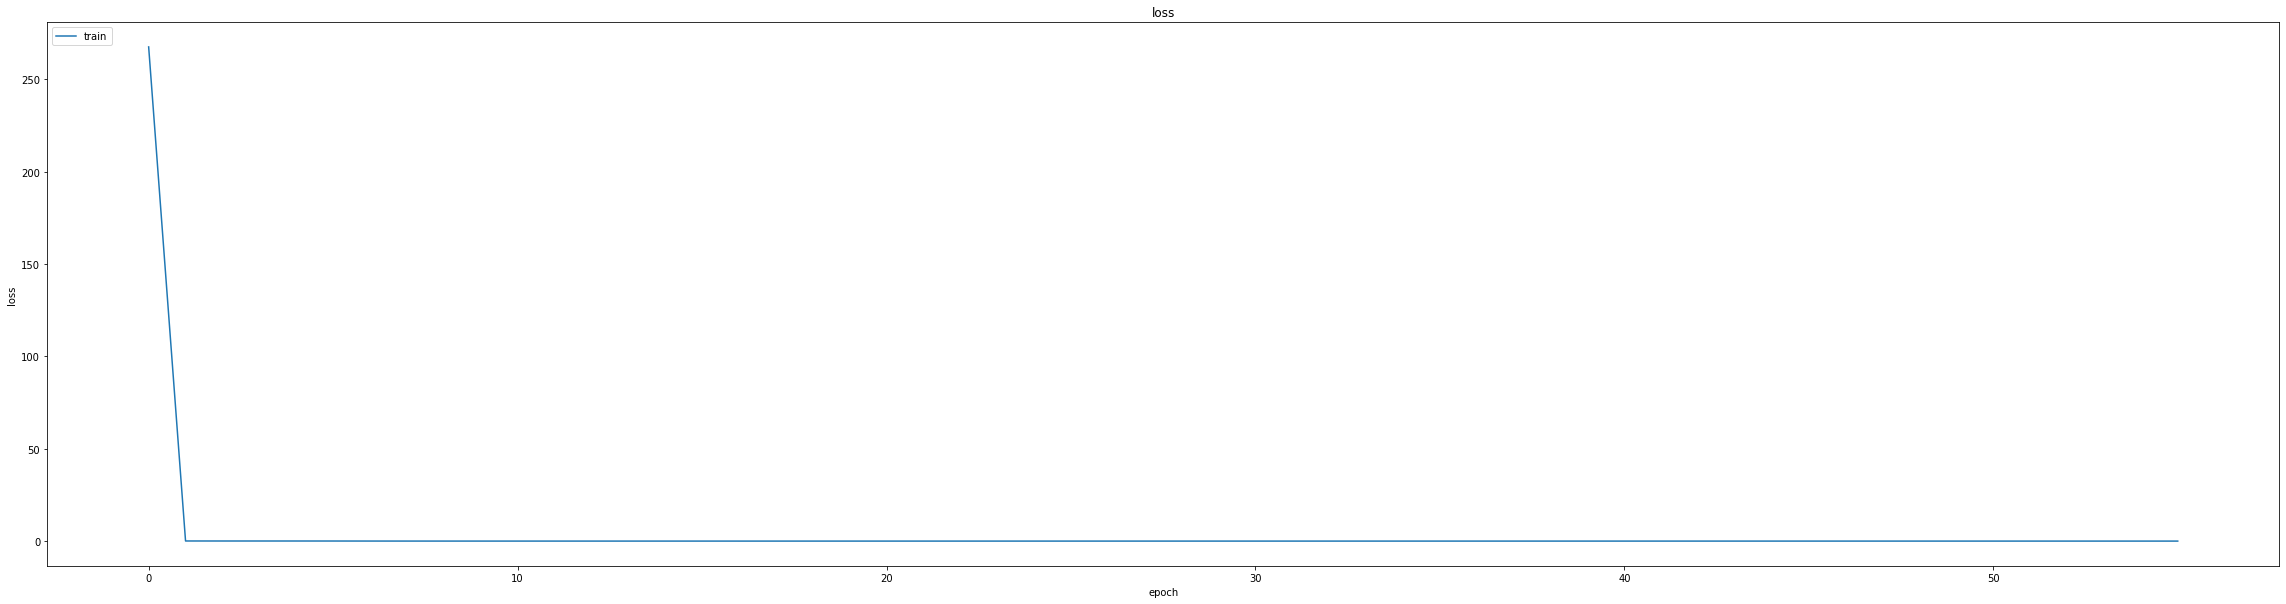

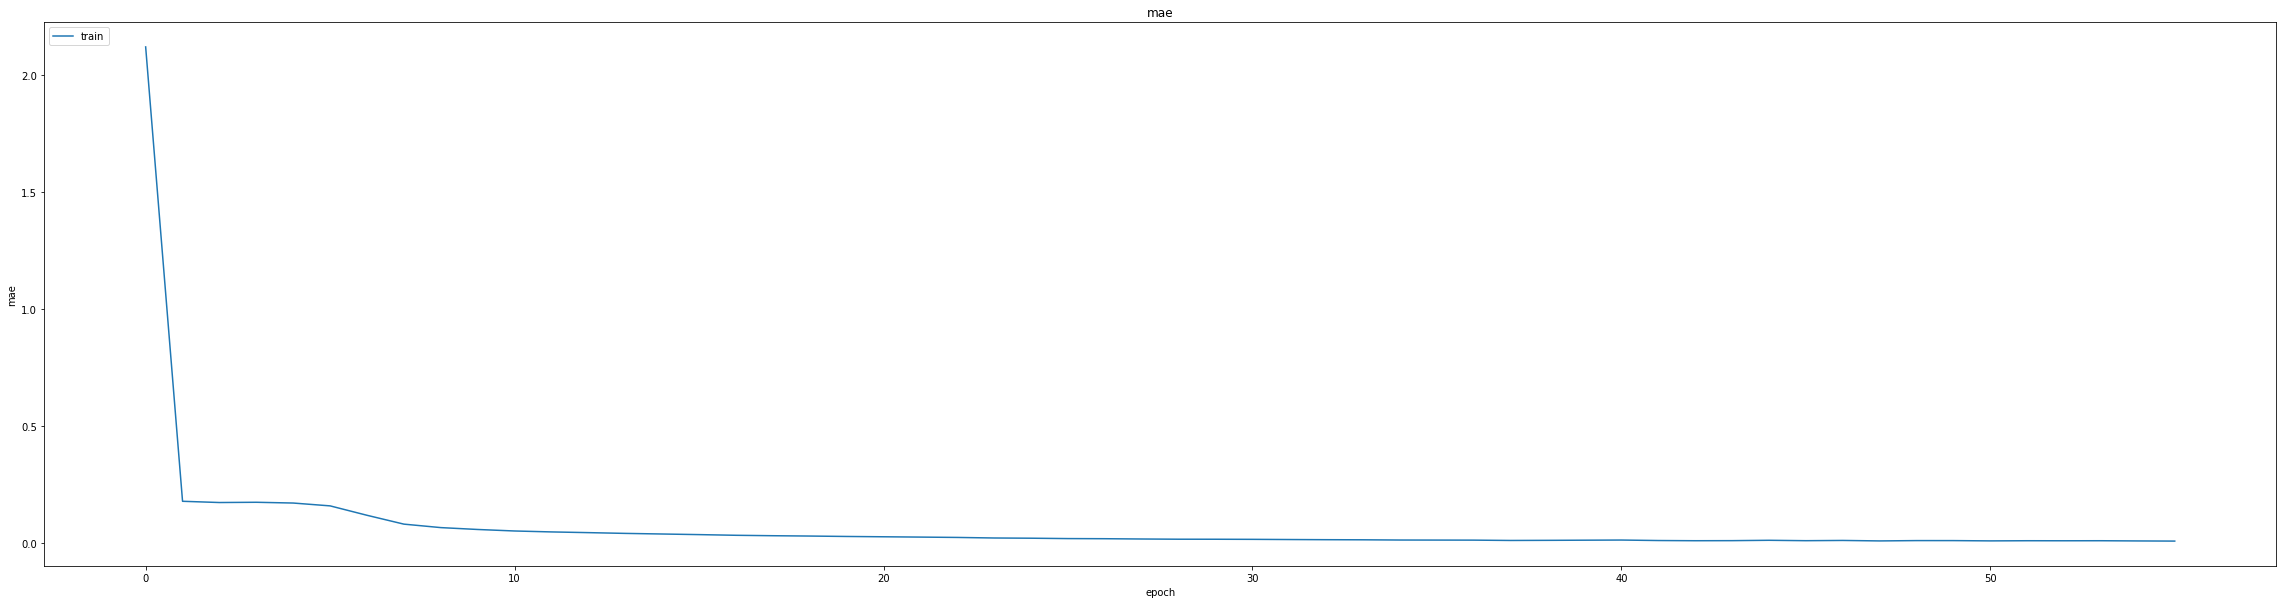

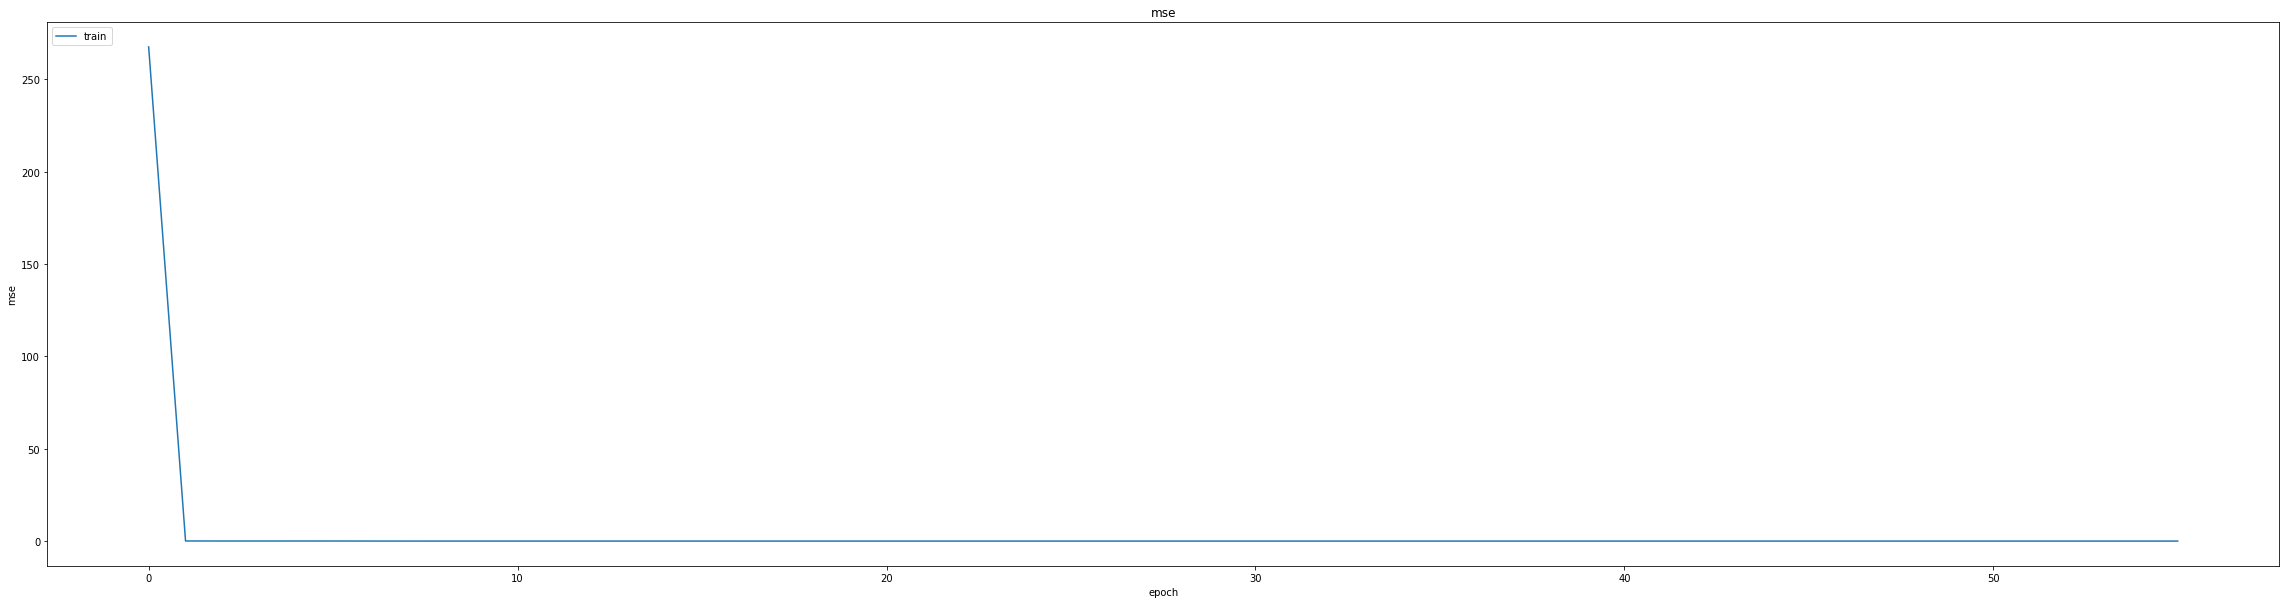

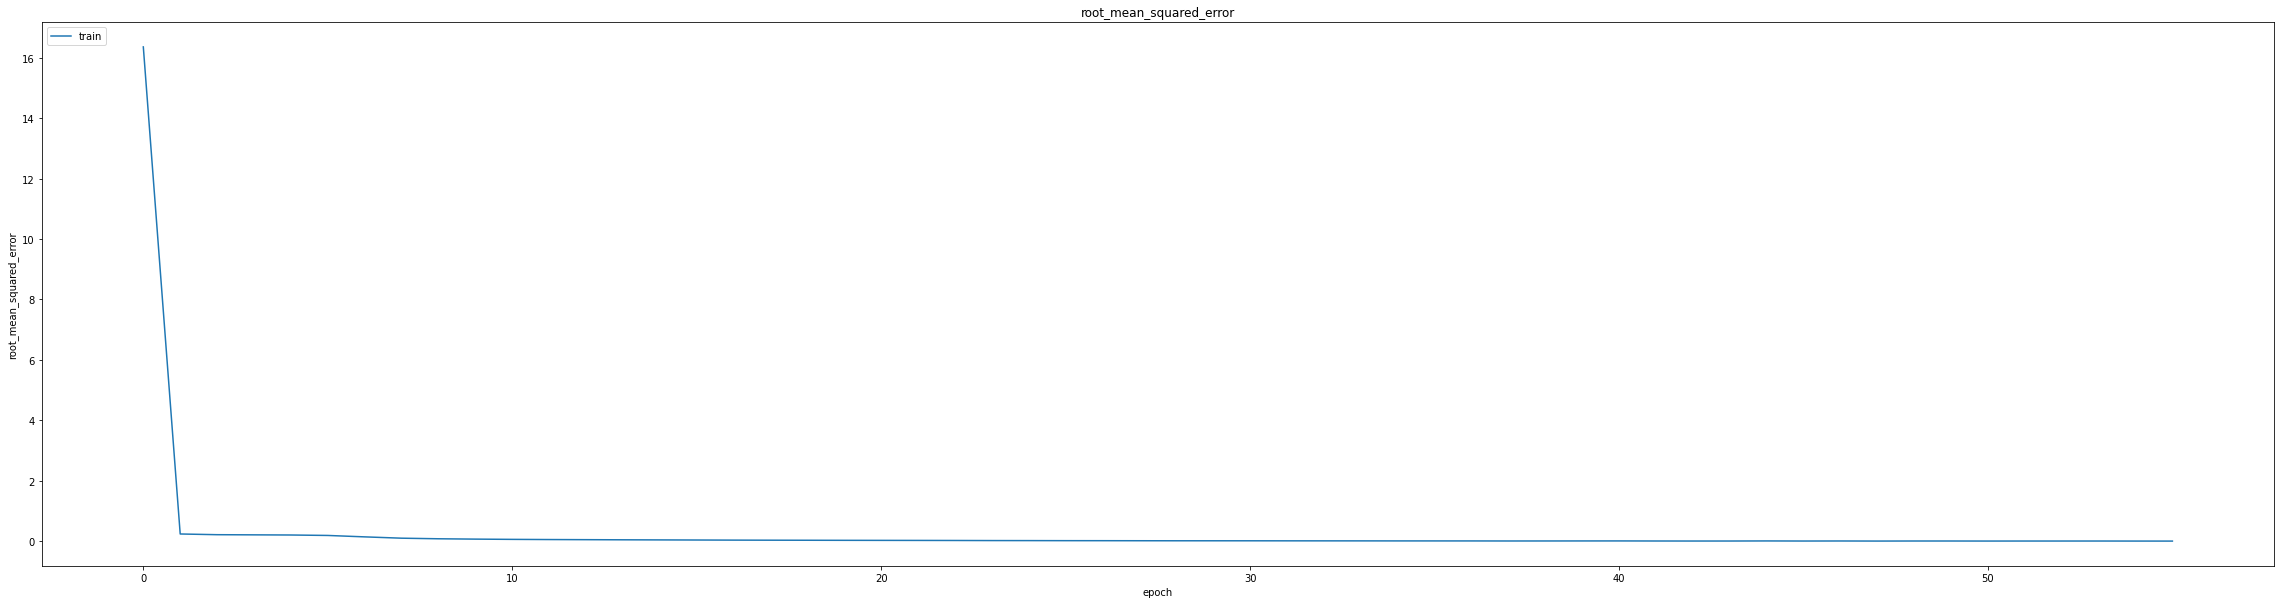

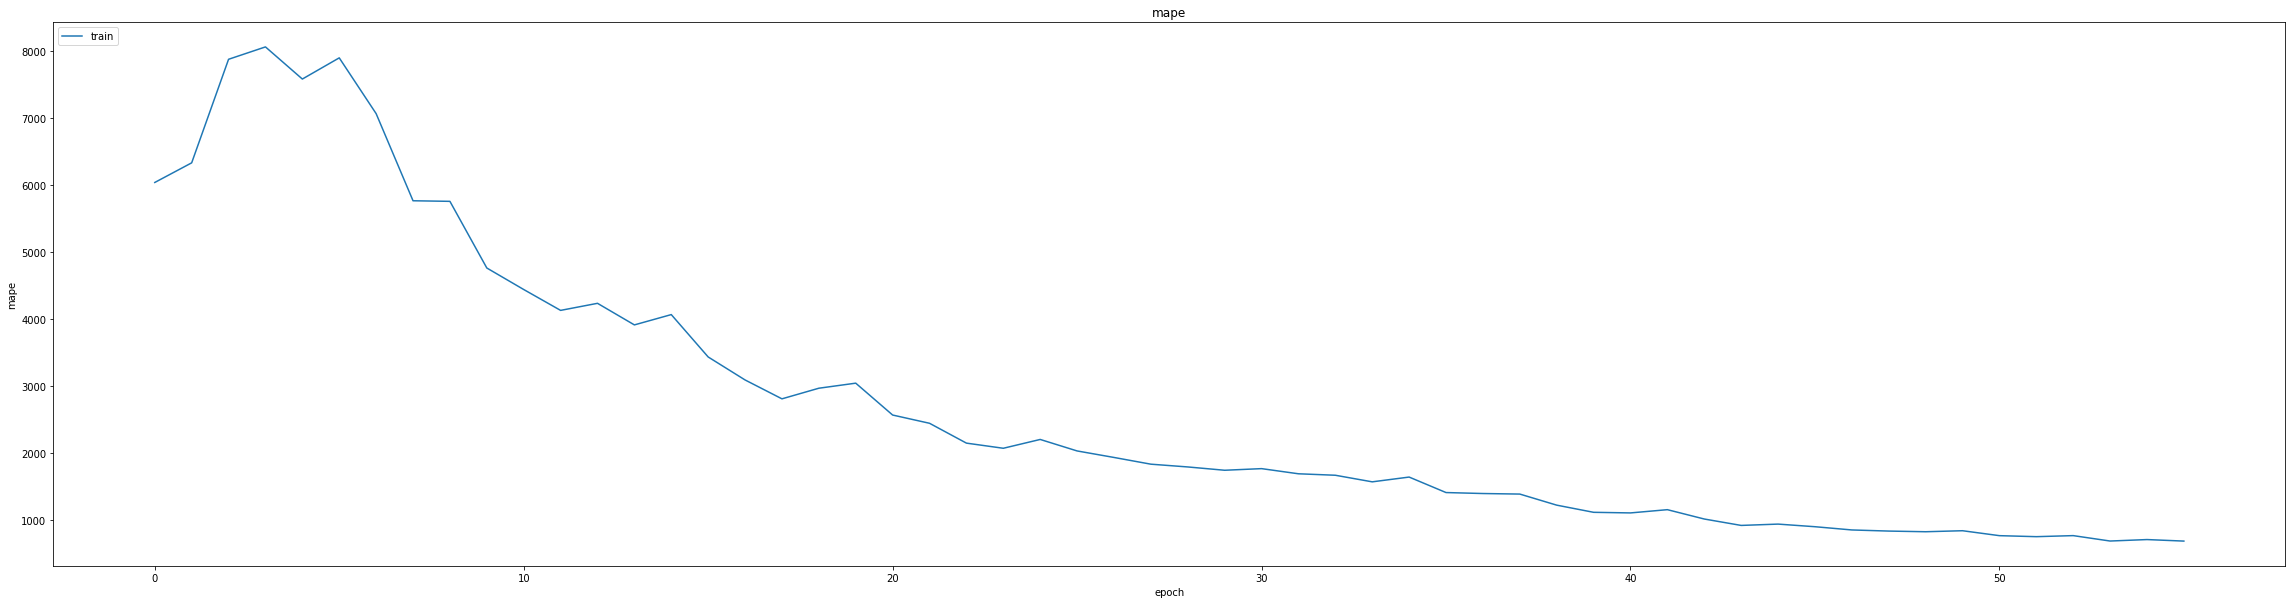

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.023395994678139687
0.031189272180199623
348/348 [==============================] - 4s 6ms/step
0.848174277558425


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
406/406 [==============================] - ETA: 0s - loss: 0.0196 - mae: 0.0654 - mse: 0.0196 - root_mean_squared_error: 0.1399 - mape: 1988.3090
Epoch 1: val_mse improved from 0.00097 to 0.00083, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)


406/406 [==============================] - 39s 81ms/step - loss: 0.0196 - mae: 0.0654 - mse: 0.0196 - root_mean_squared_error: 0.1399 - mape: 1988.3090 - val_loss: 8.3190e-04 - val_mae: 0.0228 - val_mse: 8.3190e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 7702.9268 - lr: 0.0010
Epoch 2/25
406/406 [==============================] - ETA: 0s - loss: 3.8722e-04 - mae: 0.0150 - mse: 3.8722e-04 - root_mean_squared_error: 0.0197 - mape: 1686.1632
Epoch 2: val_mse did not improve from 0.00083
406/406 [==============================] - 7s 17ms/step - loss: 3.8722e-04 - mae: 0.0150 - mse: 3.8722e-04 - root_mean_squared_error: 0.0197 - mape: 1686.1632 - val_loss: 0.0017 - val_mae: 0.0381 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 6839.9565 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
403/406 [============================>.] - ETA: 0s - loss: 2.4635e-04 - mae: 0.0120 - mse: 2.4635e-04 - root_mean_squared_error: 0.0157 - mape: 1399.6337
Epoch 3: val_

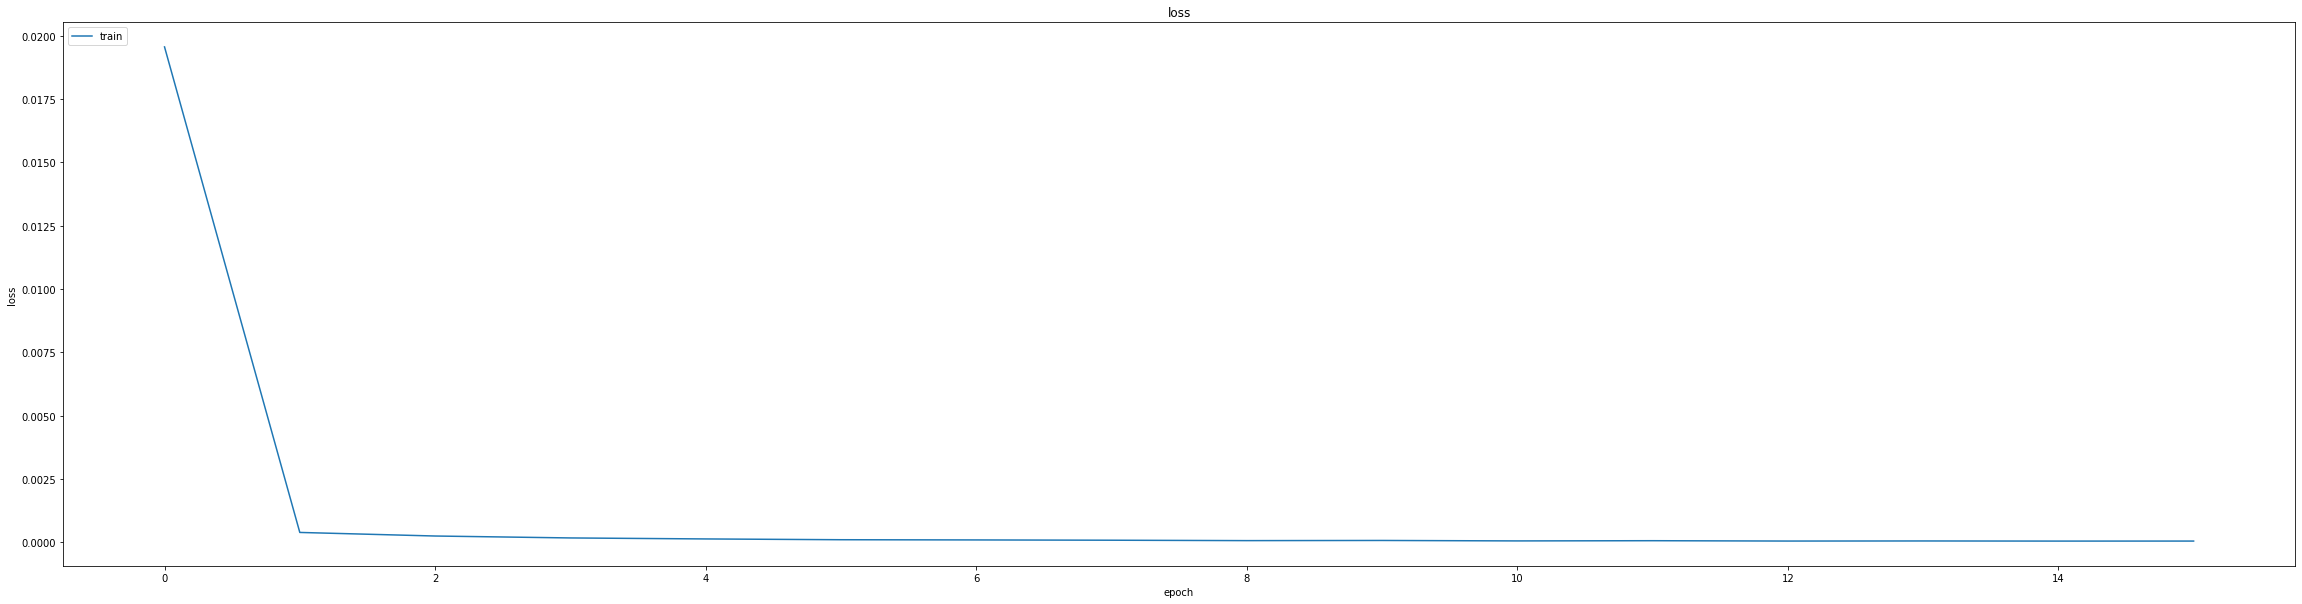

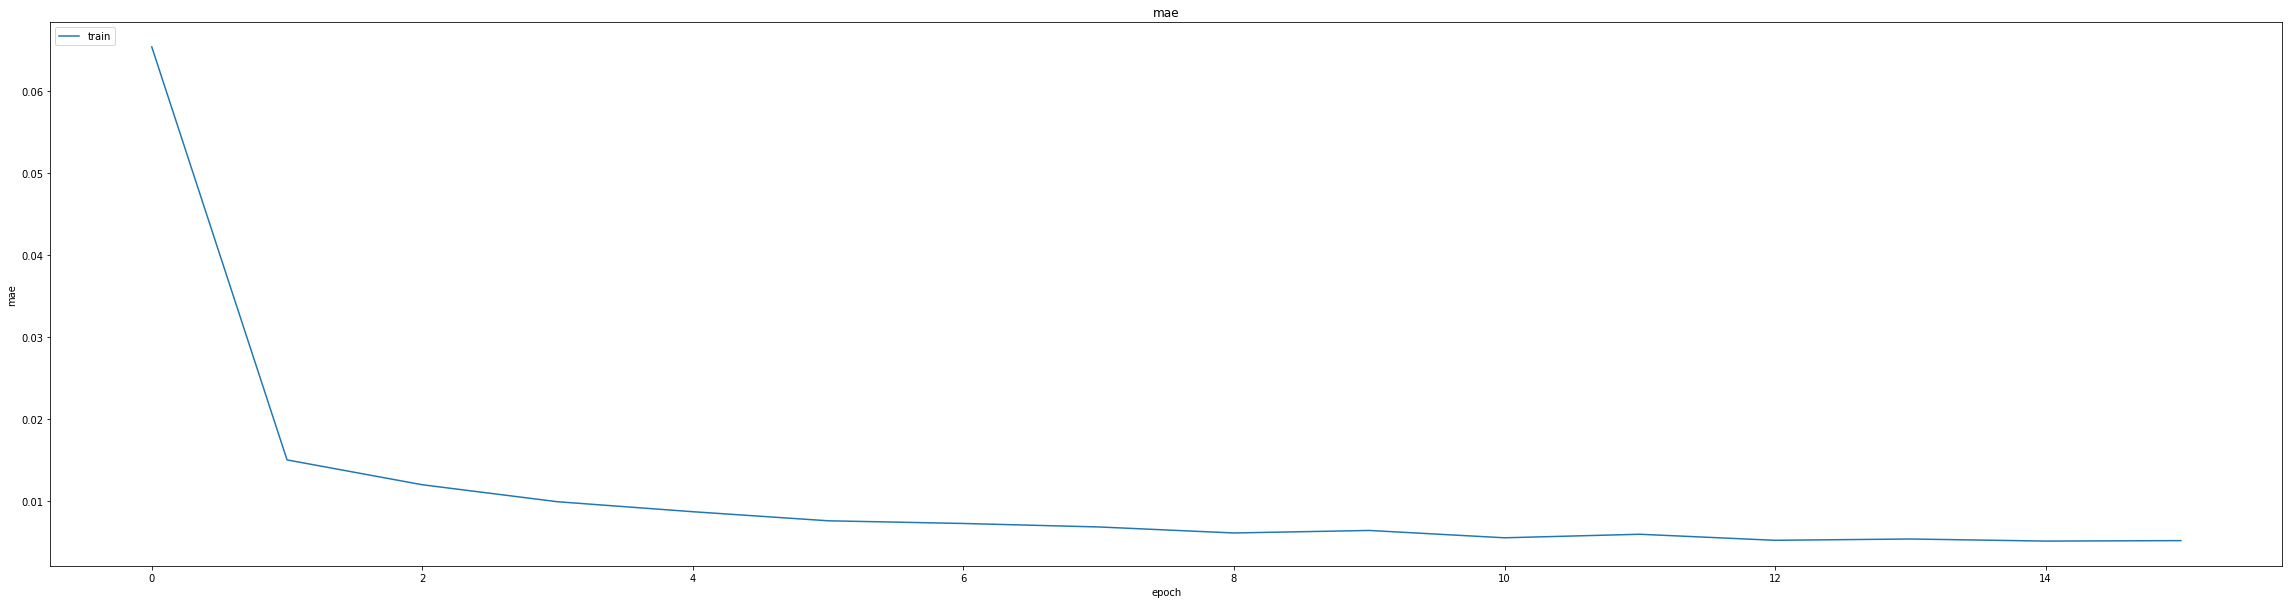

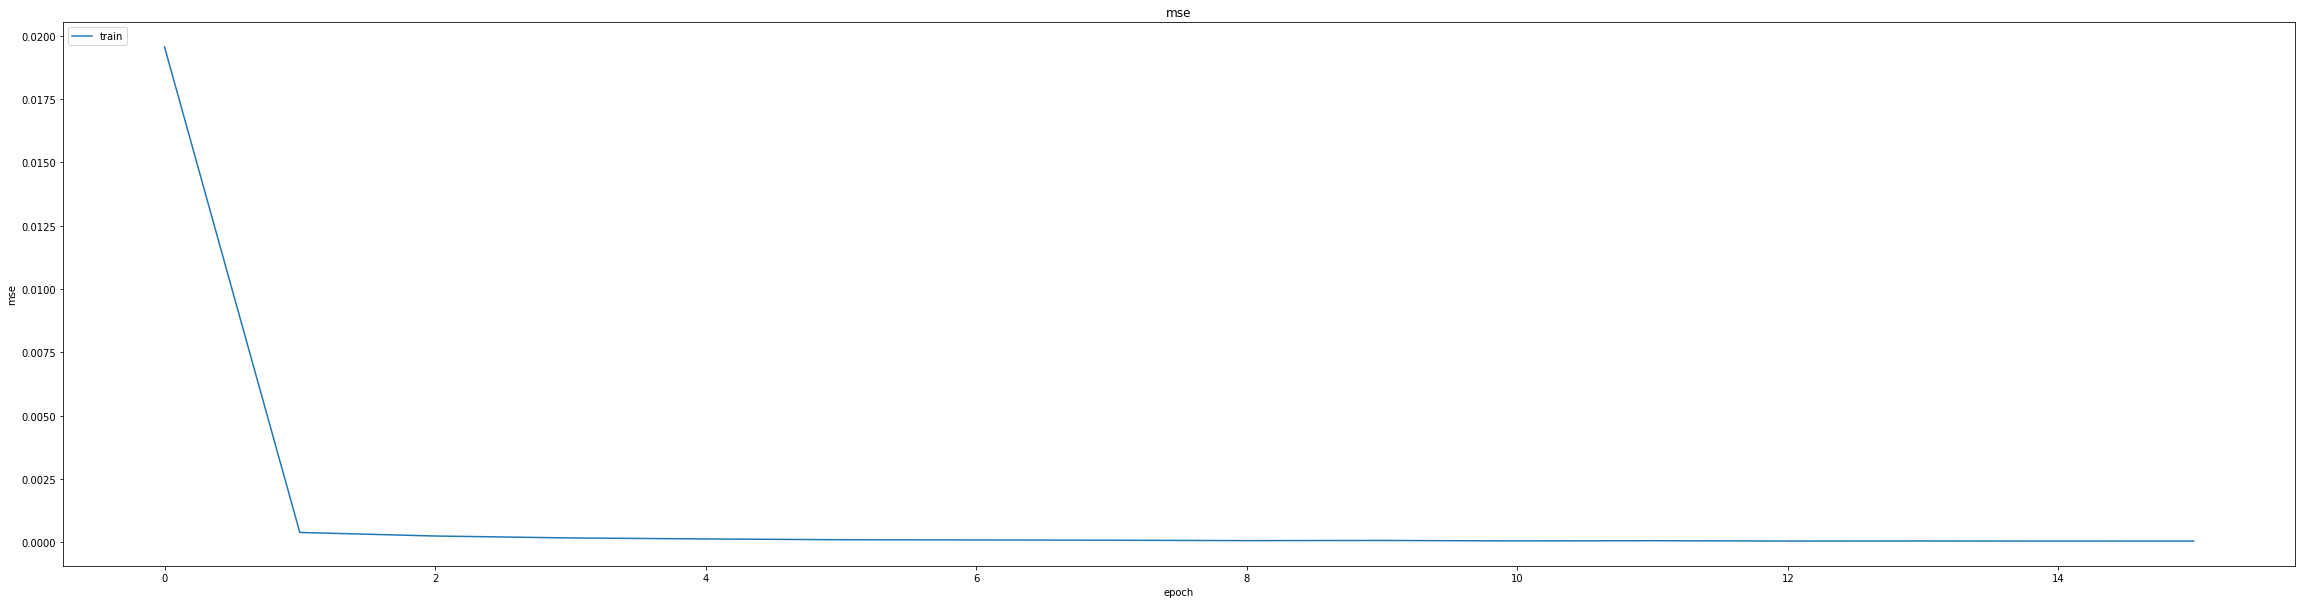

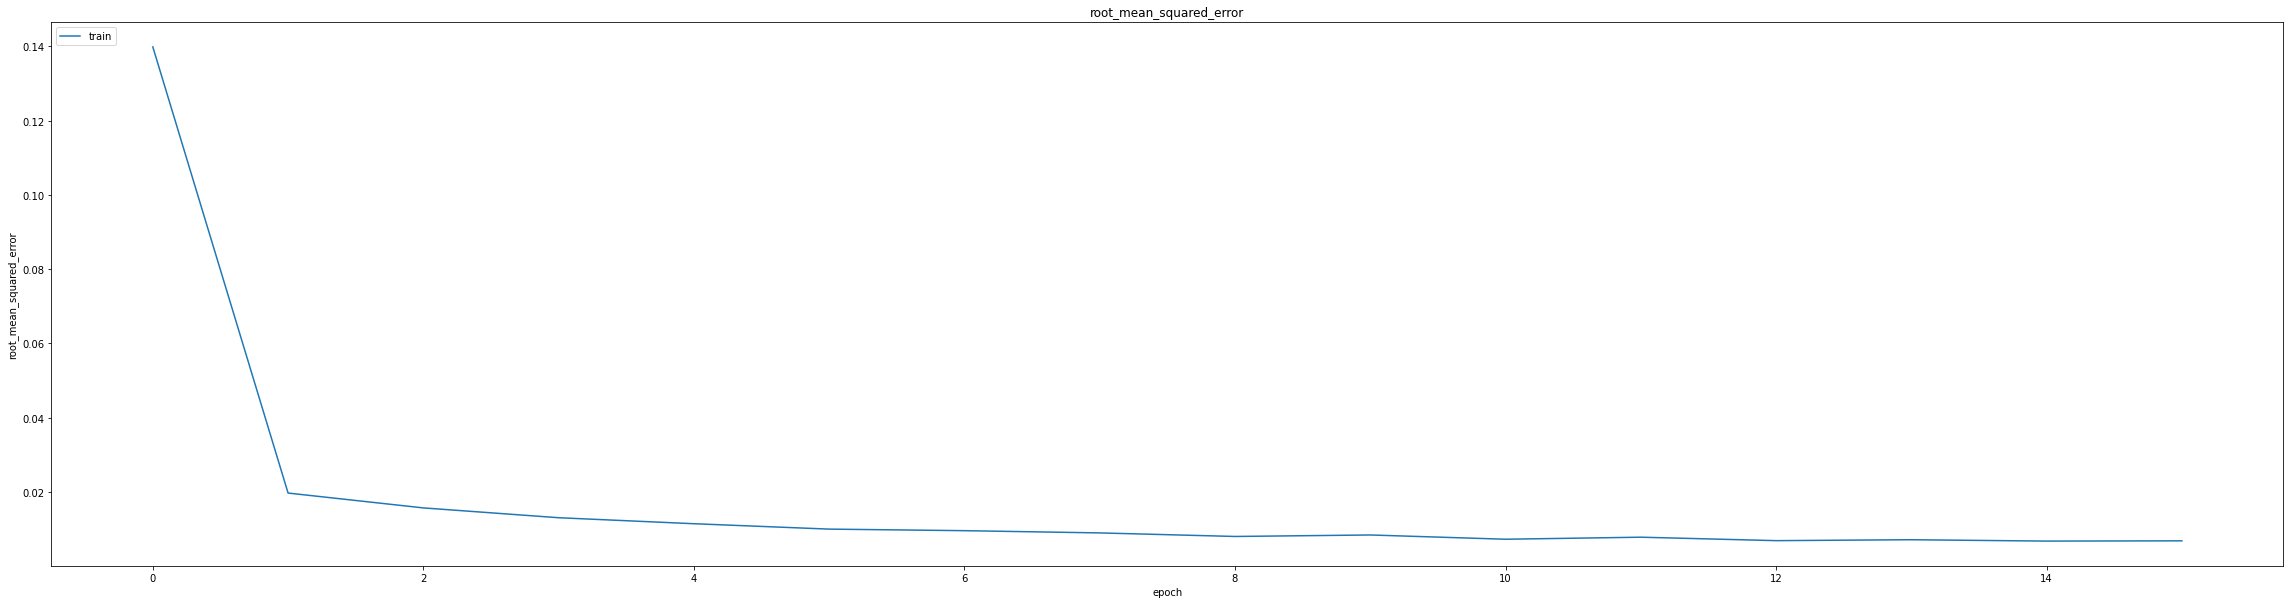

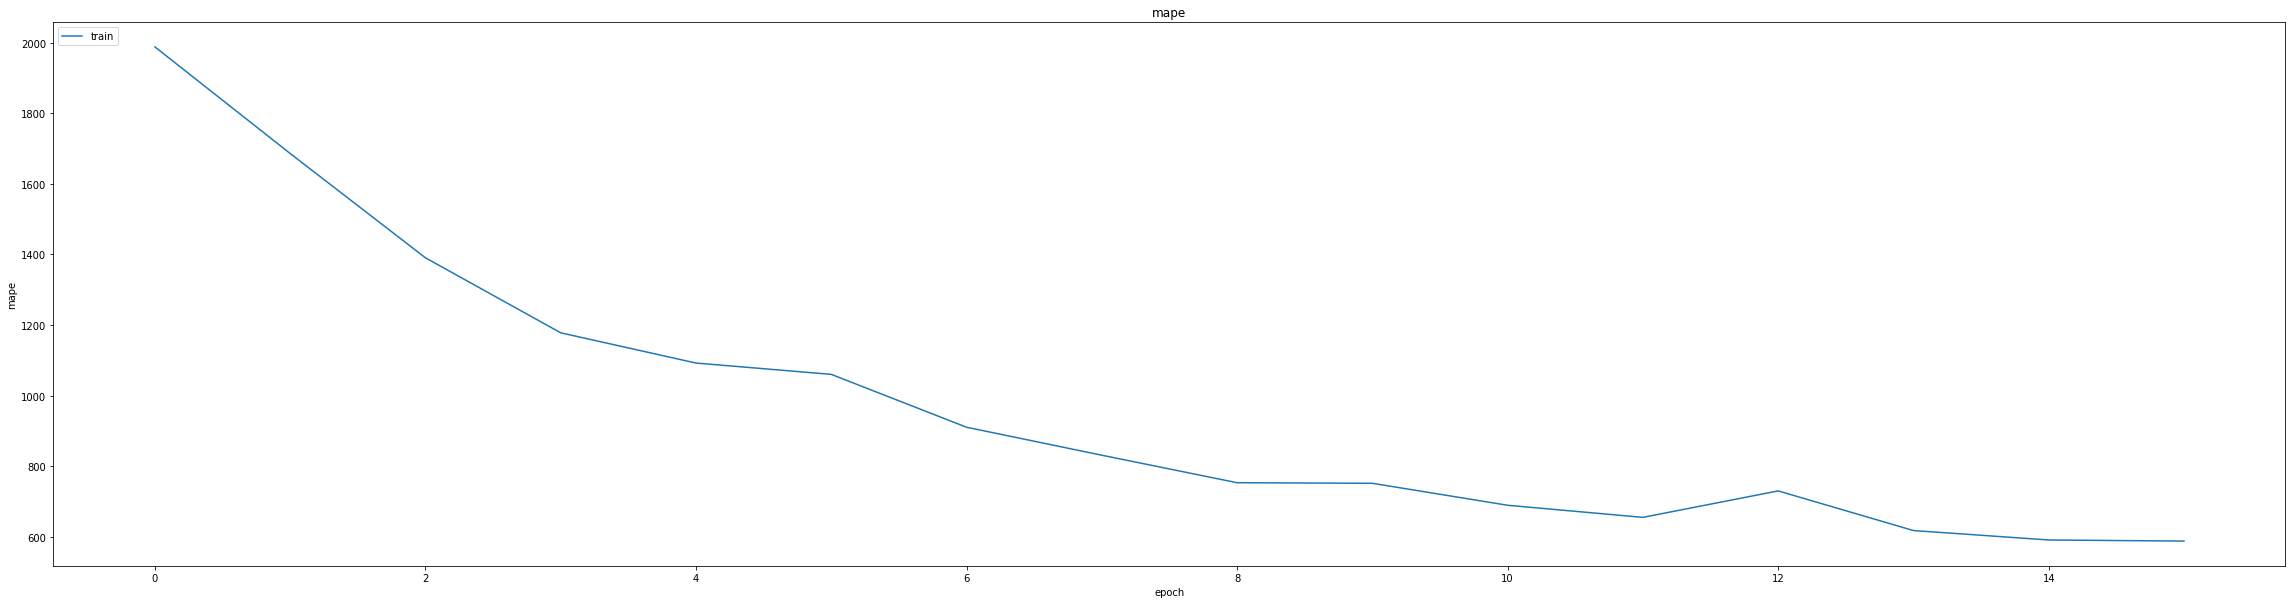

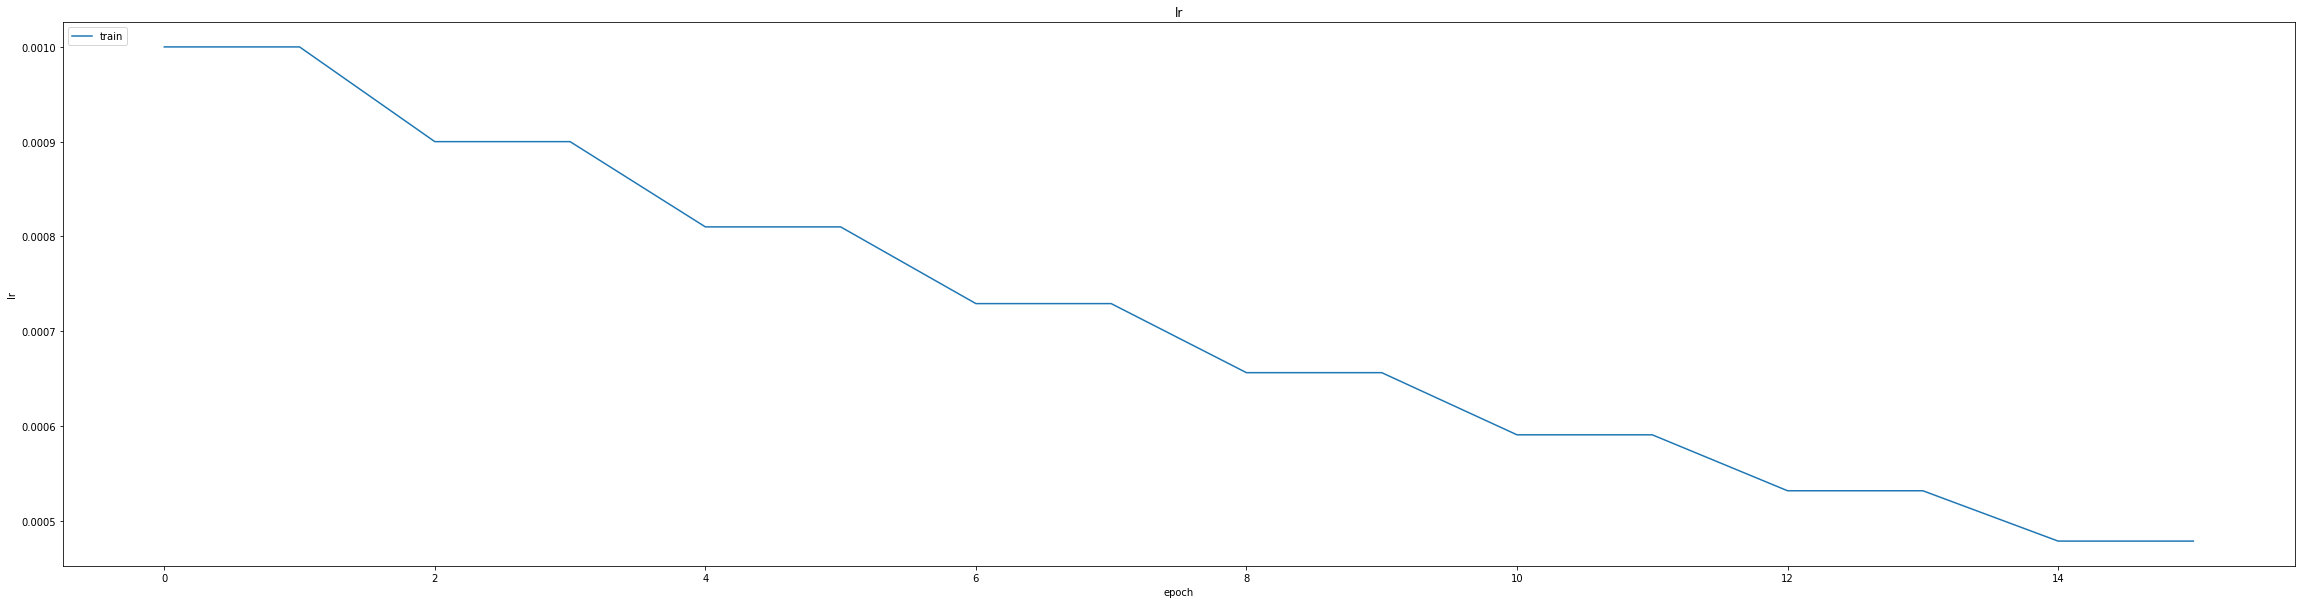

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.022763017565011978
0.02884271740913391
348/348 [==============================] - 3s 6ms/step
0.8833218146804236


348/348 [==============================] - 2s 5ms/step


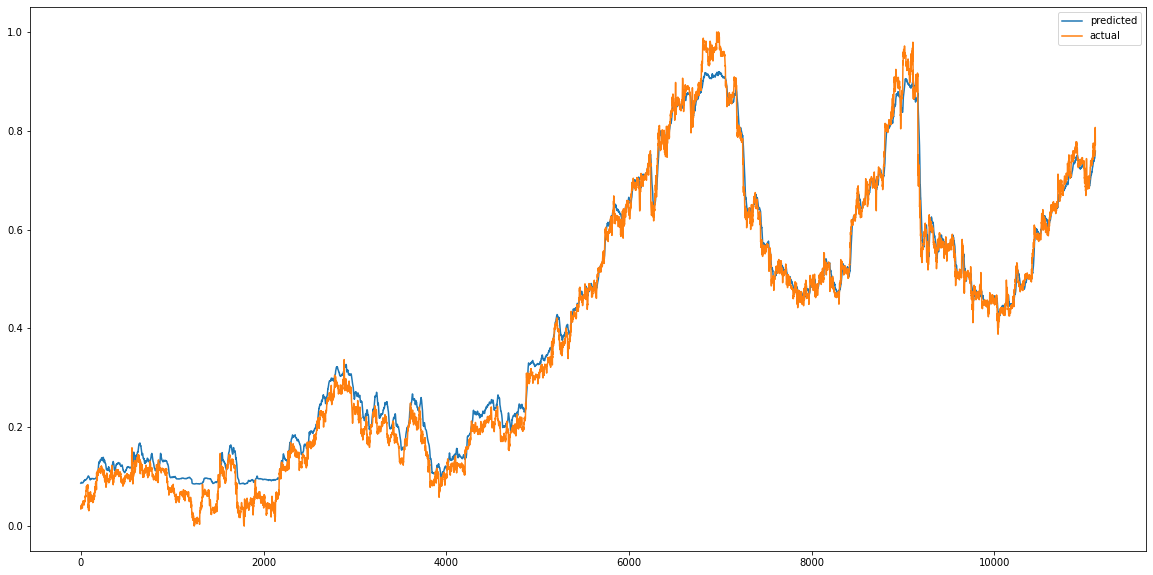

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


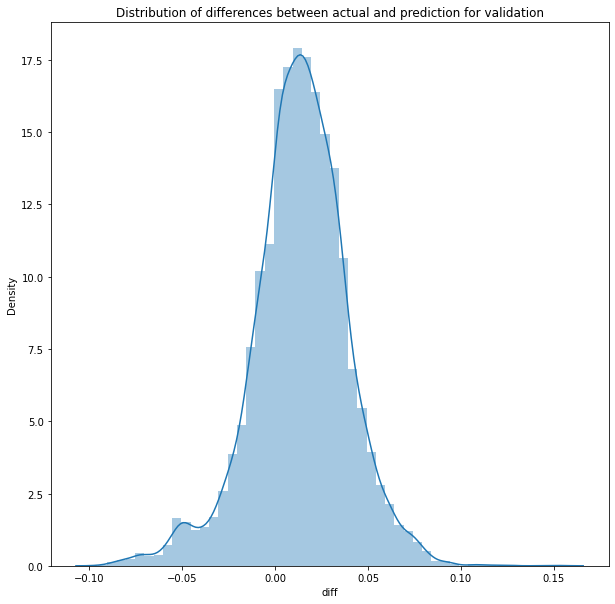

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


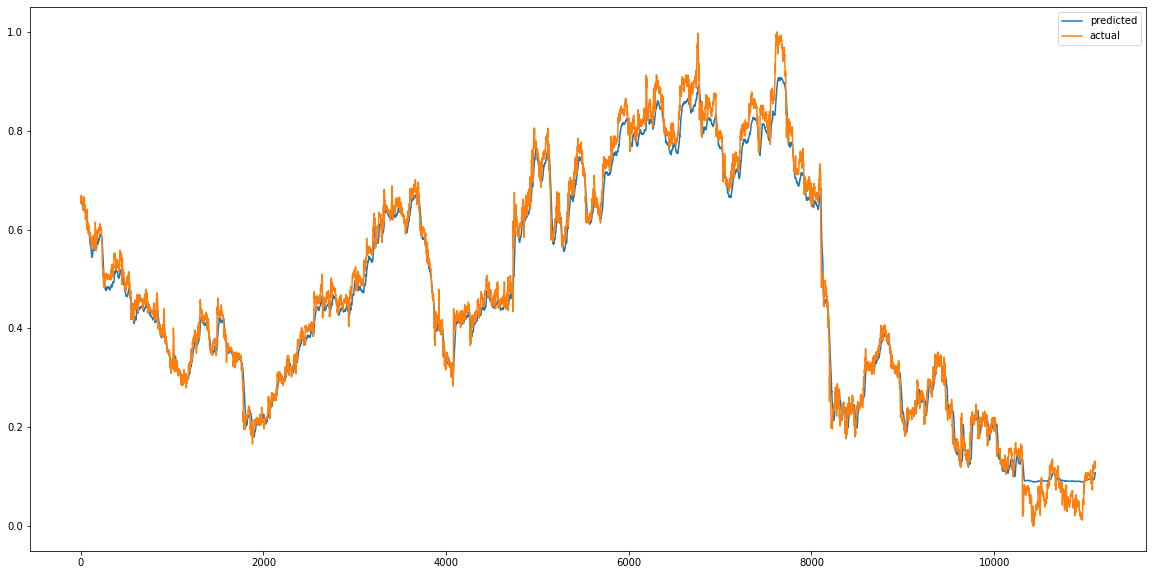

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


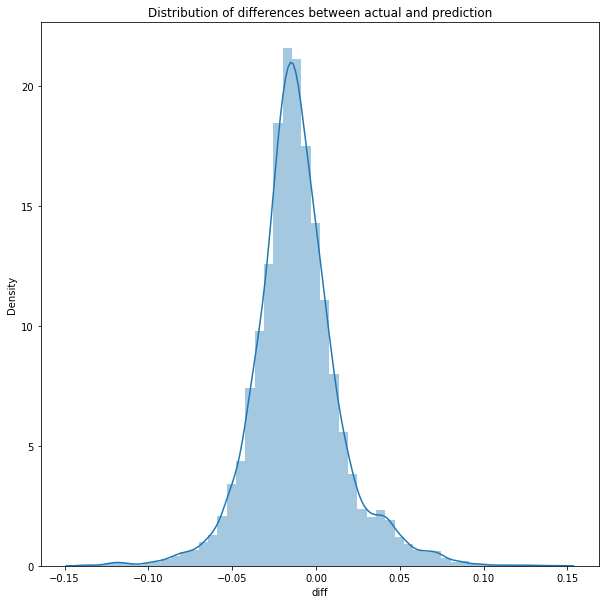

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0008080198275669277
RMSE :  0.02842568957064943
MAE :  0.021929007679832992
348/348 [==============================] - 2s 5ms/step
R2_Score  : 0.986272536490216


count    11109.000000
mean        -0.011393
std          0.026044
min         -0.136857
25%         -0.025414
50%         -0.012976
75%          0.001248
max          0.141558
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
402/406 [============================>.] - ETA: 0s - loss: 314.4544 - mae: 2.5280 - mse: 314.4544 - root_mean_squared_error: 17.7329 - mape: 12567.2764
Epoch 1: val_mse improved from inf to 0.09711, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 20s 41ms/step - loss: 311.6088 - mae: 2.5073 - mse: 311.6088 - root_mean_squared_error: 17.6524 - mape: 12454.6592 - val_loss: 0.0971 - val_mae: 0.2635 - val_mse: 0.0971 - val_root_mean_squared_error: 0.3116 - val_mape: 50129.0195
Epoch 2/75
403/406 [============================>.] - ETA: 0s - loss: 0.0594 - mae: 0.2147 - mse: 0.0594 - root_mean_squared_error: 0.2438 - mape: 10086.4053
Epoch 2: val_mse improved from 0.09711 to 0.08192, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0594 - mae: 0.2146 - mse: 0.0594 - root_mean_squared_error: 0.2437 - mape: 10020.4990 - val_loss: 0.0819 - val_mae: 0.2449 - val_mse: 0.0819 - val_root_mean_squared_error: 0.2862 - val_mape: 44126.8242
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0530 - mae: 0.1936 - mse: 0.0530 - root_mean_squared_error: 0.2303 - mape: 9102.2305
Epoch 3: val_mse improved from 0.08192 to 0.07750, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0530 - mae: 0.1937 - mse: 0.0530 - root_mean_squared_error: 0.2303 - mape: 9065.0234 - val_loss: 0.0775 - val_mae: 0.2417 - val_mse: 0.0775 - val_root_mean_squared_error: 0.2784 - val_mape: 41035.9453
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0518 - mae: 0.1854 - mse: 0.0518 - root_mean_squared_error: 0.2276 - mape: 9231.6719
Epoch 4: val_mse improved from 0.07750 to 0.07634, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0518 - mae: 0.1854 - mse: 0.0518 - root_mean_squared_error: 0.2276 - mape: 9231.6719 - val_loss: 0.0763 - val_mae: 0.2414 - val_mse: 0.0763 - val_root_mean_squared_error: 0.2763 - val_mape: 39752.5664
Epoch 5/75
402/406 [============================>.] - ETA: 0s - loss: 0.0517 - mae: 0.1826 - mse: 0.0517 - root_mean_squared_error: 0.2274 - mape: 8844.3555
Epoch 5: val_mse improved from 0.07634 to 0.07604, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0517 - mae: 0.1826 - mse: 0.0517 - root_mean_squared_error: 0.2274 - mape: 8764.9023 - val_loss: 0.0760 - val_mae: 0.2414 - val_mse: 0.0760 - val_root_mean_squared_error: 0.2758 - val_mape: 39358.0625
Epoch 6/75
401/406 [============================>.] - ETA: 0s - loss: 0.0517 - mae: 0.1820 - mse: 0.0517 - root_mean_squared_error: 0.2274 - mape: 8565.5107
Epoch 6: val_mse improved from 0.07604 to 0.07592, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0517 - mae: 0.1819 - mse: 0.0517 - root_mean_squared_error: 0.2273 - mape: 8467.6553 - val_loss: 0.0759 - val_mae: 0.2413 - val_mse: 0.0759 - val_root_mean_squared_error: 0.2755 - val_mape: 39226.8125
Epoch 7/75
406/406 [==============================] - ETA: 0s - loss: 0.0517 - mae: 0.1817 - mse: 0.0517 - root_mean_squared_error: 0.2273 - mape: 8422.4082
Epoch 7: val_mse improved from 0.07592 to 0.07592, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0517 - mae: 0.1817 - mse: 0.0517 - root_mean_squared_error: 0.2273 - mape: 8422.4082 - val_loss: 0.0759 - val_mae: 0.2412 - val_mse: 0.0759 - val_root_mean_squared_error: 0.2755 - val_mape: 39309.2031
Epoch 8/75
401/406 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1820 - mse: 0.0516 - root_mean_squared_error: 0.2272 - mape: 8548.4395
Epoch 8: val_mse improved from 0.07592 to 0.07570, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0516 - mae: 0.1819 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8450.7920 - val_loss: 0.0757 - val_mae: 0.2411 - val_mse: 0.0757 - val_root_mean_squared_error: 0.2751 - val_mape: 39080.7891
Epoch 9/75
405/406 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1813 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 8622.6318
Epoch 9: val_mse improved from 0.07570 to 0.07562, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0515 - mae: 0.1813 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 8608.4512 - val_loss: 0.0756 - val_mae: 0.2408 - val_mse: 0.0756 - val_root_mean_squared_error: 0.2750 - val_mape: 39224.2344
Epoch 10/75
403/406 [============================>.] - ETA: 0s - loss: 0.0513 - mae: 0.1813 - mse: 0.0513 - root_mean_squared_error: 0.2264 - mape: 8453.1230
Epoch 10: val_mse improved from 0.07562 to 0.07490, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0513 - mae: 0.1813 - mse: 0.0513 - root_mean_squared_error: 0.2265 - mape: 8398.0518 - val_loss: 0.0749 - val_mae: 0.2396 - val_mse: 0.0749 - val_root_mean_squared_error: 0.2737 - val_mape: 39049.1172
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0504 - mae: 0.1797 - mse: 0.0504 - root_mean_squared_error: 0.2244 - mape: 8681.1895
Epoch 11: val_mse improved from 0.07490 to 0.07280, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0504 - mae: 0.1797 - mse: 0.0504 - root_mean_squared_error: 0.2244 - mape: 8681.1895 - val_loss: 0.0728 - val_mae: 0.2359 - val_mse: 0.0728 - val_root_mean_squared_error: 0.2698 - val_mape: 38656.8086
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 0.0477 - mae: 0.1754 - mse: 0.0477 - root_mean_squared_error: 0.2185 - mape: 8650.1729
Epoch 12: val_mse improved from 0.07280 to 0.06696, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0477 - mae: 0.1753 - mse: 0.0477 - root_mean_squared_error: 0.2184 - mape: 8593.5889 - val_loss: 0.0670 - val_mae: 0.2240 - val_mse: 0.0670 - val_root_mean_squared_error: 0.2588 - val_mape: 38453.1367
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0328 - mae: 0.1441 - mse: 0.0328 - root_mean_squared_error: 0.1811 - mape: 7841.2681
Epoch 13: val_mse improved from 0.06696 to 0.03474, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 36ms/step - loss: 0.0327 - mae: 0.1438 - mse: 0.0327 - root_mean_squared_error: 0.1808 - mape: 7789.9653 - val_loss: 0.0347 - val_mae: 0.1538 - val_mse: 0.0347 - val_root_mean_squared_error: 0.1864 - val_mape: 33573.3281
Epoch 14/75
402/406 [============================>.] - ETA: 0s - loss: 0.0115 - mae: 0.0793 - mse: 0.0115 - root_mean_squared_error: 0.1070 - mape: 6930.1162
Epoch 14: val_mse improved from 0.03474 to 0.01491, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0114 - mae: 0.0792 - mse: 0.0114 - root_mean_squared_error: 0.1069 - mape: 6867.8804 - val_loss: 0.0149 - val_mae: 0.0949 - val_mse: 0.0149 - val_root_mean_squared_error: 0.1221 - val_mape: 26278.8223
Epoch 15/75
406/406 [==============================] - ETA: 0s - loss: 0.0060 - mae: 0.0575 - mse: 0.0060 - root_mean_squared_error: 0.0773 - mape: 5206.8281
Epoch 15: val_mse improved from 0.01491 to 0.01050, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0060 - mae: 0.0575 - mse: 0.0060 - root_mean_squared_error: 0.0773 - mape: 5206.8281 - val_loss: 0.0105 - val_mae: 0.0860 - val_mse: 0.0105 - val_root_mean_squared_error: 0.1025 - val_mape: 21835.4883
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0492 - mse: 0.0042 - root_mean_squared_error: 0.0650 - mape: 4350.0078
Epoch 16: val_mse improved from 0.01050 to 0.00629, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 0.0042 - mae: 0.0492 - mse: 0.0042 - root_mean_squared_error: 0.0650 - mape: 4342.8394 - val_loss: 0.0063 - val_mae: 0.0610 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0793 - val_mape: 19172.9512
Epoch 17/75
405/406 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0437 - mse: 0.0033 - root_mean_squared_error: 0.0574 - mape: 4357.7422
Epoch 17: val_mse improved from 0.00629 to 0.00572, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0033 - mae: 0.0437 - mse: 0.0033 - root_mean_squared_error: 0.0574 - mape: 4350.5430 - val_loss: 0.0057 - val_mae: 0.0613 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0756 - val_mape: 17571.4805
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0398 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 3629.7524
Epoch 18: val_mse improved from 0.00572 to 0.00418, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0027 - mae: 0.0398 - mse: 0.0027 - root_mean_squared_error: 0.0521 - mape: 3623.7664 - val_loss: 0.0042 - val_mae: 0.0498 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0647 - val_mape: 16335.3965
Epoch 19/75
405/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0373 - mse: 0.0023 - root_mean_squared_error: 0.0485 - mape: 3501.5769
Epoch 19: val_mse improved from 0.00418 to 0.00343, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0023 - mae: 0.0373 - mse: 0.0023 - root_mean_squared_error: 0.0485 - mape: 3495.8086 - val_loss: 0.0034 - val_mae: 0.0446 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0586 - val_mape: 15315.7354
Epoch 20/75
403/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - root_mean_squared_error: 0.0453 - mape: 3438.7773
Epoch 20: val_mse improved from 0.00343 to 0.00307, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - root_mean_squared_error: 0.0453 - mape: 3416.2112 - val_loss: 0.0031 - val_mae: 0.0429 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0554 - val_mape: 14406.0400
Epoch 21/75
401/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 3087.3545
Epoch 21: val_mse did not improve from 0.00307
406/406 [==============================] - 5s 11ms/step - loss: 0.0017 - mae: 0.0317 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 3052.0054 - val_loss: 0.0031 - val_mae: 0.0446 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0555 - val_mape: 13924.6904
Epoch 22/75
403/406 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 2795.0210
Epoch 22: val_mse improved from 0.00307 to 0.00246, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 15s 37ms/step - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 2776.7073 - val_loss: 0.0025 - val_mae: 0.0389 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0496 - val_mape: 13018.2031
Epoch 23/75
403/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 2854.0581
Epoch 23: val_mse did not improve from 0.00246
406/406 [==============================] - 4s 11ms/step - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 2835.3608 - val_loss: 0.0036 - val_mae: 0.0538 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0598 - val_mape: 12696.8447
Epoch 24/75
406/406 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0250 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 2599.5698
Epoch 24: val_mse improved from 0.00246 to 0.00169, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 15s 38ms/step - loss: 0.0011 - mae: 0.0250 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 2599.5698 - val_loss: 0.0017 - val_mae: 0.0308 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0411 - val_mape: 11789.6846
Epoch 25/75
404/406 [============================>.] - ETA: 0s - loss: 8.9548e-04 - mae: 0.0231 - mse: 8.9548e-04 - root_mean_squared_error: 0.0299 - mape: 2390.8237
Epoch 25: val_mse did not improve from 0.00169
406/406 [==============================] - 4s 11ms/step - loss: 8.9693e-04 - mae: 0.0231 - mse: 8.9693e-04 - root_mean_squared_error: 0.0299 - mape: 2381.0525 - val_loss: 0.0027 - val_mae: 0.0461 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0520 - val_mape: 11406.2041
Epoch 26/75
403/406 [============================>.] - ETA: 0s - loss: 8.5162e-04 - mae: 0.0225 - mse: 8.5162e-04 - root_mean_squared_error: 0.0292 - mape: 2515.3633
Epoch 26: val_mse did not improve from 0.00169
406/406 [======================

406/406 [==============================] - 15s 36ms/step - loss: 5.7717e-04 - mae: 0.0185 - mse: 5.7717e-04 - root_mean_squared_error: 0.0240 - mape: 1957.8634 - val_loss: 0.0015 - val_mae: 0.0335 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mape: 9220.5986
Epoch 31/75
402/406 [============================>.] - ETA: 0s - loss: 4.9639e-04 - mae: 0.0171 - mse: 4.9639e-04 - root_mean_squared_error: 0.0223 - mape: 2020.6409
Epoch 31: val_mse did not improve from 0.00153
406/406 [==============================] - 4s 11ms/step - loss: 4.9599e-04 - mae: 0.0171 - mse: 4.9599e-04 - root_mean_squared_error: 0.0223 - mape: 2002.4041 - val_loss: 0.0020 - val_mae: 0.0406 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 9088.8467
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 4.7068e-04 - mae: 0.0166 - mse: 4.7068e-04 - root_mean_squared_error: 0.0217 - mape: 1859.4357
Epoch 32: val_mse did not improve from 0.00153
406/406 [================

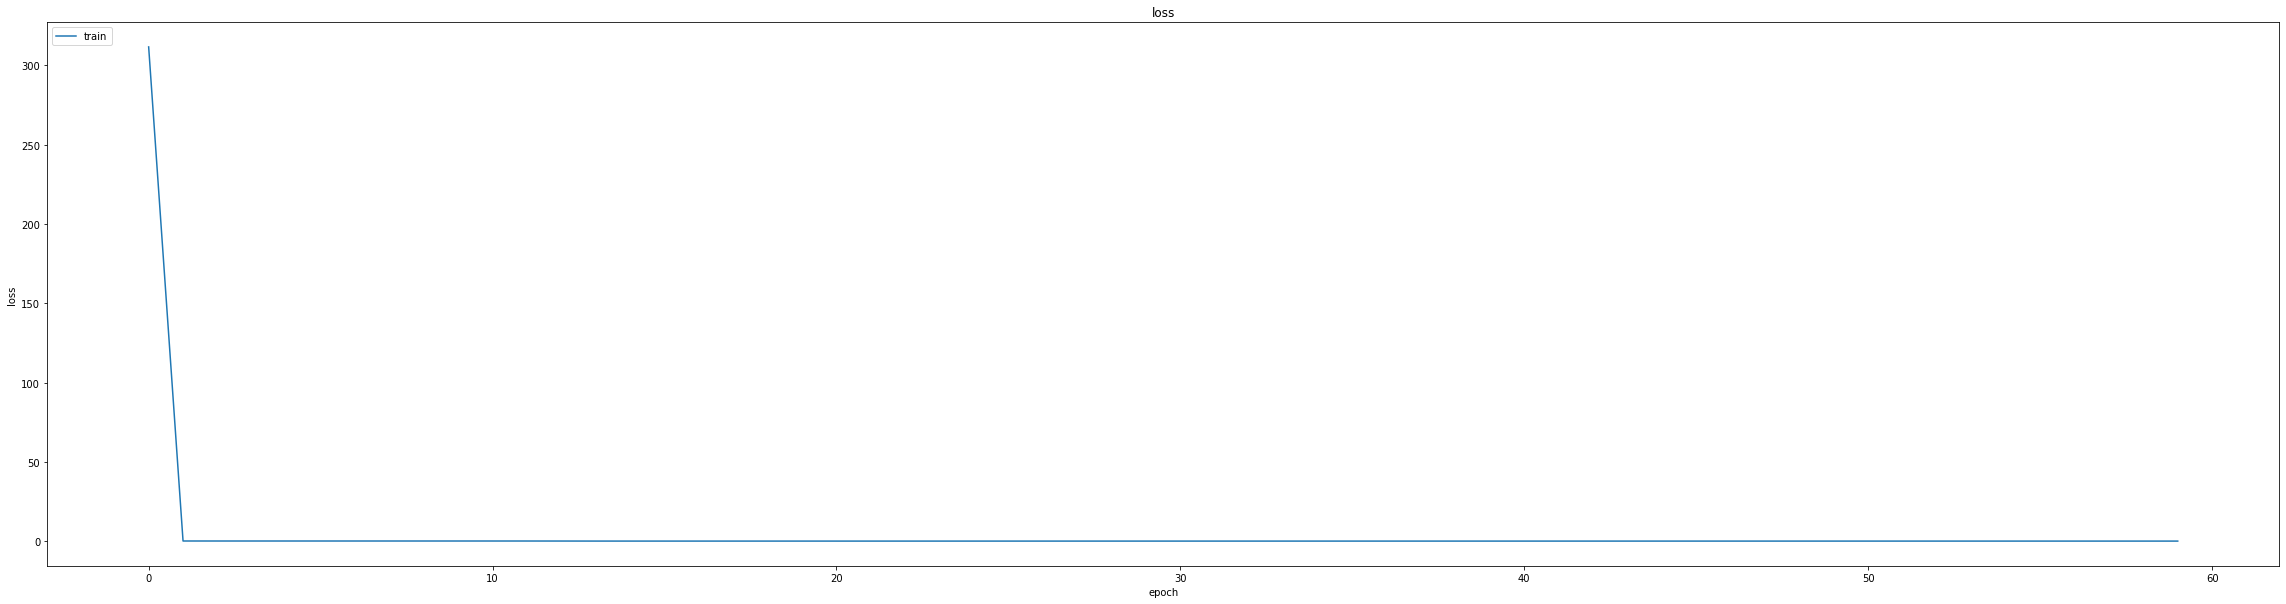

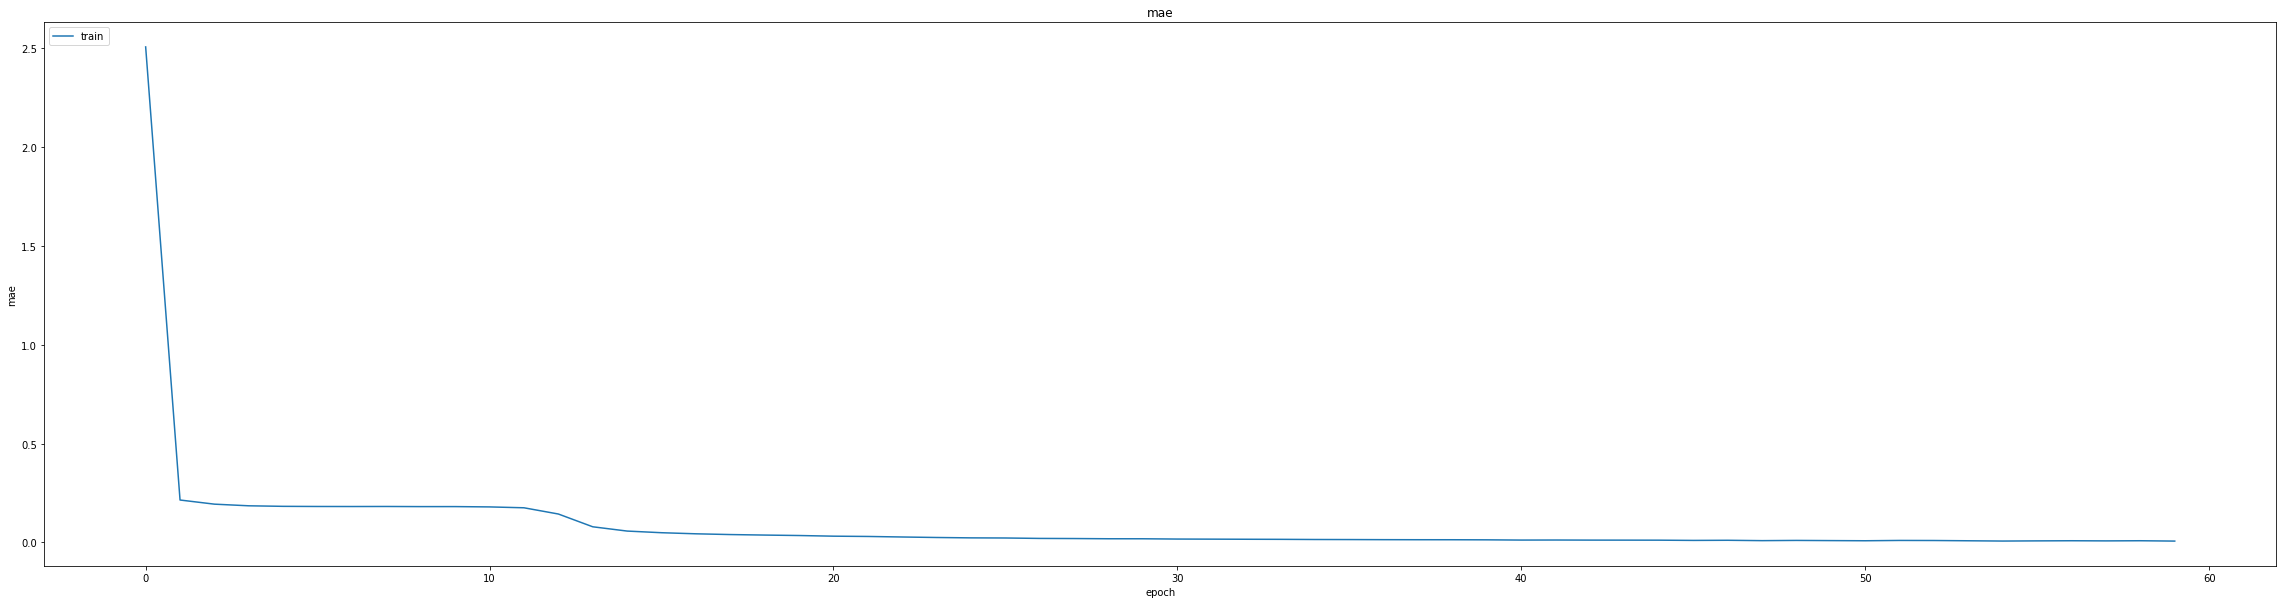

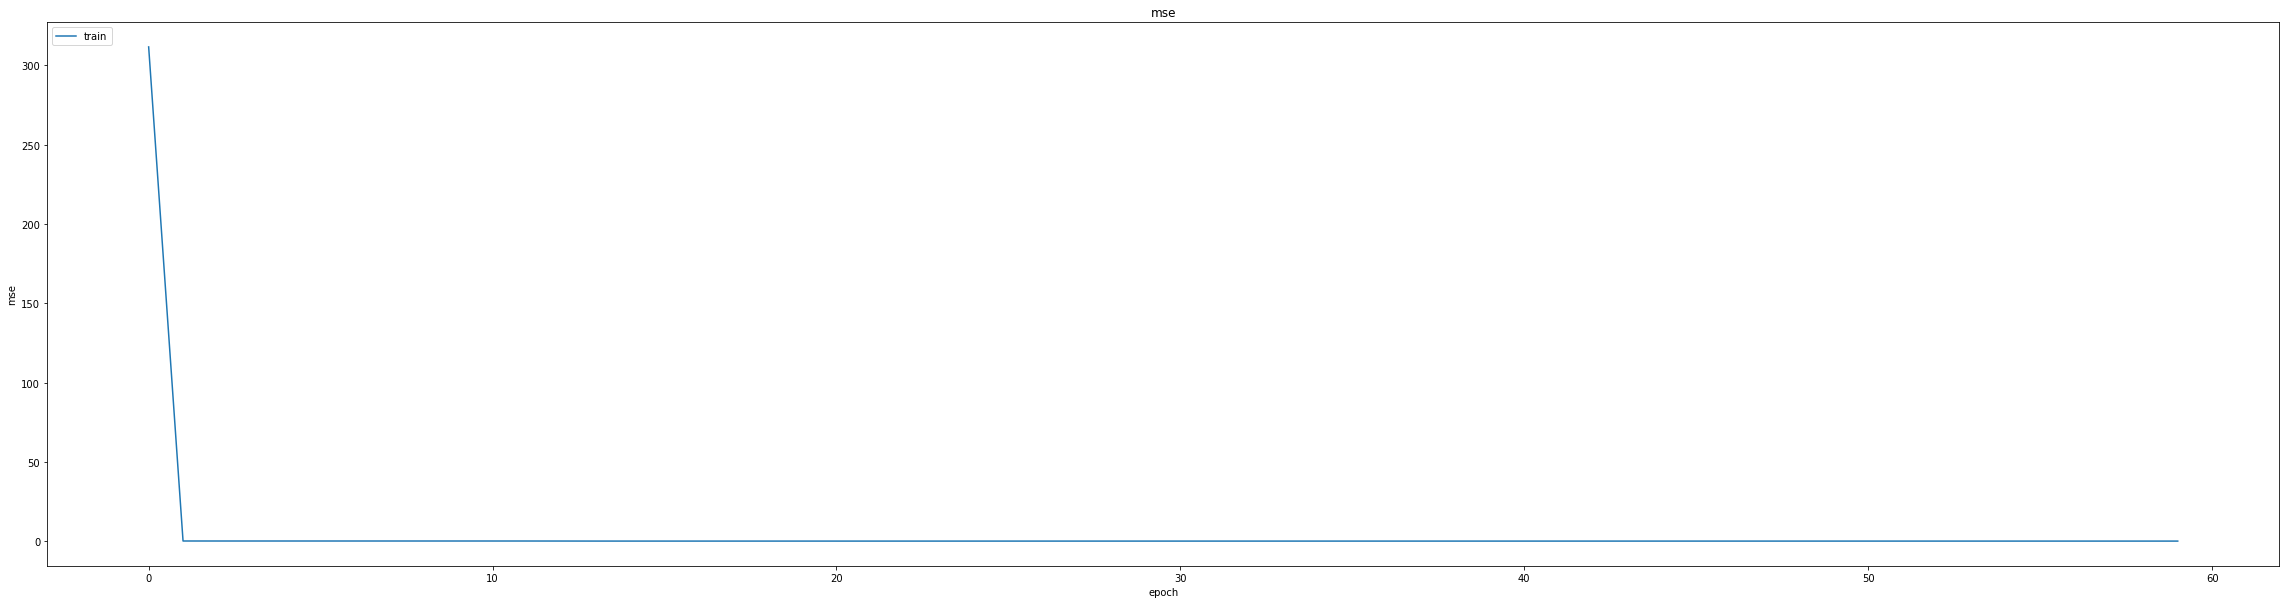

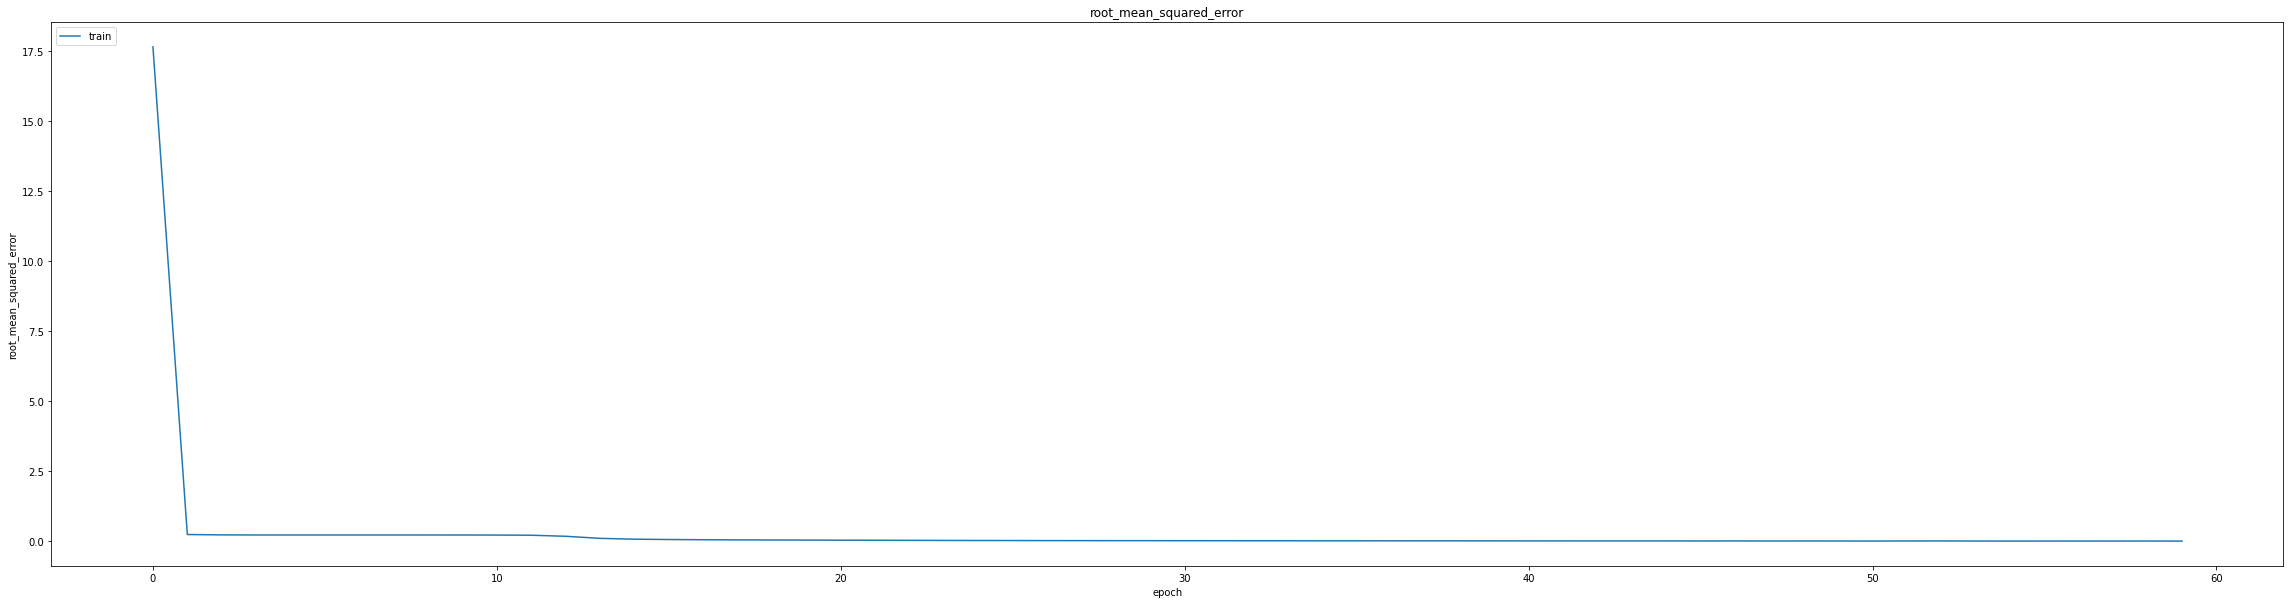

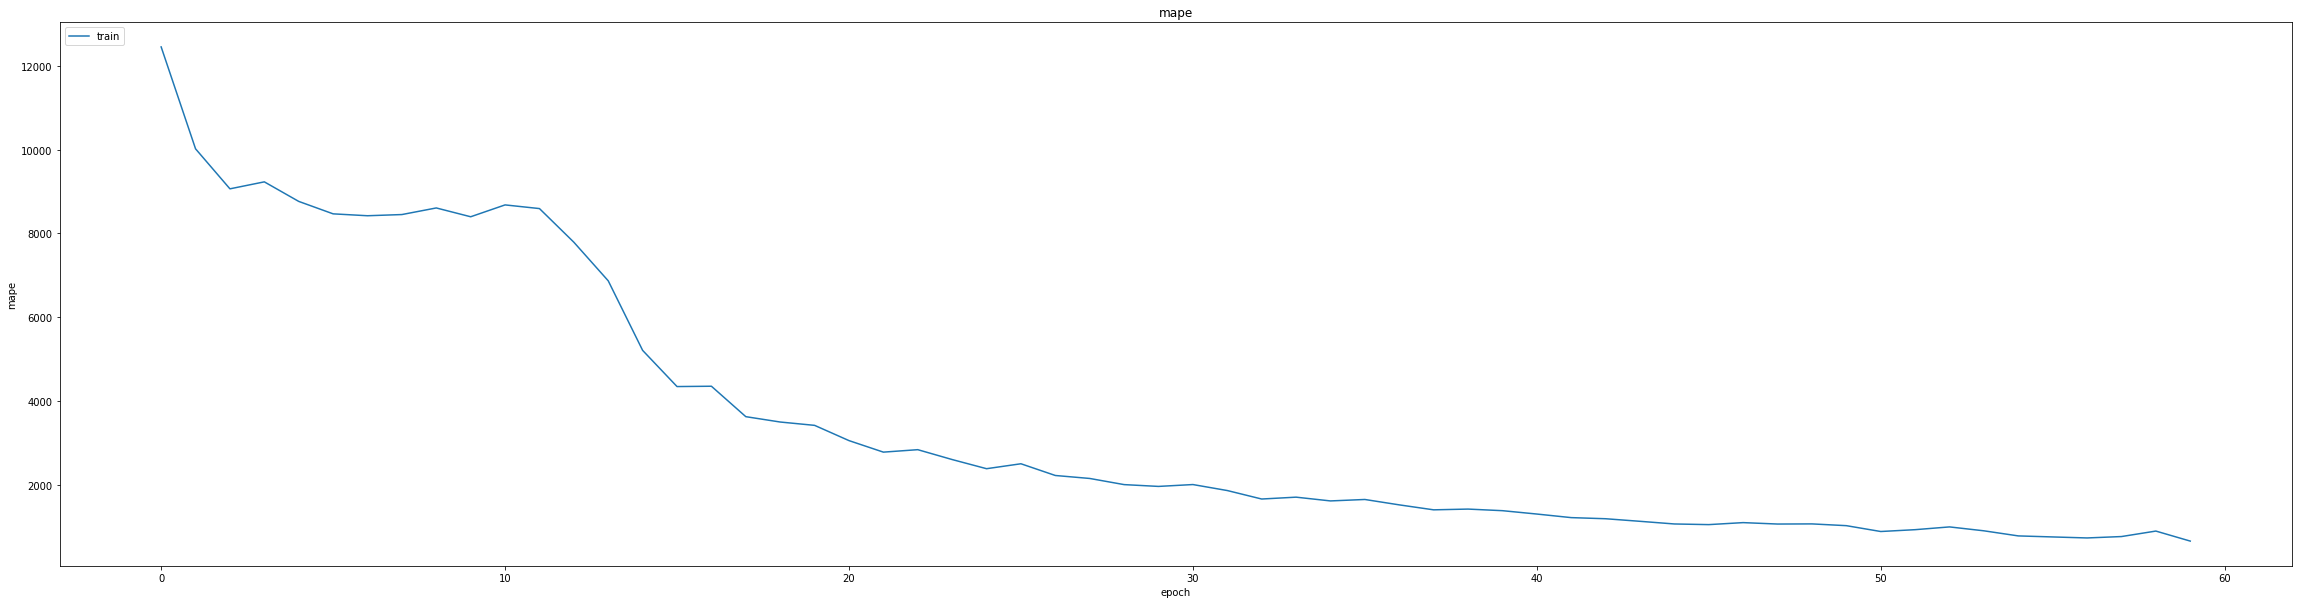

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.030777020379900932
0.039162199944257736
348/348 [==============================] - 2s 4ms/step
0.8654416389880503


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


401/406 [============================>.] - ETA: 0s - loss: 0.0118 - mae: 0.0525 - mse: 0.0118 - root_mean_squared_error: 0.1084 - mape: 2223.1758
Epoch 1: val_mse did not improve from 0.00153
406/406 [==============================] - 13s 19ms/step - loss: 0.0116 - mae: 0.0521 - mse: 0.0116 - root_mean_squared_error: 0.1078 - mape: 2197.6367 - val_loss: 0.0045 - val_mae: 0.0600 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0670 - val_mape: 9521.3574 - lr: 0.0010
Epoch 2/25
402/406 [============================>.] - ETA: 0s - loss: 4.3167e-04 - mae: 0.0154 - mse: 4.3167e-04 - root_mean_squared_error: 0.0208 - mape: 1721.2407
Epoch 2: val_mse did not improve from 0.00153
406/406 [==============================] - 4s 11ms/step - loss: 4.3090e-04 - mae: 0.0154 - mse: 4.3090e-04 - root_mean_squared_error: 0.0208 - mape: 1705.8003 - val_loss: 0.0068 - val_mae: 0.0721 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0824 - val_mape: 7562.9561 - lr: 0.0010
lr changed to 0.00090000004274

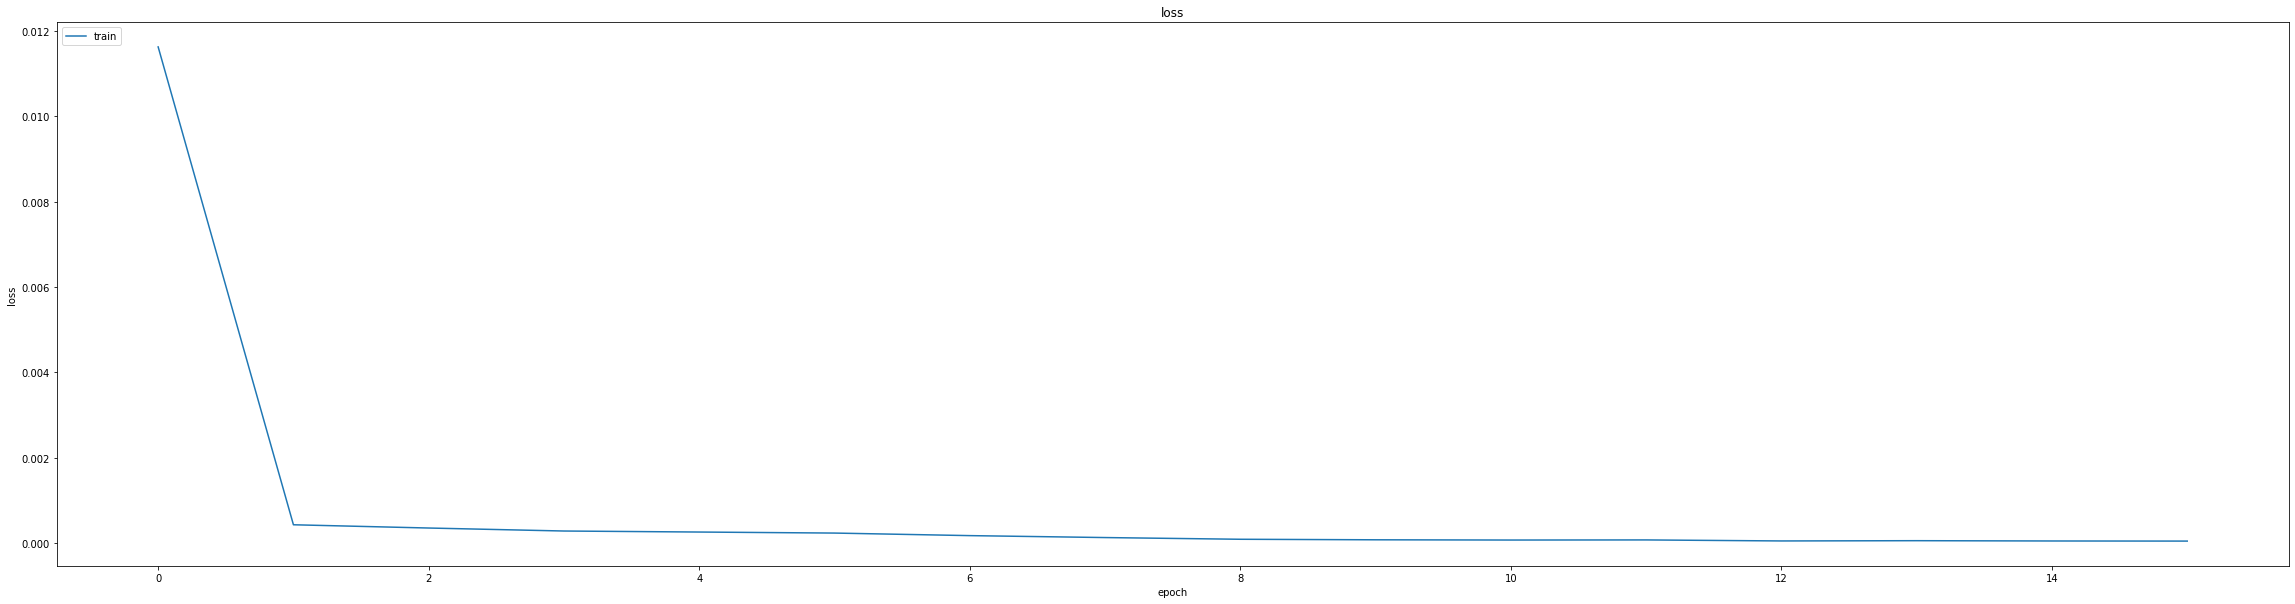

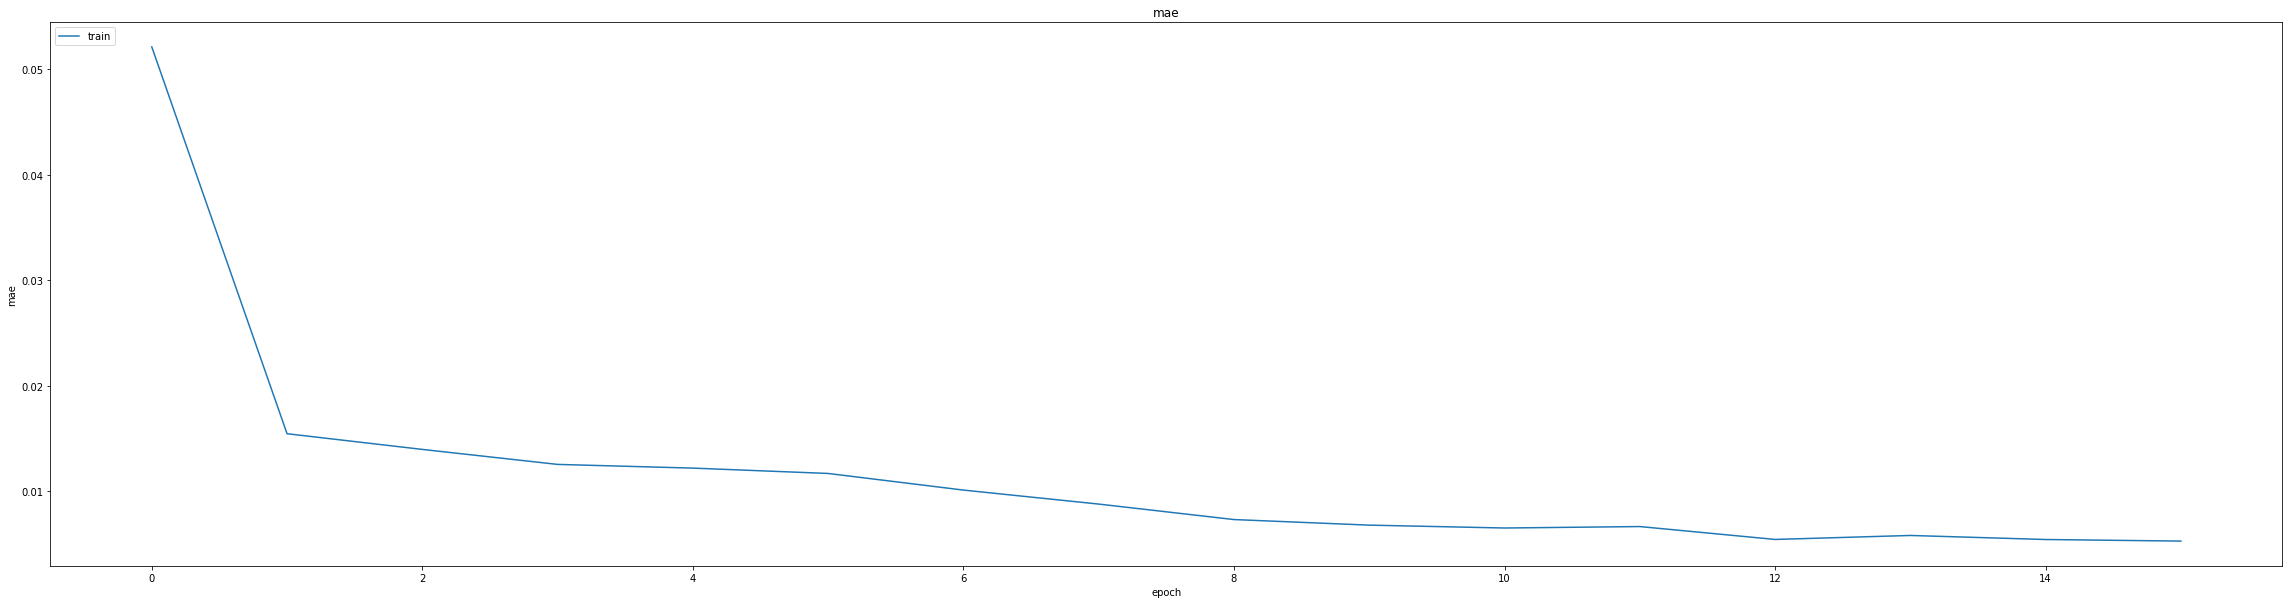

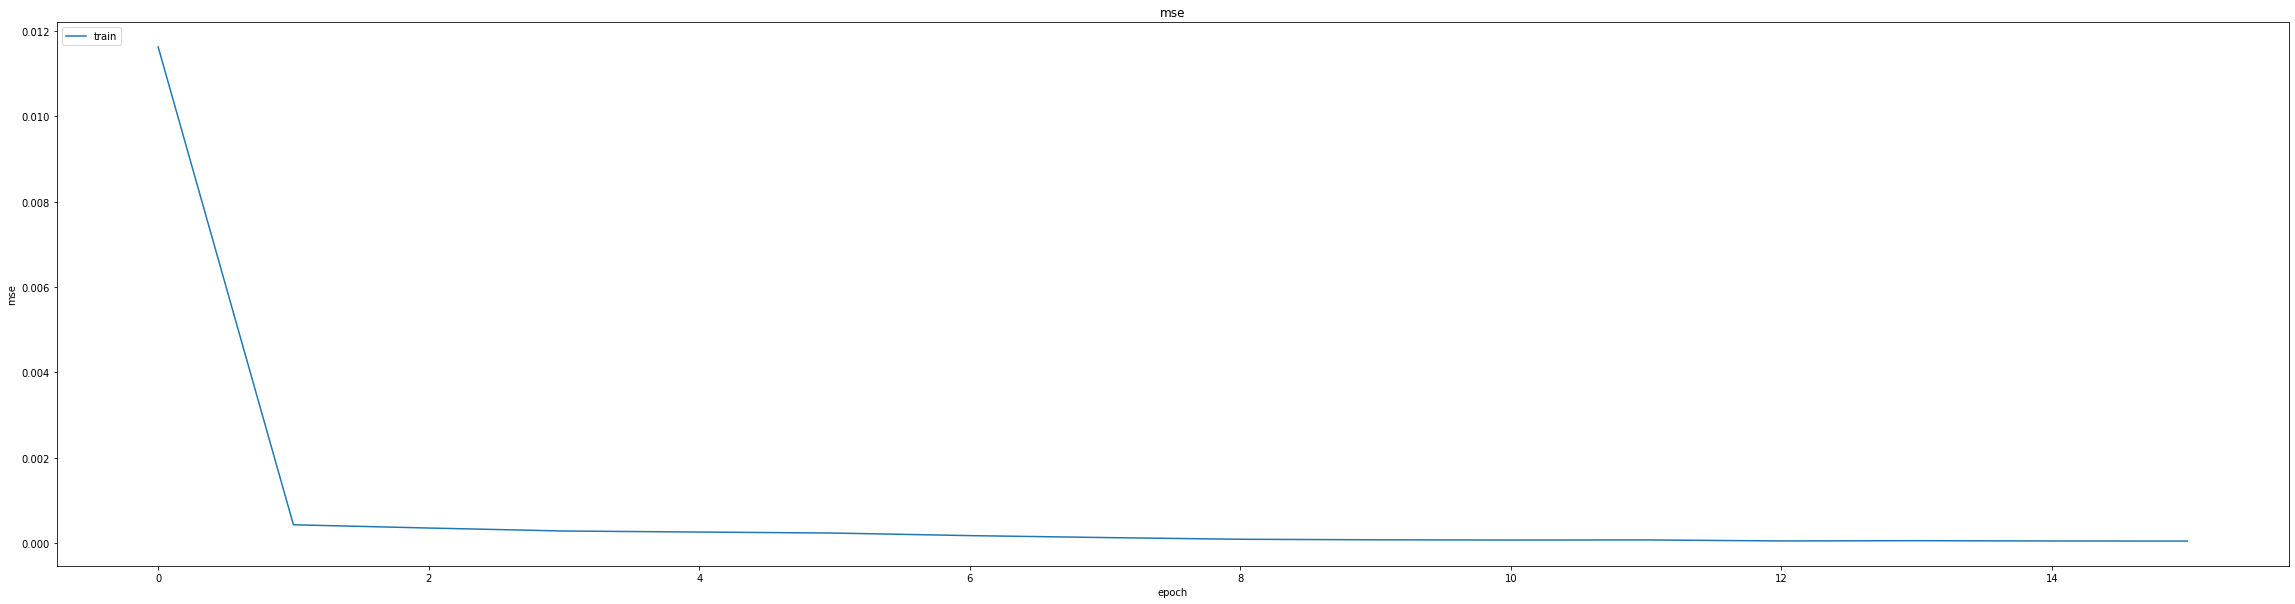

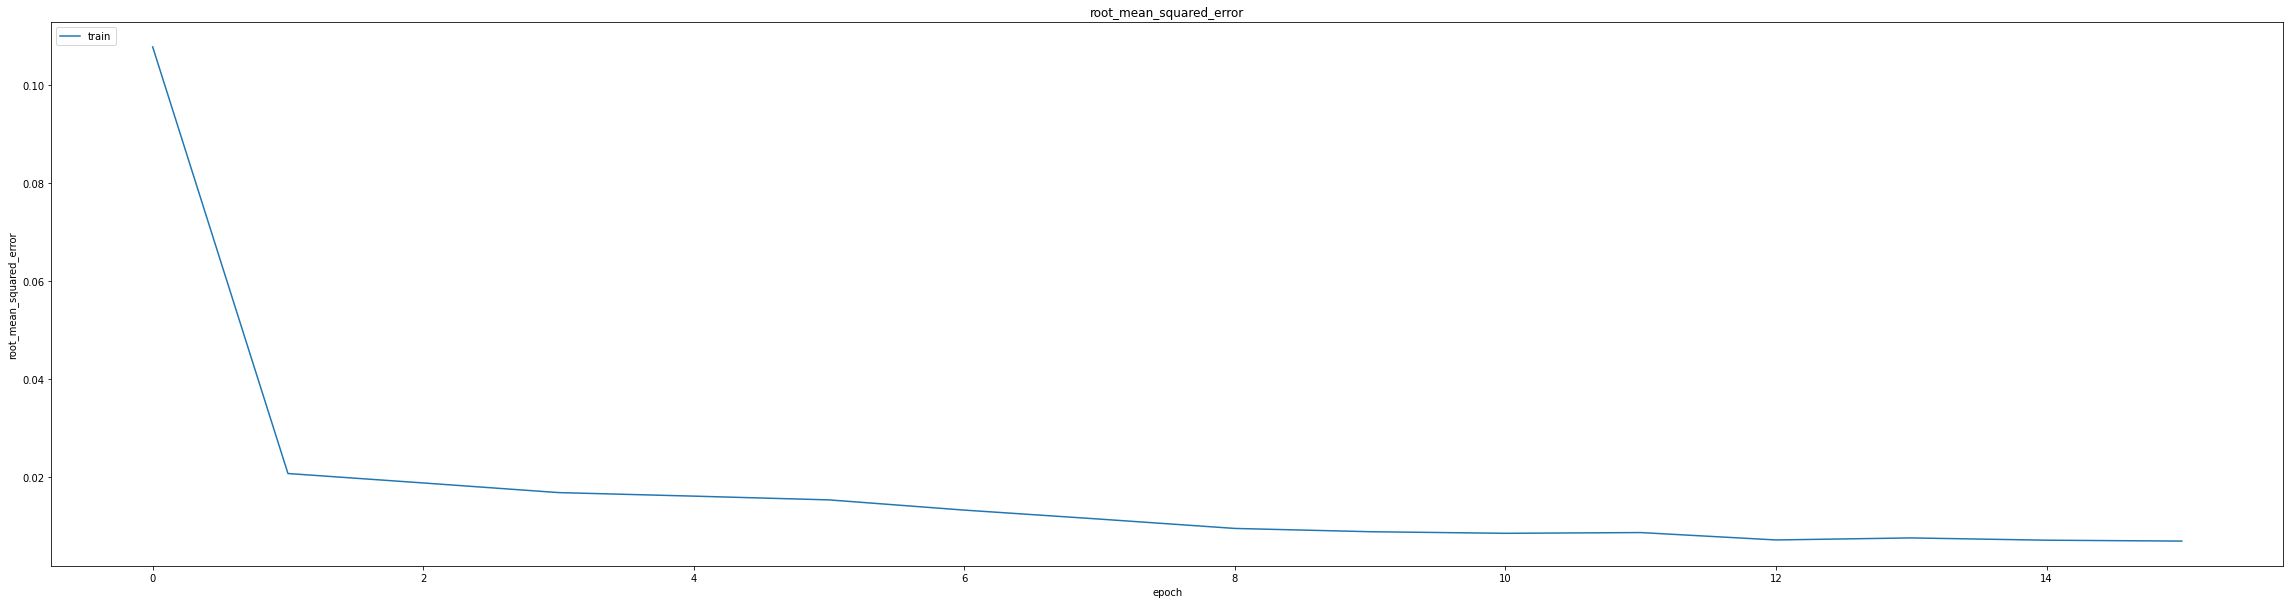

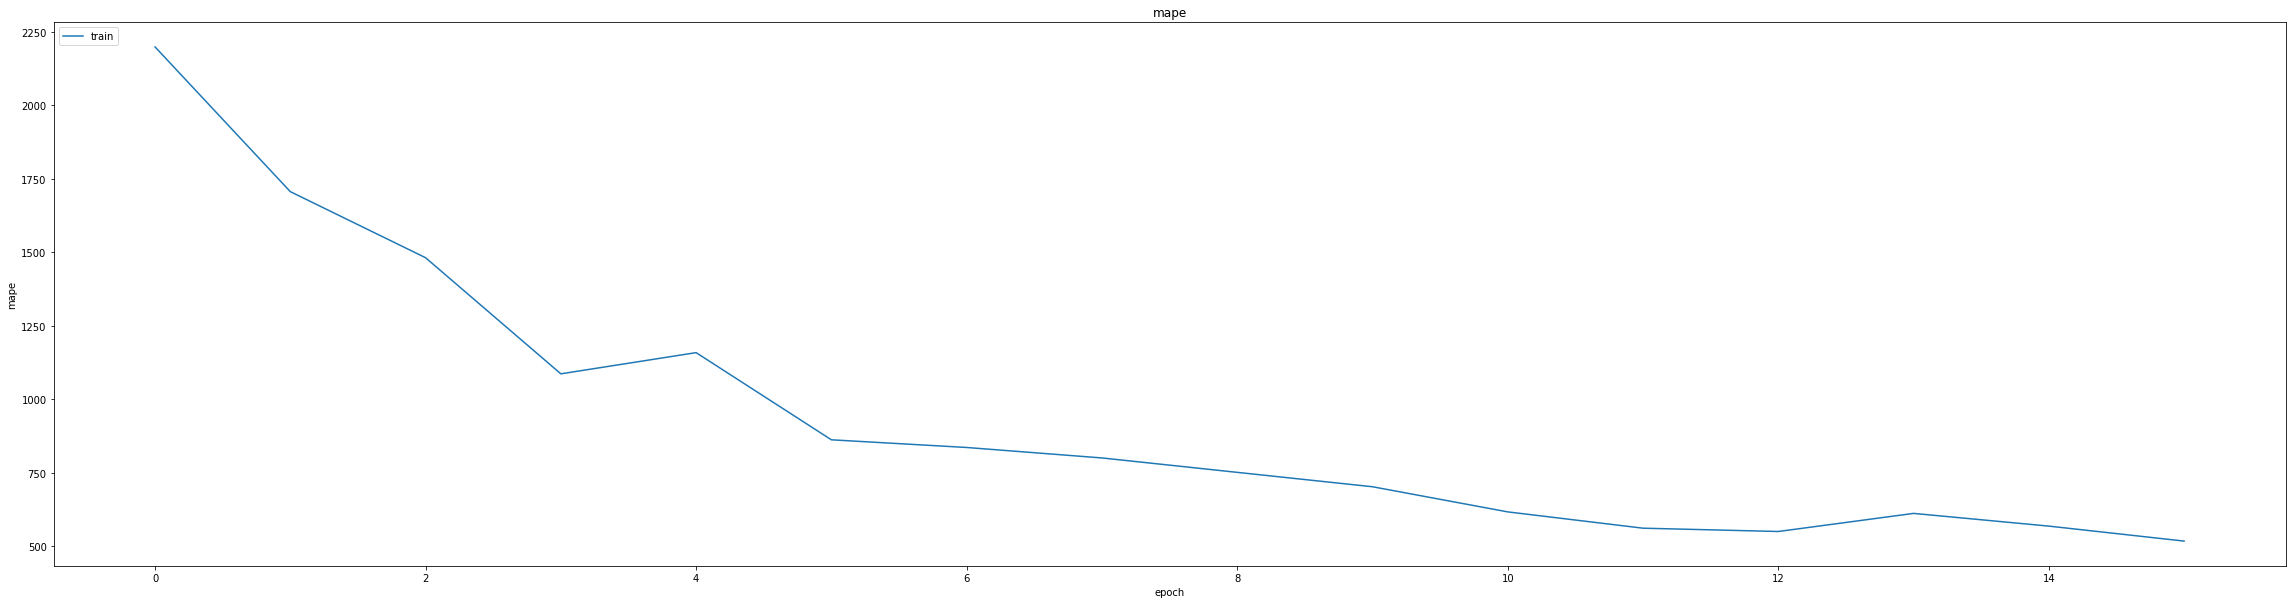

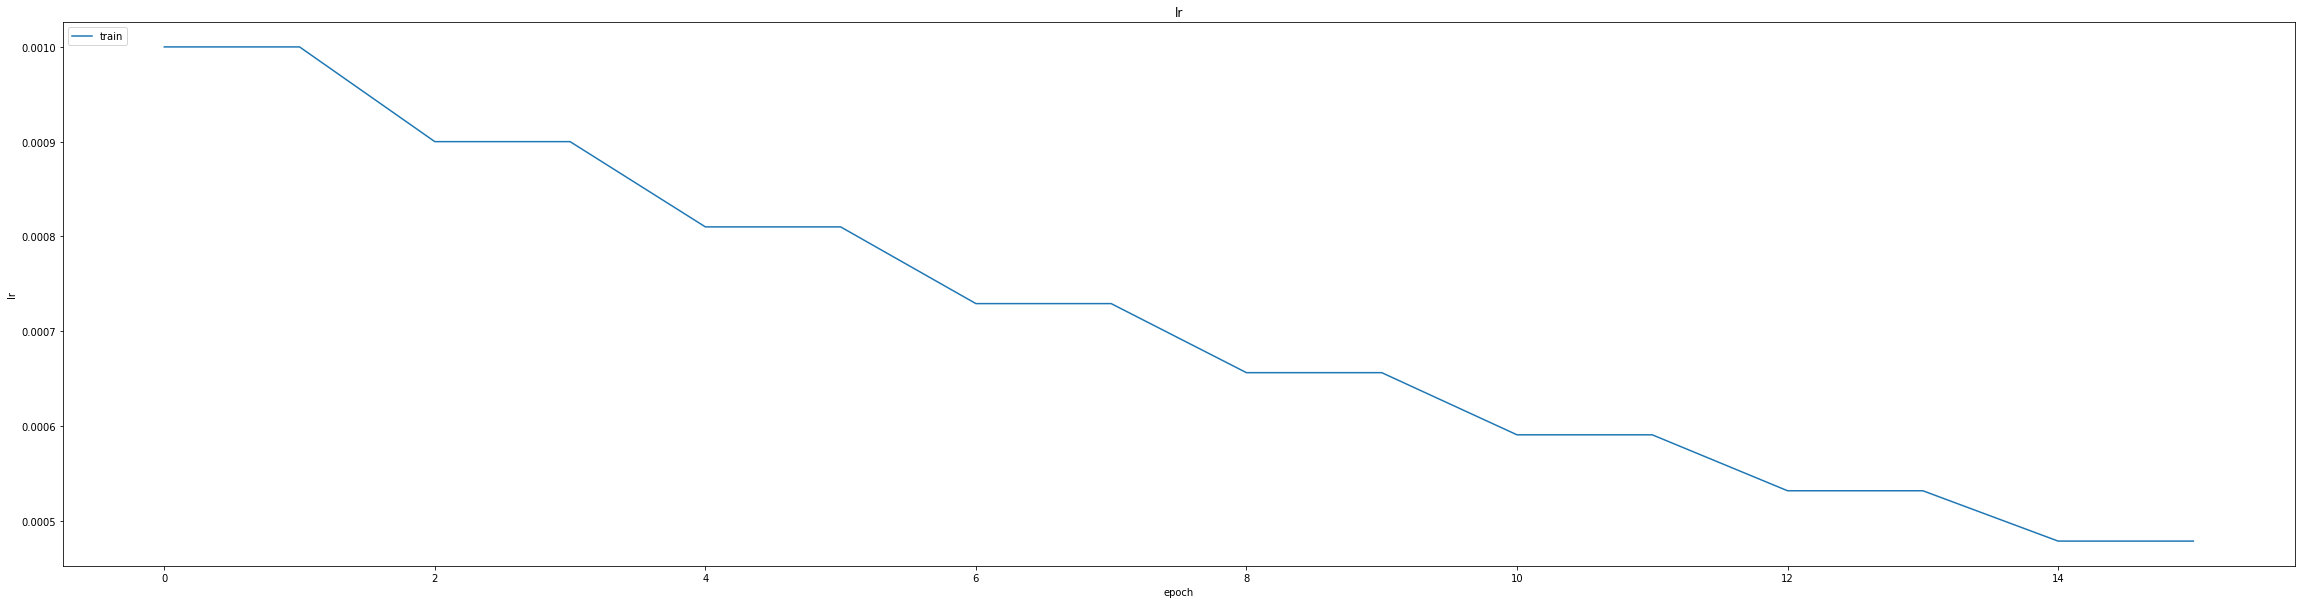

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.05998031422495842
0.06700393557548523
348/348 [==============================] - 2s 4ms/step
0.74593475029572


348/348 [==============================] - 1s 4ms/step


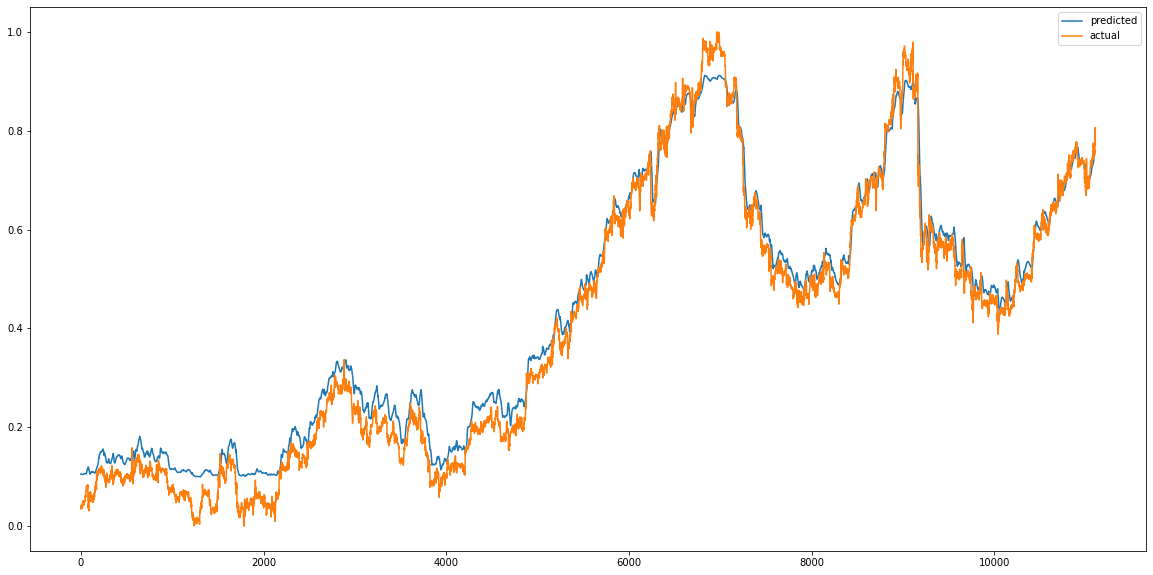

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


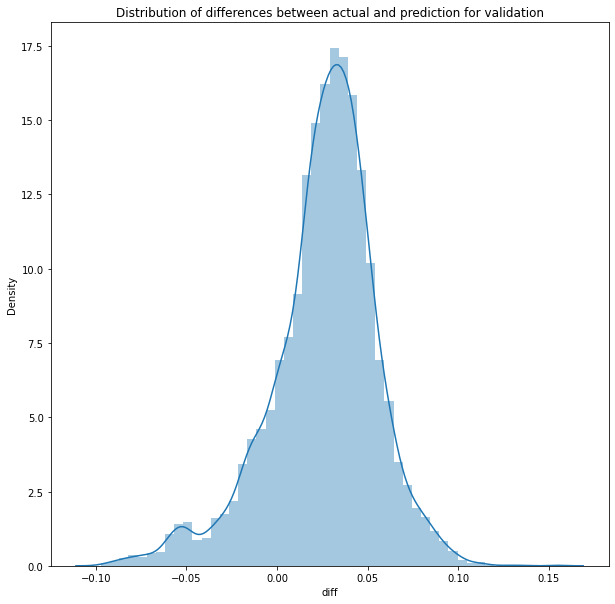

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


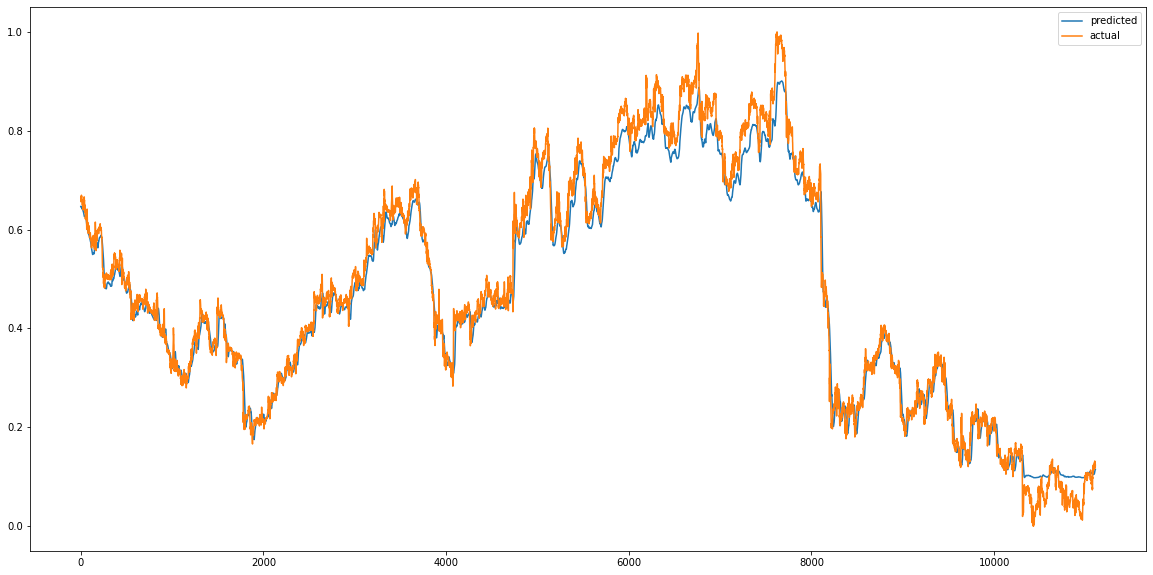

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


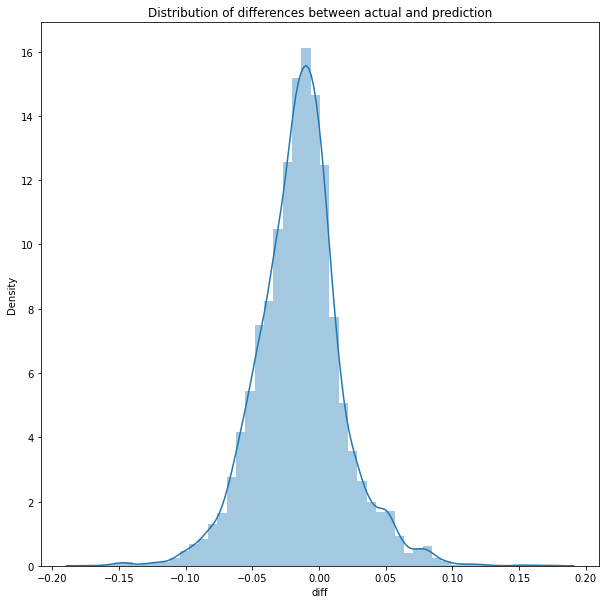

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0012450128666994574
RMSE :  0.03528473985591303
MAE :  0.02680681895094779
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9788484538174242


count    11109.000000
mean        -0.014350
std          0.032237
min         -0.174363
25%         -0.033174
50%         -0.013655
75%          0.002734
max          0.175740
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
406/406 [==============================] - ETA: 0s - loss: 285.1526 - mae: 2.4577 - mse: 285.1526 - root_mean_squared_error: 16.8865 - mape: 10814.8516
Epoch 1: val_mse improved from inf to 0.08546, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 38s 72ms/step - loss: 285.1526 - mae: 2.4577 - mse: 285.1526 - root_mean_squared_error: 16.8865 - mape: 10814.8516 - val_loss: 0.0855 - val_mae: 0.2589 - val_mse: 0.0855 - val_root_mean_squared_error: 0.2923 - val_mape: 43214.0820
Epoch 2/75
405/406 [============================>.] - ETA: 0s - loss: 0.0293 - mae: 0.1333 - mse: 0.0293 - root_mean_squared_error: 0.1712 - mape: 7716.6821
Epoch 2: val_mse improved from 0.08546 to 0.04825, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 0.0293 - mae: 0.1333 - mse: 0.0293 - root_mean_squared_error: 0.1711 - mape: 7703.9629 - val_loss: 0.0483 - val_mae: 0.1921 - val_mse: 0.0483 - val_root_mean_squared_error: 0.2197 - val_mape: 37309.8555
Epoch 3/75
404/406 [============================>.] - ETA: 0s - loss: 0.0144 - mae: 0.0936 - mse: 0.0144 - root_mean_squared_error: 0.1199 - mape: 6576.1323
Epoch 3: val_mse improved from 0.04825 to 0.03469, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 29s 71ms/step - loss: 0.0144 - mae: 0.0934 - mse: 0.0144 - root_mean_squared_error: 0.1198 - mape: 6549.1265 - val_loss: 0.0347 - val_mae: 0.1580 - val_mse: 0.0347 - val_root_mean_squared_error: 0.1862 - val_mape: 32978.8867
Epoch 4/75
405/406 [============================>.] - ETA: 0s - loss: 0.0084 - mae: 0.0704 - mse: 0.0084 - root_mean_squared_error: 0.0914 - mape: 5522.1025
Epoch 4: val_mse did not improve from 0.03469
406/406 [==============================] - 6s 14ms/step - loss: 0.0084 - mae: 0.0703 - mse: 0.0084 - root_mean_squared_error: 0.0914 - mape: 5512.9878 - val_loss: 0.0404 - val_mae: 0.1828 - val_mse: 0.0404 - val_root_mean_squared_error: 0.2009 - val_mape: 29699.0430
Epoch 5/75
403/406 [============================>.] - ETA: 0s - loss: 0.0048 - mae: 0.0518 - mse: 0.0048 - root_mean_squared_error: 0.0695 - mape: 4790.9810
Epoch 5: val_mse did not improve from 0.03469
406/406 [==============================] - 6s 14ms/step - l

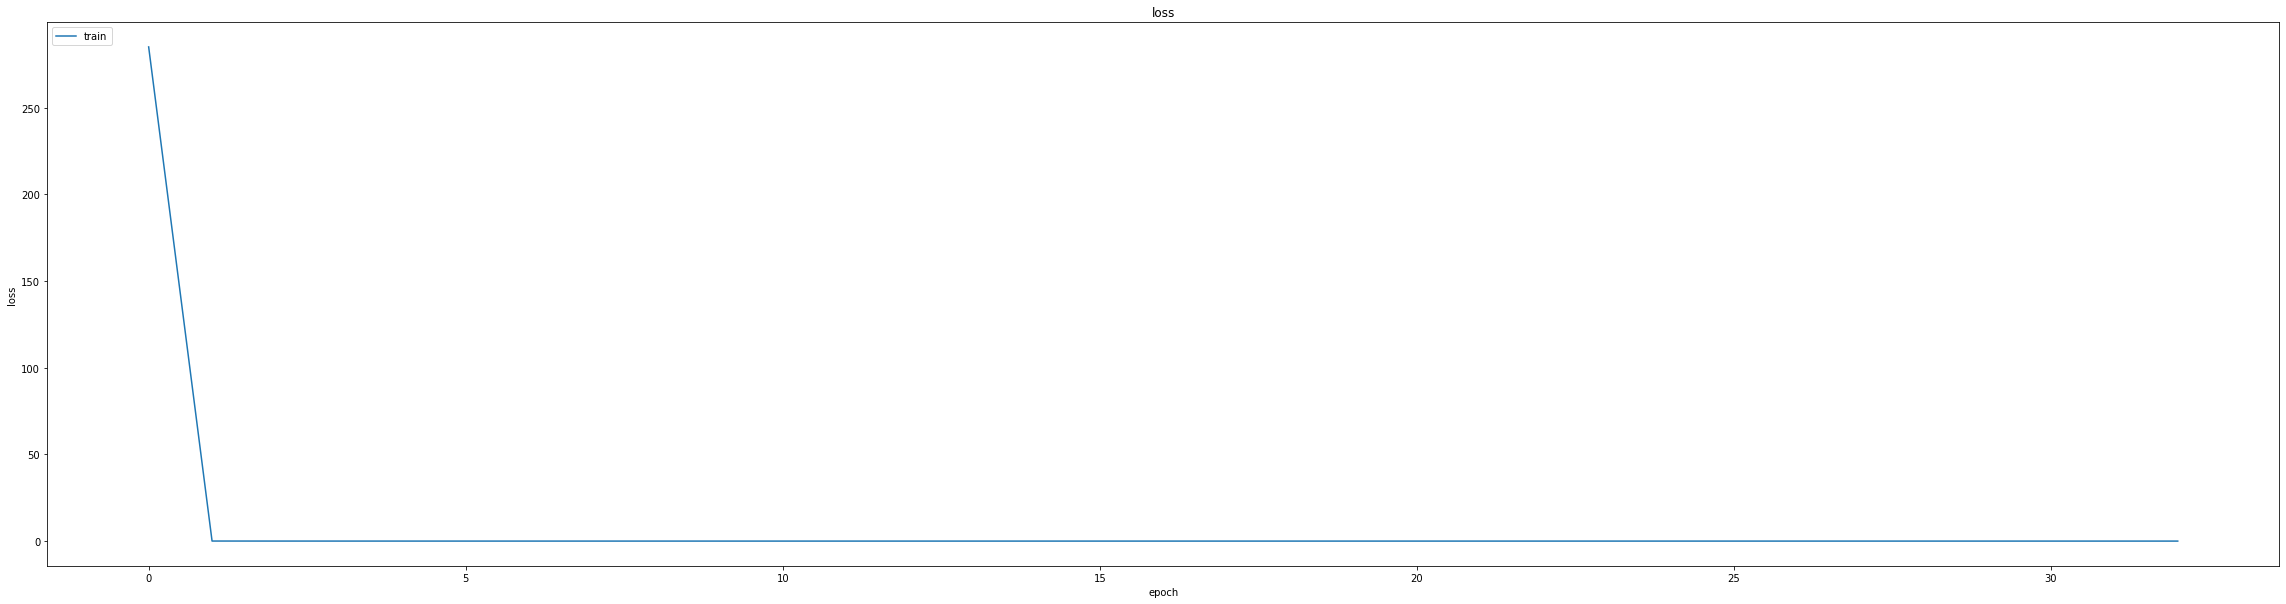

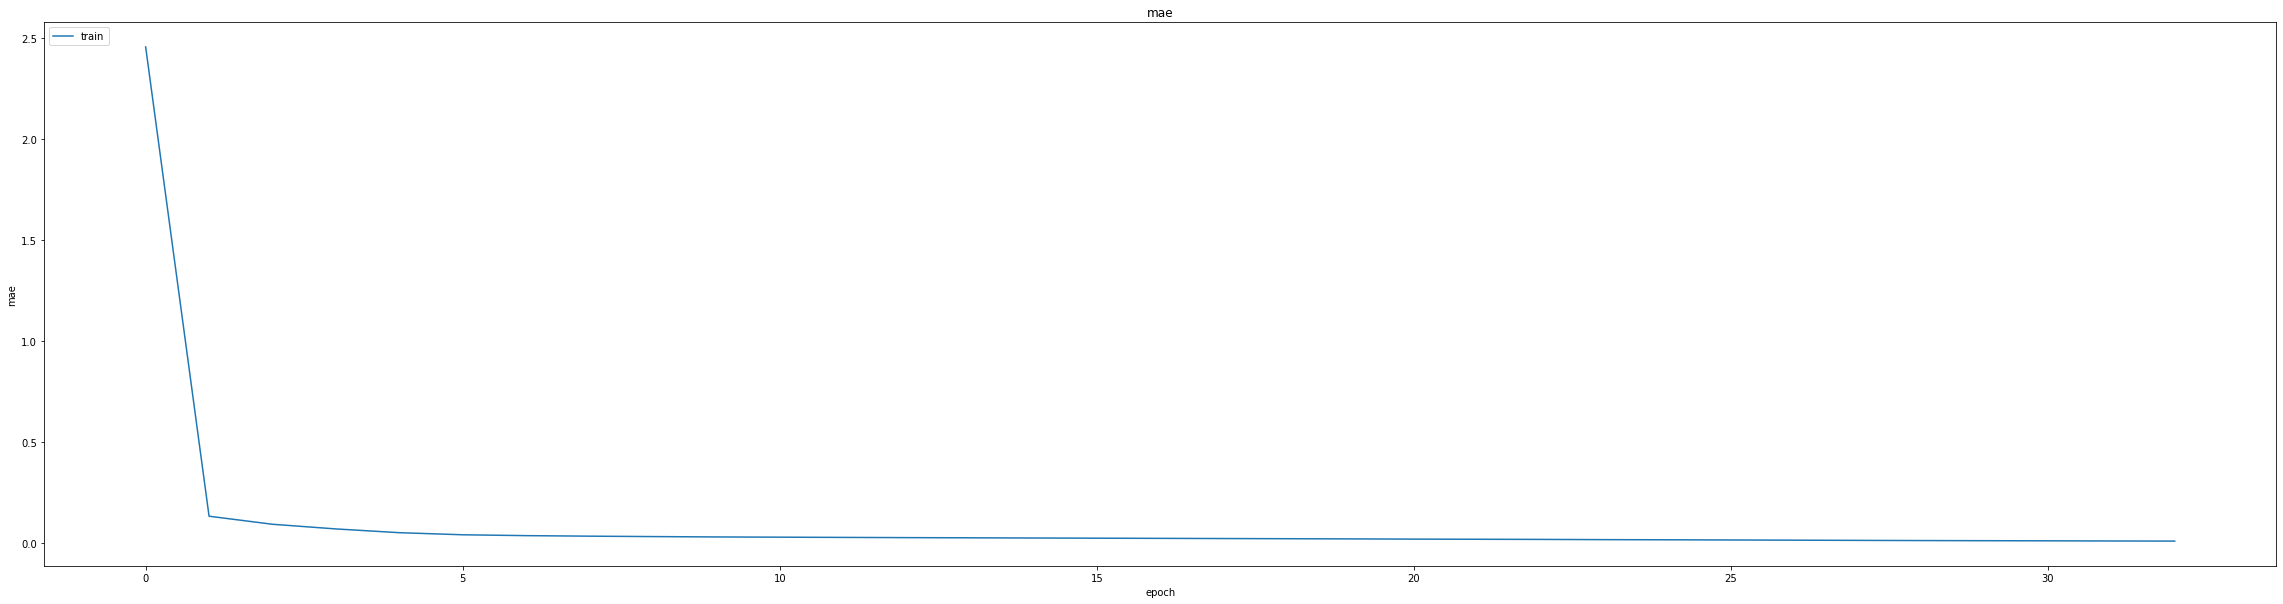

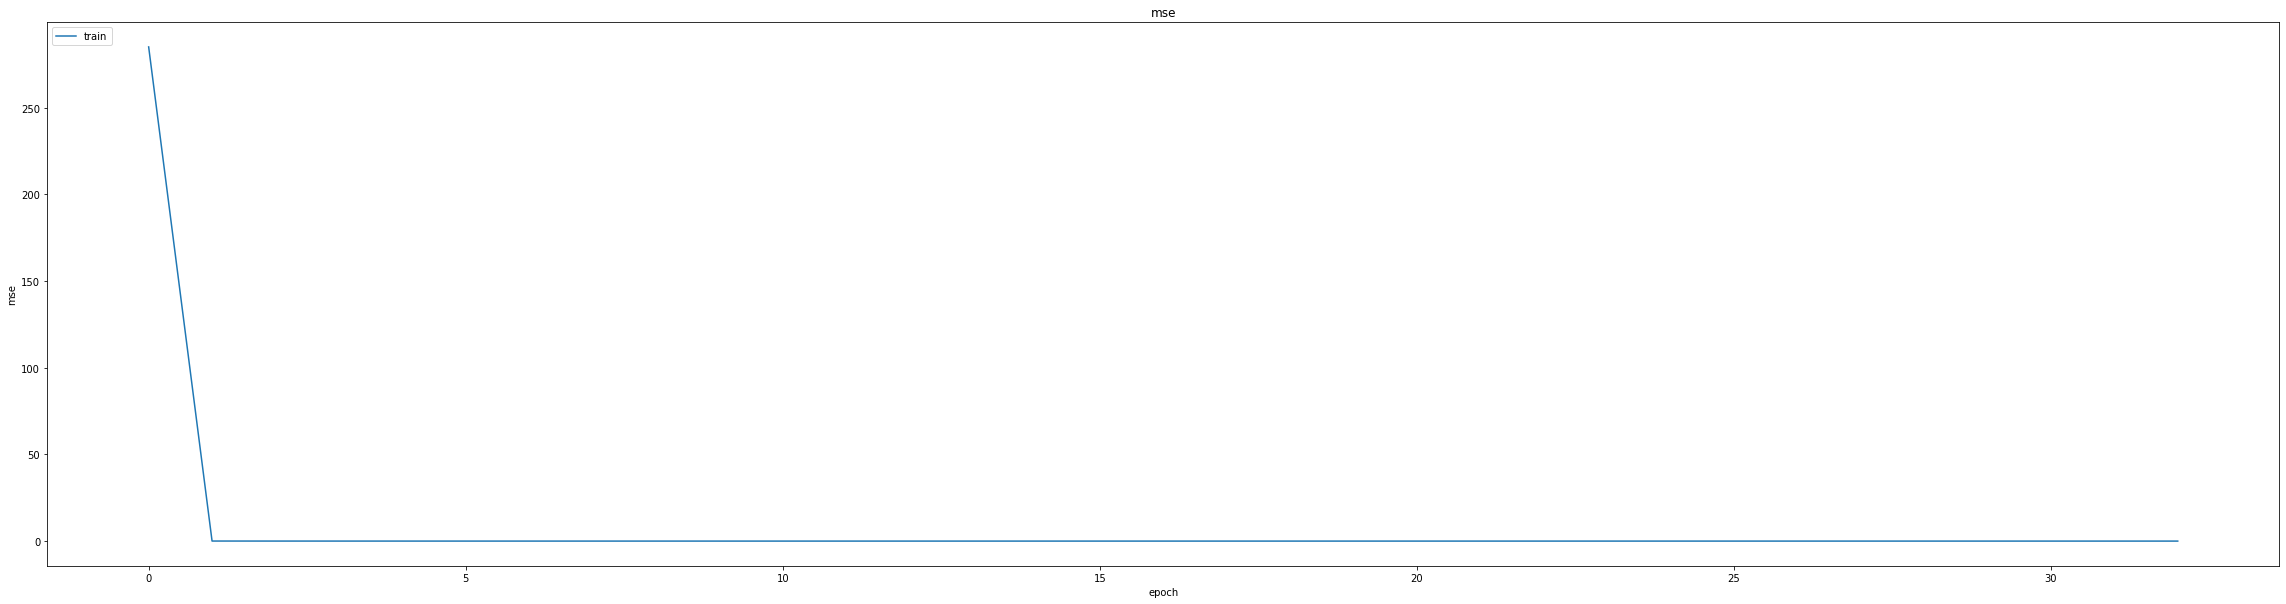

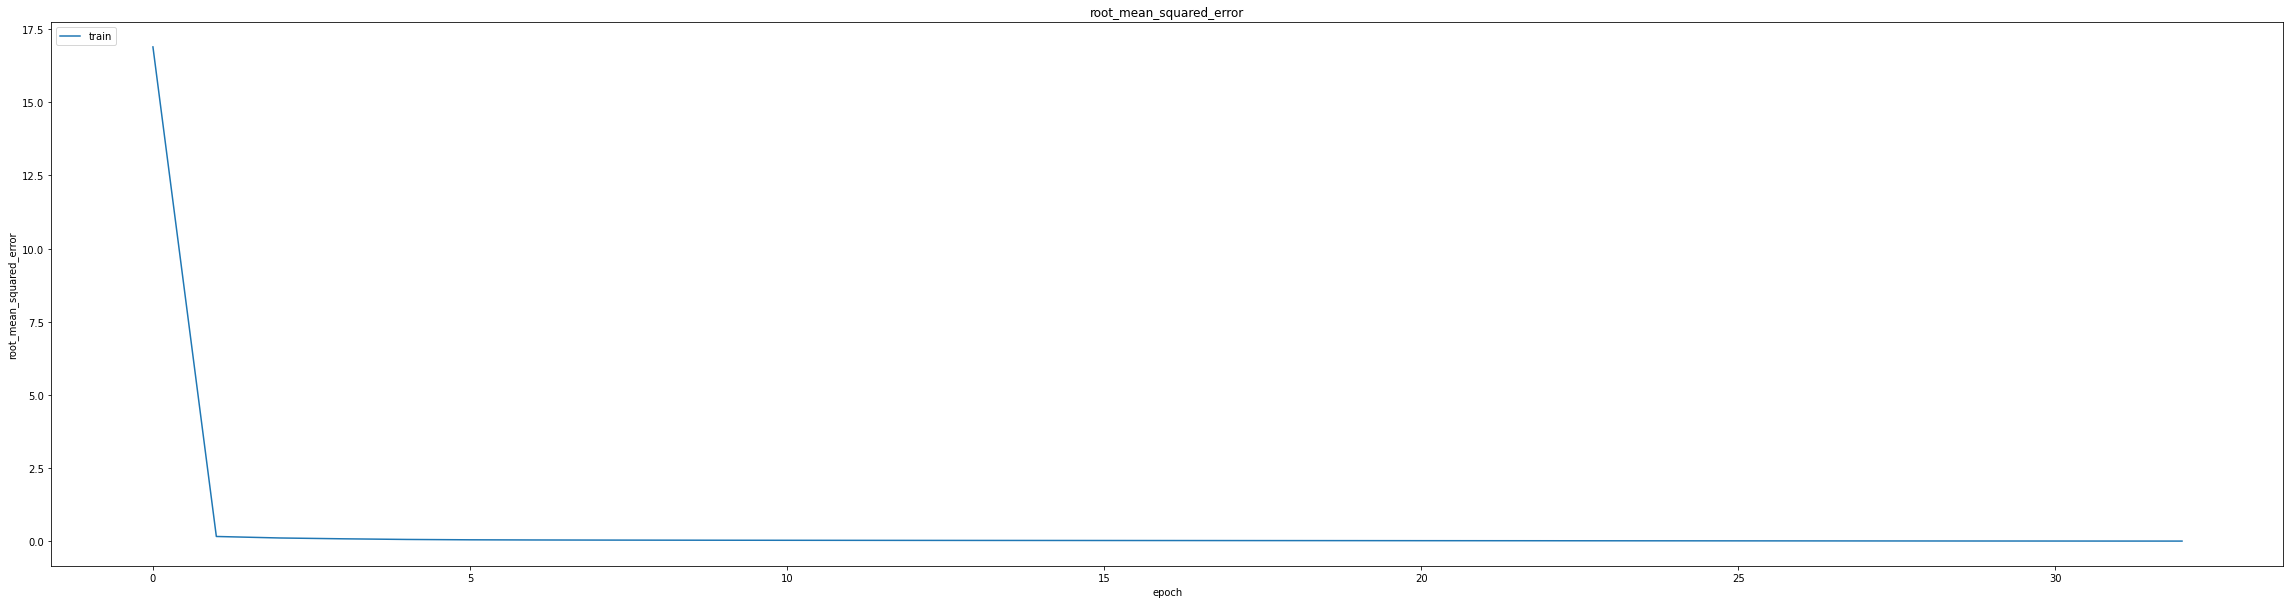

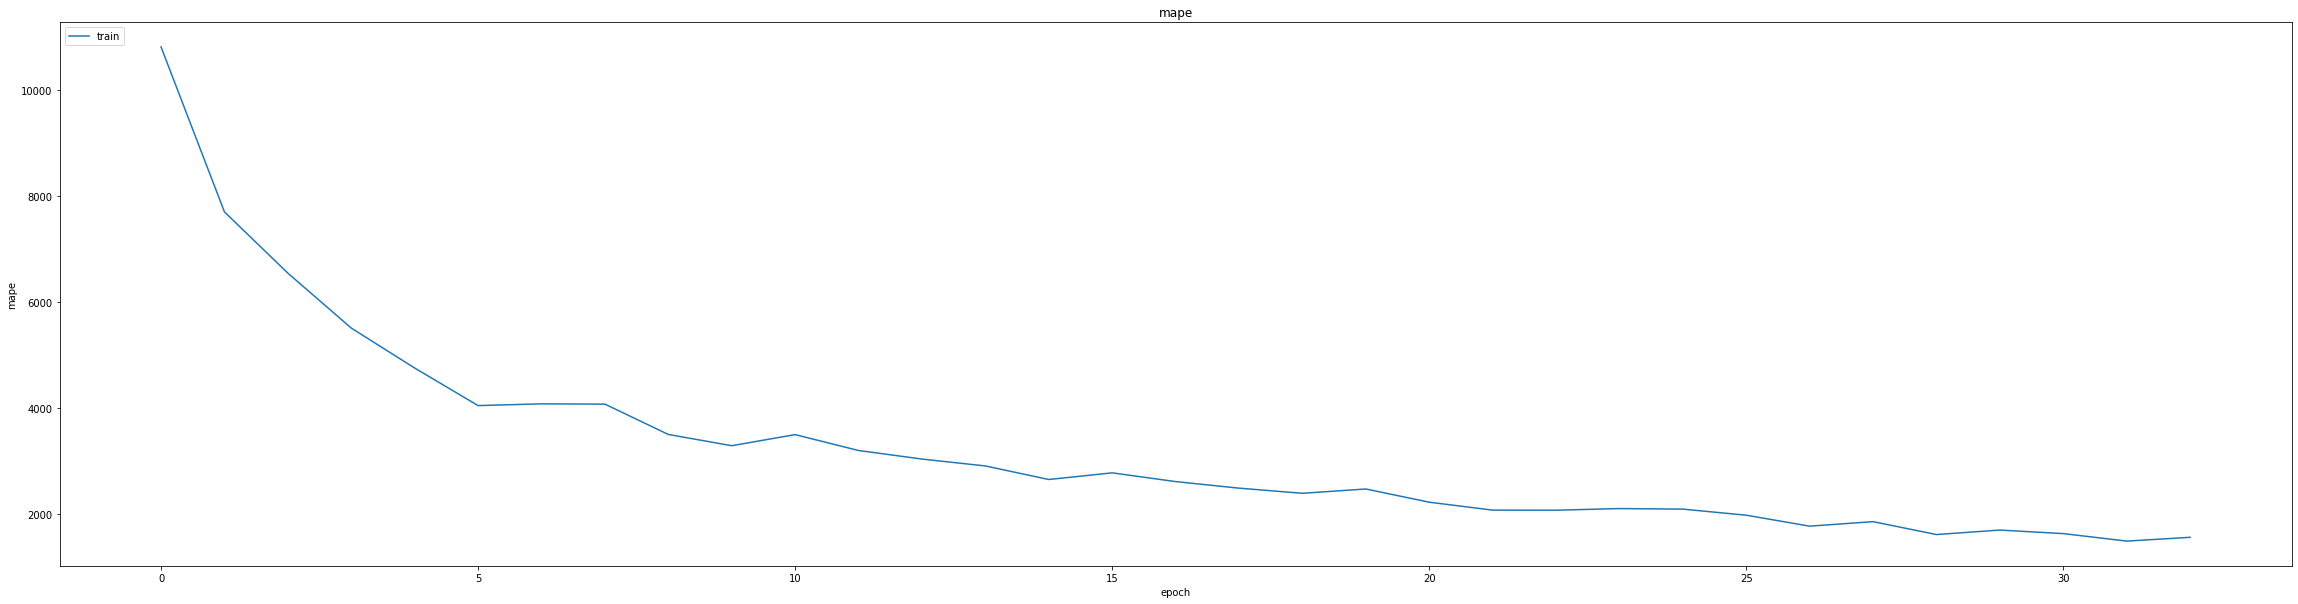

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.15802335739135742
0.18624450266361237
348/348 [==============================] - 3s 5ms/step
-0.13496942510157228


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


405/406 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0335 - mse: 0.0030 - root_mean_squared_error: 0.0549 - mape: 1630.8900
Epoch 1: val_mse improved from 0.03469 to 0.00978, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 36s 71ms/step - loss: 0.0030 - mae: 0.0335 - mse: 0.0030 - root_mean_squared_error: 0.0548 - mape: 1628.1968 - val_loss: 0.0098 - val_mae: 0.0932 - val_mse: 0.0098 - val_root_mean_squared_error: 0.0989 - val_mape: 12092.4033 - lr: 0.0010
Epoch 2/25
403/406 [============================>.] - ETA: 0s - loss: 2.9669e-04 - mae: 0.0130 - mse: 2.9669e-04 - root_mean_squared_error: 0.0172 - mape: 1459.5879
Epoch 2: val_mse improved from 0.00978 to 0.00767, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)


406/406 [==============================] - 28s 69ms/step - loss: 2.9661e-04 - mae: 0.0130 - mse: 2.9661e-04 - root_mean_squared_error: 0.0172 - mape: 1450.0280 - val_loss: 0.0077 - val_mae: 0.0821 - val_mse: 0.0077 - val_root_mean_squared_error: 0.0876 - val_mape: 9858.3086 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
406/406 [==============================] - ETA: 0s - loss: 1.6446e-04 - mae: 0.0098 - mse: 1.6446e-04 - root_mean_squared_error: 0.0128 - mape: 853.8484
Epoch 3: val_mse did not improve from 0.00767
406/406 [==============================] - 6s 15ms/step - loss: 1.6446e-04 - mae: 0.0098 - mse: 1.6446e-04 - root_mean_squared_error: 0.0128 - mape: 853.8484 - val_loss: 0.0099 - val_mae: 0.0936 - val_mse: 0.0099 - val_root_mean_squared_error: 0.0995 - val_mape: 11154.9580 - lr: 9.0000e-04
Epoch 4/25
403/406 [============================>.] - ETA: 0s - loss: 1.3071e-04 - mae: 0.0087 - mse: 1.3071e-04 - root_mean_squared_error: 0.0114 - mape: 844.7141
Epoch 4: va

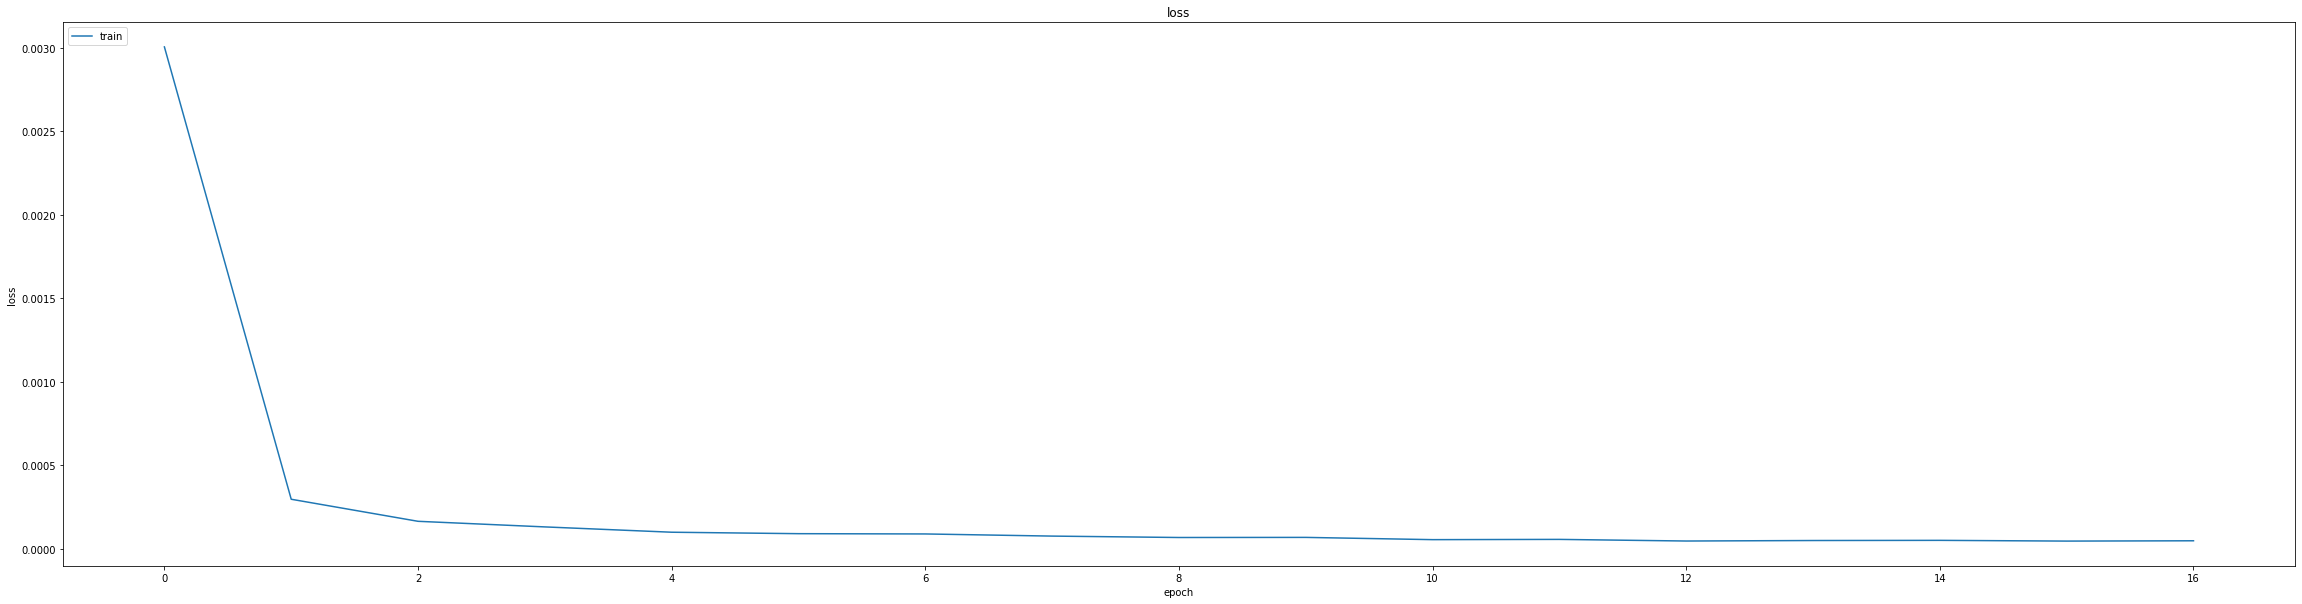

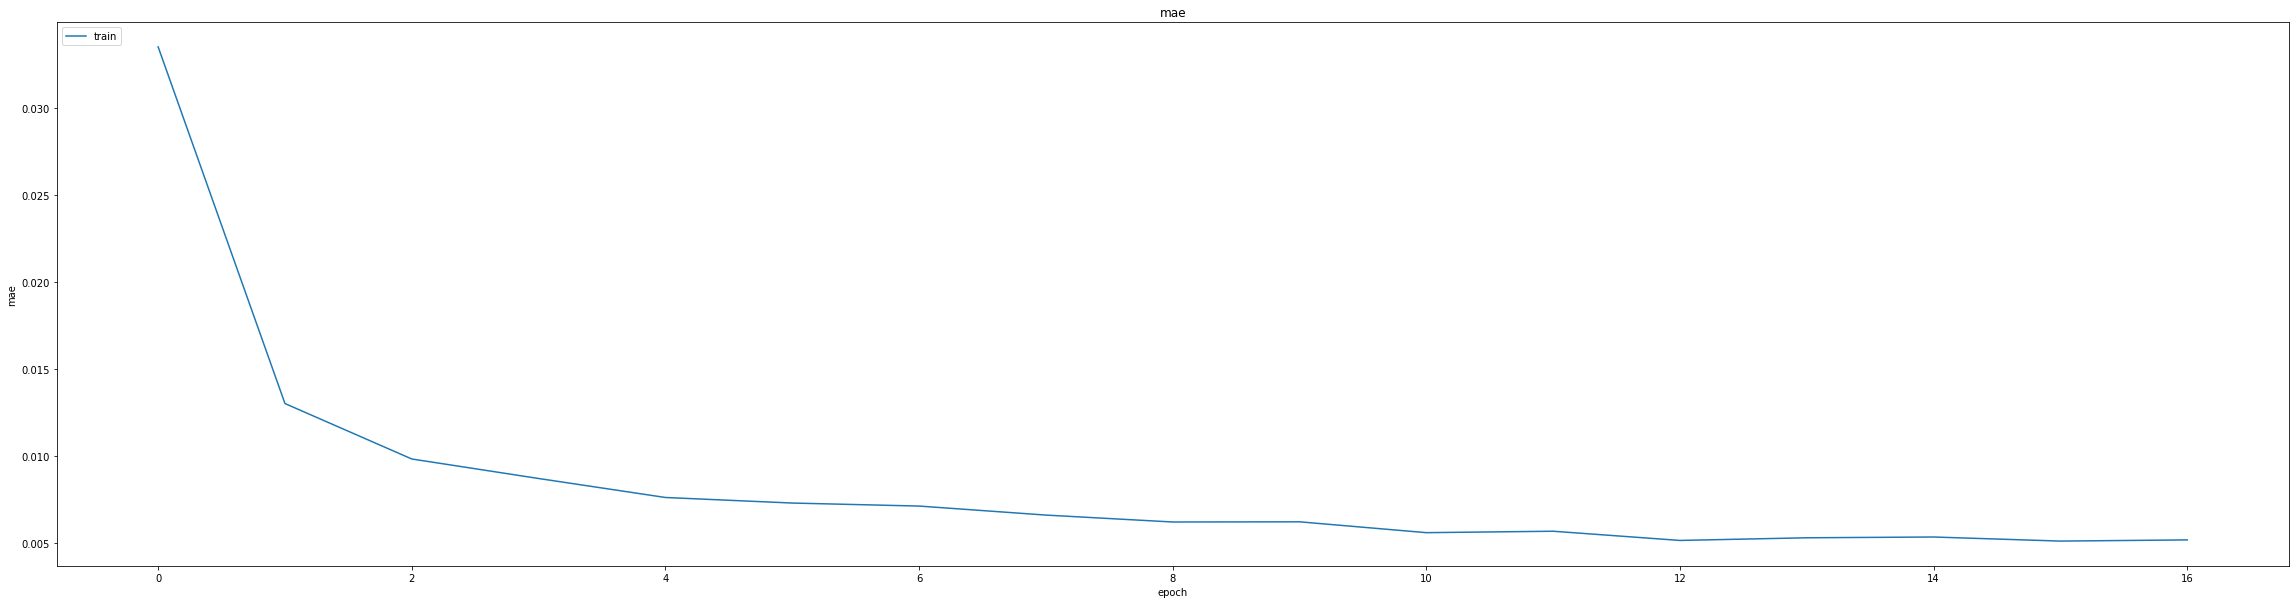

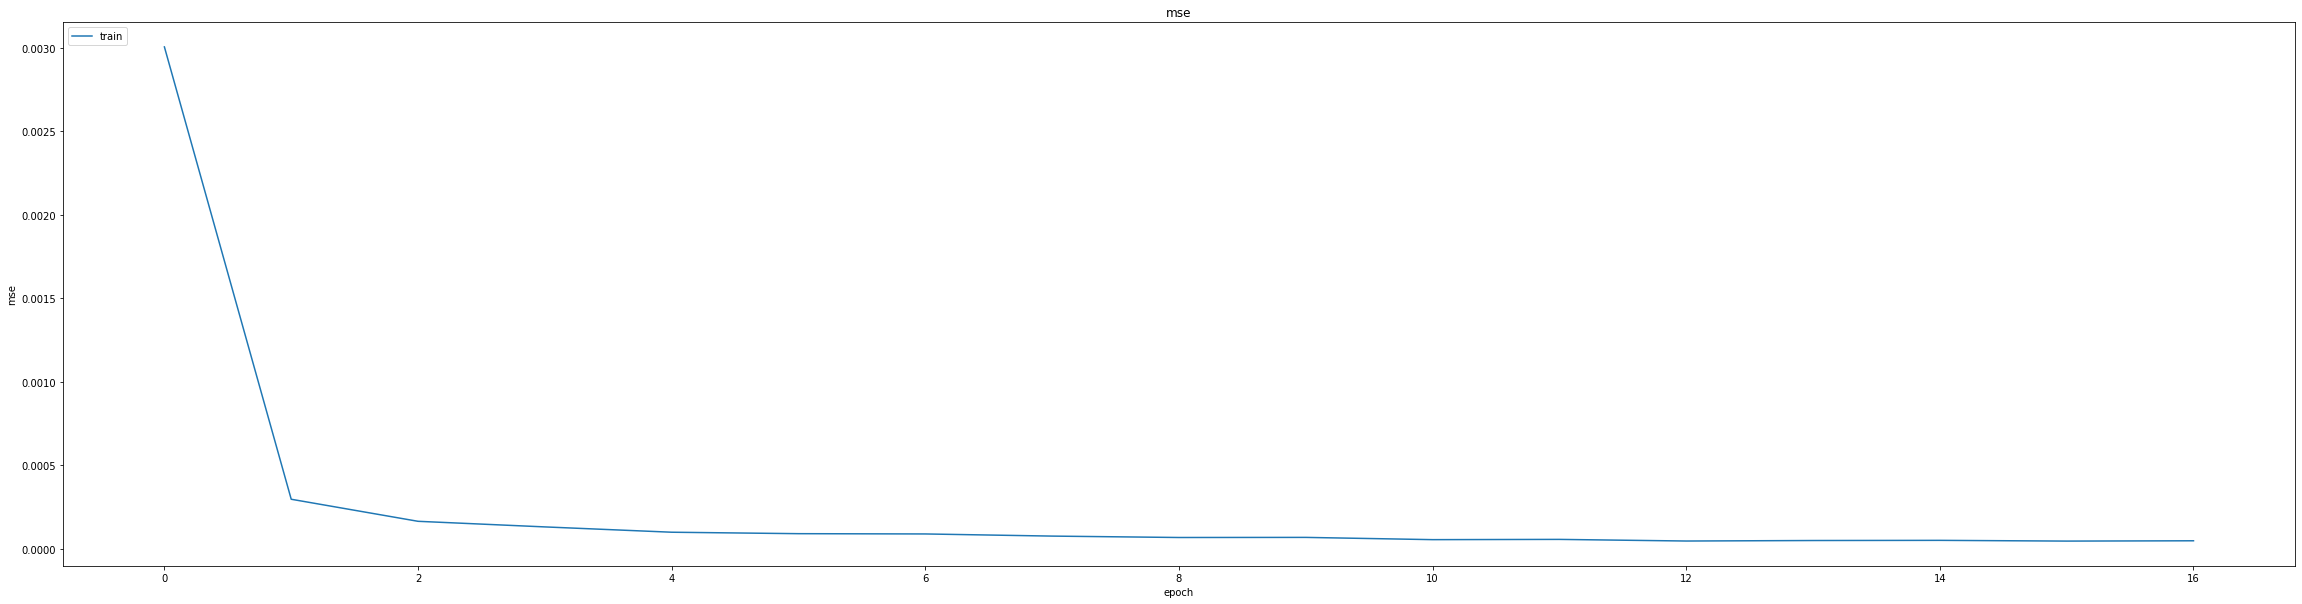

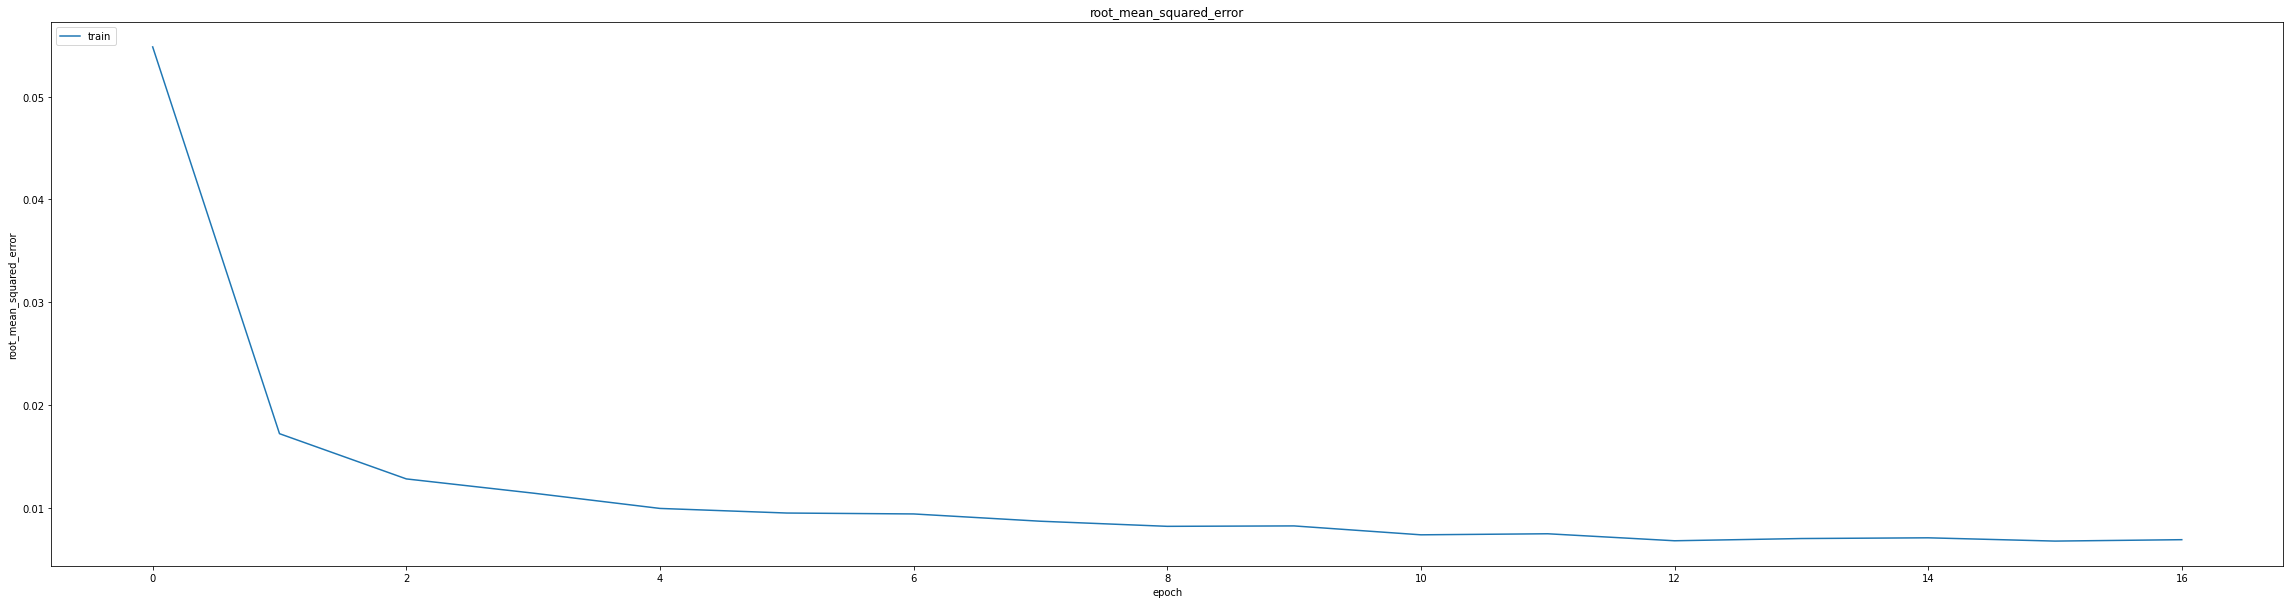

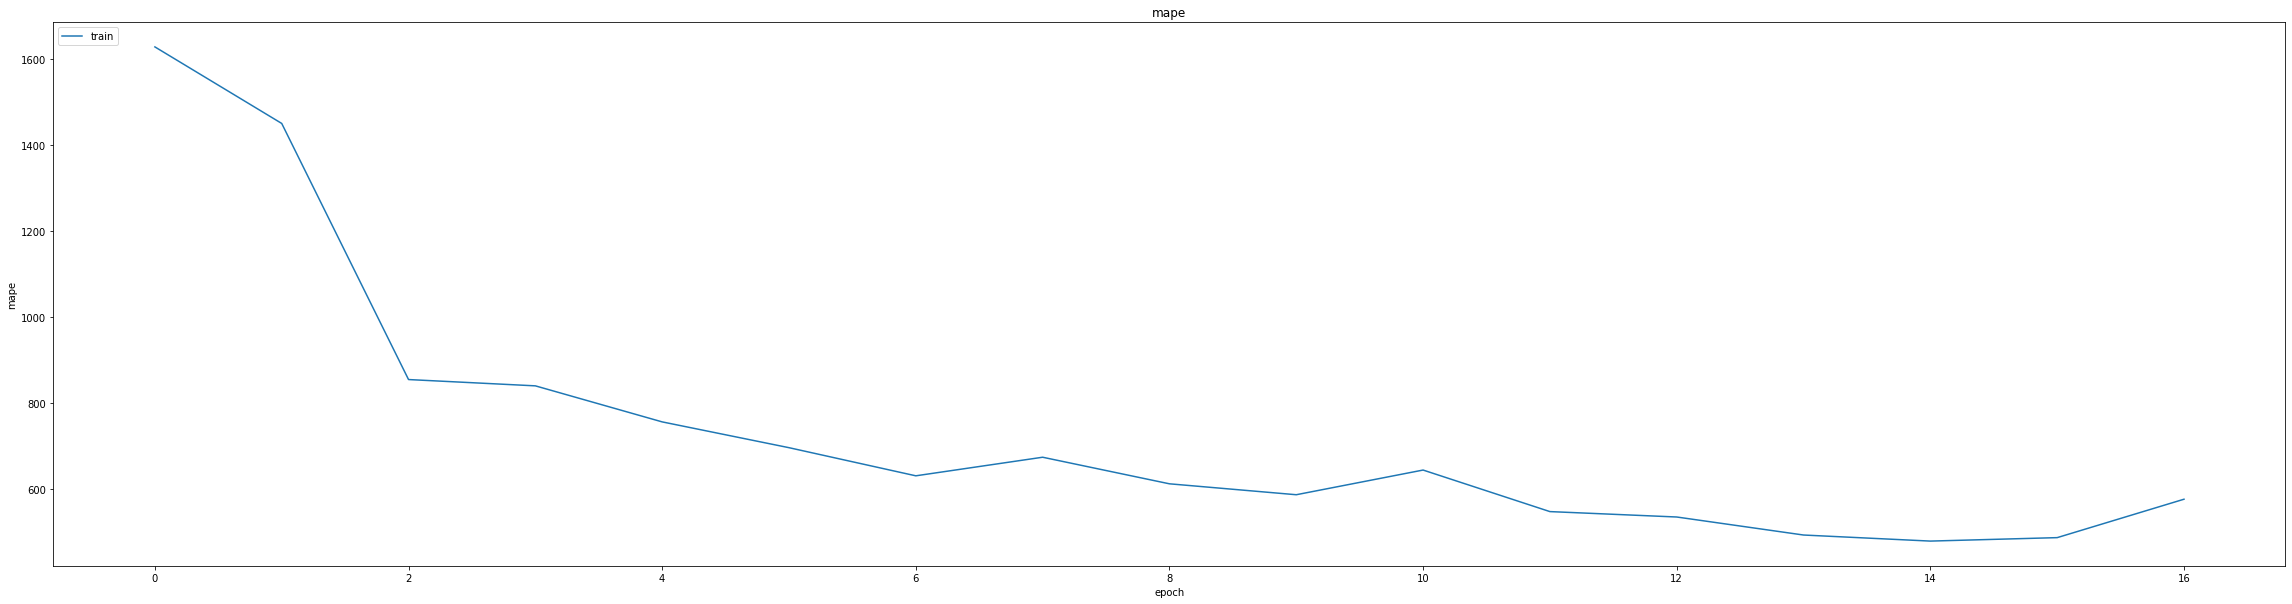

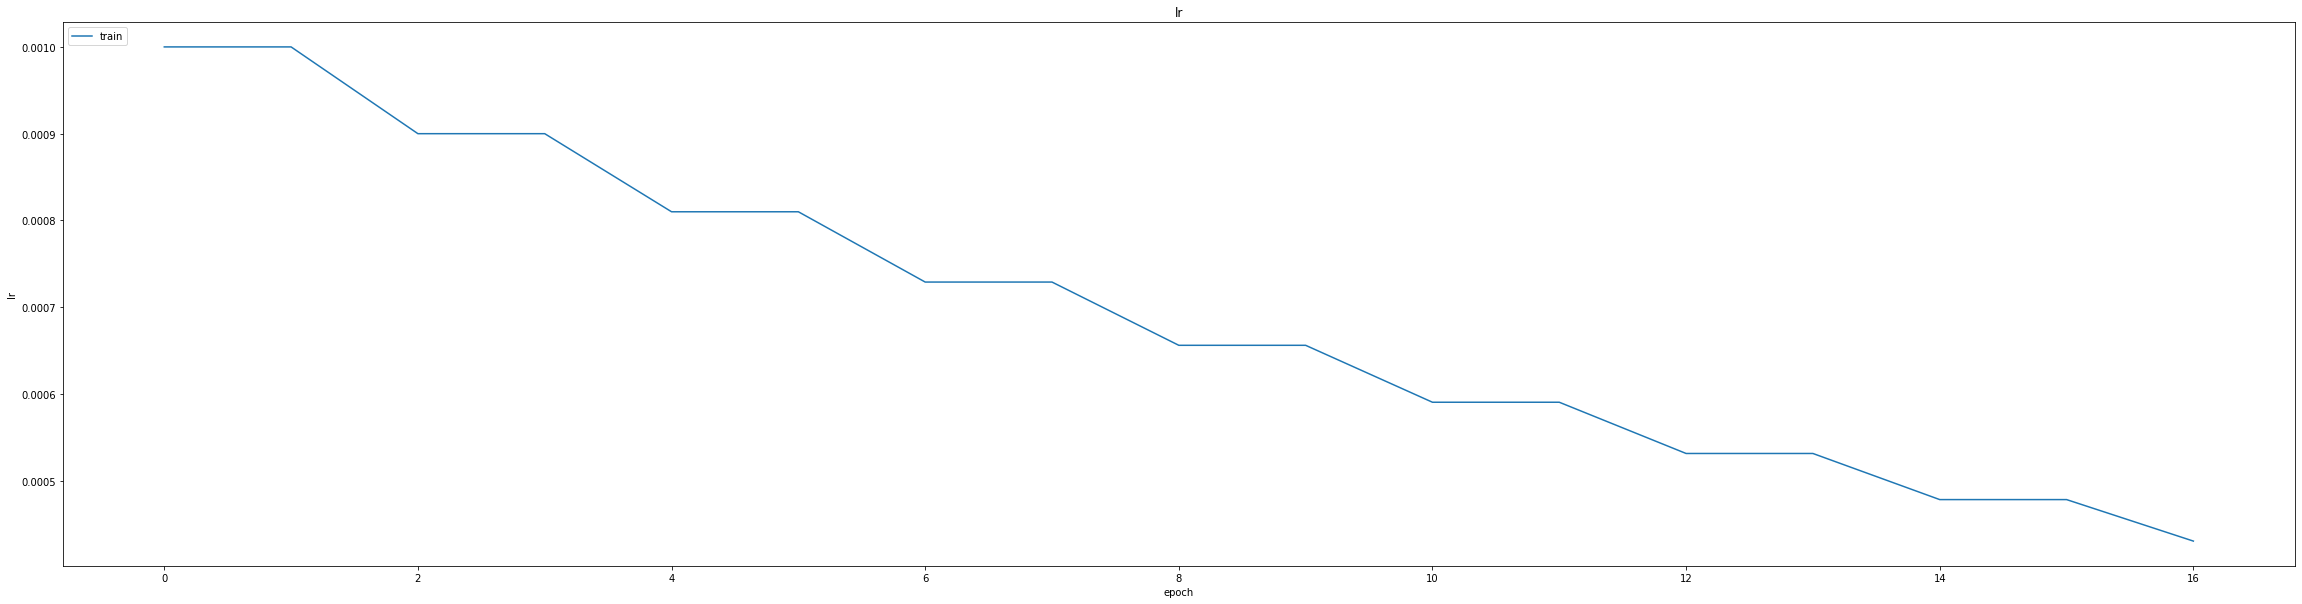

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.08212994039058685
0.08756350725889206
348/348 [==============================] - 3s 5ms/step
0.754287741221996


348/348 [==============================] - 2s 5ms/step


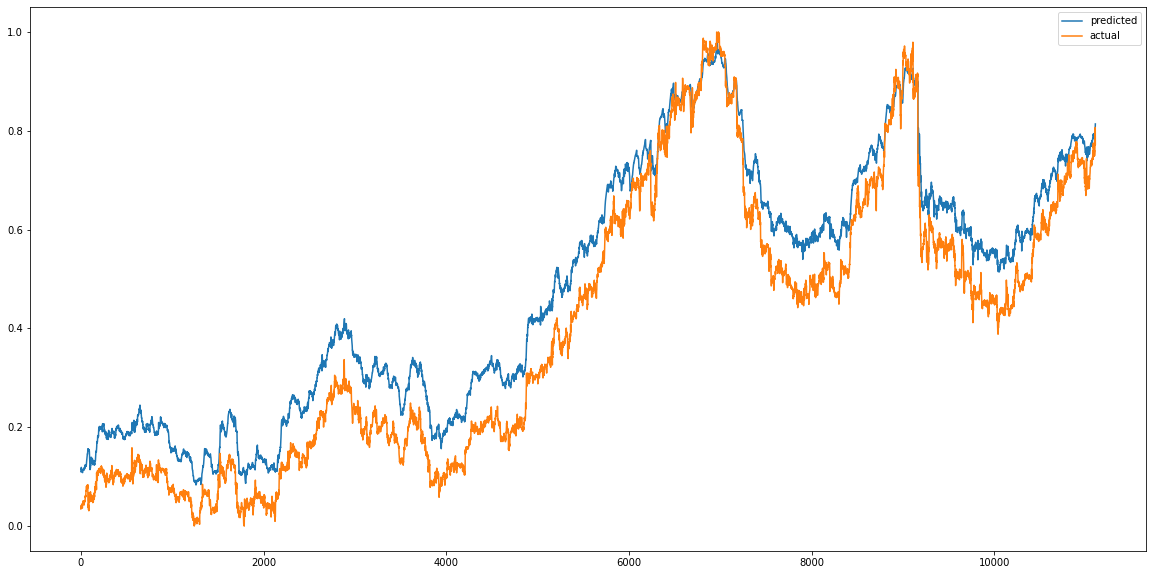

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


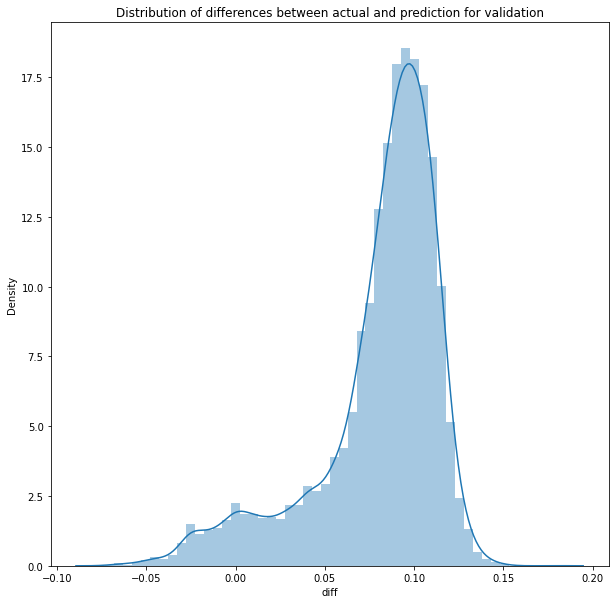

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 5ms/step


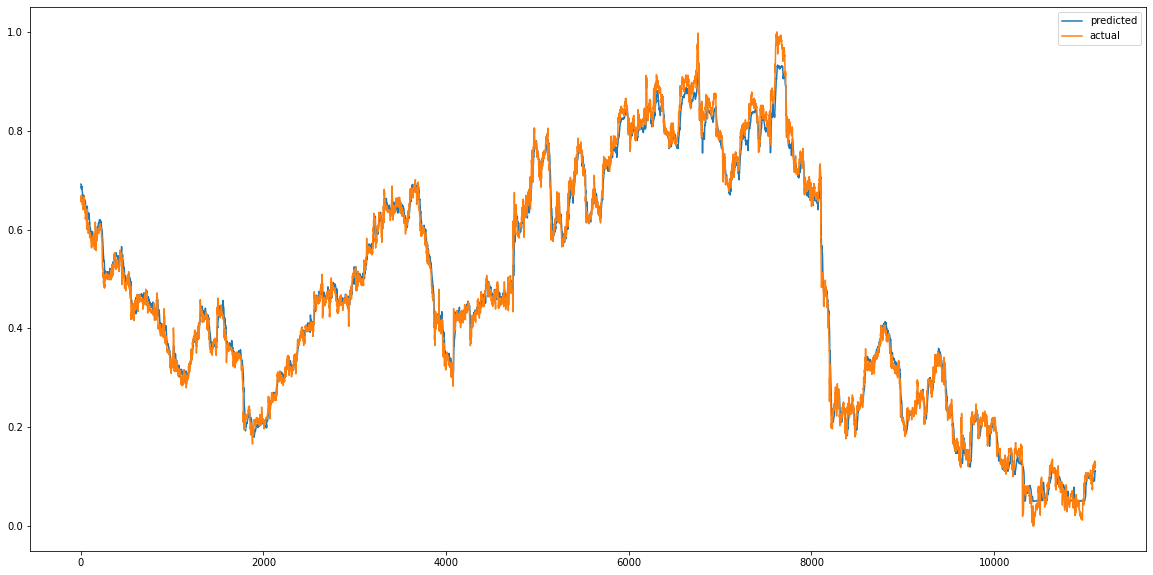

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


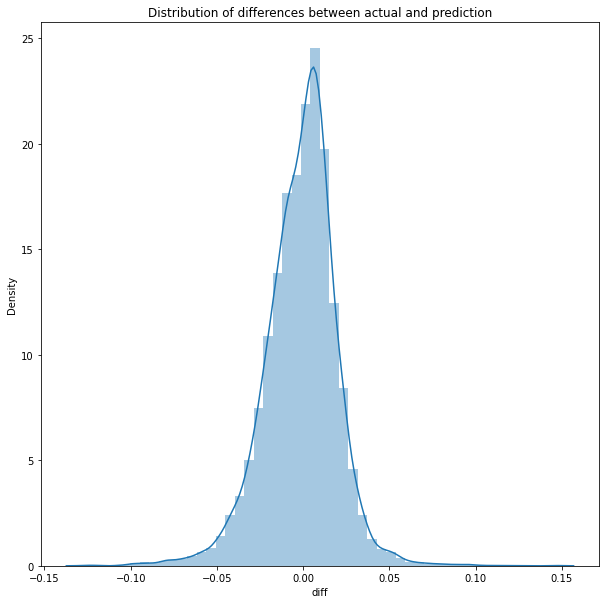

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00043465245222634486
RMSE :  0.020848320129601448
MAE :  0.01552574922669287
348/348 [==============================] - 2s 5ms/step
R2_Score  : 0.9926156816045667


count    11109.000000
mean        -0.001341
std          0.020806
min         -0.127650
25%         -0.013102
50%          0.000594
75%          0.011166
max          0.147110
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 533.7983 - mae: 5.4502 - mse: 533.7983 - root_mean_squared_error: 23.1041 - mape: 25598.5117
Epoch 1: val_mse improved from inf to 0.51384, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 16s 33ms/step - loss: 531.6002 - mae: 5.4303 - mse: 531.6002 - root_mean_squared_error: 23.0565 - mape: 25494.0234 - val_loss: 0.5138 - val_mae: 0.6601 - val_mse: 0.5138 - val_root_mean_squared_error: 0.7168 - val_mape: 97471.7891
Epoch 2/75
402/406 [============================>.] - ETA: 0s - loss: 0.2073 - mae: 0.3994 - mse: 0.2073 - root_mean_squared_error: 0.4553 - mape: 19256.4844
Epoch 2: val_mse improved from 0.51384 to 0.13856, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.2063 - mae: 0.3983 - mse: 0.2063 - root_mean_squared_error: 0.4542 - mape: 19083.3047 - val_loss: 0.1386 - val_mae: 0.3113 - val_mse: 0.1386 - val_root_mean_squared_error: 0.3722 - val_mape: 60501.2461
Epoch 3/75
403/406 [============================>.] - ETA: 0s - loss: 0.0723 - mae: 0.2407 - mse: 0.0723 - root_mean_squared_error: 0.2689 - mape: 11243.5566
Epoch 3: val_mse improved from 0.13856 to 0.08981, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0722 - mae: 0.2404 - mse: 0.0722 - root_mean_squared_error: 0.2687 - mape: 11170.0566 - val_loss: 0.0898 - val_mae: 0.2541 - val_mse: 0.0898 - val_root_mean_squared_error: 0.2997 - val_mape: 48311.8594
Epoch 4/75
402/406 [============================>.] - ETA: 0s - loss: 0.0544 - mae: 0.2002 - mse: 0.0544 - root_mean_squared_error: 0.2333 - mape: 9897.0693 
Epoch 4: val_mse improved from 0.08981 to 0.07924, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0544 - mae: 0.2001 - mse: 0.0544 - root_mean_squared_error: 0.2332 - mape: 9808.2344 - val_loss: 0.0792 - val_mae: 0.2423 - val_mse: 0.0792 - val_root_mean_squared_error: 0.2815 - val_mape: 43273.0195
Epoch 5/75
401/406 [============================>.] - ETA: 0s - loss: 0.0447 - mae: 0.1727 - mse: 0.0447 - root_mean_squared_error: 0.2113 - mape: 9123.2393
Epoch 5: val_mse improved from 0.07924 to 0.04616, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0444 - mae: 0.1721 - mse: 0.0444 - root_mean_squared_error: 0.2107 - mape: 9018.8984 - val_loss: 0.0462 - val_mae: 0.1705 - val_mse: 0.0462 - val_root_mean_squared_error: 0.2149 - val_mape: 40234.5195
Epoch 6/75
403/406 [============================>.] - ETA: 0s - loss: 0.0150 - mae: 0.0876 - mse: 0.0150 - root_mean_squared_error: 0.1226 - mape: 8519.3779
Epoch 6: val_mse improved from 0.04616 to 0.02803, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0150 - mae: 0.0875 - mse: 0.0150 - root_mean_squared_error: 0.1225 - mape: 8463.6768 - val_loss: 0.0280 - val_mae: 0.1316 - val_mse: 0.0280 - val_root_mean_squared_error: 0.1674 - val_mape: 34228.5781
Epoch 7/75
401/406 [============================>.] - ETA: 0s - loss: 0.0081 - mae: 0.0575 - mse: 0.0081 - root_mean_squared_error: 0.0900 - mape: 6917.7051
Epoch 7: val_mse improved from 0.02803 to 0.01879, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 31ms/step - loss: 0.0081 - mae: 0.0574 - mse: 0.0081 - root_mean_squared_error: 0.0899 - mape: 6838.4243 - val_loss: 0.0188 - val_mae: 0.1065 - val_mse: 0.0188 - val_root_mean_squared_error: 0.1371 - val_mape: 29904.2656
Epoch 8/75
404/406 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0442 - mse: 0.0049 - root_mean_squared_error: 0.0699 - mape: 5536.8906
Epoch 8: val_mse improved from 0.01879 to 0.01166, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0049 - mae: 0.0442 - mse: 0.0049 - root_mean_squared_error: 0.0699 - mape: 5514.1548 - val_loss: 0.0117 - val_mae: 0.0896 - val_mse: 0.0117 - val_root_mean_squared_error: 0.1080 - val_mape: 24530.7031
Epoch 9/75
402/406 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0357 - mse: 0.0030 - root_mean_squared_error: 0.0551 - mape: 4981.0400
Epoch 9: val_mse improved from 0.01166 to 0.00786, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 0.0030 - mae: 0.0357 - mse: 0.0030 - root_mean_squared_error: 0.0551 - mape: 4936.1025 - val_loss: 0.0079 - val_mae: 0.0731 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0887 - val_mape: 21369.3223
Epoch 10/75
404/406 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0311 - mse: 0.0022 - root_mean_squared_error: 0.0473 - mape: 4294.7466
Epoch 10: val_mse improved from 0.00786 to 0.00659, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 0.0022 - mae: 0.0310 - mse: 0.0022 - root_mean_squared_error: 0.0473 - mape: 4277.0972 - val_loss: 0.0066 - val_mae: 0.0699 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0812 - val_mape: 18964.6094
Epoch 11/75
404/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0274 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 3979.9492
Epoch 11: val_mse improved from 0.00659 to 0.00485, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 31ms/step - loss: 0.0017 - mae: 0.0274 - mse: 0.0017 - root_mean_squared_error: 0.0409 - mape: 3963.6692 - val_loss: 0.0049 - val_mae: 0.0605 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0697 - val_mape: 17026.0547
Epoch 12/75
404/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0256 - mse: 0.0014 - root_mean_squared_error: 0.0372 - mape: 3624.3474
Epoch 12: val_mse improved from 0.00485 to 0.00410, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 0.0014 - mae: 0.0256 - mse: 0.0014 - root_mean_squared_error: 0.0372 - mape: 3609.4670 - val_loss: 0.0041 - val_mae: 0.0561 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0640 - val_mape: 15946.5205
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0243 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 3254.4424
Epoch 13: val_mse improved from 0.00410 to 0.00349, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 13s 32ms/step - loss: 0.0012 - mae: 0.0243 - mse: 0.0012 - root_mean_squared_error: 0.0349 - mape: 3233.0935 - val_loss: 0.0035 - val_mae: 0.0516 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0591 - val_mape: 15084.7617
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0232 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 3194.1887
Epoch 14: val_mse did not improve from 0.00349
406/406 [==============================] - 4s 10ms/step - loss: 0.0011 - mae: 0.0232 - mse: 0.0011 - root_mean_squared_error: 0.0331 - mape: 3194.1887 - val_loss: 0.0035 - val_mae: 0.0532 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0596 - val_mape: 14435.4873
Epoch 15/75
402/406 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0227 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 2983.6853
Epoch 15: val_mse improved from 0.00349 to 0.00309, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 11s 28ms/step - loss: 0.0010 - mae: 0.0227 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 2956.7866 - val_loss: 0.0031 - val_mae: 0.0495 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0556 - val_mape: 13895.2705
Epoch 16/75
403/406 [============================>.] - ETA: 0s - loss: 9.7251e-04 - mae: 0.0220 - mse: 9.7251e-04 - root_mean_squared_error: 0.0312 - mape: 2952.5112
Epoch 16: val_mse did not improve from 0.00309
406/406 [==============================] - 4s 10ms/step - loss: 9.7339e-04 - mae: 0.0220 - mse: 9.7339e-04 - root_mean_squared_error: 0.0312 - mape: 2933.1313 - val_loss: 0.0032 - val_mae: 0.0509 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0565 - val_mape: 13485.7646
Epoch 17/75
404/406 [============================>.] - ETA: 0s - loss: 9.1319e-04 - mae: 0.0214 - mse: 9.1319e-04 - root_mean_squared_error: 0.0302 - mape: 2832.3960
Epoch 17: val_mse improved from 0.00309 to 0.00260, saving model to /content/d

406/406 [==============================] - 13s 32ms/step - loss: 9.1243e-04 - mae: 0.0214 - mse: 9.1243e-04 - root_mean_squared_error: 0.0302 - mape: 2820.7480 - val_loss: 0.0026 - val_mae: 0.0450 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0510 - val_mape: 13159.3438
Epoch 18/75
405/406 [============================>.] - ETA: 0s - loss: 8.5359e-04 - mae: 0.0207 - mse: 8.5359e-04 - root_mean_squared_error: 0.0292 - mape: 2773.4771
Epoch 18: val_mse improved from 0.00260 to 0.00249, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 28ms/step - loss: 8.5323e-04 - mae: 0.0207 - mse: 8.5323e-04 - root_mean_squared_error: 0.0292 - mape: 2768.8945 - val_loss: 0.0025 - val_mae: 0.0443 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0499 - val_mape: 12697.2334
Epoch 19/75
401/406 [============================>.] - ETA: 0s - loss: 7.8732e-04 - mae: 0.0200 - mse: 7.8732e-04 - root_mean_squared_error: 0.0281 - mape: 2650.1277
Epoch 19: val_mse did not improve from 0.00249
406/406 [==============================] - 4s 10ms/step - loss: 7.8797e-04 - mae: 0.0200 - mse: 7.8797e-04 - root_mean_squared_error: 0.0281 - mape: 2619.7395 - val_loss: 0.0026 - val_mae: 0.0453 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0507 - val_mape: 12336.4844
Epoch 20/75
404/406 [============================>.] - ETA: 0s - loss: 7.2583e-04 - mae: 0.0193 - mse: 7.2583e-04 - root_mean_squared_error: 0.0269 - mape: 2632.9792
Epoch 20: val_mse improved from 0.00249 to 0.00209, saving model to /c

406/406 [==============================] - 12s 29ms/step - loss: 7.2569e-04 - mae: 0.0193 - mse: 7.2569e-04 - root_mean_squared_error: 0.0269 - mape: 2622.1799 - val_loss: 0.0021 - val_mae: 0.0402 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 11965.5400
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 6.6752e-04 - mae: 0.0184 - mse: 6.6752e-04 - root_mean_squared_error: 0.0258 - mape: 2535.4644
Epoch 21: val_mse did not improve from 0.00209
406/406 [==============================] - 4s 10ms/step - loss: 6.6752e-04 - mae: 0.0184 - mse: 6.6752e-04 - root_mean_squared_error: 0.0258 - mape: 2535.4644 - val_loss: 0.0022 - val_mae: 0.0415 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 11531.8564
Epoch 22/75
402/406 [============================>.] - ETA: 0s - loss: 6.1390e-04 - mae: 0.0178 - mse: 6.1390e-04 - root_mean_squared_error: 0.0248 - mape: 2466.5378
Epoch 22: val_mse improved from 0.00209 to 0.00188, saving model to /c

406/406 [==============================] - 12s 29ms/step - loss: 6.1259e-04 - mae: 0.0177 - mse: 6.1259e-04 - root_mean_squared_error: 0.0248 - mape: 2444.2783 - val_loss: 0.0019 - val_mae: 0.0379 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0433 - val_mape: 11195.9316
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 5.5593e-04 - mae: 0.0171 - mse: 5.5593e-04 - root_mean_squared_error: 0.0236 - mape: 2389.1311
Epoch 23: val_mse improved from 0.00188 to 0.00175, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 5.5593e-04 - mae: 0.0171 - mse: 5.5593e-04 - root_mean_squared_error: 0.0236 - mape: 2389.1311 - val_loss: 0.0017 - val_mae: 0.0365 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0418 - val_mape: 10724.0381
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 4.9848e-04 - mae: 0.0162 - mse: 4.9848e-04 - root_mean_squared_error: 0.0223 - mape: 2314.3760
Epoch 24: val_mse improved from 0.00175 to 0.00160, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 28ms/step - loss: 4.9834e-04 - mae: 0.0162 - mse: 4.9834e-04 - root_mean_squared_error: 0.0223 - mape: 2310.5520 - val_loss: 0.0016 - val_mae: 0.0349 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 10246.5029
Epoch 25/75
401/406 [============================>.] - ETA: 0s - loss: 4.5475e-04 - mae: 0.0156 - mse: 4.5475e-04 - root_mean_squared_error: 0.0213 - mape: 2134.0215
Epoch 25: val_mse improved from 0.00160 to 0.00156, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 4.5469e-04 - mae: 0.0156 - mse: 4.5469e-04 - root_mean_squared_error: 0.0213 - mape: 2109.5144 - val_loss: 0.0016 - val_mae: 0.0348 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0395 - val_mape: 9720.1553
Epoch 26/75
401/406 [============================>.] - ETA: 0s - loss: 4.0736e-04 - mae: 0.0149 - mse: 4.0736e-04 - root_mean_squared_error: 0.0202 - mape: 2096.3115
Epoch 26: val_mse improved from 0.00156 to 0.00103, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 4.0696e-04 - mae: 0.0148 - mse: 4.0696e-04 - root_mean_squared_error: 0.0202 - mape: 2072.2578 - val_loss: 0.0010 - val_mae: 0.0271 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 9391.7627
Epoch 27/75
405/406 [============================>.] - ETA: 0s - loss: 3.5909e-04 - mae: 0.0140 - mse: 3.5909e-04 - root_mean_squared_error: 0.0189 - mape: 1960.8213
Epoch 27: val_mse did not improve from 0.00103
406/406 [==============================] - 4s 10ms/step - loss: 3.5904e-04 - mae: 0.0140 - mse: 3.5904e-04 - root_mean_squared_error: 0.0189 - mape: 1957.5861 - val_loss: 0.0011 - val_mae: 0.0293 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 8953.7002
Epoch 28/75
401/406 [============================>.] - ETA: 0s - loss: 3.2477e-04 - mae: 0.0134 - mse: 3.2477e-04 - root_mean_squared_error: 0.0180 - mape: 1903.4846
Epoch 28: val_mse improved from 0.00103 to 0.00088, saving model to /con

406/406 [==============================] - 13s 32ms/step - loss: 3.2442e-04 - mae: 0.0134 - mse: 3.2442e-04 - root_mean_squared_error: 0.0180 - mape: 1881.8438 - val_loss: 8.8106e-04 - val_mae: 0.0253 - val_mse: 8.8106e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 8581.3750
Epoch 29/75
401/406 [============================>.] - ETA: 0s - loss: 2.8882e-04 - mae: 0.0127 - mse: 2.8882e-04 - root_mean_squared_error: 0.0170 - mape: 1802.1113
Epoch 29: val_mse improved from 0.00088 to 0.00086, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 2.8841e-04 - mae: 0.0127 - mse: 2.8841e-04 - root_mean_squared_error: 0.0170 - mape: 1781.4032 - val_loss: 8.6030e-04 - val_mae: 0.0253 - val_mse: 8.6030e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 8153.0562
Epoch 30/75
406/406 [==============================] - ETA: 0s - loss: 2.6180e-04 - mae: 0.0121 - mse: 2.6180e-04 - root_mean_squared_error: 0.0162 - mape: 1745.1411
Epoch 30: val_mse did not improve from 0.00086
406/406 [==============================] - 4s 10ms/step - loss: 2.6180e-04 - mae: 0.0121 - mse: 2.6180e-04 - root_mean_squared_error: 0.0162 - mape: 1745.1411 - val_loss: 0.0010 - val_mae: 0.0280 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 7631.2134
Epoch 31/75
403/406 [============================>.] - ETA: 0s - loss: 2.4009e-04 - mae: 0.0117 - mse: 2.4009e-04 - root_mean_squared_error: 0.0155 - mape: 1605.2994
Epoch 31: val_mse improved from 0.00086 to 0.00068, saving model

406/406 [==============================] - 12s 30ms/step - loss: 2.3983e-04 - mae: 0.0117 - mse: 2.3983e-04 - root_mean_squared_error: 0.0155 - mape: 1594.7510 - val_loss: 6.8132e-04 - val_mae: 0.0220 - val_mse: 6.8132e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 7288.4409
Epoch 32/75
404/406 [============================>.] - ETA: 0s - loss: 2.2070e-04 - mae: 0.0112 - mse: 2.2070e-04 - root_mean_squared_error: 0.0149 - mape: 1583.6440
Epoch 32: val_mse improved from 0.00068 to 0.00047, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 11s 28ms/step - loss: 2.2078e-04 - mae: 0.0112 - mse: 2.2078e-04 - root_mean_squared_error: 0.0149 - mape: 1577.1349 - val_loss: 4.7433e-04 - val_mae: 0.0169 - val_mse: 4.7433e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 6960.7363
Epoch 33/75
402/406 [============================>.] - ETA: 0s - loss: 2.0927e-04 - mae: 0.0109 - mse: 2.0927e-04 - root_mean_squared_error: 0.0145 - mape: 1437.6477
Epoch 33: val_mse did not improve from 0.00047
406/406 [==============================] - 4s 10ms/step - loss: 2.0912e-04 - mae: 0.0109 - mse: 2.0912e-04 - root_mean_squared_error: 0.0145 - mape: 1424.6932 - val_loss: 5.2897e-04 - val_mae: 0.0189 - val_mse: 5.2897e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 6627.8325
Epoch 34/75
401/406 [============================>.] - ETA: 0s - loss: 1.8932e-04 - mae: 0.0104 - mse: 1.8932e-04 - root_mean_squared_error: 0.0138 - mape: 1353.4540
Epoch 34: val_mse did not improve from 0.00047
406/406 [

406/406 [==============================] - 12s 30ms/step - loss: 1.7258e-04 - mae: 0.0099 - mse: 1.7258e-04 - root_mean_squared_error: 0.0131 - mape: 1267.5681 - val_loss: 4.2868e-04 - val_mae: 0.0168 - val_mse: 4.2868e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 5618.8066
Epoch 38/75
401/406 [============================>.] - ETA: 0s - loss: 1.5977e-04 - mae: 0.0095 - mse: 1.5977e-04 - root_mean_squared_error: 0.0126 - mape: 1204.8728
Epoch 38: val_mse improved from 0.00043 to 0.00037, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 29ms/step - loss: 1.5950e-04 - mae: 0.0095 - mse: 1.5950e-04 - root_mean_squared_error: 0.0126 - mape: 1191.0399 - val_loss: 3.6509e-04 - val_mae: 0.0149 - val_mse: 3.6509e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 5496.4707
Epoch 39/75
405/406 [============================>.] - ETA: 0s - loss: 1.5757e-04 - mae: 0.0095 - mse: 1.5757e-04 - root_mean_squared_error: 0.0126 - mape: 1148.2054
Epoch 39: val_mse did not improve from 0.00037
406/406 [==============================] - 4s 10ms/step - loss: 1.5753e-04 - mae: 0.0095 - mse: 1.5753e-04 - root_mean_squared_error: 0.0126 - mape: 1146.3079 - val_loss: 4.3101e-04 - val_mae: 0.0169 - val_mse: 4.3101e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 5284.3301
Epoch 40/75
406/406 [==============================] - ETA: 0s - loss: 1.5044e-04 - mae: 0.0092 - mse: 1.5044e-04 - root_mean_squared_error: 0.0123 - mape: 1110.0439
Epoch 40: val_mse improved from 0.00037 to 0.00034, savi

406/406 [==============================] - 12s 30ms/step - loss: 1.5044e-04 - mae: 0.0092 - mse: 1.5044e-04 - root_mean_squared_error: 0.0123 - mape: 1110.0439 - val_loss: 3.3719e-04 - val_mae: 0.0142 - val_mse: 3.3719e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 5159.6479
Epoch 41/75
403/406 [============================>.] - ETA: 0s - loss: 1.5310e-04 - mae: 0.0094 - mse: 1.5310e-04 - root_mean_squared_error: 0.0124 - mape: 1090.3427
Epoch 41: val_mse improved from 0.00034 to 0.00030, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 1.5284e-04 - mae: 0.0093 - mse: 1.5284e-04 - root_mean_squared_error: 0.0124 - mape: 1083.1910 - val_loss: 2.9851e-04 - val_mae: 0.0126 - val_mse: 2.9851e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 5068.2573
Epoch 42/75
406/406 [==============================] - ETA: 0s - loss: 1.4178e-04 - mae: 0.0090 - mse: 1.4178e-04 - root_mean_squared_error: 0.0119 - mape: 1056.5266
Epoch 42: val_mse did not improve from 0.00030
406/406 [==============================] - 4s 10ms/step - loss: 1.4178e-04 - mae: 0.0090 - mse: 1.4178e-04 - root_mean_squared_error: 0.0119 - mape: 1056.5266 - val_loss: 5.8352e-04 - val_mae: 0.0201 - val_mse: 5.8352e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 4829.7212
Epoch 43/75
403/406 [============================>.] - ETA: 0s - loss: 1.4862e-04 - mae: 0.0092 - mse: 1.4862e-04 - root_mean_squared_error: 0.0122 - mape: 1037.5565
Epoch 43: val_mse improved from 0.00030 to 0.00025, savi

406/406 [==============================] - 13s 32ms/step - loss: 1.4861e-04 - mae: 0.0092 - mse: 1.4861e-04 - root_mean_squared_error: 0.0122 - mape: 1030.7405 - val_loss: 2.4969e-04 - val_mae: 0.0114 - val_mse: 2.4969e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 4871.9697
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 1.5037e-04 - mae: 0.0092 - mse: 1.5037e-04 - root_mean_squared_error: 0.0123 - mape: 1035.4353
Epoch 44: val_mse did not improve from 0.00025
406/406 [==============================] - 4s 10ms/step - loss: 1.5020e-04 - mae: 0.0092 - mse: 1.5020e-04 - root_mean_squared_error: 0.0123 - mape: 1028.6346 - val_loss: 3.3840e-04 - val_mae: 0.0140 - val_mse: 3.3840e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 4683.0596
Epoch 45/75
401/406 [============================>.] - ETA: 0s - loss: 1.4323e-04 - mae: 0.0090 - mse: 1.4323e-04 - root_mean_squared_error: 0.0120 - mape: 1021.5009
Epoch 45: val_mse did not improve from 0.00025
406/406 [

406/406 [==============================] - 12s 29ms/step - loss: 1.5822e-04 - mae: 0.0095 - mse: 1.5822e-04 - root_mean_squared_error: 0.0126 - mape: 1017.2611 - val_loss: 2.4535e-04 - val_mae: 0.0116 - val_mse: 2.4535e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 4576.3145
Epoch 47/75
405/406 [============================>.] - ETA: 0s - loss: 1.3374e-04 - mae: 0.0087 - mse: 1.3374e-04 - root_mean_squared_error: 0.0116 - mape: 956.2641
Epoch 47: val_mse did not improve from 0.00025
406/406 [==============================] - 4s 10ms/step - loss: 1.3368e-04 - mae: 0.0087 - mse: 1.3368e-04 - root_mean_squared_error: 0.0116 - mape: 954.6845 - val_loss: 3.6150e-04 - val_mae: 0.0144 - val_mse: 3.6150e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 4398.4678
Epoch 48/75
402/406 [============================>.] - ETA: 0s - loss: 1.3149e-04 - mae: 0.0086 - mse: 1.3149e-04 - root_mean_squared_error: 0.0115 - mape: 948.8463
Epoch 48: val_mse did not improve from 0.00025
406/406 [===

406/406 [==============================] - 12s 30ms/step - loss: 1.2236e-04 - mae: 0.0083 - mse: 1.2236e-04 - root_mean_squared_error: 0.0111 - mape: 909.8455 - val_loss: 1.9804e-04 - val_mae: 0.0100 - val_mse: 1.9804e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 4208.6909
Epoch 51/75
401/406 [============================>.] - ETA: 0s - loss: 1.5115e-04 - mae: 0.0092 - mse: 1.5115e-04 - root_mean_squared_error: 0.0123 - mape: 909.5157
Epoch 51: val_mse did not improve from 0.00020
406/406 [==============================] - 4s 10ms/step - loss: 1.5067e-04 - mae: 0.0091 - mse: 1.5067e-04 - root_mean_squared_error: 0.0123 - mape: 899.0687 - val_loss: 2.1849e-04 - val_mae: 0.0106 - val_mse: 2.1849e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 4202.0737
Epoch 52/75
403/406 [============================>.] - ETA: 0s - loss: 1.4087e-04 - mae: 0.0089 - mse: 1.4087e-04 - root_mean_squared_error: 0.0119 - mape: 900.4767
Epoch 52: val_mse did not improve from 0.00020
406/406 [====

406/406 [==============================] - 11s 28ms/step - loss: 1.2766e-04 - mae: 0.0085 - mse: 1.2766e-04 - root_mean_squared_error: 0.0113 - mape: 881.4966 - val_loss: 1.8921e-04 - val_mae: 0.0100 - val_mse: 1.8921e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 4082.7993
Epoch 54/75
404/406 [============================>.] - ETA: 0s - loss: 1.1866e-04 - mae: 0.0082 - mse: 1.1866e-04 - root_mean_squared_error: 0.0109 - mape: 875.6224
Epoch 54: val_mse improved from 0.00019 to 0.00019, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)


406/406 [==============================] - 12s 30ms/step - loss: 1.1868e-04 - mae: 0.0082 - mse: 1.1868e-04 - root_mean_squared_error: 0.0109 - mape: 872.0229 - val_loss: 1.8648e-04 - val_mae: 0.0099 - val_mse: 1.8648e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 4001.1270
Epoch 55/75
404/406 [============================>.] - ETA: 0s - loss: 1.2889e-04 - mae: 0.0084 - mse: 1.2889e-04 - root_mean_squared_error: 0.0114 - mape: 864.5219
Epoch 55: val_mse did not improve from 0.00019
406/406 [==============================] - 4s 10ms/step - loss: 1.2861e-04 - mae: 0.0084 - mse: 1.2861e-04 - root_mean_squared_error: 0.0113 - mape: 860.9691 - val_loss: 2.9711e-04 - val_mae: 0.0133 - val_mse: 2.9711e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 4004.4265
Epoch 56/75
401/406 [============================>.] - ETA: 0s - loss: 1.3224e-04 - mae: 0.0086 - mse: 1.3224e-04 - root_mean_squared_error: 0.0115 - mape: 860.1949
Epoch 56: val_mse did not improve from 0.00019
406/406 [====

406/406 [==============================] - 12s 30ms/step - loss: 9.8994e-05 - mae: 0.0076 - mse: 9.8994e-05 - root_mean_squared_error: 0.0099 - mape: 796.1995 - val_loss: 1.8364e-04 - val_mae: 0.0102 - val_mse: 1.8364e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 3618.8630
Epoch 60/75
406/406 [==============================] - ETA: 0s - loss: 1.0569e-04 - mae: 0.0077 - mse: 1.0569e-04 - root_mean_squared_error: 0.0103 - mape: 785.0581
Epoch 60: val_mse did not improve from 0.00018
406/406 [==============================] - 4s 10ms/step - loss: 1.0569e-04 - mae: 0.0077 - mse: 1.0569e-04 - root_mean_squared_error: 0.0103 - mape: 785.0581 - val_loss: 4.8267e-04 - val_mae: 0.0181 - val_mse: 4.8267e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 3648.3357
Epoch 61/75
406/406 [==============================] - ETA: 0s - loss: 9.4049e-05 - mae: 0.0073 - mse: 9.4049e-05 - root_mean_squared_error: 0.0097 - mape: 783.2625
Epoch 61: val_mse did not improve from 0.00018
406/406 [====

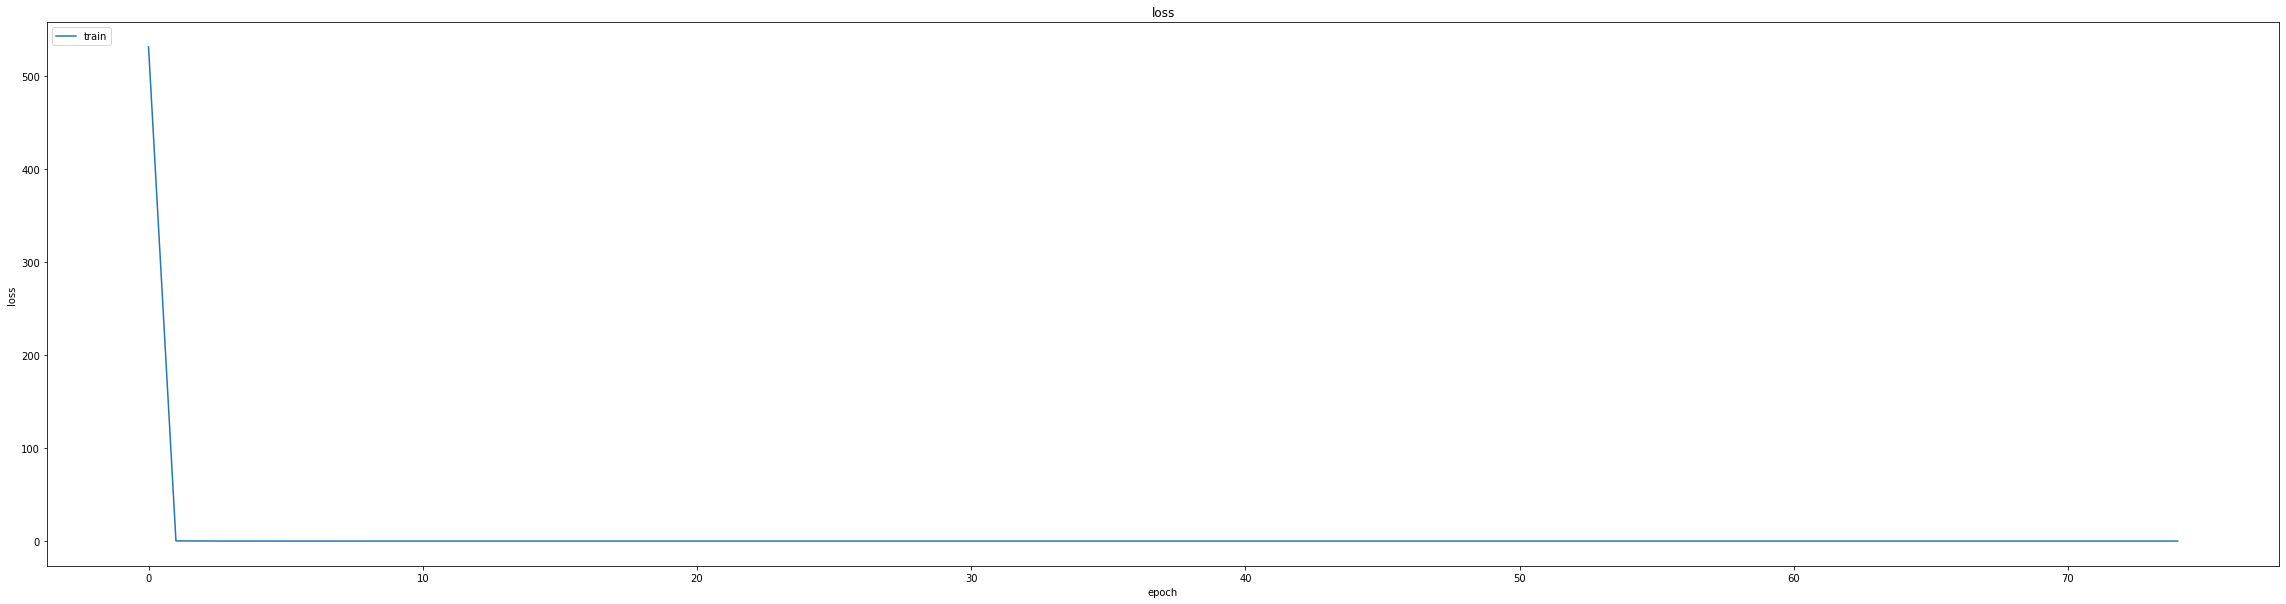

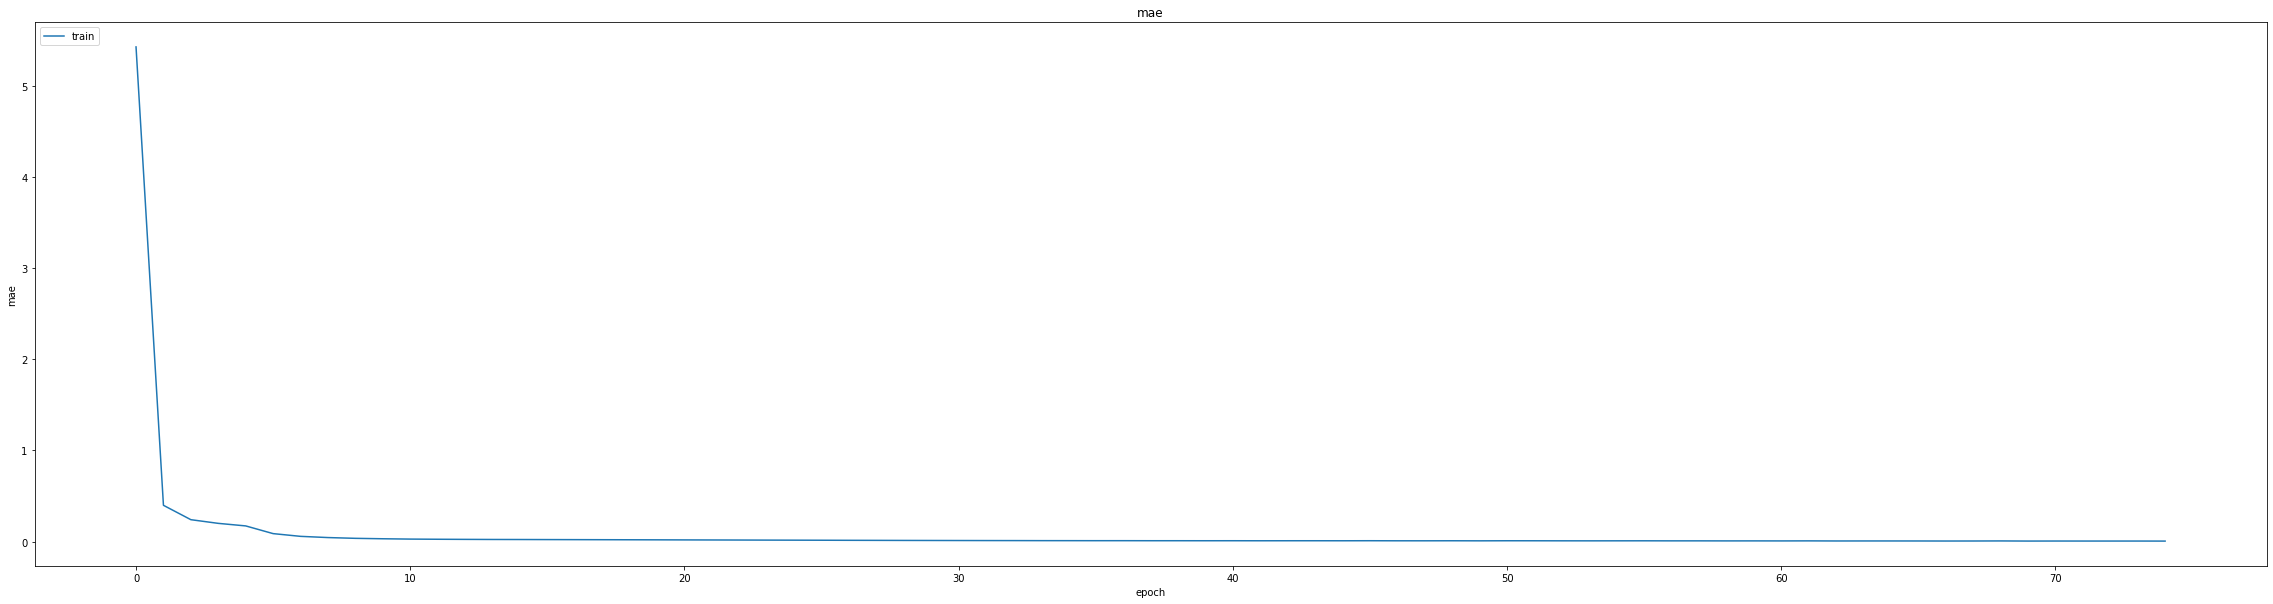

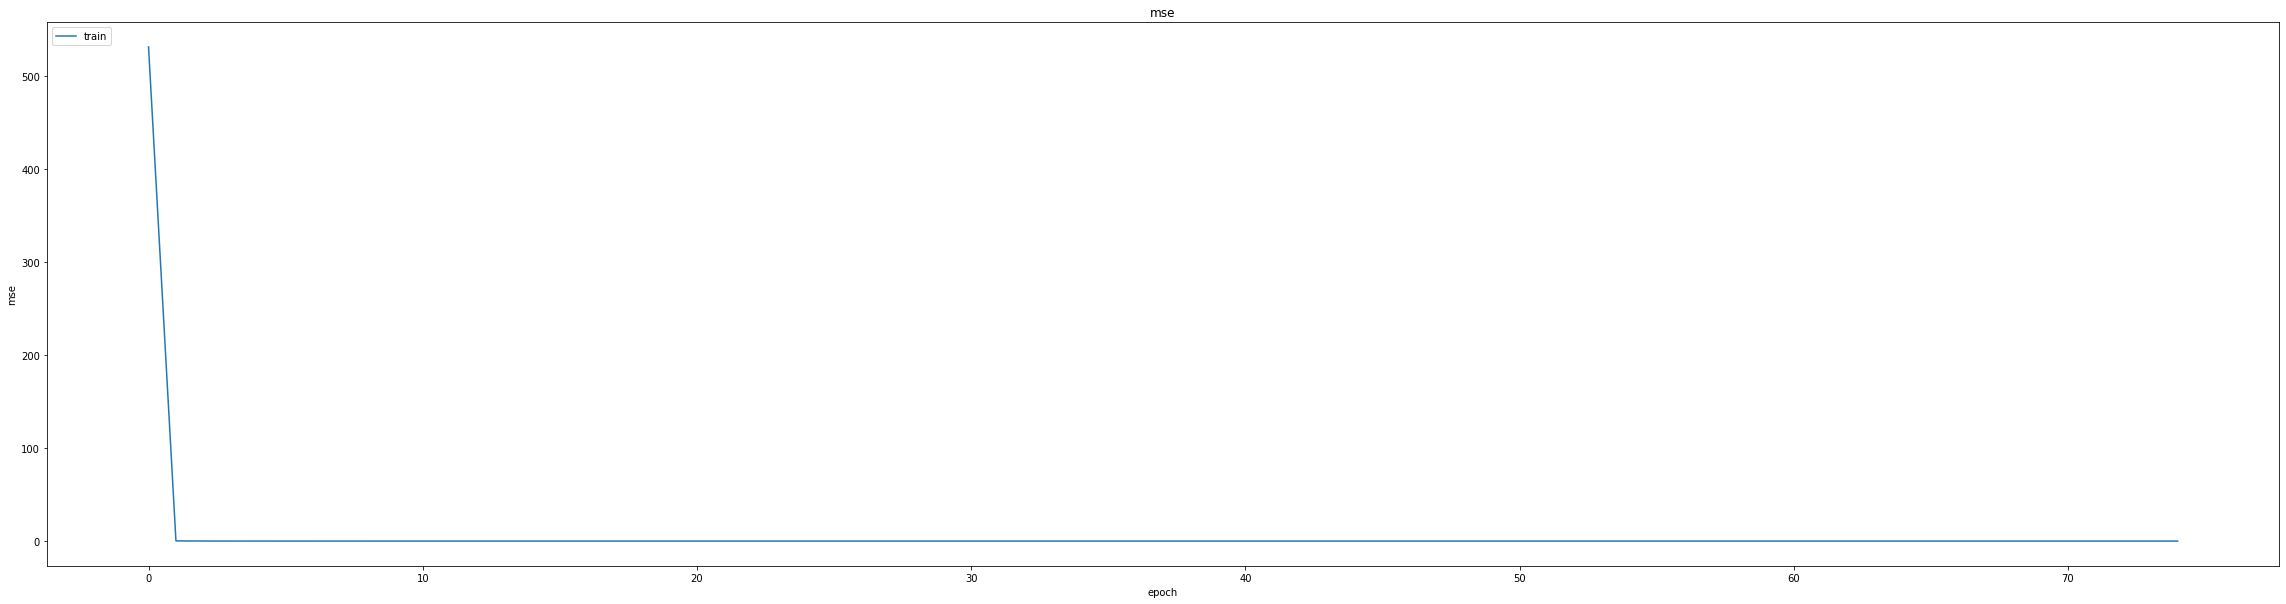

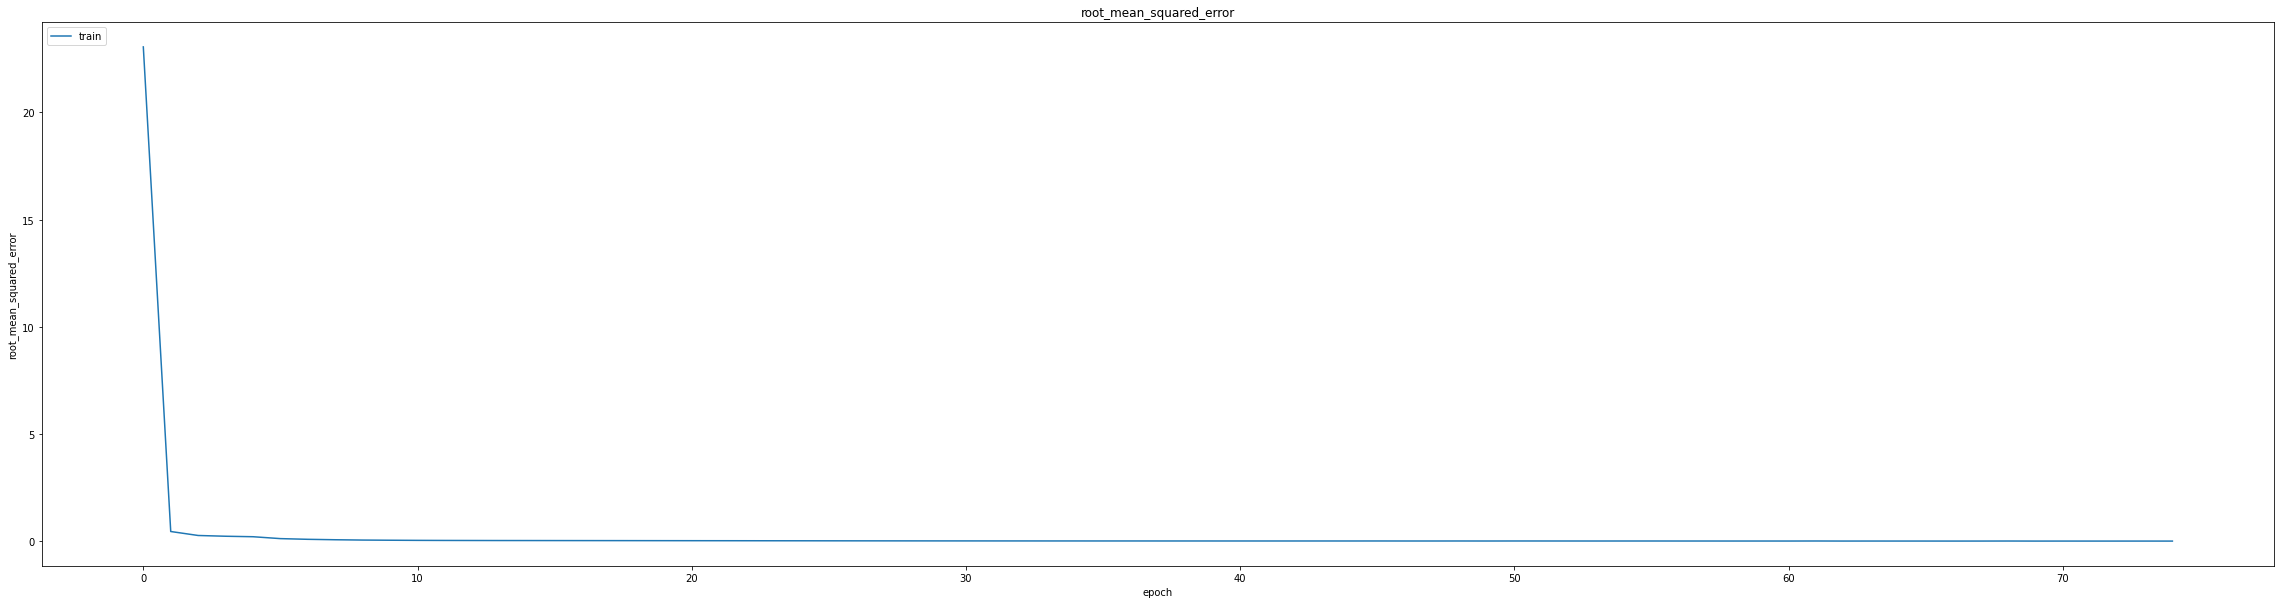

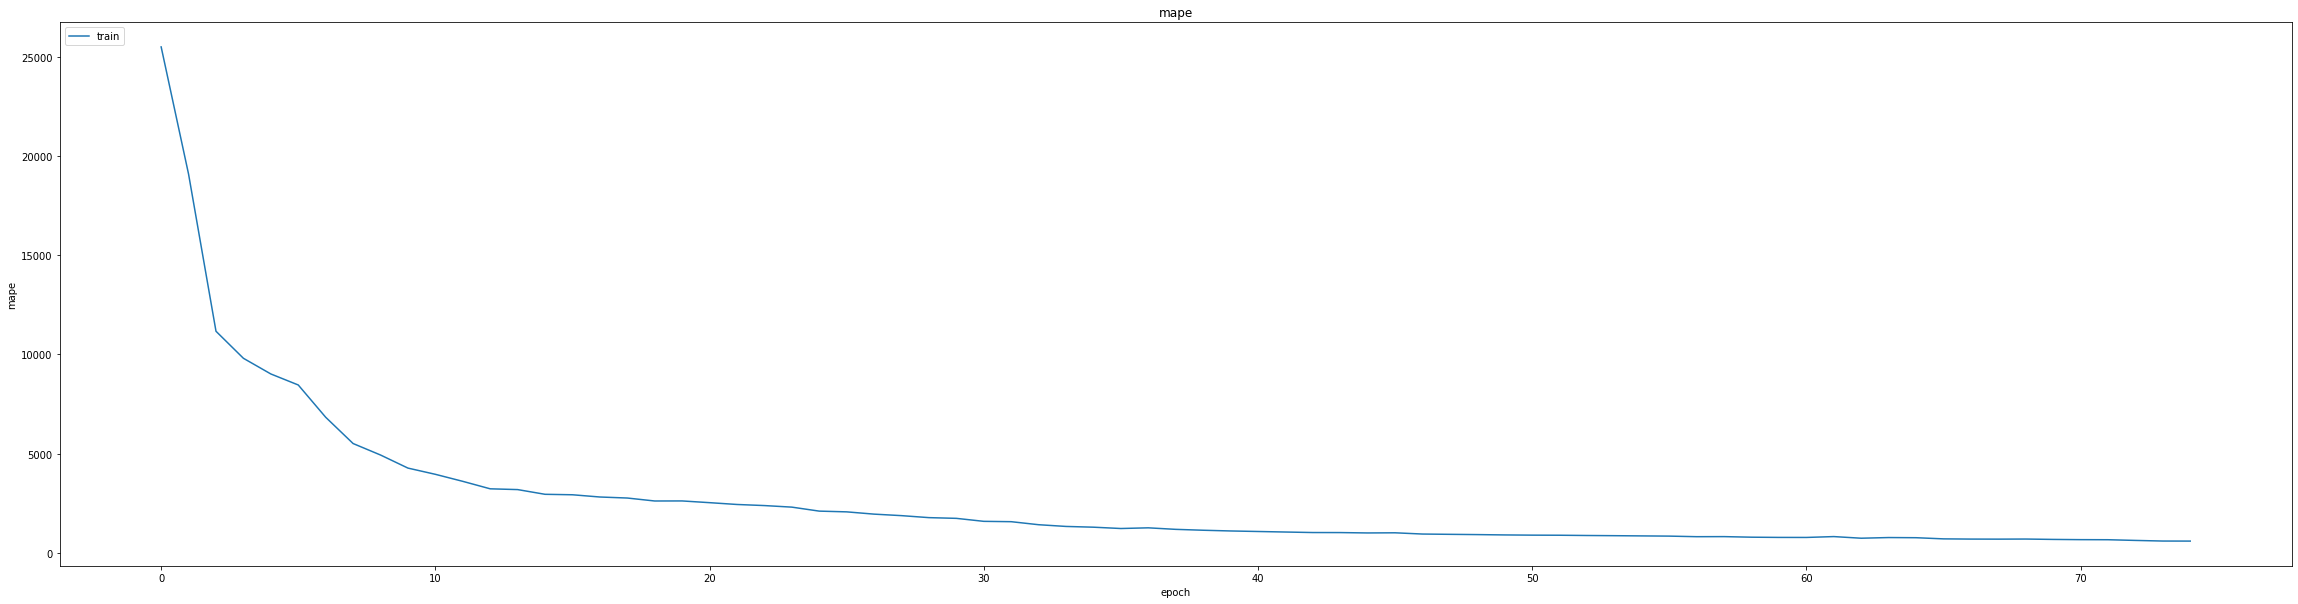

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009926863946020603
0.013551558367908001
348/348 [==============================] - 2s 3ms/step
0.9720222829768543


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
406/406 [==============================] - ETA: 0s - loss: 5.9803e-04 - mae: 0.0112 - mse: 5.9803e-04 - root_mean_squared_error: 0.0245 - mape: 860.1144
Epoch 1: val_mse did not improve from 0.00018
406/406 [==============================] - 8s 12ms/step - loss: 5.9803e-04 - mae: 0.0112 - mse: 5.9803e-04 - root_mean_squared_error: 0.0245 - mape: 860.1144 - val_loss: 4.0160e-04 - val_mae: 0.0164 - val_mse: 4.0160e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 3915.2915 - lr: 0.0010
Epoch 2/25
406/406 [==============================] - ETA: 0s - loss: 6.6588e-05 - mae: 0.0061 - mse: 6.6588e-05 - root_mean_squared_error: 0.0082 - mape: 809.0087
Epoch 2: val_mse did not improve from 0.00018
406/406 [==============================] - 4s 10ms/step - loss: 6.6588e-05 - mae: 0.0061 - mse: 6.6588e-05 - root_mean_squared_error: 0.0082 - mape: 809.0087 - val_loss: 3.5950e-04 - val_mae: 0.0155 - val_mse: 3.5950e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 3539.8186 - lr:

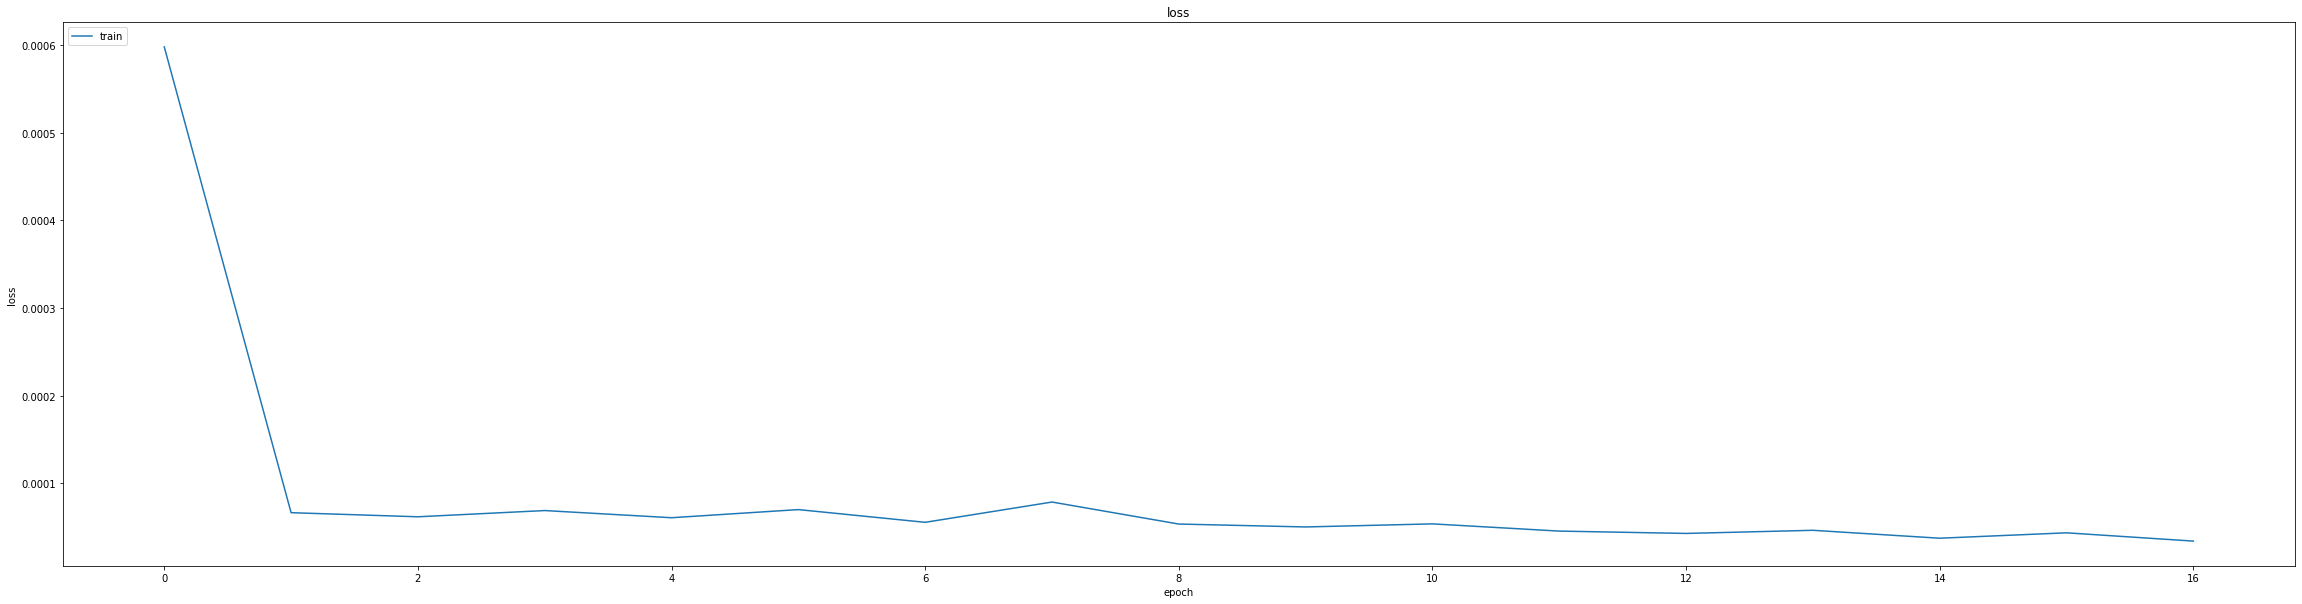

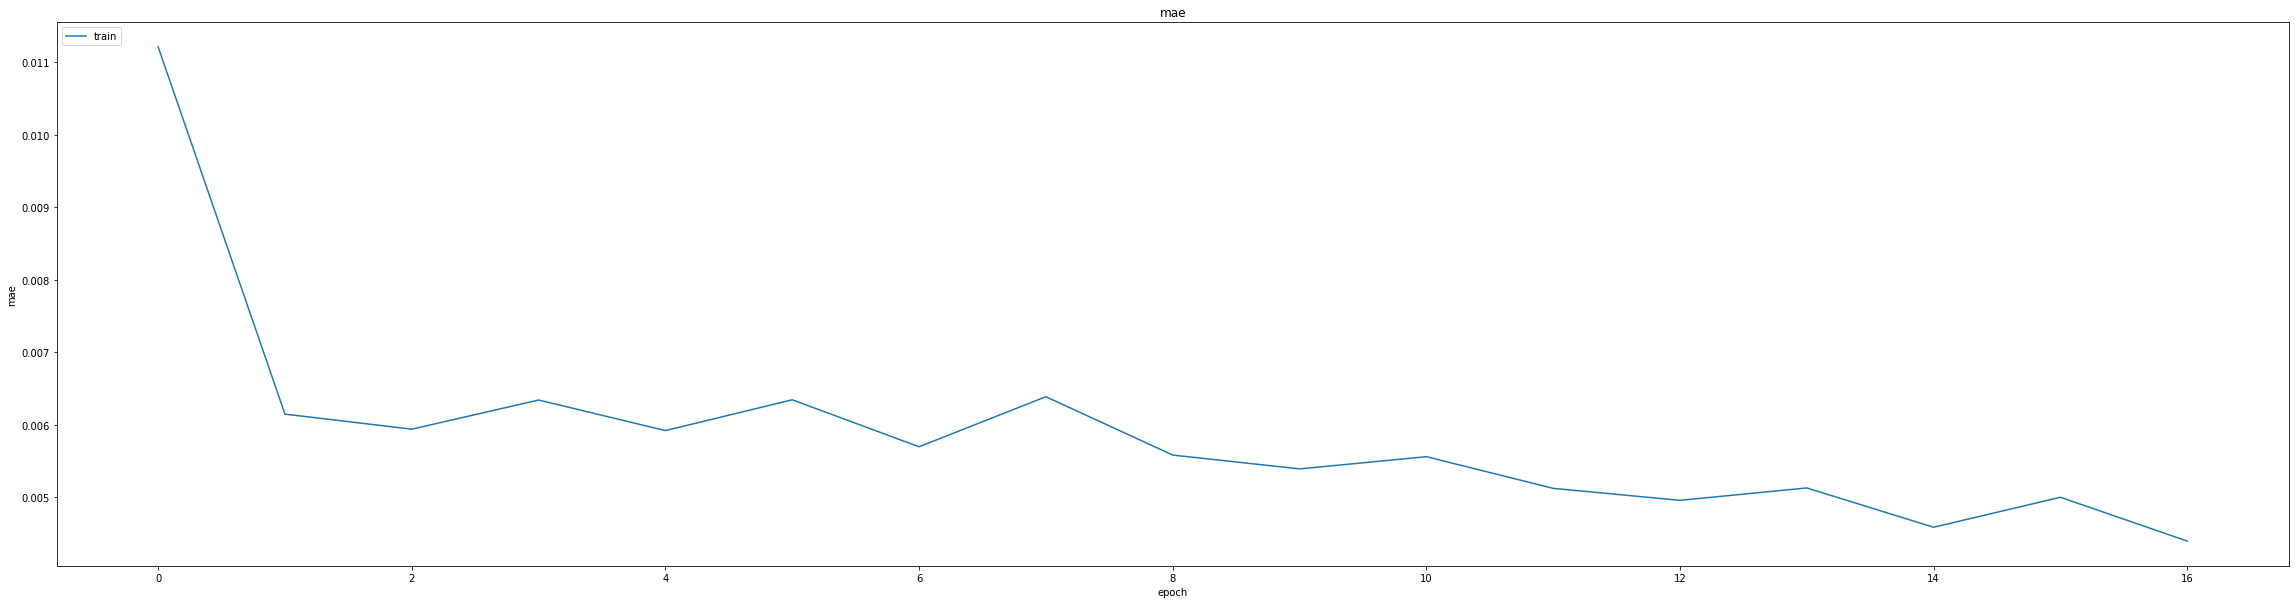

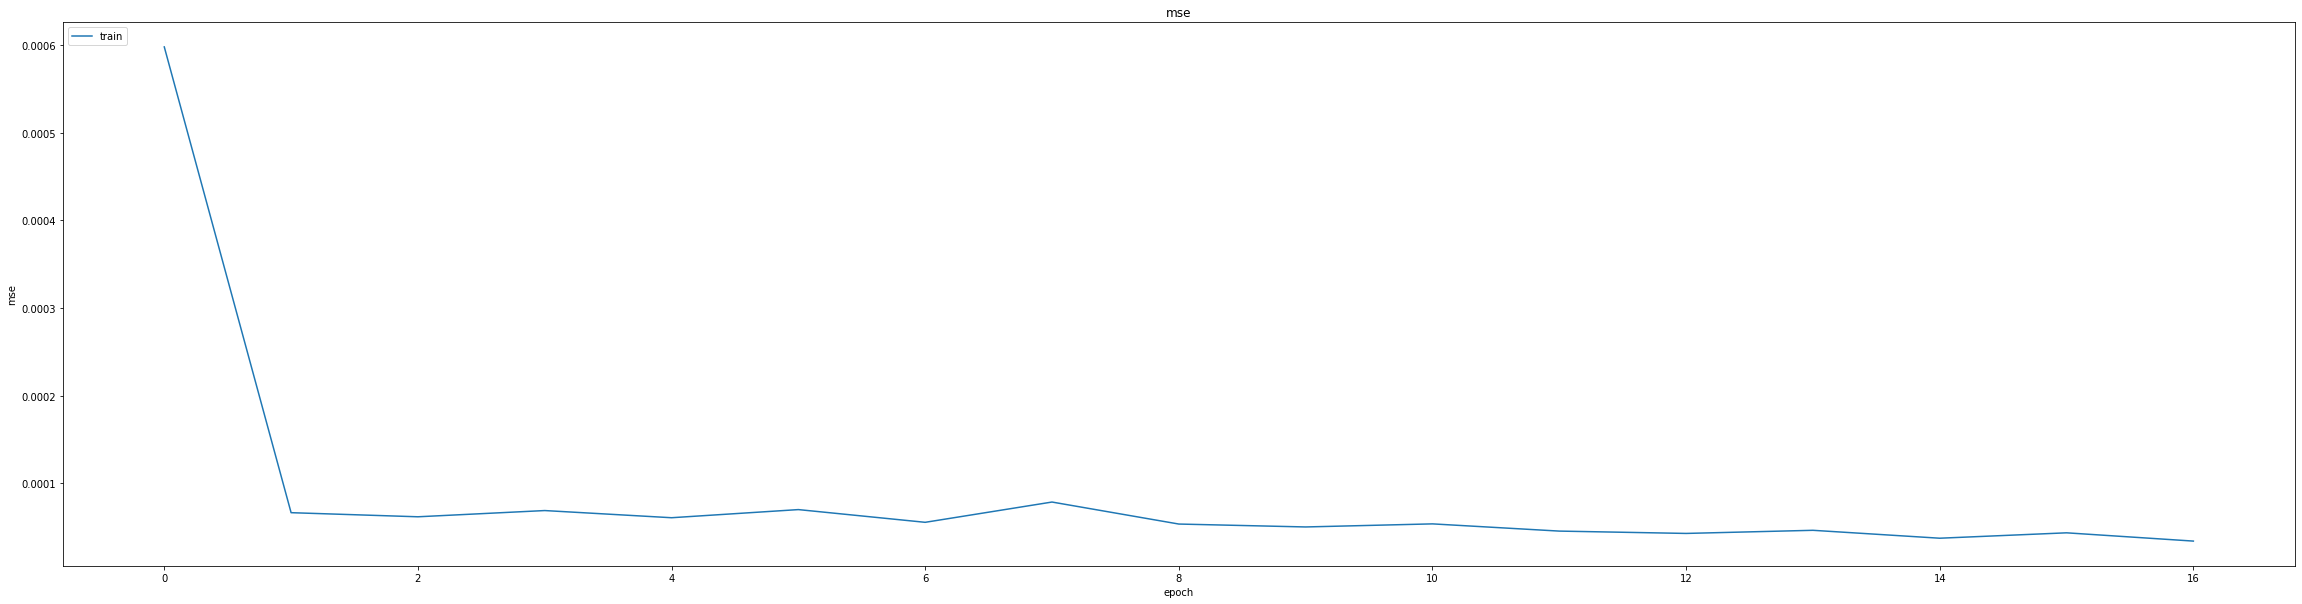

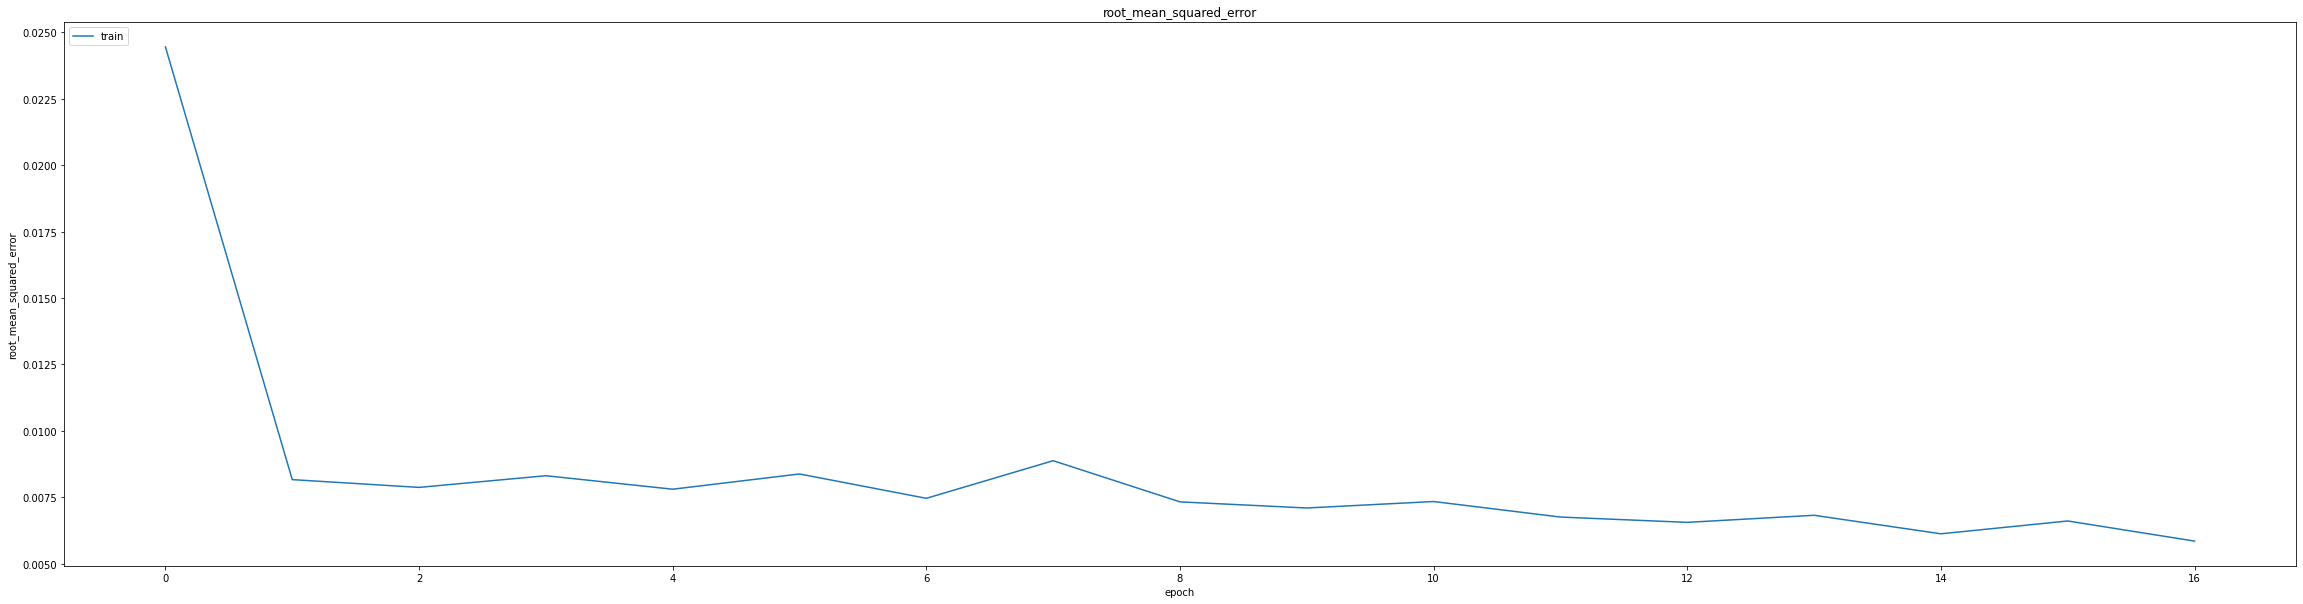

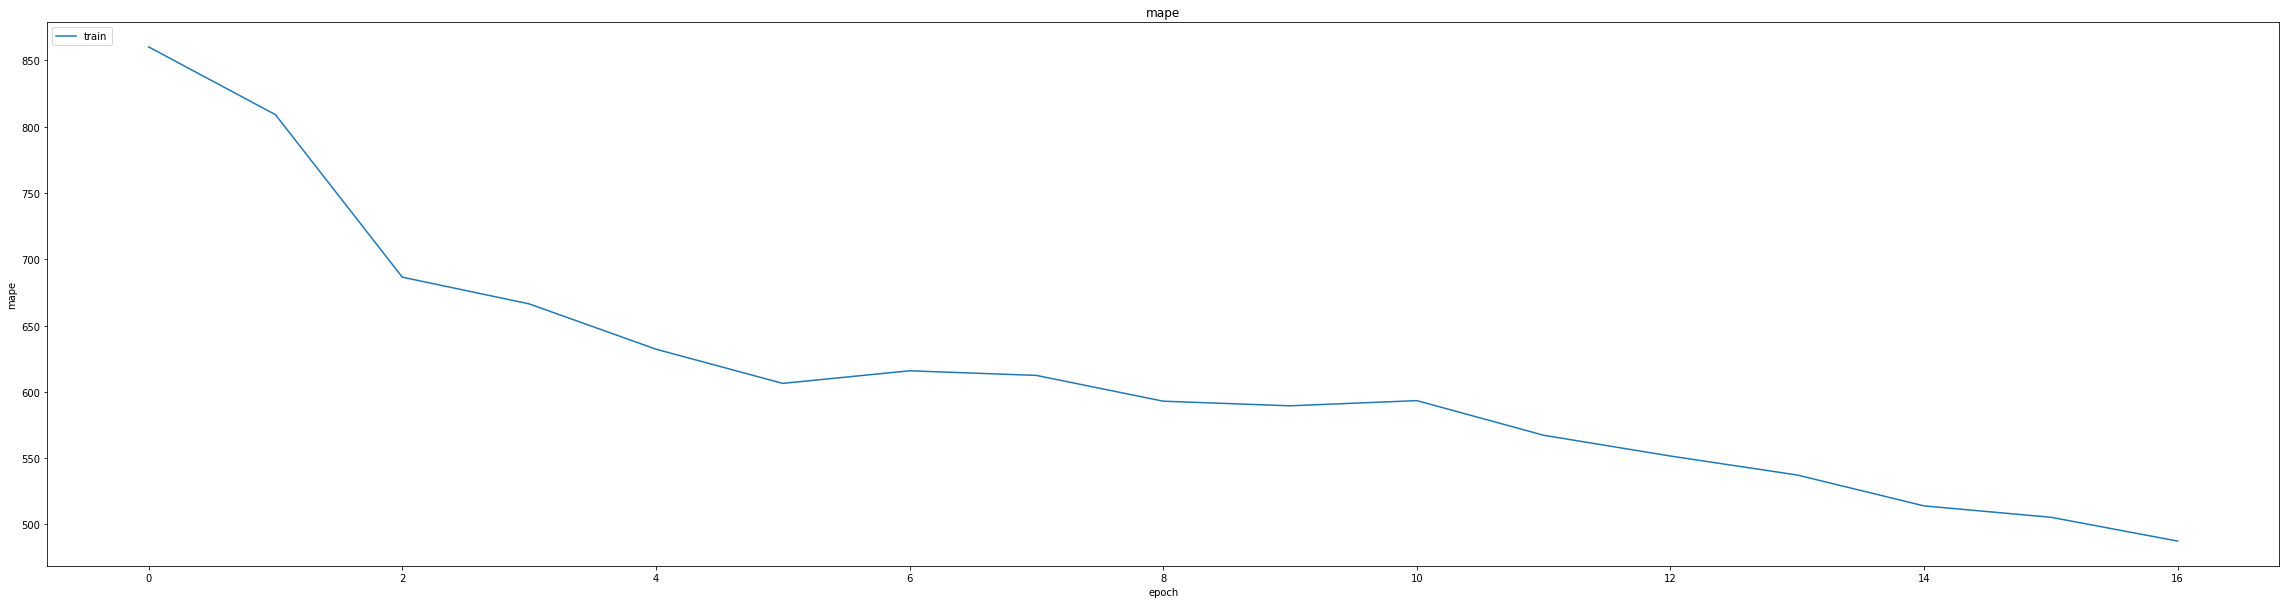

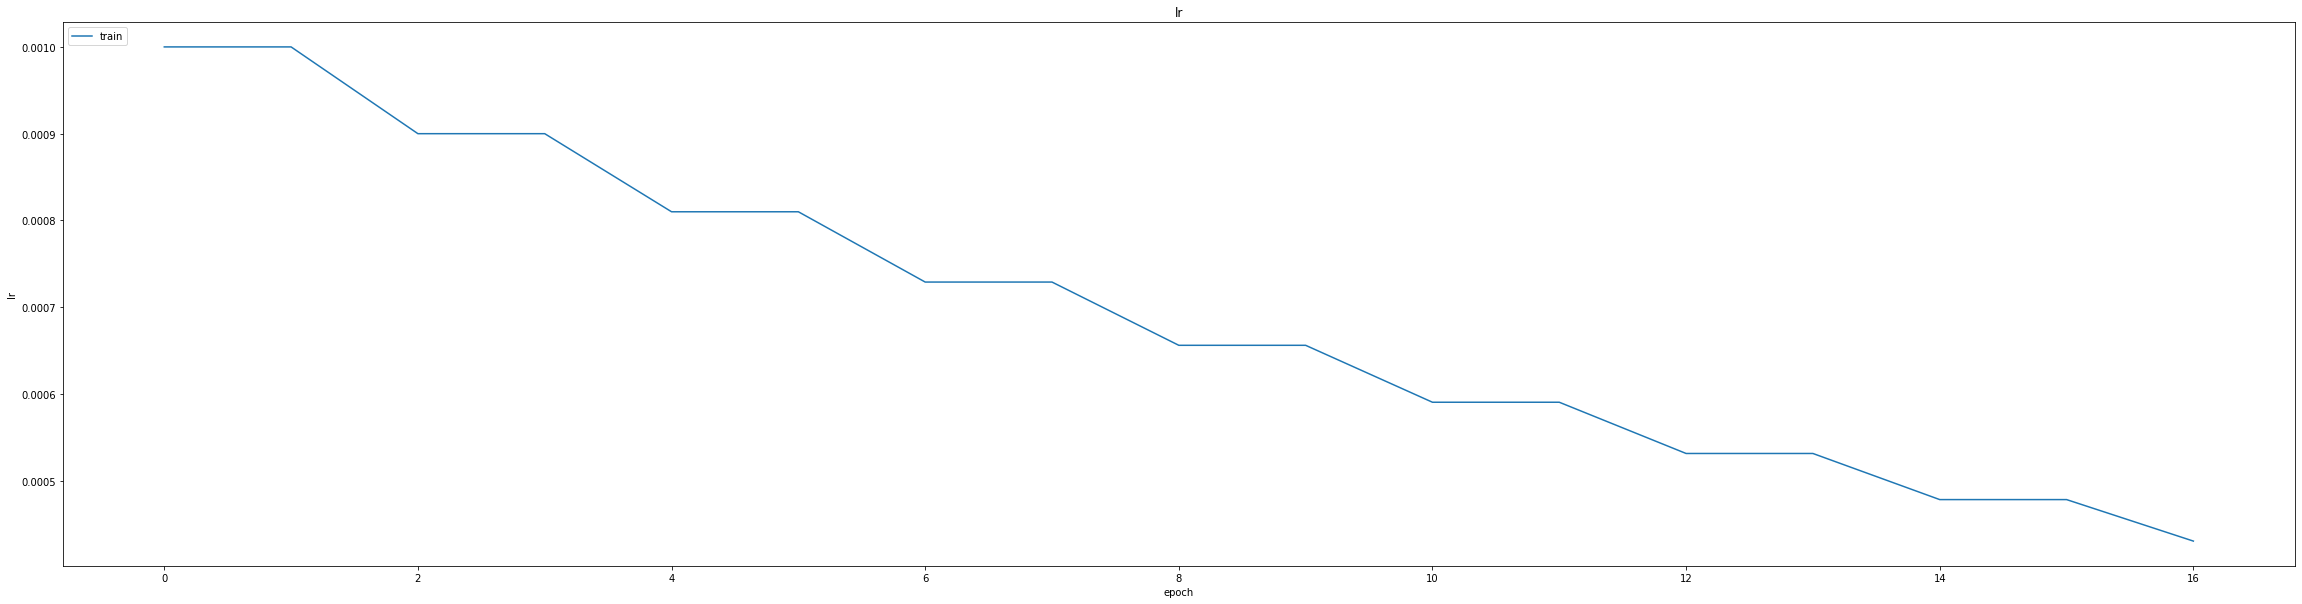

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015475410968065262
0.018960440531373024
348/348 [==============================] - 2s 4ms/step
0.9624456961518106


348/348 [==============================] - 1s 3ms/step


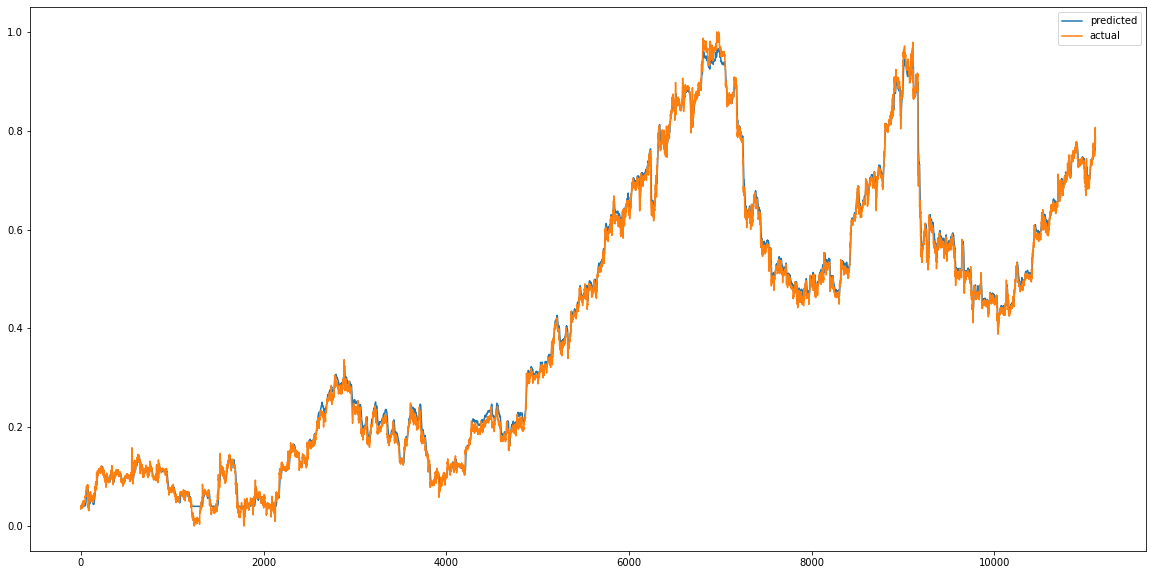

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


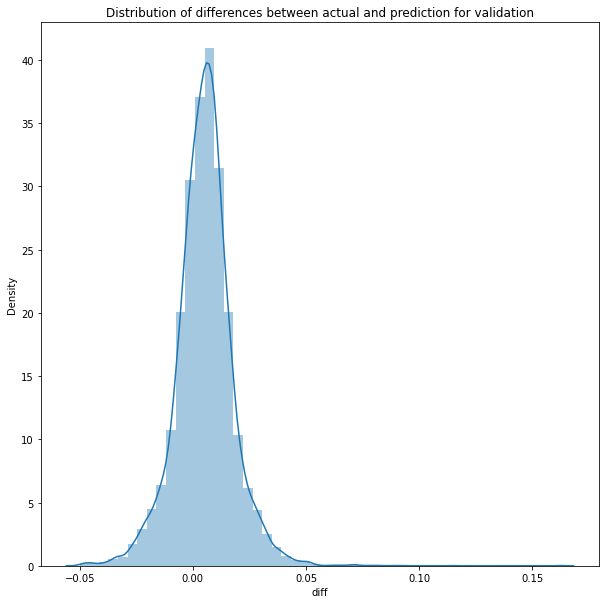

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


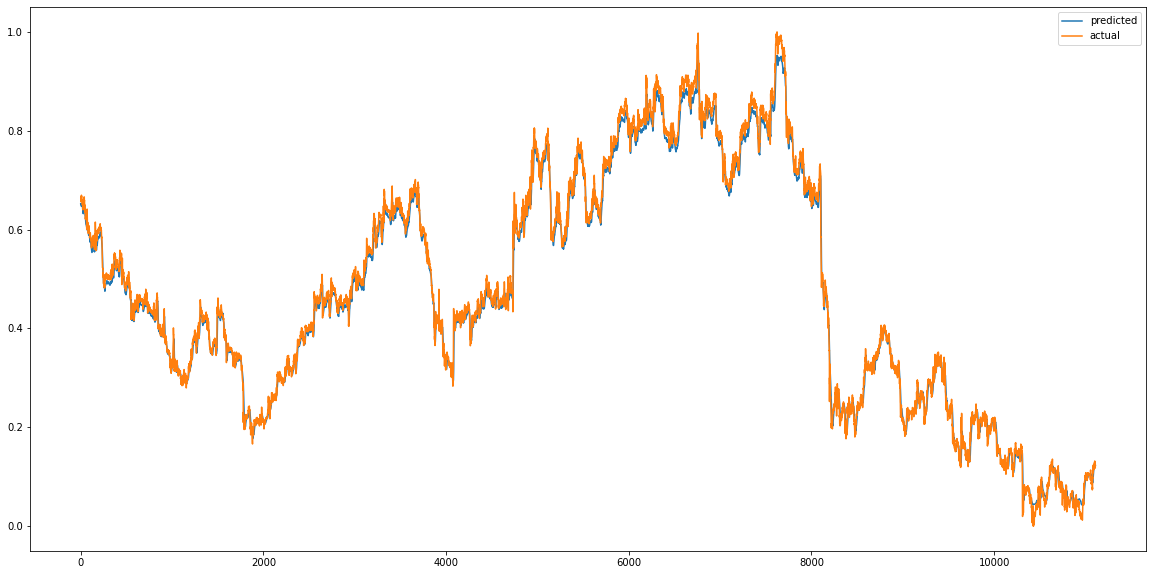

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


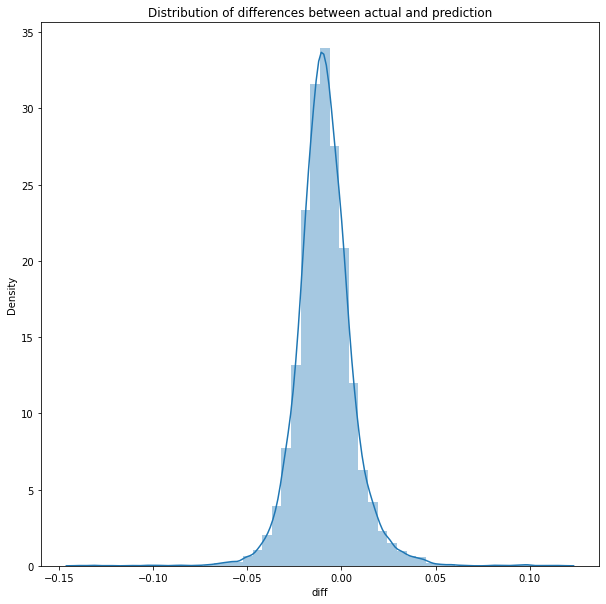

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00030262377264264335
RMSE :  0.017396084980323686
MAE :  0.013482446916846047
348/348 [==============================] - 2s 5ms/step
R2_Score  : 0.9948587192344147


count    11109.000000
mean        -0.008907
std          0.014944
min         -0.139147
25%         -0.017249
50%         -0.009455
75%         -0.001036
max          0.116277
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75


404/406 [============================>.] - ETA: 0s - loss: 243.6115 - mae: 1.9295 - mse: 243.6115 - root_mean_squared_error: 15.6081 - mape: 8660.0361
Epoch 1: val_mse improved from inf to 0.01928, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 15s 28ms/step - loss: 242.6075 - mae: 1.9218 - mse: 242.6075 - root_mean_squared_error: 15.5759 - mape: 8624.4688 - val_loss: 0.0193 - val_mae: 0.1186 - val_mse: 0.0193 - val_root_mean_squared_error: 0.1388 - val_mape: 27189.6191
Epoch 2/75
401/406 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0470 - mse: 0.0038 - root_mean_squared_error: 0.0619 - mape: 9487.7002
Epoch 2: val_mse did not improve from 0.01928
406/406 [==============================] - 4s 9ms/step - loss: 0.0038 - mae: 0.0469 - mse: 0.0038 - root_mean_squared_error: 0.0618 - mape: 9378.6250 - val_loss: 0.0247 - val_mae: 0.1489 - val_mse: 0.0247 - val_root_mean_squared_error: 0.1571 - val_mape: 19561.1172
Epoch 3/75
406/406 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0295 - mse: 0.0016 - root_mean_squared_error: 0.0395 - mape: 4746.6562
Epoch 3: val_mse did not improve from 0.01928
406/406 [==============================] - 4s 9ms/step 

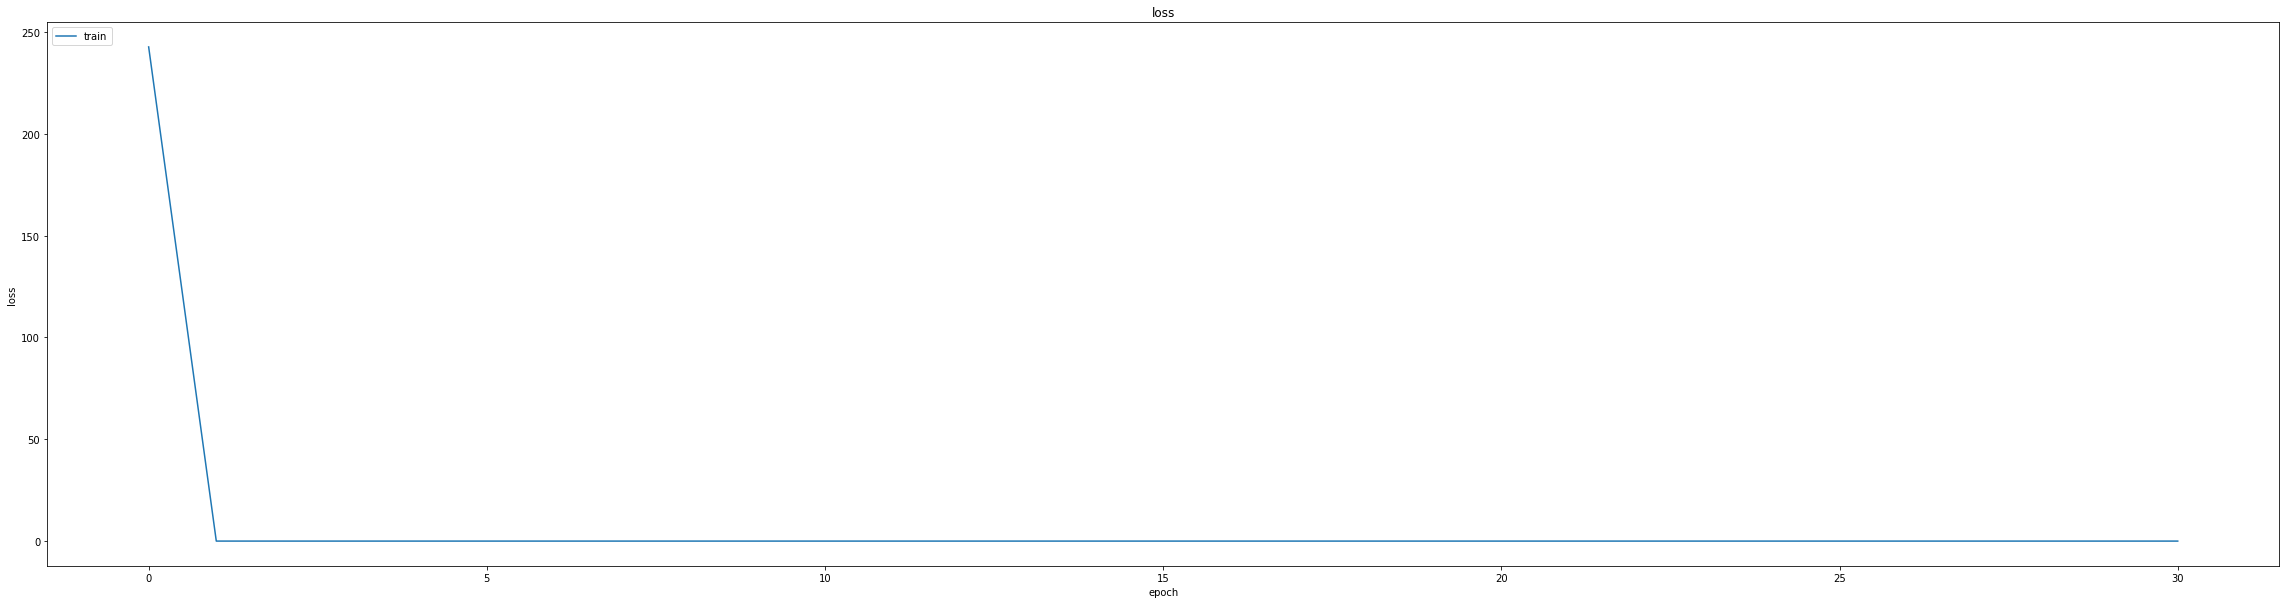

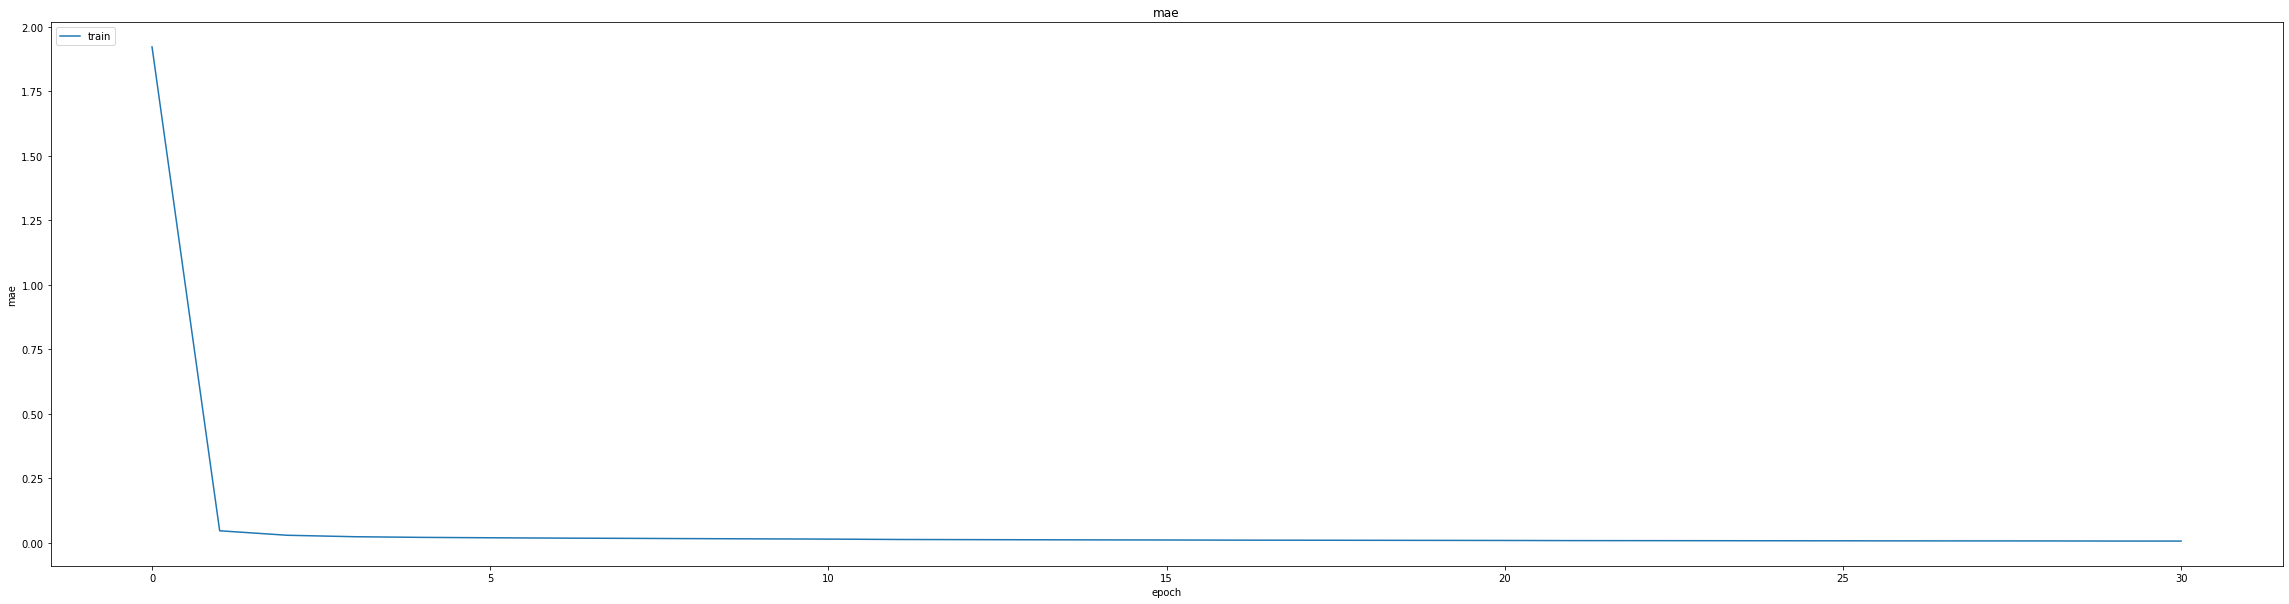

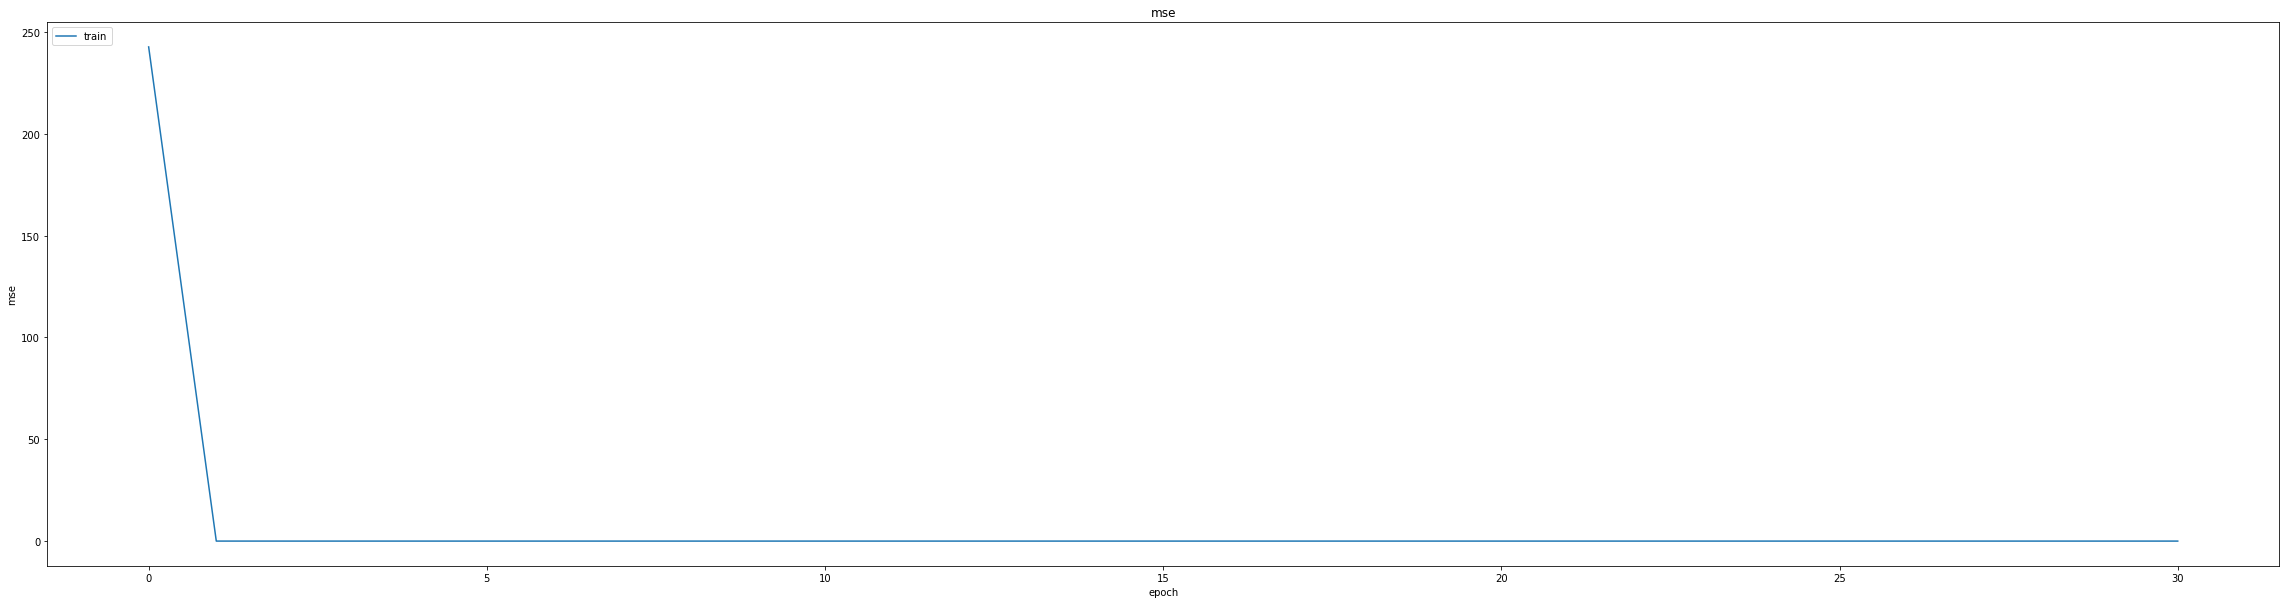

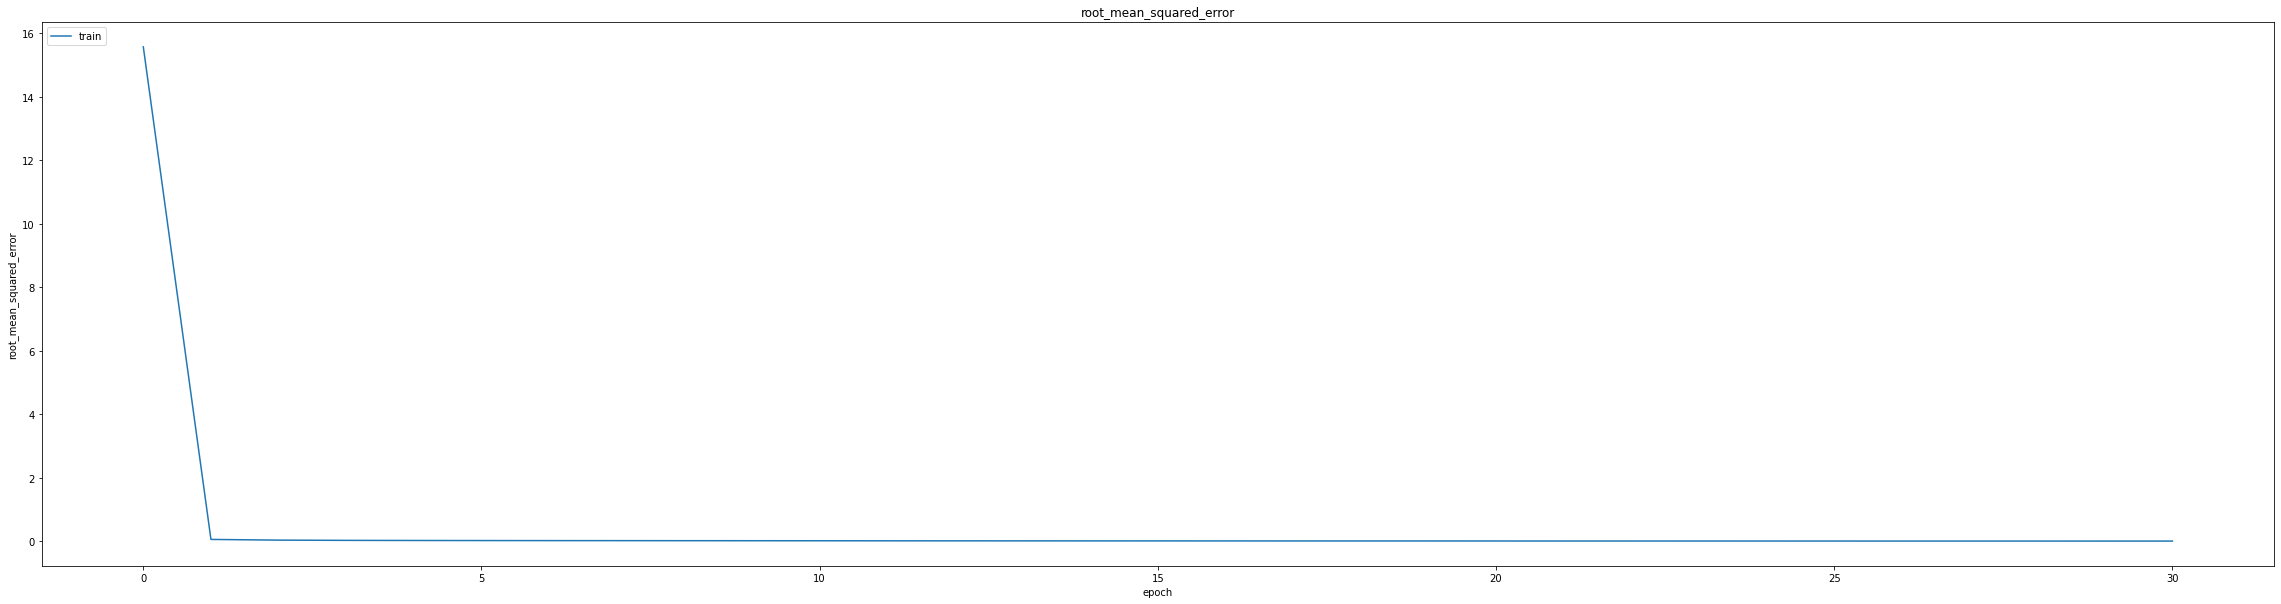

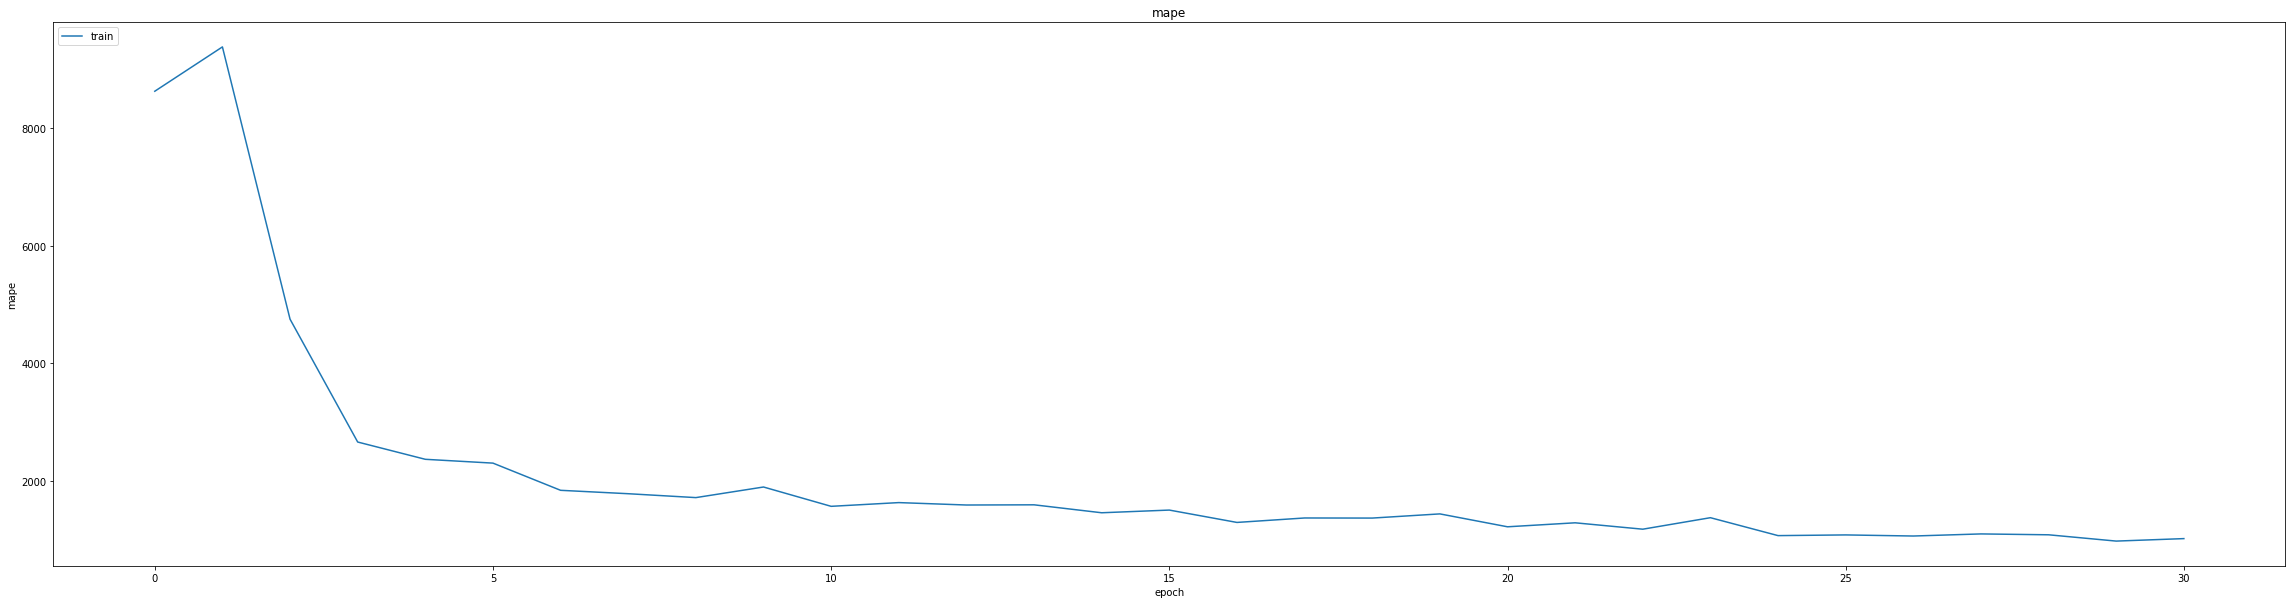

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.11861910670995712
0.13884246349334717
348/348 [==============================] - 2s 3ms/step
0.15270199769355608


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
401/406 [============================>.] - ETA: 0s - loss: 0.0153 - mae: 0.0522 - mse: 0.0153 - root_mean_squared_error: 0.1239 - mape: 4540.3208
Epoch 1: val_mse improved from 0.01928 to 0.00911, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(70-30)


406/406 [==============================] - 15s 29ms/step - loss: 0.0152 - mae: 0.0518 - mse: 0.0152 - root_mean_squared_error: 0.1232 - mape: 4488.1665 - val_loss: 0.0091 - val_mae: 0.0898 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0955 - val_mape: 11541.5039 - lr: 0.0010
Epoch 2/25
400/406 [============================>.] - ETA: 0s - loss: 4.2498e-04 - mae: 0.0152 - mse: 4.2498e-04 - root_mean_squared_error: 0.0206 - mape: 1465.5870
Epoch 2: val_mse did not improve from 0.00911
406/406 [==============================] - 4s 9ms/step - loss: 4.2348e-04 - mae: 0.0152 - mse: 4.2348e-04 - root_mean_squared_error: 0.0206 - mape: 1445.1807 - val_loss: 0.0100 - val_mae: 0.0956 - val_mse: 0.0100 - val_root_mean_squared_error: 0.1002 - val_mape: 9467.4453 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
406/406 [==============================] - ETA: 0s - loss: 2.9987e-04 - mae: 0.0129 - mse: 2.9987e-04 - root_mean_squared_error: 0.0173 - mape: 1278.7211
Epoch 3: val_mse did 

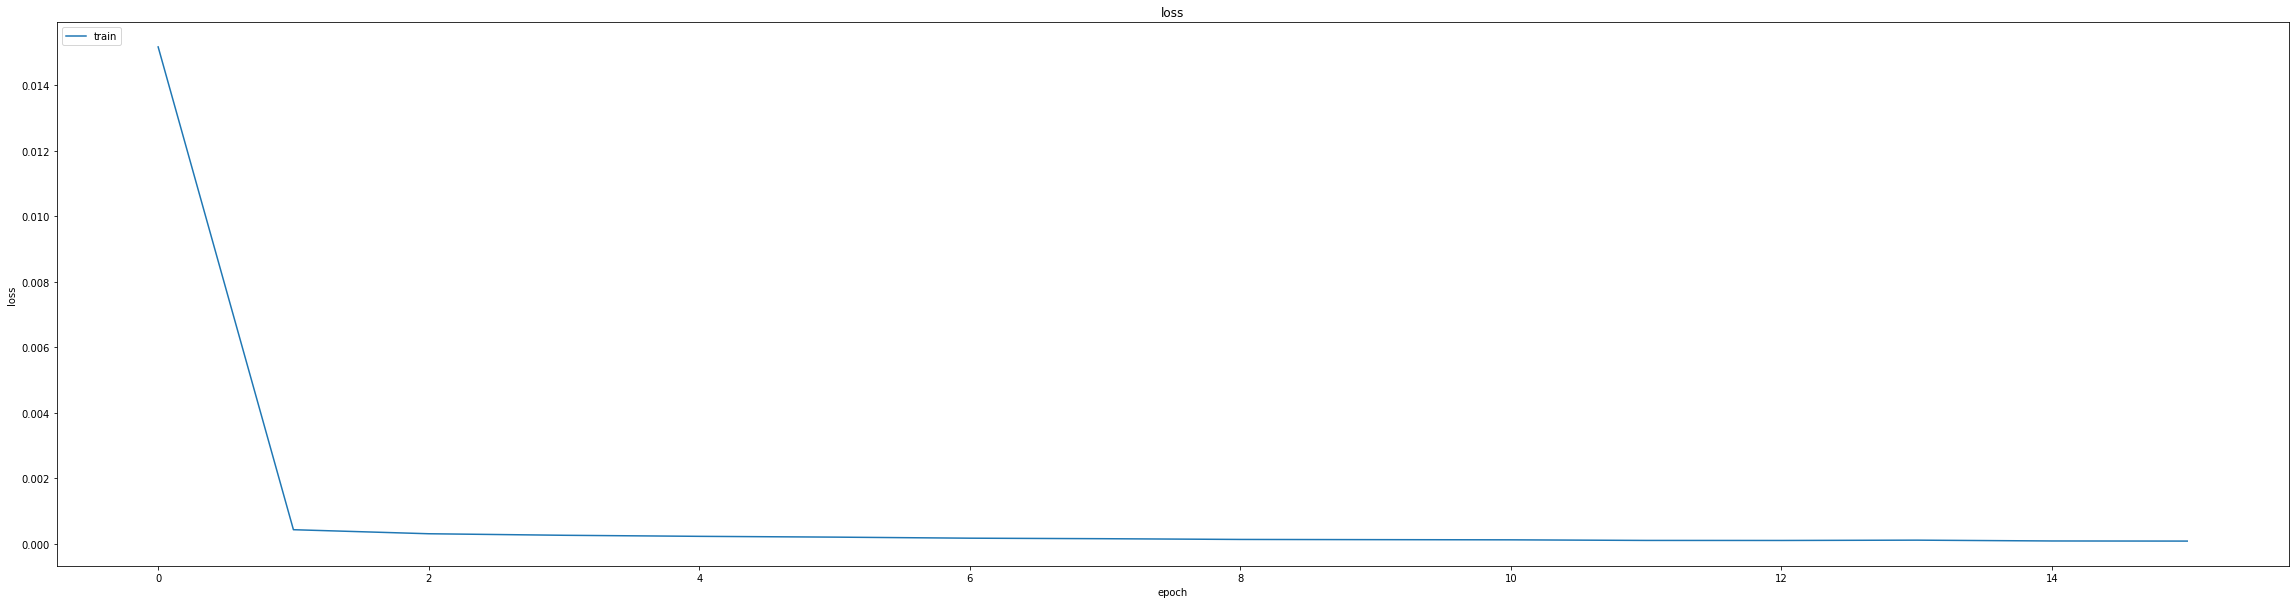

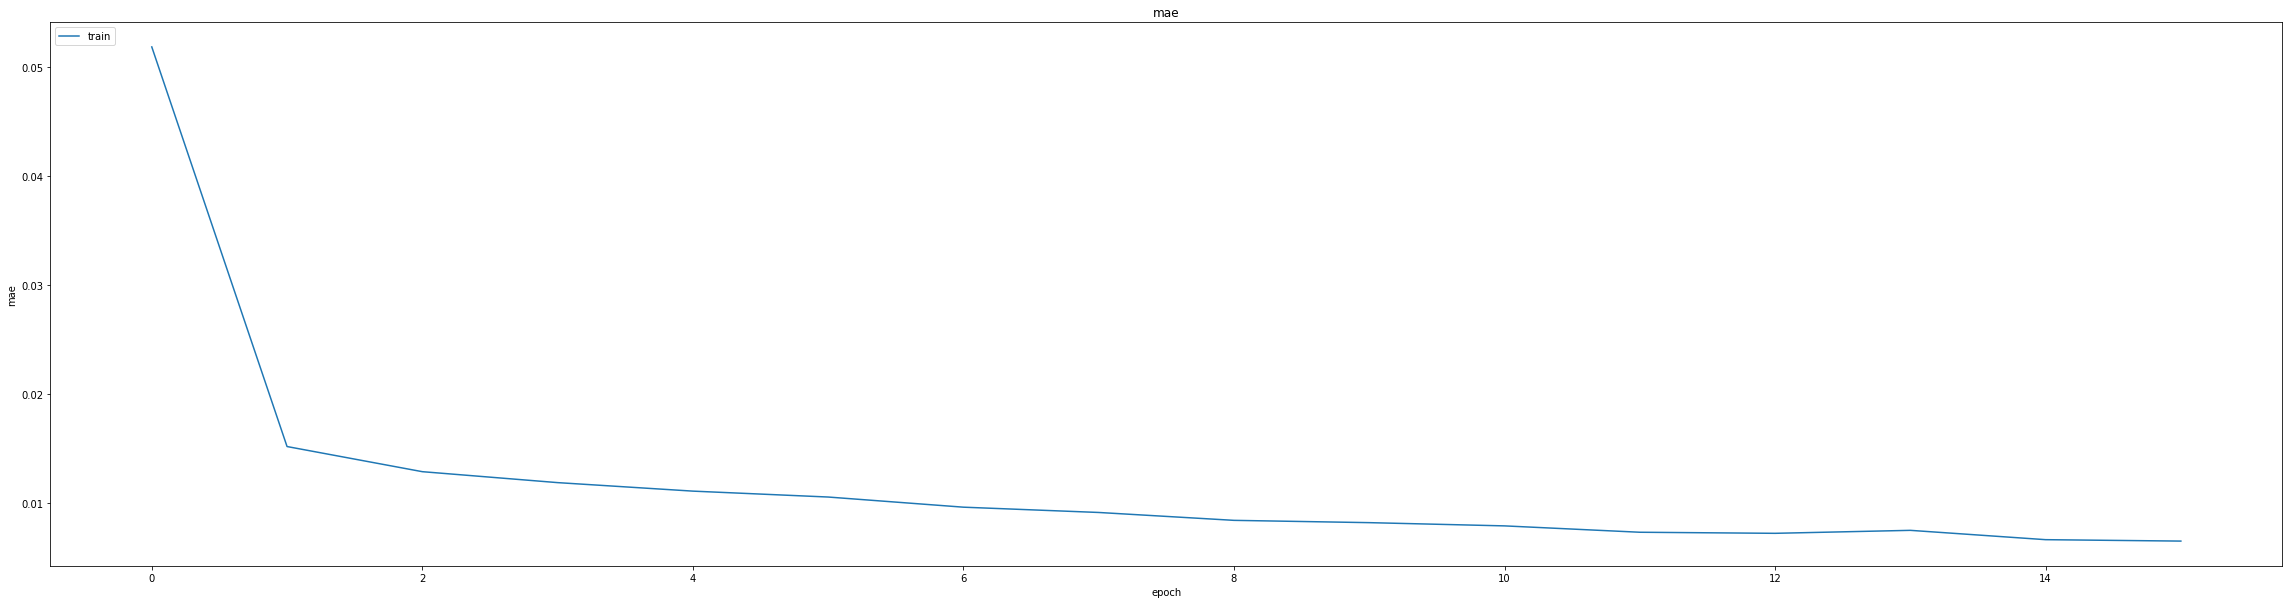

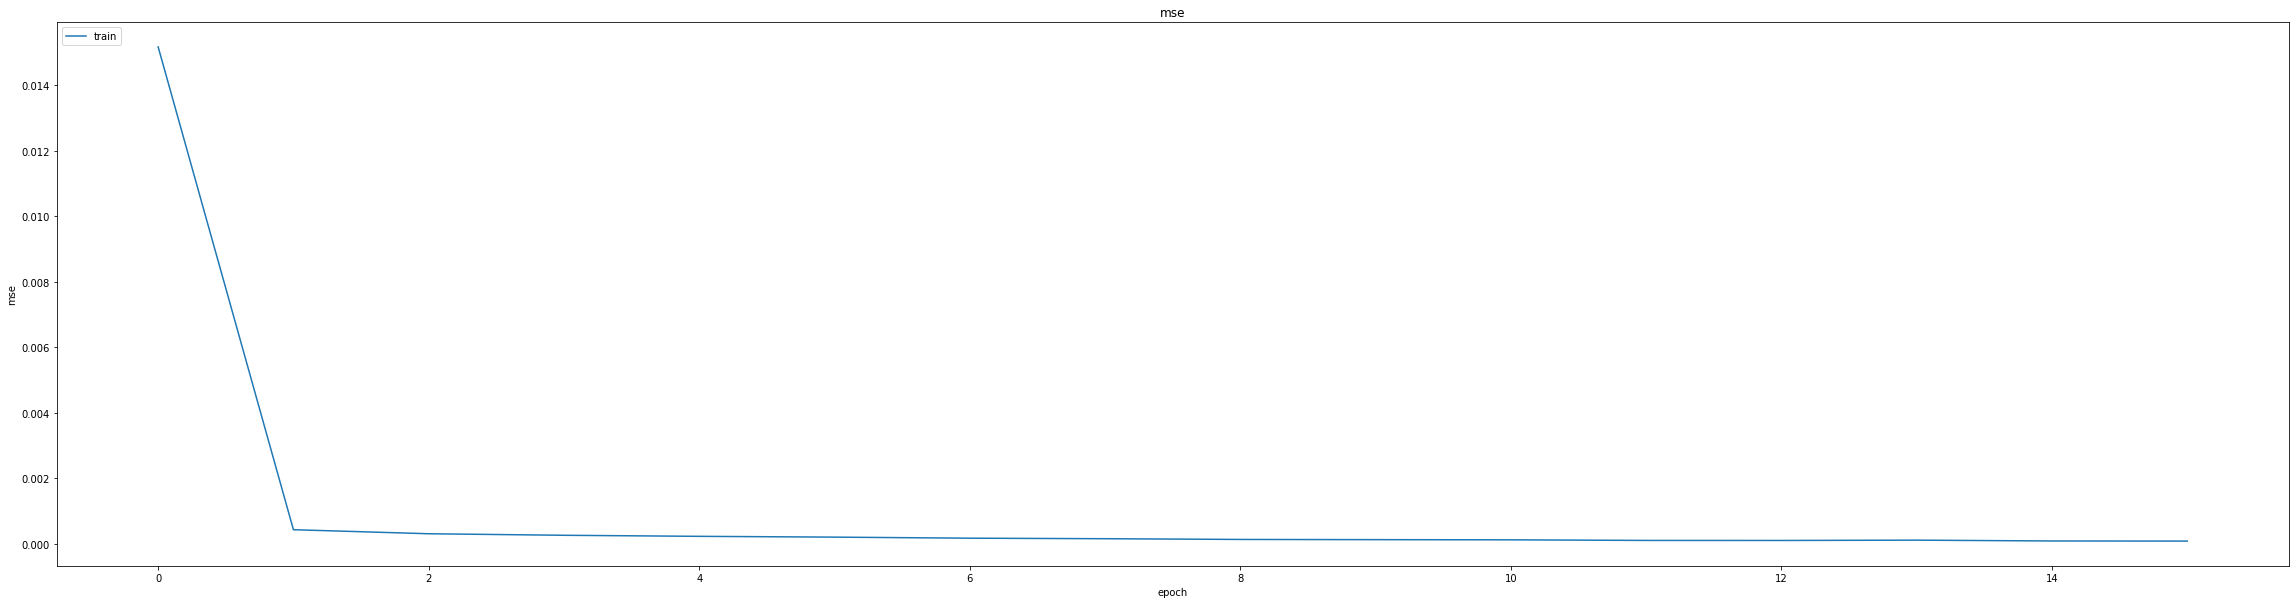

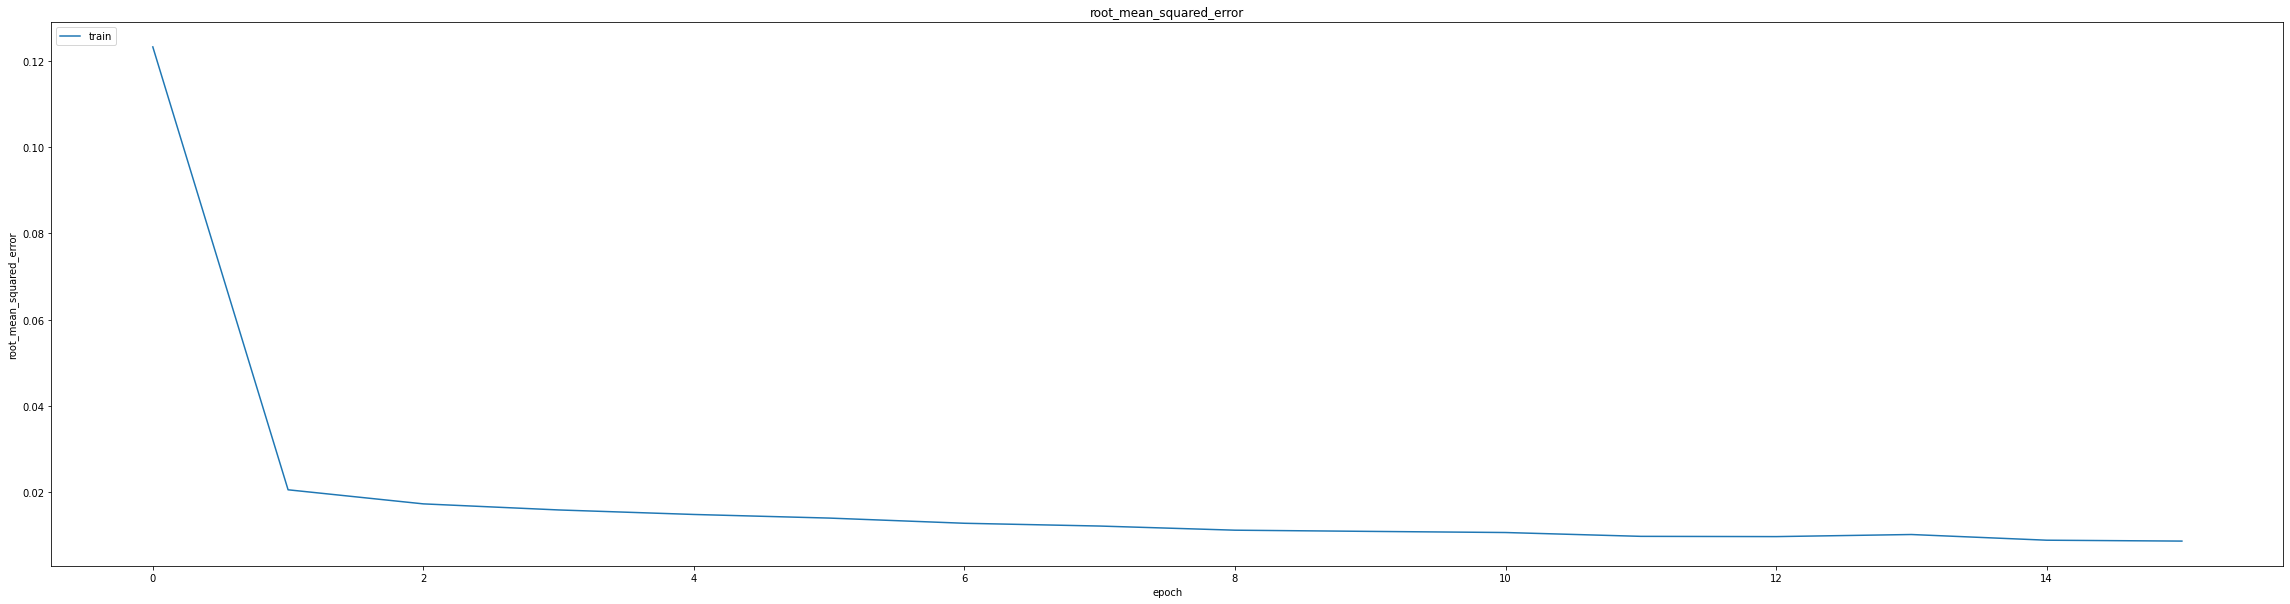

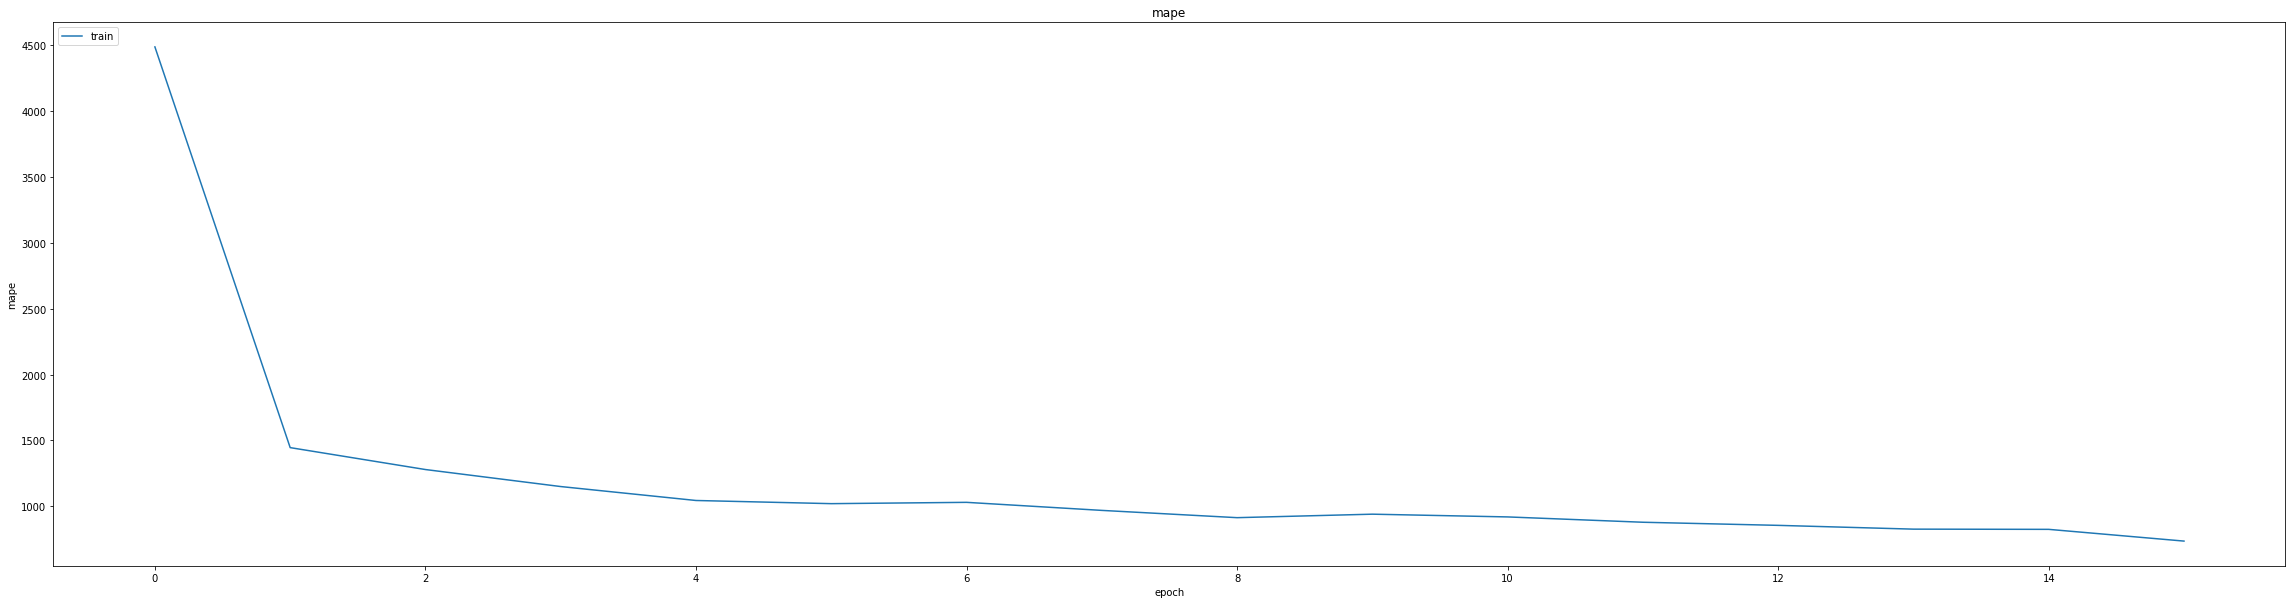

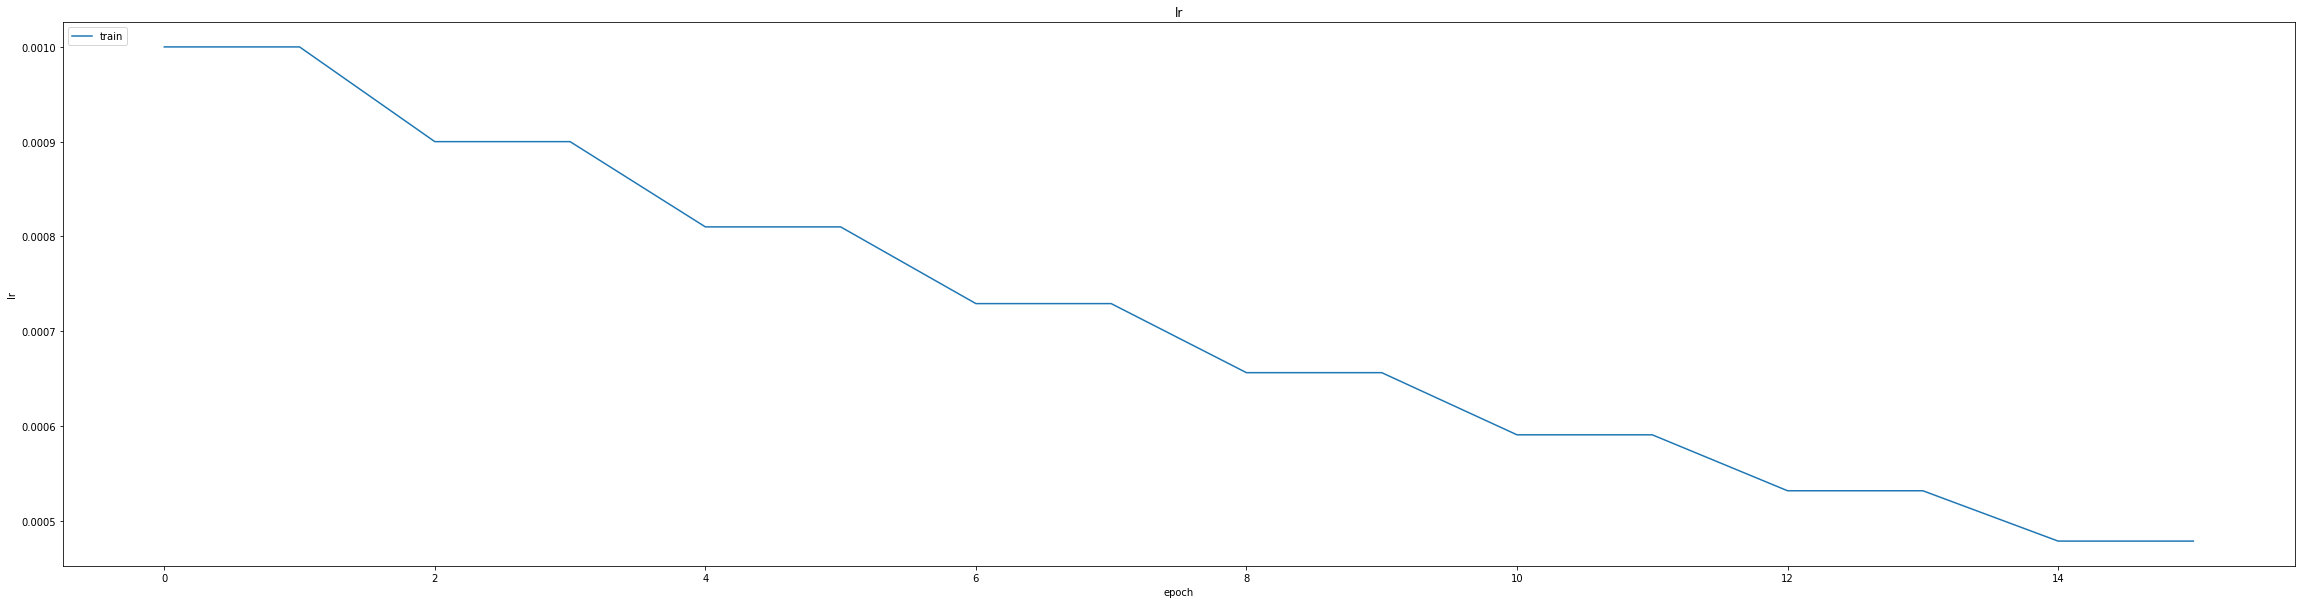

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.08980530500411987
0.09546992927789688
348/348 [==============================] - 2s 3ms/step
0.5760319241915564


348/348 [==============================] - 1s 3ms/step


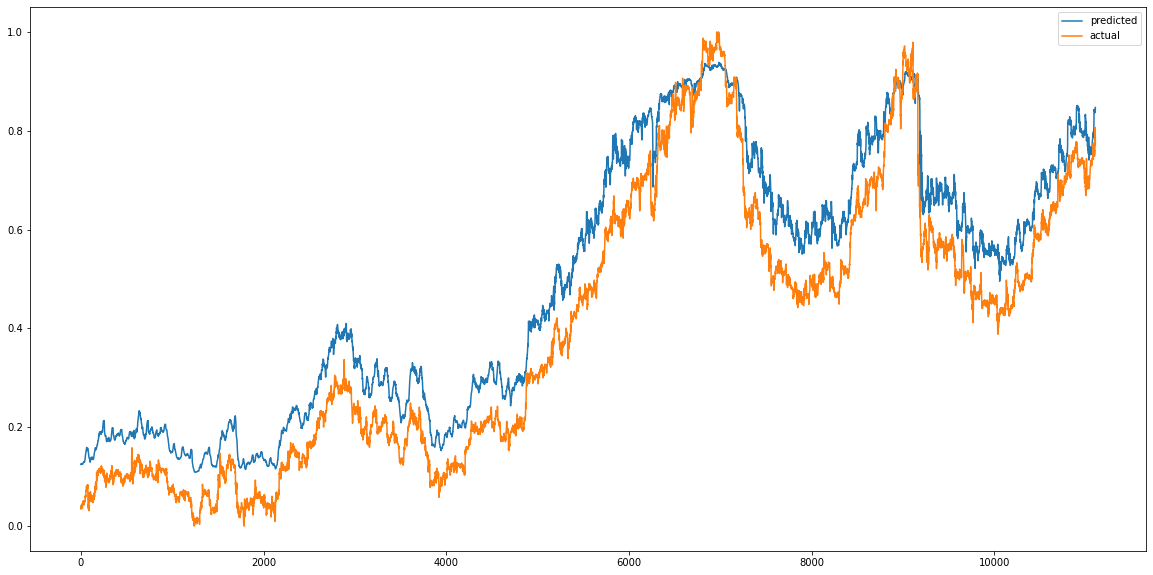

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_CNN_GRU(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


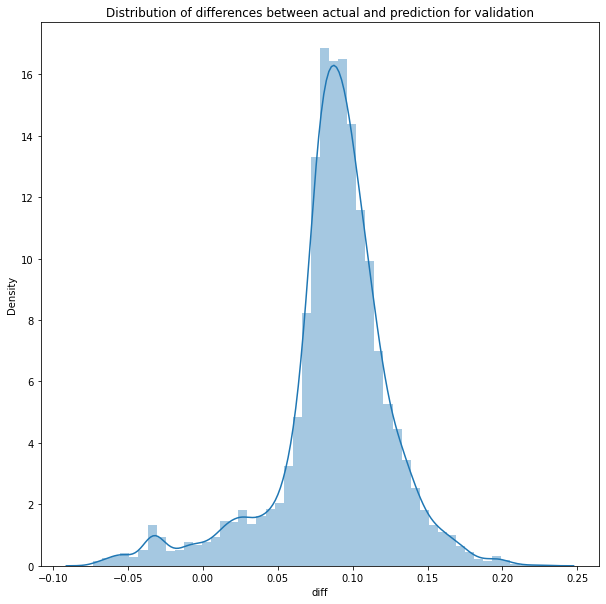

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 3ms/step


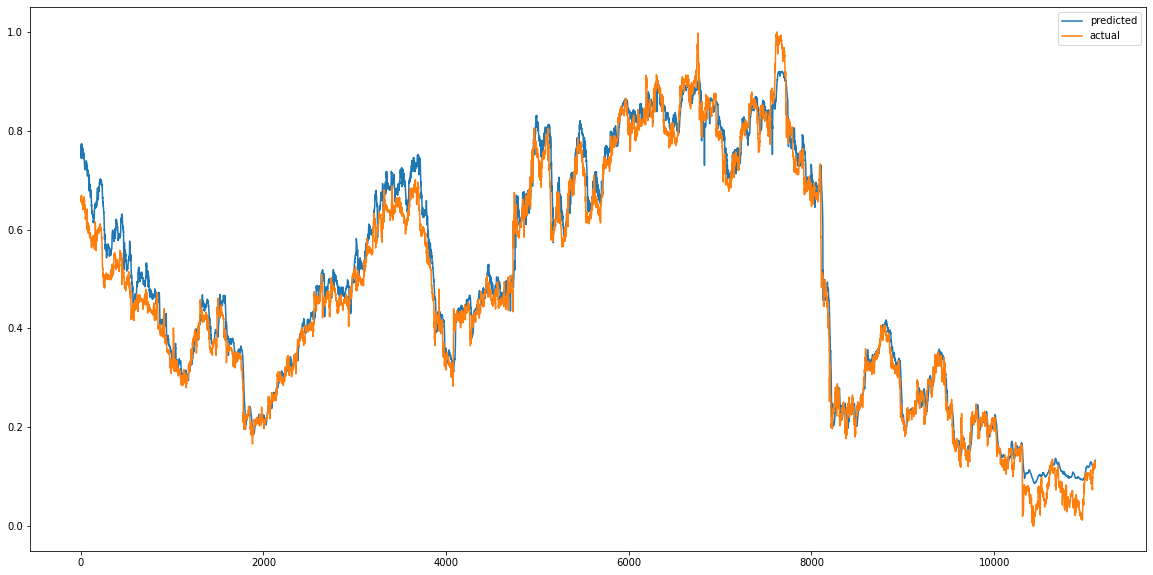

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


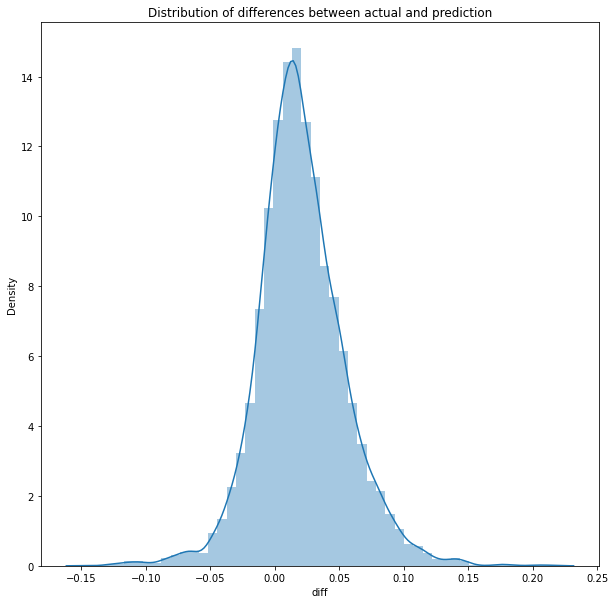

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0015832936440743448
RMSE :  0.03979062256454836
MAE :  0.030089910334692604
348/348 [==============================] - 1s 3ms/step
R2_Score  : 0.9731013955701363


count    11109.000000
mean         0.020603
std          0.034043
min         -0.145645
25%          0.000419
50%          0.017784
75%          0.039558
max          0.215873
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 513.8936 - mae: 5.9249 - mse: 513.8936 - root_mean_squared_error: 22.6692 - mape: 33145.6289
Epoch 1: val_mse improved from inf to 0.56787, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 52s 105ms/step - loss: 511.7780 - mae: 5.9034 - mse: 511.7780 - root_mean_squared_error: 22.6225 - mape: 33010.0742 - val_loss: 0.5679 - val_mae: 0.6998 - val_mse: 0.5679 - val_root_mean_squared_error: 0.7536 - val_mape: 101151.0234
Epoch 2/75
406/406 [==============================] - ETA: 0s - loss: 0.2628 - mae: 0.4540 - mse: 0.2628 - root_mean_squared_error: 0.5126 - mape: 18718.8652
Epoch 2: val_mse improved from 0.56787 to 0.16159, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.2628 - mae: 0.4540 - mse: 0.2628 - root_mean_squared_error: 0.5126 - mape: 18718.8652 - val_loss: 0.1616 - val_mae: 0.3380 - val_mse: 0.1616 - val_root_mean_squared_error: 0.4020 - val_mape: 63651.2656
Epoch 3/75
405/406 [============================>.] - ETA: 0s - loss: 0.0915 - mae: 0.2702 - mse: 0.0915 - root_mean_squared_error: 0.3025 - mape: 12397.8115
Epoch 3: val_mse improved from 0.16159 to 0.09868, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0915 - mae: 0.2702 - mse: 0.0915 - root_mean_squared_error: 0.3024 - mape: 12377.4600 - val_loss: 0.0987 - val_mae: 0.2654 - val_mse: 0.0987 - val_root_mean_squared_error: 0.3141 - val_mape: 50634.3086
Epoch 4/75
406/406 [==============================] - ETA: 0s - loss: 0.0609 - mae: 0.2175 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 10248.5967
Epoch 4: val_mse improved from 0.09868 to 0.08307, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0609 - mae: 0.2175 - mse: 0.0609 - root_mean_squared_error: 0.2468 - mape: 10248.5967 - val_loss: 0.0831 - val_mae: 0.2466 - val_mse: 0.0831 - val_root_mean_squared_error: 0.2882 - val_mape: 44527.5234
Epoch 5/75
405/406 [============================>.] - ETA: 0s - loss: 0.0541 - mae: 0.1965 - mse: 0.0541 - root_mean_squared_error: 0.2326 - mape: 9989.9121 
Epoch 5: val_mse improved from 0.08307 to 0.07861, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0541 - mae: 0.1965 - mse: 0.0541 - root_mean_squared_error: 0.2326 - mape: 9973.4717 - val_loss: 0.0786 - val_mae: 0.2433 - val_mse: 0.0786 - val_root_mean_squared_error: 0.2804 - val_mape: 41487.3672
Epoch 6/75
405/406 [============================>.] - ETA: 0s - loss: 0.0526 - mae: 0.1875 - mse: 0.0526 - root_mean_squared_error: 0.2292 - mape: 9878.4766
Epoch 6: val_mse improved from 0.07861 to 0.07725, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0525 - mae: 0.1875 - mse: 0.0525 - root_mean_squared_error: 0.2292 - mape: 9862.1963 - val_loss: 0.0773 - val_mae: 0.2430 - val_mse: 0.0773 - val_root_mean_squared_error: 0.2779 - val_mape: 40036.9180
Epoch 7/75
405/406 [============================>.] - ETA: 0s - loss: 0.0524 - mae: 0.1843 - mse: 0.0524 - root_mean_squared_error: 0.2288 - mape: 8081.6558
Epoch 7: val_mse improved from 0.07725 to 0.07683, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0524 - mae: 0.1843 - mse: 0.0524 - root_mean_squared_error: 0.2288 - mape: 8068.3877 - val_loss: 0.0768 - val_mae: 0.2430 - val_mse: 0.0768 - val_root_mean_squared_error: 0.2772 - val_mape: 39437.9453
Epoch 8/75
403/406 [============================>.] - ETA: 0s - loss: 0.0522 - mae: 0.1829 - mse: 0.0522 - root_mean_squared_error: 0.2286 - mape: 8249.9854
Epoch 8: val_mse improved from 0.07683 to 0.07666, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0523 - mae: 0.1829 - mse: 0.0523 - root_mean_squared_error: 0.2286 - mape: 8196.6826 - val_loss: 0.0767 - val_mae: 0.2430 - val_mse: 0.0767 - val_root_mean_squared_error: 0.2769 - val_mape: 39190.5547
Epoch 9/75
404/406 [============================>.] - ETA: 0s - loss: 0.0522 - mae: 0.1825 - mse: 0.0522 - root_mean_squared_error: 0.2285 - mape: 8444.0684
Epoch 9: val_mse improved from 0.07666 to 0.07660, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0522 - mae: 0.1825 - mse: 0.0522 - root_mean_squared_error: 0.2285 - mape: 8409.6035 - val_loss: 0.0766 - val_mae: 0.2429 - val_mse: 0.0766 - val_root_mean_squared_error: 0.2768 - val_mape: 39137.4492
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 0.0522 - mae: 0.1823 - mse: 0.0522 - root_mean_squared_error: 0.2285 - mape: 8473.5908
Epoch 10: val_mse improved from 0.07660 to 0.07657, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0522 - mae: 0.1823 - mse: 0.0522 - root_mean_squared_error: 0.2285 - mape: 8459.6758 - val_loss: 0.0766 - val_mae: 0.2429 - val_mse: 0.0766 - val_root_mean_squared_error: 0.2767 - val_mape: 39155.0625
Epoch 11/75
404/406 [============================>.] - ETA: 0s - loss: 0.0522 - mae: 0.1824 - mse: 0.0522 - root_mean_squared_error: 0.2285 - mape: 9028.7354
Epoch 11: val_mse improved from 0.07657 to 0.07653, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0522 - mae: 0.1824 - mse: 0.0522 - root_mean_squared_error: 0.2286 - mape: 8991.7969 - val_loss: 0.0765 - val_mae: 0.2427 - val_mse: 0.0765 - val_root_mean_squared_error: 0.2766 - val_mape: 39171.7539
Epoch 12/75
403/406 [============================>.] - ETA: 0s - loss: 0.0520 - mae: 0.1822 - mse: 0.0520 - root_mean_squared_error: 0.2281 - mape: 8178.4062
Epoch 12: val_mse improved from 0.07653 to 0.07643, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0521 - mae: 0.1822 - mse: 0.0521 - root_mean_squared_error: 0.2281 - mape: 8124.9731 - val_loss: 0.0764 - val_mae: 0.2426 - val_mse: 0.0764 - val_root_mean_squared_error: 0.2765 - val_mape: 39136.3516
Epoch 13/75
404/406 [============================>.] - ETA: 0s - loss: 0.0520 - mae: 0.1821 - mse: 0.0520 - root_mean_squared_error: 0.2280 - mape: 9202.8965
Epoch 13: val_mse improved from 0.07643 to 0.07622, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0520 - mae: 0.1821 - mse: 0.0520 - root_mean_squared_error: 0.2280 - mape: 9165.5117 - val_loss: 0.0762 - val_mae: 0.2422 - val_mse: 0.0762 - val_root_mean_squared_error: 0.2761 - val_mape: 39153.4336
Epoch 14/75
406/406 [==============================] - ETA: 0s - loss: 0.0514 - mae: 0.1820 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 8954.7402
Epoch 14: val_mse improved from 0.07622 to 0.07338, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0514 - mae: 0.1820 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 8954.7402 - val_loss: 0.0734 - val_mae: 0.2371 - val_mse: 0.0734 - val_root_mean_squared_error: 0.2709 - val_mape: 38690.5977
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0481 - mae: 0.1780 - mse: 0.0481 - root_mean_squared_error: 0.2192 - mape: 8670.1885
Epoch 15: val_mse improved from 0.07338 to 0.06255, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 0.0481 - mae: 0.1781 - mse: 0.0481 - root_mean_squared_error: 0.2192 - mape: 8655.9199 - val_loss: 0.0626 - val_mae: 0.2186 - val_mse: 0.0626 - val_root_mean_squared_error: 0.2501 - val_mape: 36567.2852
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 0.0316 - mae: 0.1417 - mse: 0.0316 - root_mean_squared_error: 0.1778 - mape: 7736.2495
Epoch 16: val_mse improved from 0.06255 to 0.04058, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0316 - mae: 0.1417 - mse: 0.0316 - root_mean_squared_error: 0.1778 - mape: 7736.2495 - val_loss: 0.0406 - val_mae: 0.1852 - val_mse: 0.0406 - val_root_mean_squared_error: 0.2015 - val_mape: 31726.0195
Epoch 17/75
406/406 [==============================] - ETA: 0s - loss: 0.0133 - mae: 0.0864 - mse: 0.0133 - root_mean_squared_error: 0.1153 - mape: 6590.9048
Epoch 17: val_mse improved from 0.04058 to 0.02874, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0133 - mae: 0.0864 - mse: 0.0133 - root_mean_squared_error: 0.1153 - mape: 6590.9048 - val_loss: 0.0287 - val_mae: 0.1572 - val_mse: 0.0287 - val_root_mean_squared_error: 0.1695 - val_mape: 28301.5000
Epoch 18/75
406/406 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0645 - mse: 0.0079 - root_mean_squared_error: 0.0890 - mape: 5848.8945
Epoch 18: val_mse improved from 0.02874 to 0.02137, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0079 - mae: 0.0645 - mse: 0.0079 - root_mean_squared_error: 0.0890 - mape: 5848.8945 - val_loss: 0.0214 - val_mae: 0.1334 - val_mse: 0.0214 - val_root_mean_squared_error: 0.1462 - val_mape: 25448.0000
Epoch 19/75
404/406 [============================>.] - ETA: 0s - loss: 0.0057 - mae: 0.0549 - mse: 0.0057 - root_mean_squared_error: 0.0753 - mape: 5590.3218
Epoch 19: val_mse improved from 0.02137 to 0.01343, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0057 - mae: 0.0549 - mse: 0.0057 - root_mean_squared_error: 0.0753 - mape: 5567.3726 - val_loss: 0.0134 - val_mae: 0.1028 - val_mse: 0.0134 - val_root_mean_squared_error: 0.1159 - val_mape: 22825.2266
Epoch 20/75
406/406 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0492 - mse: 0.0044 - root_mean_squared_error: 0.0664 - mape: 4761.2681
Epoch 20: val_mse improved from 0.01343 to 0.01205, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 42s 103ms/step - loss: 0.0044 - mae: 0.0492 - mse: 0.0044 - root_mean_squared_error: 0.0664 - mape: 4761.2681 - val_loss: 0.0120 - val_mae: 0.0983 - val_mse: 0.0120 - val_root_mean_squared_error: 0.1098 - val_mape: 20790.3945
Epoch 21/75
406/406 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0447 - mse: 0.0036 - root_mean_squared_error: 0.0596 - mape: 4045.3110
Epoch 21: val_mse improved from 0.01205 to 0.01029, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 0.0036 - mae: 0.0447 - mse: 0.0036 - root_mean_squared_error: 0.0596 - mape: 4045.3110 - val_loss: 0.0103 - val_mae: 0.0914 - val_mse: 0.0103 - val_root_mean_squared_error: 0.1014 - val_mape: 18971.0234
Epoch 22/75
404/406 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0408 - mse: 0.0029 - root_mean_squared_error: 0.0543 - mape: 4073.1167
Epoch 22: val_mse improved from 0.01029 to 0.00671, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0029 - mae: 0.0407 - mse: 0.0029 - root_mean_squared_error: 0.0542 - mape: 4056.4048 - val_loss: 0.0067 - val_mae: 0.0712 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0819 - val_mape: 17671.4121
Epoch 23/75
404/406 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0384 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 4018.1504
Epoch 23: val_mse improved from 0.00671 to 0.00565, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 0.0026 - mae: 0.0383 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 4001.6489 - val_loss: 0.0057 - val_mae: 0.0657 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0752 - val_mape: 16408.4492
Epoch 24/75
405/406 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0349 - mse: 0.0021 - root_mean_squared_error: 0.0460 - mape: 3458.6602
Epoch 24: val_mse improved from 0.00565 to 0.00486, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0021 - mae: 0.0349 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 3452.9668 - val_loss: 0.0049 - val_mae: 0.0614 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0697 - val_mape: 15363.7412
Epoch 25/75
404/406 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0325 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 3217.3545
Epoch 25: val_mse improved from 0.00486 to 0.00436, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 100ms/step - loss: 0.0018 - mae: 0.0325 - mse: 0.0018 - root_mean_squared_error: 0.0426 - mape: 3204.1592 - val_loss: 0.0044 - val_mae: 0.0581 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0660 - val_mape: 14470.1611
Epoch 26/75
404/406 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0309 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 3333.6931
Epoch 26: val_mse improved from 0.00436 to 0.00373, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 102ms/step - loss: 0.0016 - mae: 0.0309 - mse: 0.0016 - root_mean_squared_error: 0.0403 - mape: 3319.9897 - val_loss: 0.0037 - val_mae: 0.0540 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0610 - val_mape: 13575.7676
Epoch 27/75
404/406 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 2834.1304
Epoch 27: val_mse improved from 0.00373 to 0.00264, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 98ms/step - loss: 0.0014 - mae: 0.0290 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 2822.5388 - val_loss: 0.0026 - val_mae: 0.0424 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0514 - val_mape: 12833.9639
Epoch 28/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2569.2070
Epoch 28: val_mse improved from 0.00264 to 0.00199, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 99ms/step - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 2569.2070 - val_loss: 0.0020 - val_mae: 0.0351 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0446 - val_mape: 12320.0762
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0330 - mape: 2722.9670
Epoch 29: val_mse did not improve from 0.00199
406/406 [==============================] - 7s 18ms/step - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0330 - mape: 2718.4705 - val_loss: 0.0022 - val_mae: 0.0378 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0466 - val_mape: 11589.5586
Epoch 30/75
404/406 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 2297.6016
Epoch 30: val_mse improved from 0.00199 to 0.00146, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 41s 101ms/step - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 2288.1614 - val_loss: 0.0015 - val_mae: 0.0288 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0382 - val_mape: 11253.6592
Epoch 31/75
403/406 [============================>.] - ETA: 0s - loss: 8.5291e-04 - mae: 0.0225 - mse: 8.5291e-04 - root_mean_squared_error: 0.0292 - mape: 2361.3887
Epoch 31: val_mse did not improve from 0.00146
406/406 [==============================] - 8s 19ms/step - loss: 8.5274e-04 - mae: 0.0225 - mse: 8.5274e-04 - root_mean_squared_error: 0.0292 - mape: 2345.9053 - val_loss: 0.0015 - val_mae: 0.0302 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 10549.3672
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 7.7519e-04 - mae: 0.0214 - mse: 7.7519e-04 - root_mean_squared_error: 0.0278 - mape: 2275.3572
Epoch 32: val_mse improved from 0.00146 to 0.00130, saving model to /content/

406/406 [==============================] - 40s 99ms/step - loss: 7.7519e-04 - mae: 0.0214 - mse: 7.7519e-04 - root_mean_squared_error: 0.0278 - mape: 2275.3572 - val_loss: 0.0013 - val_mae: 0.0281 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 10258.1357
Epoch 33/75
404/406 [============================>.] - ETA: 0s - loss: 6.9036e-04 - mae: 0.0202 - mse: 6.9036e-04 - root_mean_squared_error: 0.0263 - mape: 2153.3979
Epoch 33: val_mse improved from 0.00130 to 0.00112, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 40s 100ms/step - loss: 6.8975e-04 - mae: 0.0202 - mse: 6.8975e-04 - root_mean_squared_error: 0.0263 - mape: 2144.6074 - val_loss: 0.0011 - val_mae: 0.0260 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 9969.0752
Epoch 34/75
404/406 [============================>.] - ETA: 0s - loss: 5.7912e-04 - mae: 0.0185 - mse: 5.7912e-04 - root_mean_squared_error: 0.0241 - mape: 2099.6509
Epoch 34: val_mse did not improve from 0.00112
406/406 [==============================] - 8s 19ms/step - loss: 5.7864e-04 - mae: 0.0185 - mse: 5.7864e-04 - root_mean_squared_error: 0.0241 - mape: 2091.0176 - val_loss: 0.0012 - val_mae: 0.0273 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0341 - val_mape: 9438.3740
Epoch 35/75
405/406 [============================>.] - ETA: 0s - loss: 5.2059e-04 - mae: 0.0176 - mse: 5.2059e-04 - root_mean_squared_error: 0.0228 - mape: 2054.0120
Epoch 35: val_mse did not improve from 0.00112
406/406 [===============

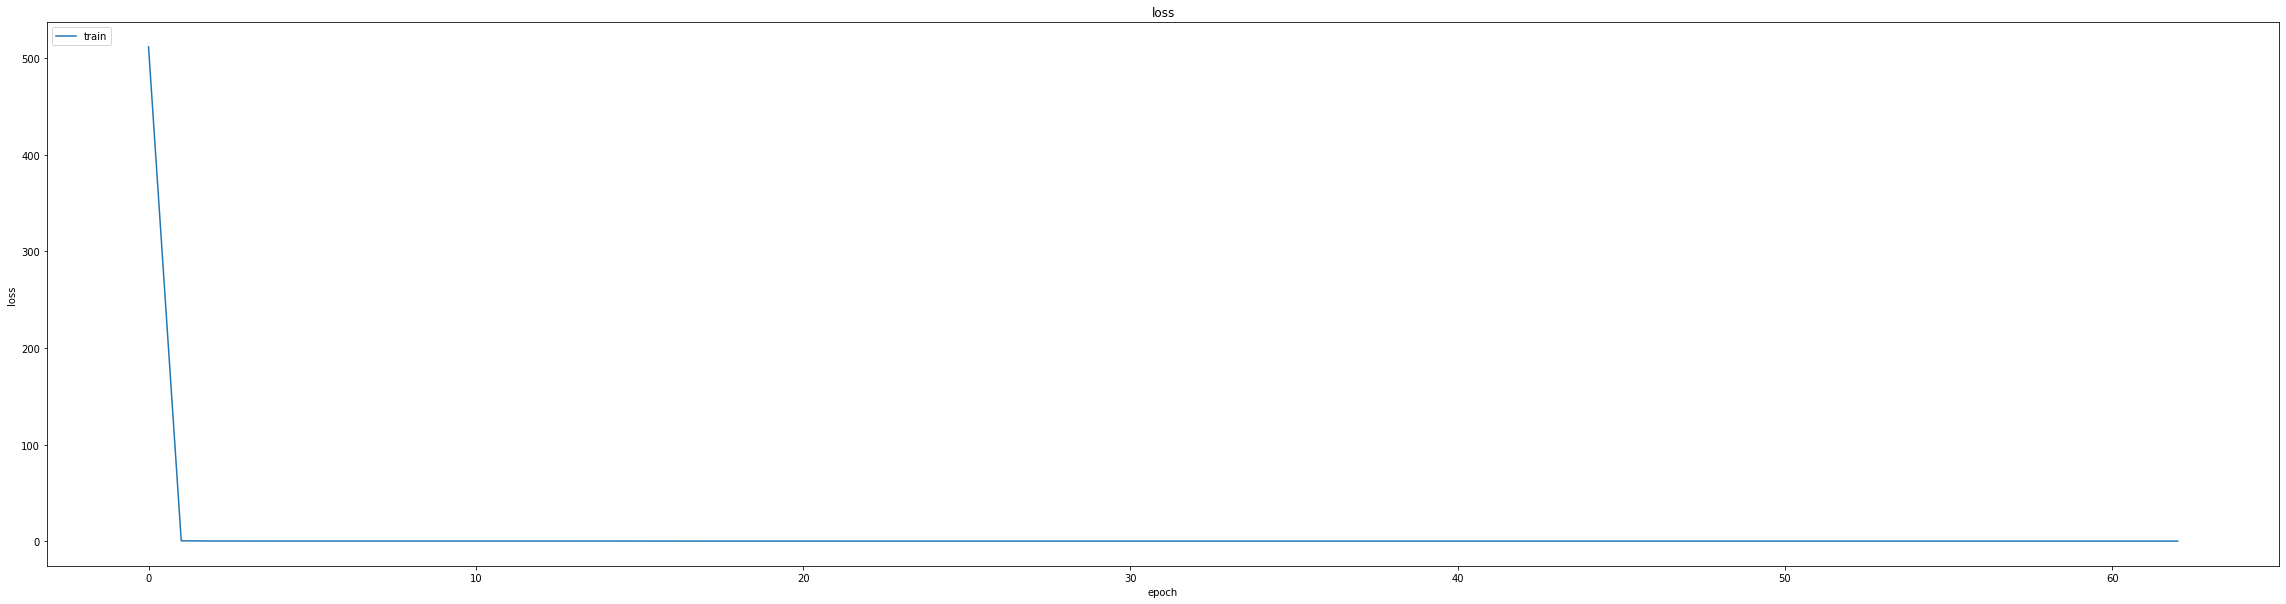

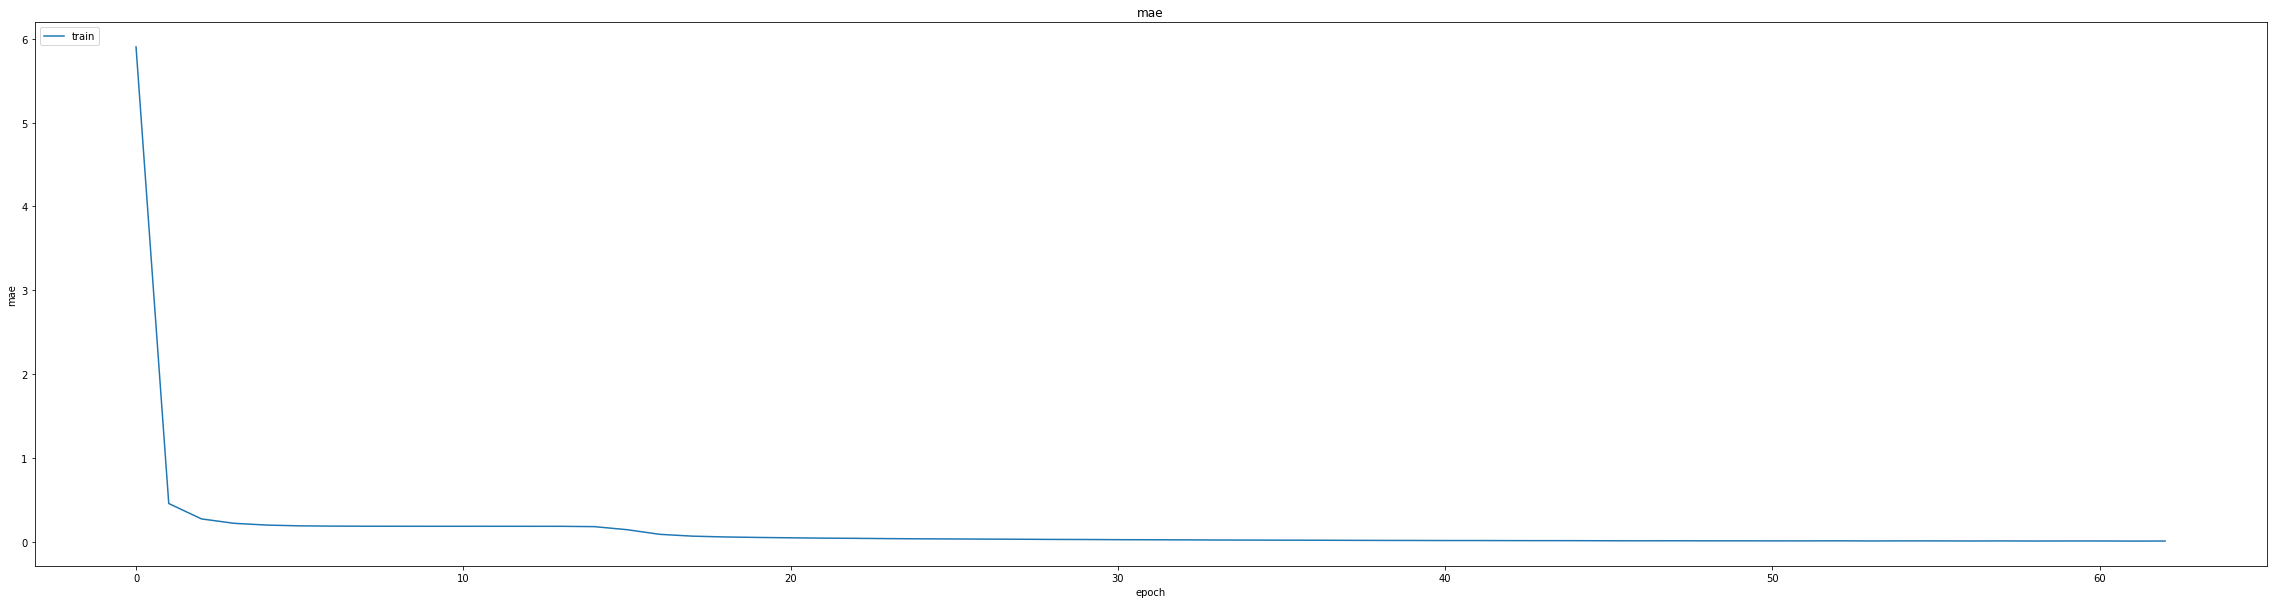

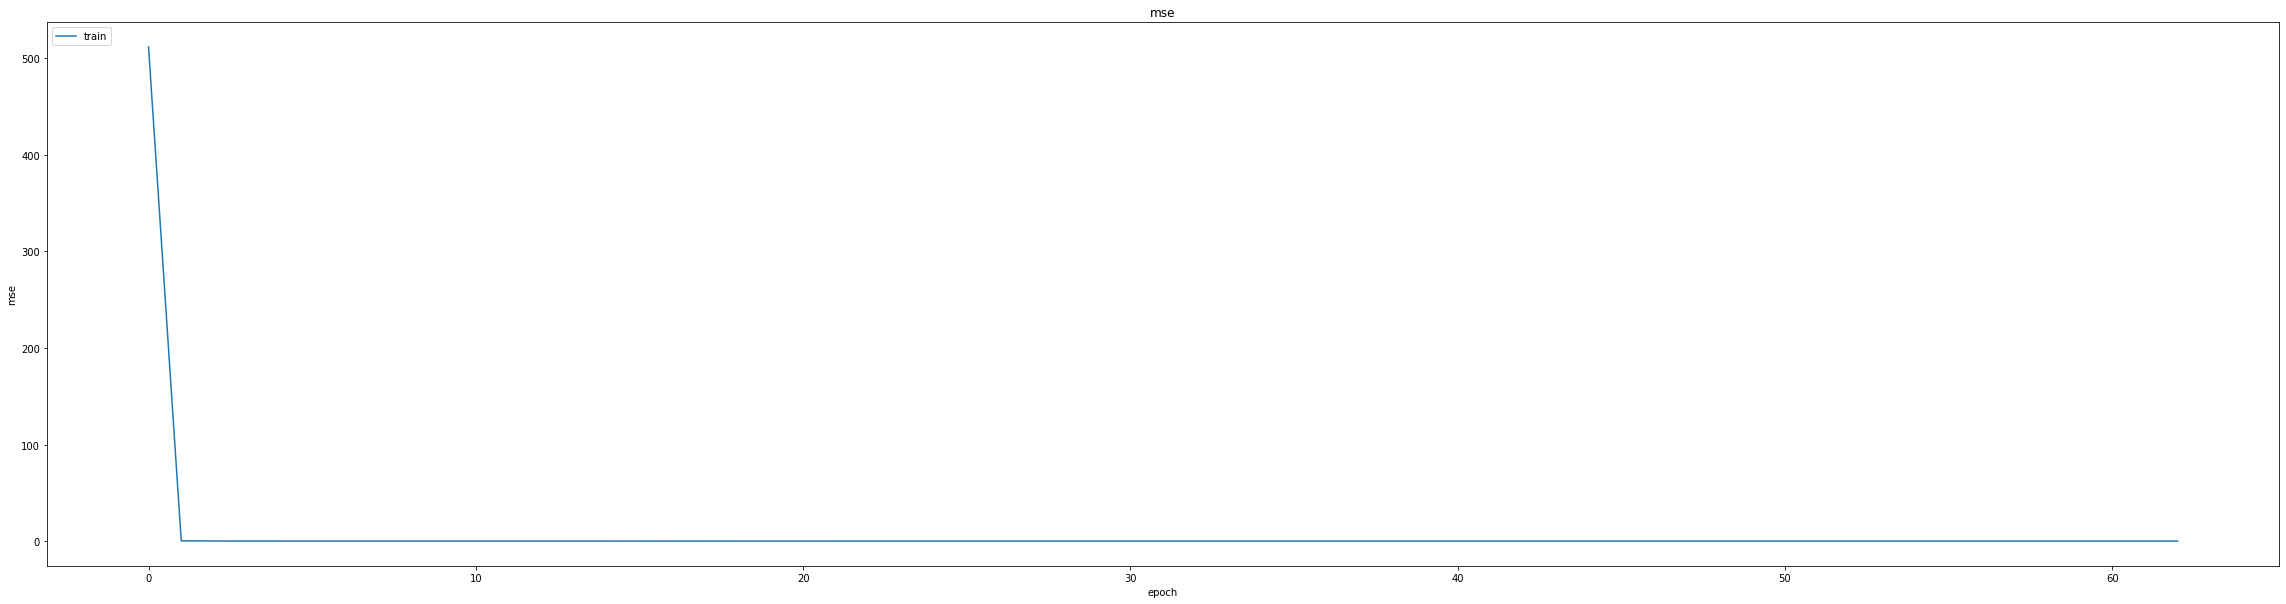

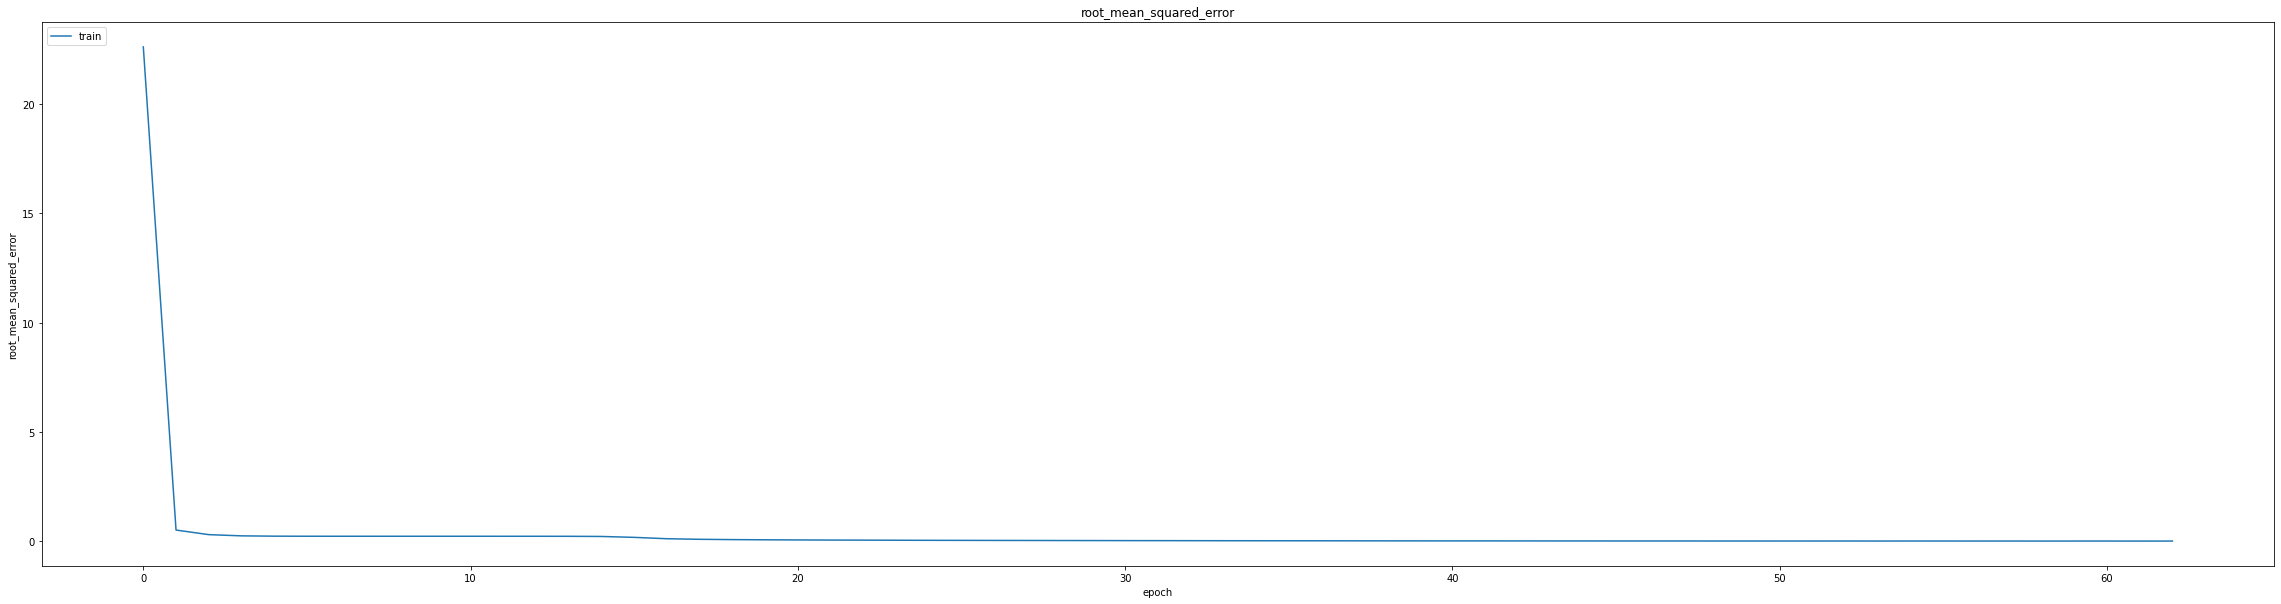

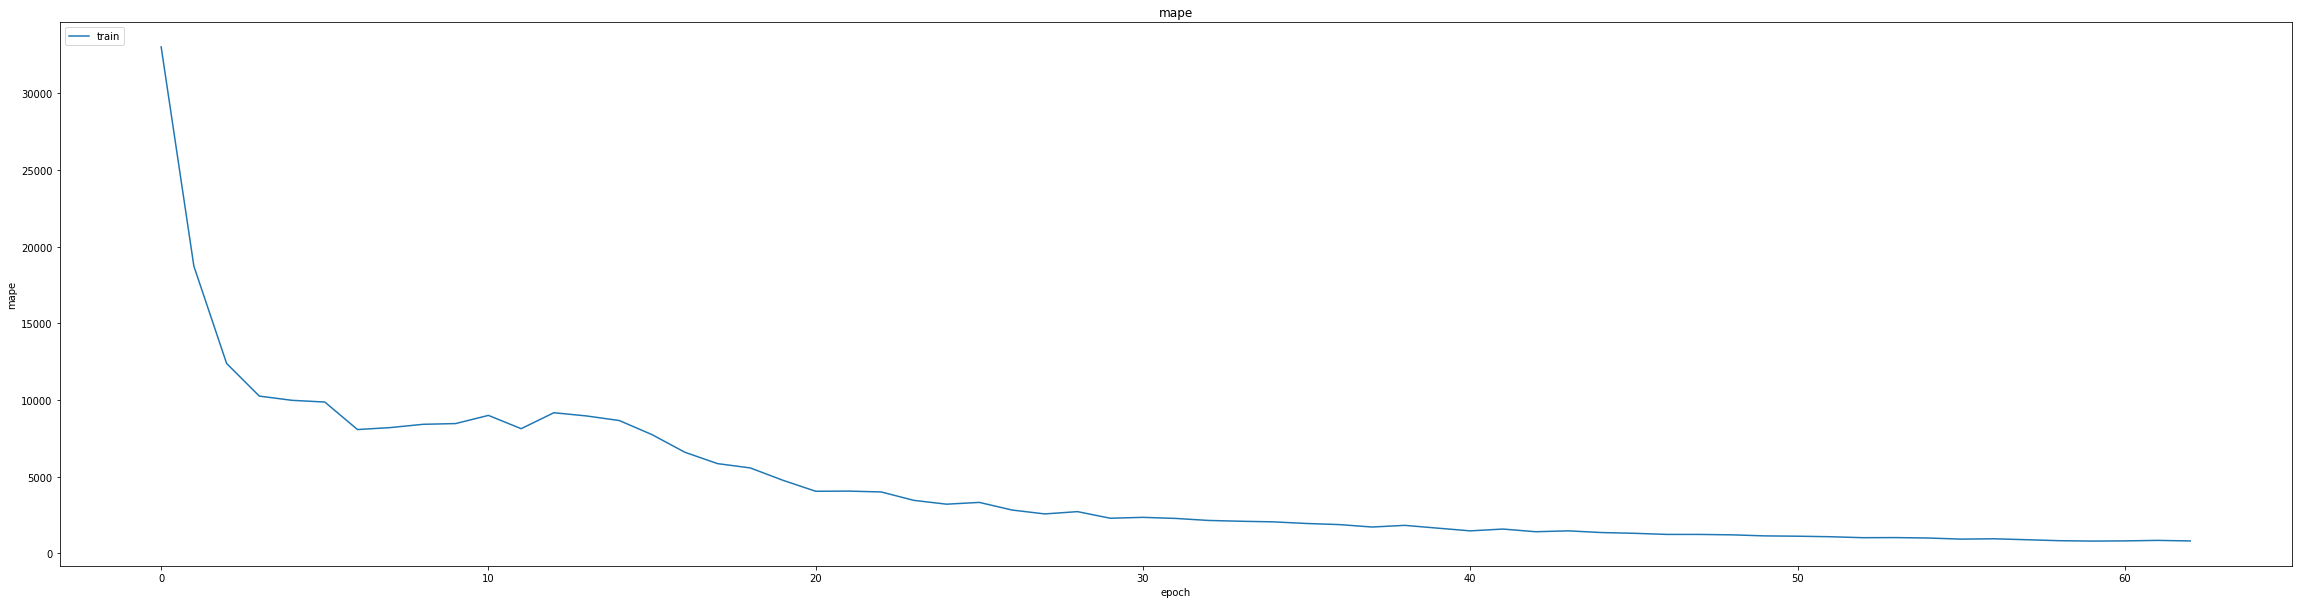

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.026004213839769363
0.03351912647485733
348/348 [==============================] - 4s 6ms/step
0.8868086670899977


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


405/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0233 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 1475.5619
Epoch 1: val_mse improved from 0.00112 to 0.00096, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 53s 109ms/step - loss: 0.0013 - mae: 0.0233 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 1473.1333 - val_loss: 9.6373e-04 - val_mae: 0.0245 - val_mse: 9.6373e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 7832.2988 - lr: 0.0010
Epoch 2/25
405/406 [============================>.] - ETA: 0s - loss: 3.4570e-04 - mae: 0.0143 - mse: 3.4570e-04 - root_mean_squared_error: 0.0186 - mape: 1622.7568
Epoch 2: val_mse did not improve from 0.00096
406/406 [==============================] - 8s 19ms/step - loss: 3.4547e-04 - mae: 0.0143 - mse: 3.4547e-04 - root_mean_squared_error: 0.0186 - mape: 1620.0745 - val_loss: 0.0017 - val_mae: 0.0347 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 7642.0537 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
405/406 [============================>.] - ETA: 0s - loss: 9.2239e-04 - mae: 0.0180 - mse: 9.2239e-04 - root_mean_squared_error: 0.0304 - mape: 1692.6244
Epoch 3: val

406/406 [==============================] - 41s 101ms/step - loss: 9.2126e-04 - mae: 0.0180 - mse: 9.2126e-04 - root_mean_squared_error: 0.0304 - mape: 1689.8279 - val_loss: 8.2108e-04 - val_mae: 0.0230 - val_mse: 8.2108e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 7590.4990 - lr: 9.0000e-04
Epoch 4/25
406/406 [==============================] - ETA: 0s - loss: 2.3828e-04 - mae: 0.0118 - mse: 2.3828e-04 - root_mean_squared_error: 0.0154 - mape: 1310.6661
Epoch 4: val_mse improved from 0.00082 to 0.00062, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)


406/406 [==============================] - 41s 101ms/step - loss: 2.3828e-04 - mae: 0.0118 - mse: 2.3828e-04 - root_mean_squared_error: 0.0154 - mape: 1310.6661 - val_loss: 6.1773e-04 - val_mae: 0.0199 - val_mse: 6.1773e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 6150.0728 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
404/406 [============================>.] - ETA: 0s - loss: 1.8682e-04 - mae: 0.0105 - mse: 1.8682e-04 - root_mean_squared_error: 0.0137 - mape: 1148.3844
Epoch 5: val_mse did not improve from 0.00062
406/406 [==============================] - 7s 18ms/step - loss: 1.8678e-04 - mae: 0.0105 - mse: 1.8678e-04 - root_mean_squared_error: 0.0137 - mape: 1143.6666 - val_loss: 0.0014 - val_mae: 0.0322 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 5503.6880 - lr: 8.1000e-04
Epoch 6/25
405/406 [============================>.] - ETA: 0s - loss: 1.5469e-04 - mae: 0.0096 - mse: 1.5469e-04 - root_mean_squared_error: 0.0124 - mape: 1175.1

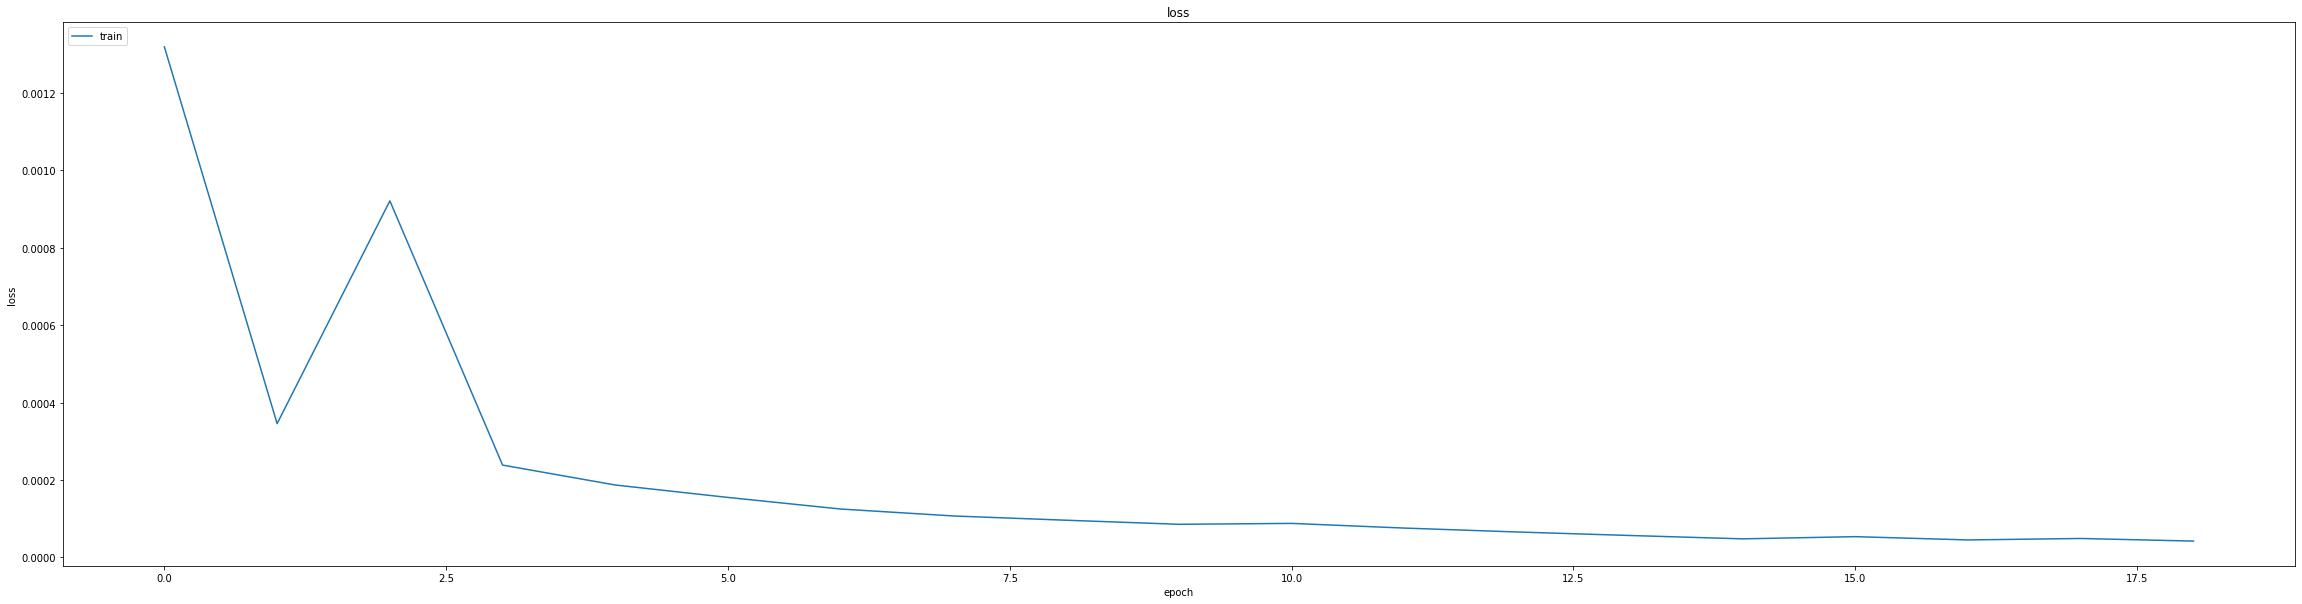

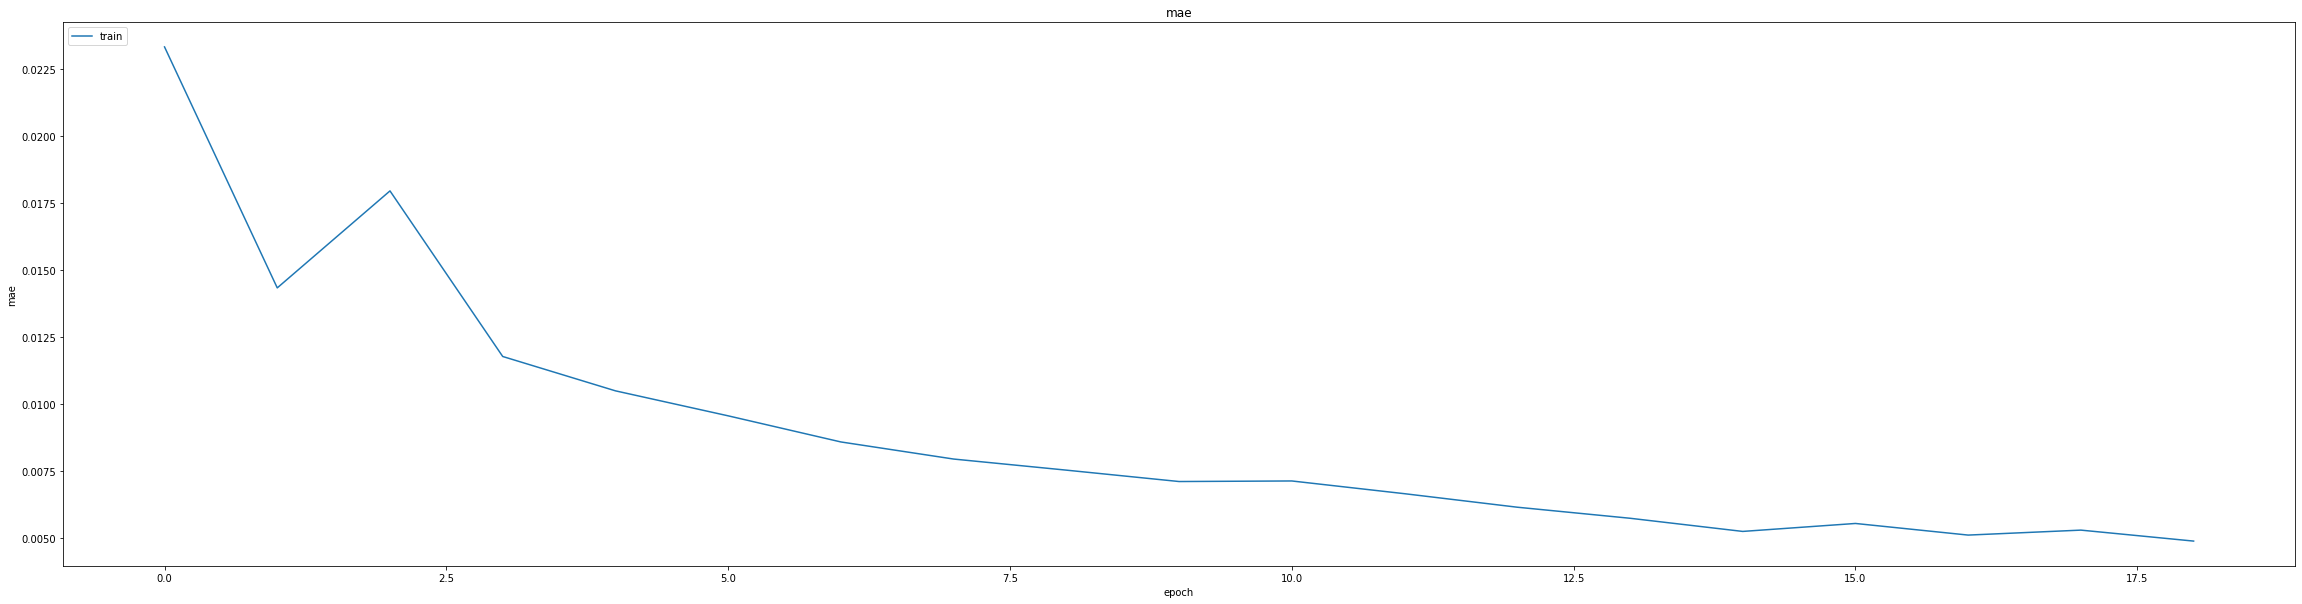

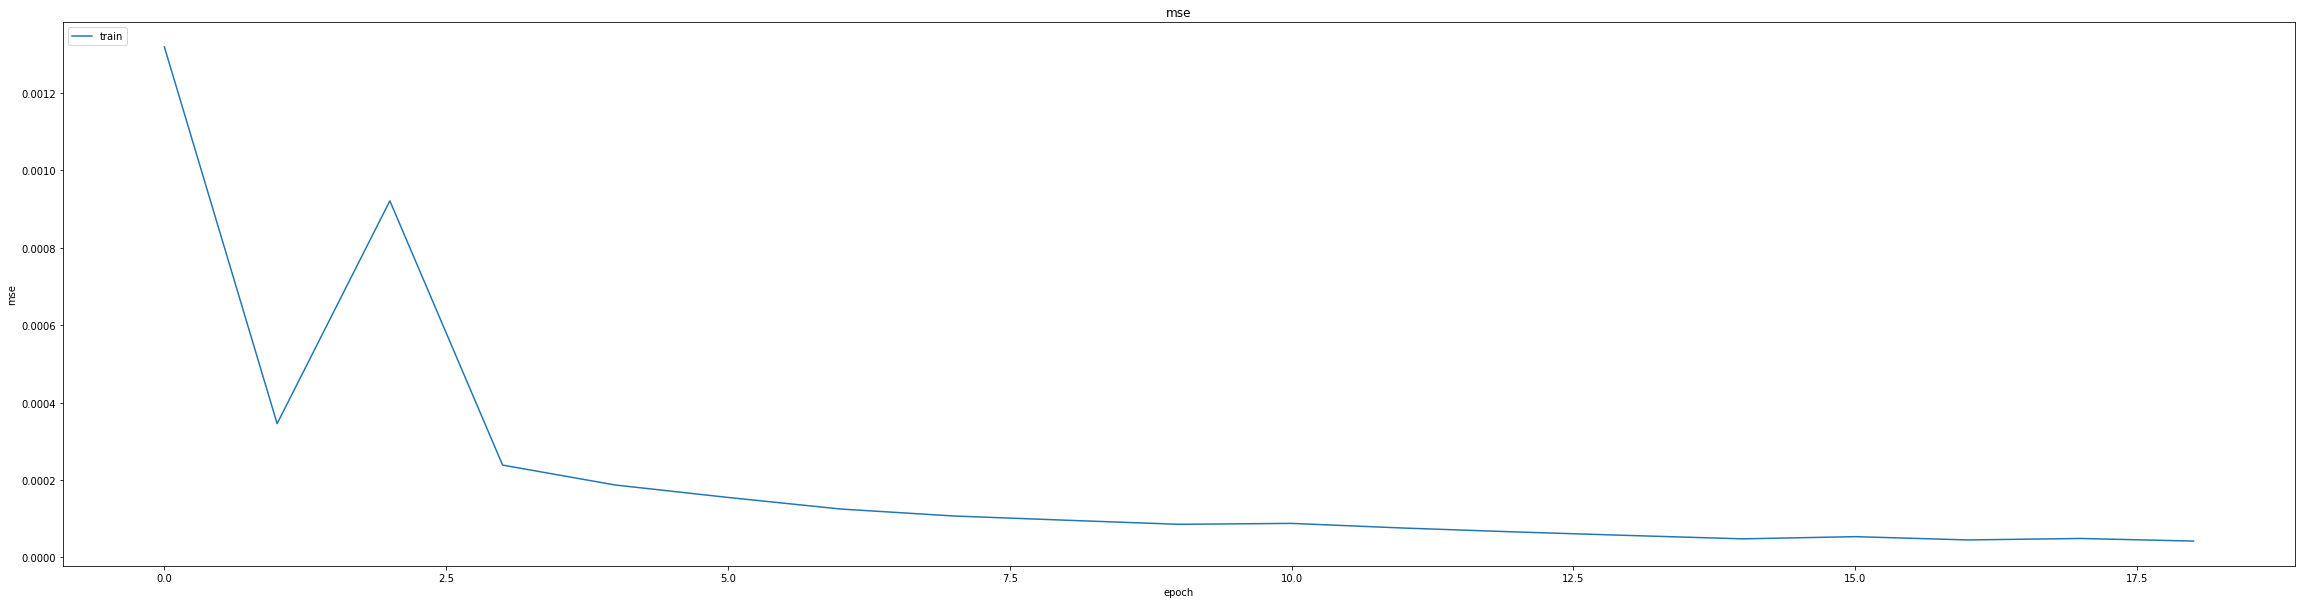

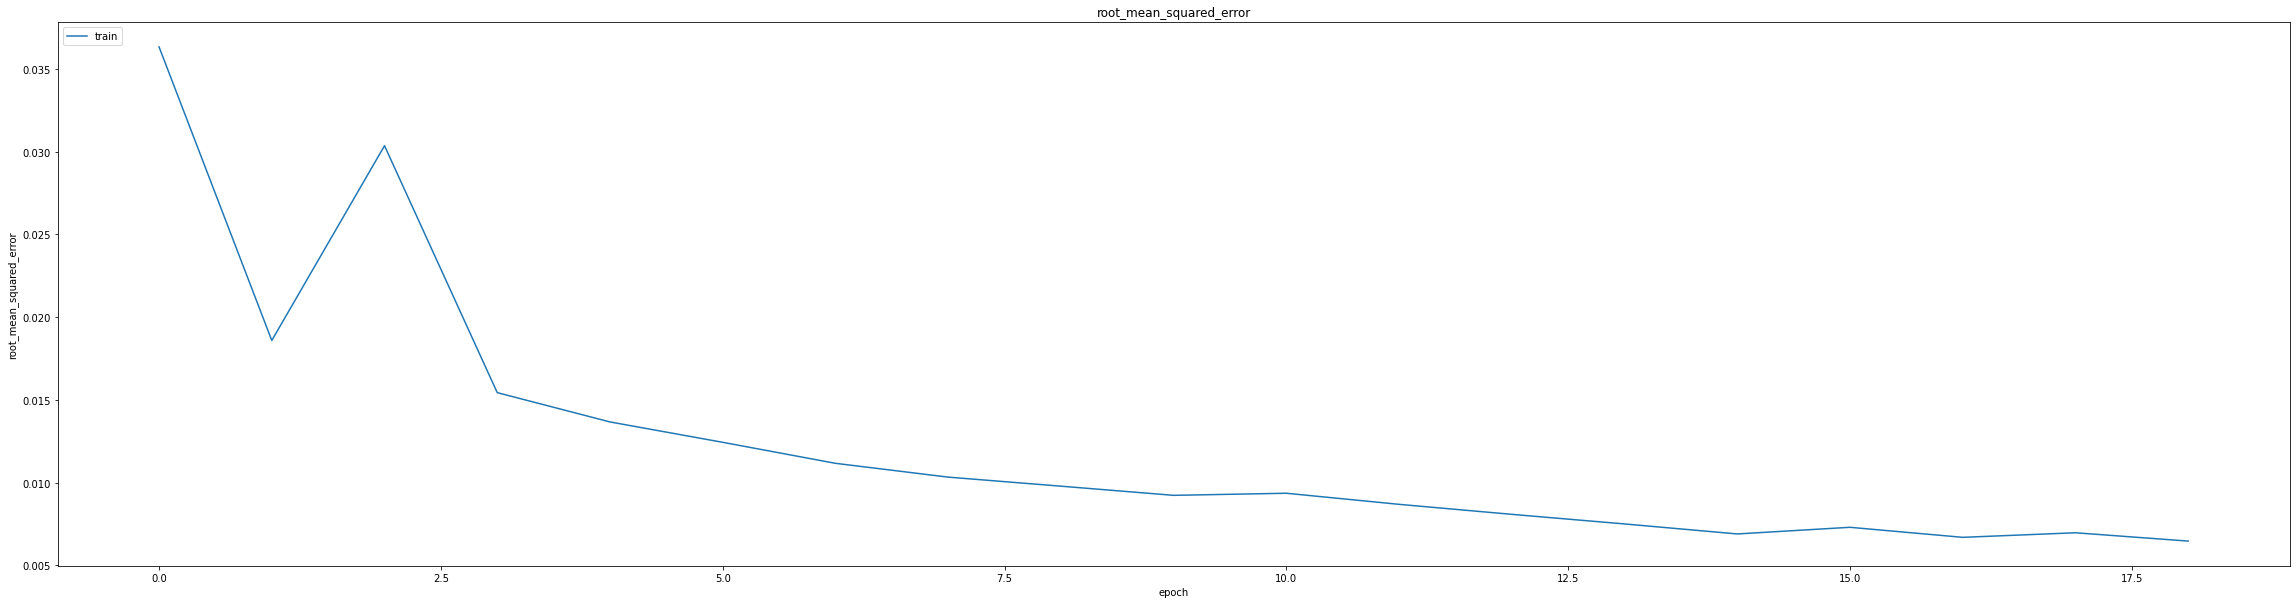

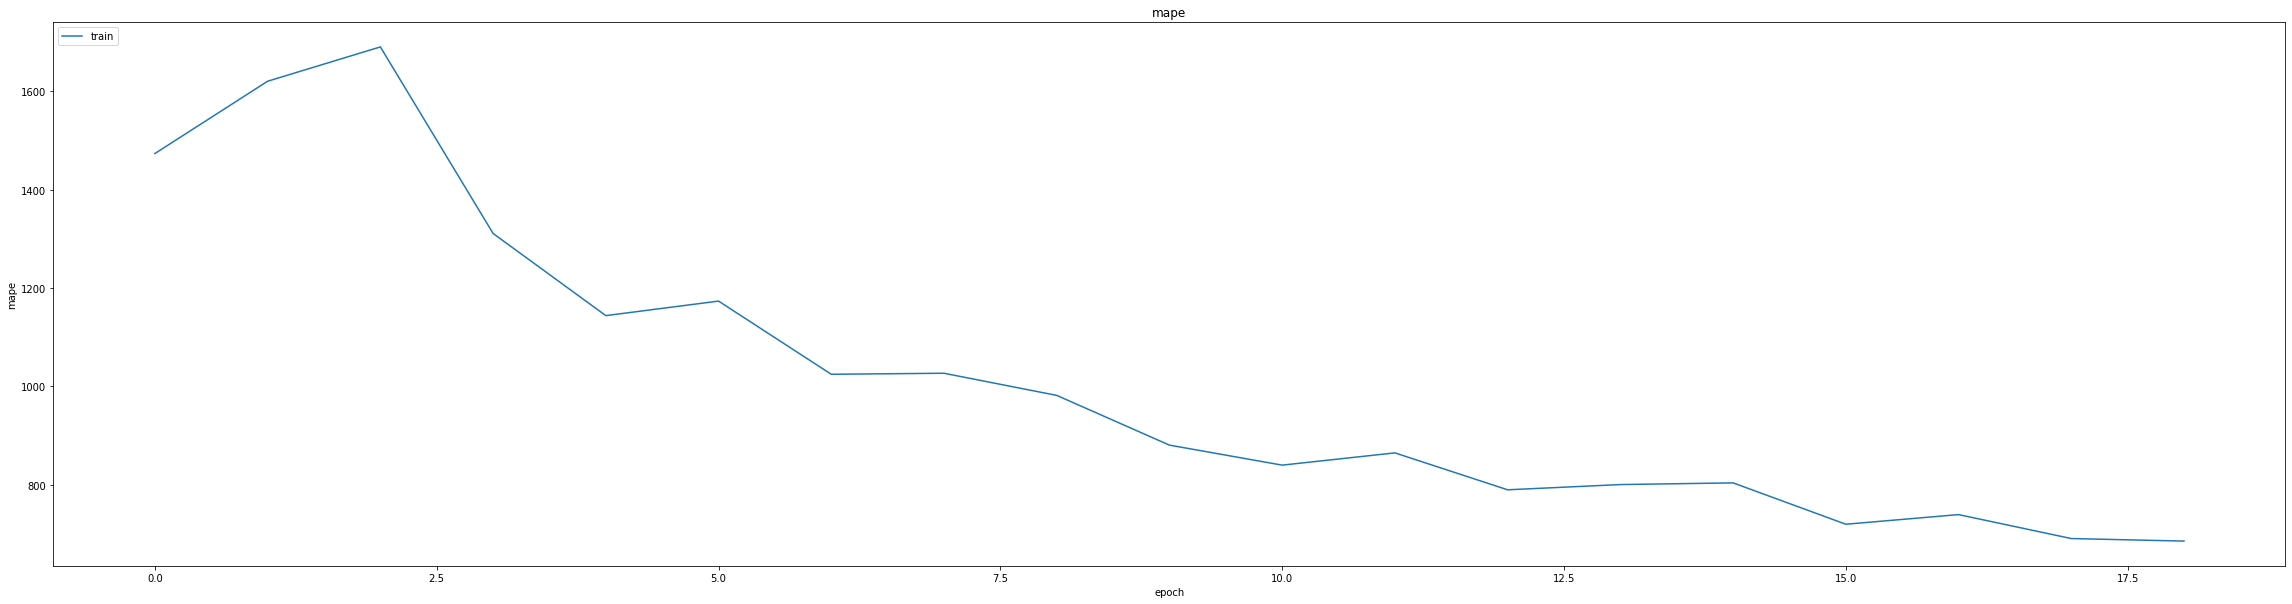

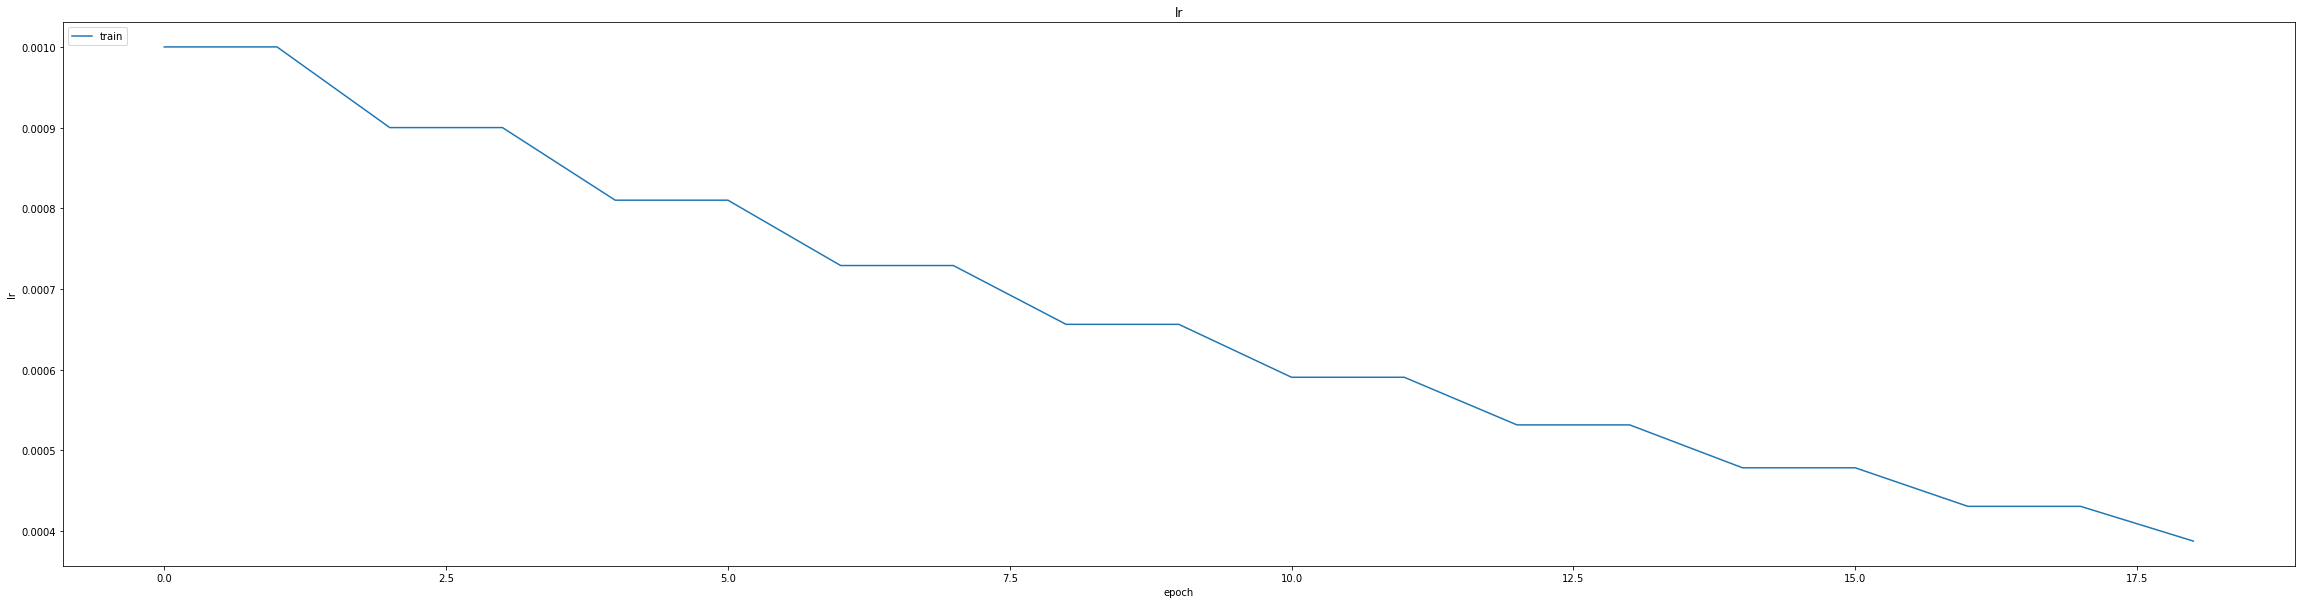

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.019872130826115608
0.02485414780676365
348/348 [==============================] - 4s 6ms/step
0.8757052263070217


348/348 [==============================] - 2s 7ms/step


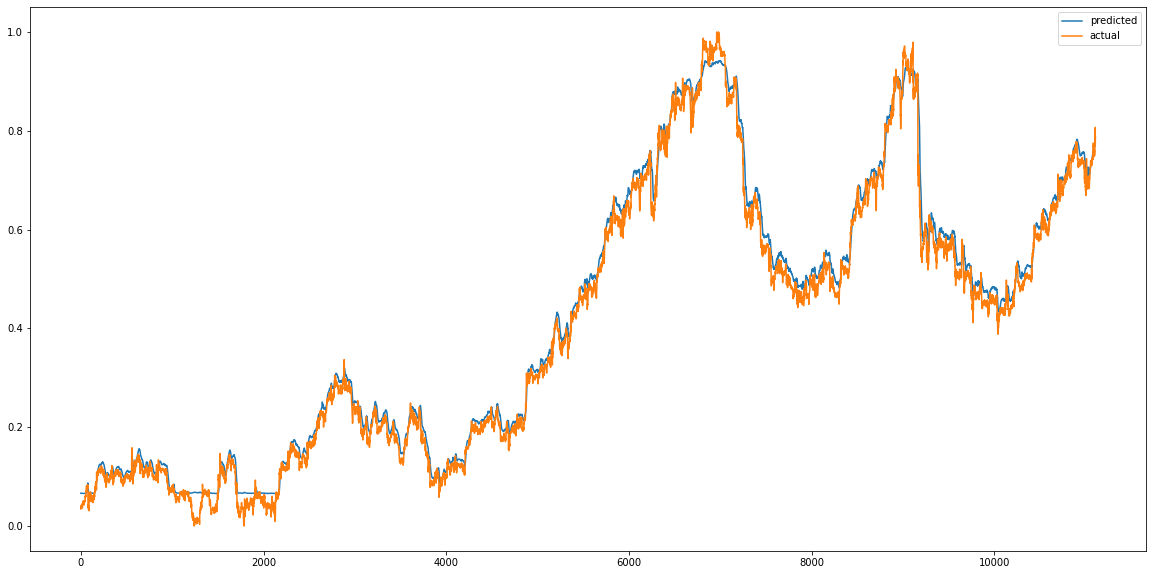

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_BiLSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


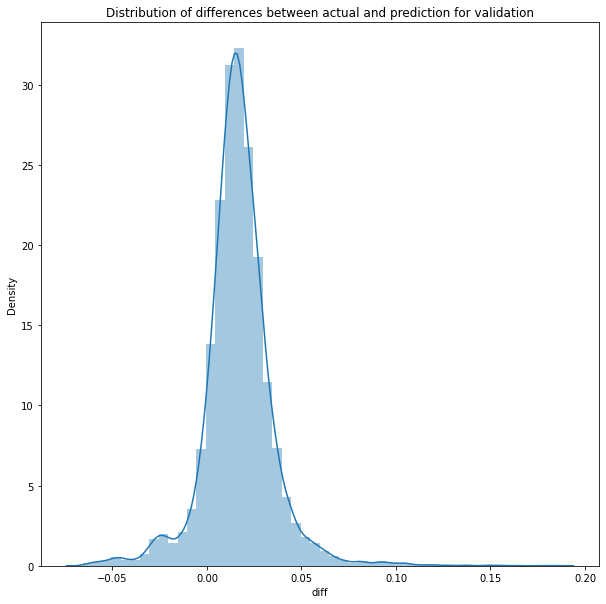

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 2s 6ms/step


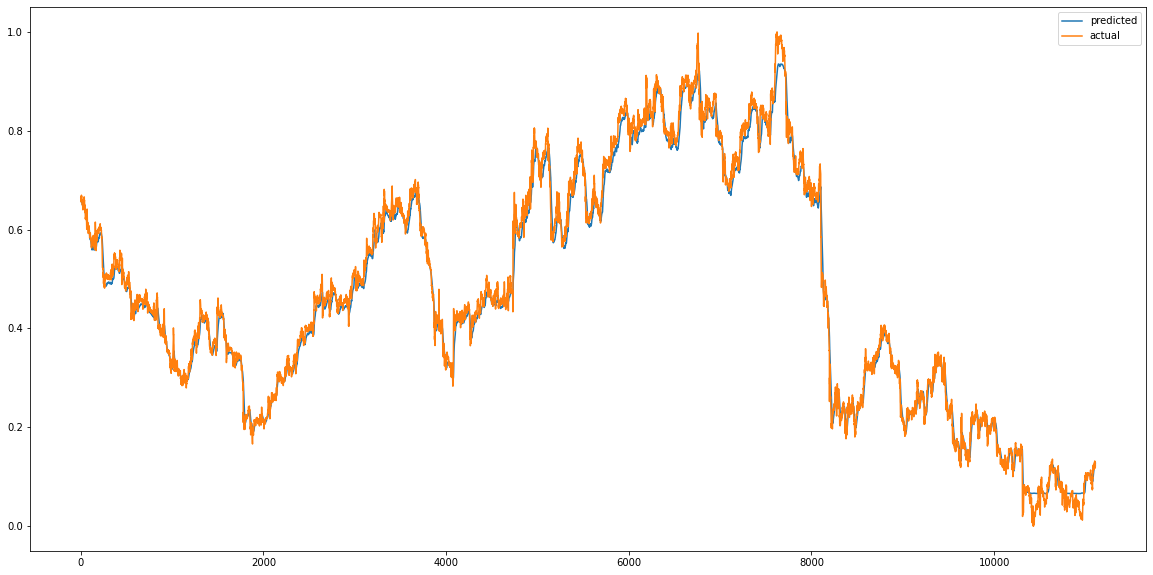

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


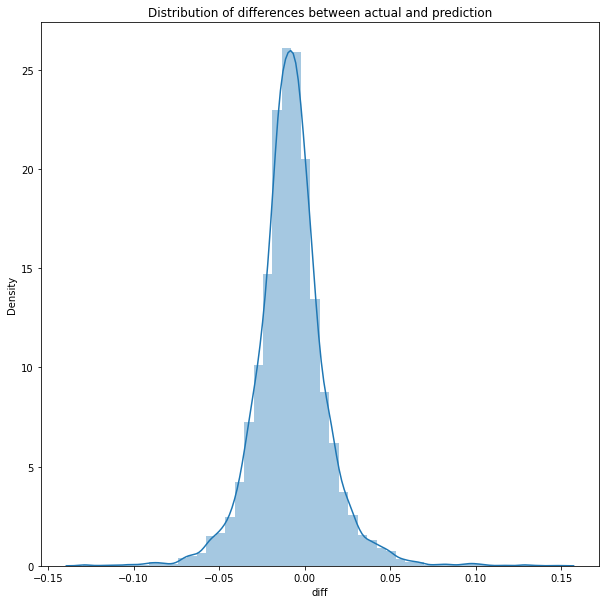

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0004856589219501178
RMSE :  0.0220376705200463
MAE :  0.016346048550640542
348/348 [==============================] - 2s 6ms/step
R2_Score  : 0.9917491317624616


count    11109.000000
mean        -0.008004
std          0.020534
min         -0.129730
25%         -0.018436
50%         -0.008280
75%          0.002204
max          0.147738
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_15 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_16 (LSTM)              (None, 16)                5184      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
402/406 [============================>.] - ETA: 0s - loss: 401.8589 - mae: 5.9917 - mse: 401.8589 - root_mean_squared_error: 20.0464 - mape: 120607.7891
Epoch 1: val_mse improved from inf to 0.99790, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 22s 43ms/step - loss: 398.2310 - mae: 5.9464 - mse: 398.2310 - root_mean_squared_error: 19.9557 - mape: 119519.3906 - val_loss: 0.9979 - val_mae: 0.9605 - val_mse: 0.9979 - val_root_mean_squared_error: 0.9990 - val_mape: 123871.5625
Epoch 2/75
402/406 [============================>.] - ETA: 0s - loss: 0.4988 - mae: 0.6422 - mse: 0.4988 - root_mean_squared_error: 0.7063 - mape: 19155.0977
Epoch 2: val_mse improved from 0.99790 to 0.23999, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.4964 - mae: 0.6403 - mse: 0.4964 - root_mean_squared_error: 0.7046 - mape: 18983.4258 - val_loss: 0.2400 - val_mae: 0.4226 - val_mse: 0.2400 - val_root_mean_squared_error: 0.4899 - val_mape: 73520.6641
Epoch 3/75
403/406 [============================>.] - ETA: 0s - loss: 0.1445 - mae: 0.3338 - mse: 0.1445 - root_mean_squared_error: 0.3802 - mape: 14172.9873
Epoch 3: val_mse improved from 0.23999 to 0.11880, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 38ms/step - loss: 0.1442 - mae: 0.3335 - mse: 0.1442 - root_mean_squared_error: 0.3798 - mape: 14080.4287 - val_loss: 0.1188 - val_mae: 0.2891 - val_mse: 0.1188 - val_root_mean_squared_error: 0.3447 - val_mape: 55630.7500
Epoch 4/75
402/406 [============================>.] - ETA: 0s - loss: 0.0772 - mae: 0.2466 - mse: 0.0772 - root_mean_squared_error: 0.2779 - mape: 11508.1318
Epoch 4: val_mse improved from 0.11880 to 0.08816, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 0.0771 - mae: 0.2464 - mse: 0.0771 - root_mean_squared_error: 0.2778 - mape: 11405.0410 - val_loss: 0.0882 - val_mae: 0.2521 - val_mse: 0.0882 - val_root_mean_squared_error: 0.2969 - val_mape: 47011.3359
Epoch 5/75
402/406 [============================>.] - ETA: 0s - loss: 0.0597 - mae: 0.2112 - mse: 0.0597 - root_mean_squared_error: 0.2444 - mape: 11267.2490
Epoch 5: val_mse improved from 0.08816 to 0.07920, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0597 - mae: 0.2111 - mse: 0.0597 - root_mean_squared_error: 0.2443 - mape: 11166.0566 - val_loss: 0.0792 - val_mae: 0.2425 - val_mse: 0.0792 - val_root_mean_squared_error: 0.2814 - val_mape: 42420.2812
Epoch 6/75
406/406 [==============================] - ETA: 0s - loss: 0.0546 - mae: 0.1947 - mse: 0.0546 - root_mean_squared_error: 0.2337 - mape: 9430.9775
Epoch 6: val_mse improved from 0.07920 to 0.07651, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0546 - mae: 0.1947 - mse: 0.0546 - root_mean_squared_error: 0.2337 - mape: 9430.9775 - val_loss: 0.0765 - val_mae: 0.2414 - val_mse: 0.0765 - val_root_mean_squared_error: 0.2766 - val_mape: 39951.5352
Epoch 7/75
405/406 [============================>.] - ETA: 0s - loss: 0.0536 - mae: 0.1881 - mse: 0.0536 - root_mean_squared_error: 0.2315 - mape: 8983.4980
Epoch 7: val_mse improved from 0.07651 to 0.07568, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0536 - mae: 0.1881 - mse: 0.0536 - root_mean_squared_error: 0.2315 - mape: 8968.7588 - val_loss: 0.0757 - val_mae: 0.2416 - val_mse: 0.0757 - val_root_mean_squared_error: 0.2751 - val_mape: 38640.8125
Epoch 8/75
405/406 [============================>.] - ETA: 0s - loss: 0.0532 - mae: 0.1847 - mse: 0.0532 - root_mean_squared_error: 0.2306 - mape: 7763.3037
Epoch 8: val_mse improved from 0.07568 to 0.07546, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0532 - mae: 0.1847 - mse: 0.0532 - root_mean_squared_error: 0.2306 - mape: 7750.5625 - val_loss: 0.0755 - val_mae: 0.2417 - val_mse: 0.0755 - val_root_mean_squared_error: 0.2747 - val_mape: 38110.0625
Epoch 9/75
401/406 [============================>.] - ETA: 0s - loss: 0.0532 - mae: 0.1839 - mse: 0.0532 - root_mean_squared_error: 0.2307 - mape: 8675.9092
Epoch 9: val_mse improved from 0.07546 to 0.07539, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0532 - mae: 0.1839 - mse: 0.0532 - root_mean_squared_error: 0.2307 - mape: 8576.7910 - val_loss: 0.0754 - val_mae: 0.2418 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2746 - val_mape: 37871.3477
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 0.0531 - mae: 0.1831 - mse: 0.0531 - root_mean_squared_error: 0.2305 - mape: 9230.1377
Epoch 10: val_mse improved from 0.07539 to 0.07538, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0532 - mae: 0.1831 - mse: 0.0532 - root_mean_squared_error: 0.2306 - mape: 9215.0049 - val_loss: 0.0754 - val_mae: 0.2418 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2746 - val_mape: 37836.5820
Epoch 11/75
406/406 [==============================] - ETA: 0s - loss: 0.0533 - mae: 0.1834 - mse: 0.0533 - root_mean_squared_error: 0.2309 - mape: 7596.2280
Epoch 11: val_mse improved from 0.07538 to 0.07536, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0533 - mae: 0.1834 - mse: 0.0533 - root_mean_squared_error: 0.2309 - mape: 7596.2280 - val_loss: 0.0754 - val_mae: 0.2418 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2745 - val_mape: 37773.3086
Epoch 12/75
405/406 [============================>.] - ETA: 0s - loss: 0.0532 - mae: 0.1833 - mse: 0.0532 - root_mean_squared_error: 0.2307 - mape: 8210.1104
Epoch 12: val_mse did not improve from 0.07536
406/406 [==============================] - 6s 14ms/step - loss: 0.0532 - mae: 0.1833 - mse: 0.0532 - root_mean_squared_error: 0.2307 - mape: 8196.6104 - val_loss: 0.0754 - val_mae: 0.2418 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2746 - val_mape: 37867.5859
Epoch 13/75
403/406 [============================>.] - ETA: 0s - loss: 0.0531 - mae: 0.1833 - mse: 0.0531 - root_mean_squared_error: 0.2305 - mape: 9581.6270
Epoch 13: val_mse did not improve from 0.07536
406/406 [==============================] - 5s 11ms/step

406/406 [==============================] - 16s 40ms/step - loss: 0.0532 - mae: 0.1834 - mse: 0.0532 - root_mean_squared_error: 0.2307 - mape: 8347.1543 - val_loss: 0.0754 - val_mae: 0.2418 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2745 - val_mape: 37777.2773
Epoch 16/75
406/406 [==============================] - ETA: 0s - loss: 0.0531 - mae: 0.1830 - mse: 0.0531 - root_mean_squared_error: 0.2304 - mape: 8405.0352
Epoch 16: val_mse did not improve from 0.07536
406/406 [==============================] - 5s 11ms/step - loss: 0.0531 - mae: 0.1830 - mse: 0.0531 - root_mean_squared_error: 0.2304 - mape: 8405.0352 - val_loss: 0.0754 - val_mae: 0.2418 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2746 - val_mape: 37893.2695
Epoch 17/75
402/406 [============================>.] - ETA: 0s - loss: 0.0531 - mae: 0.1831 - mse: 0.0531 - root_mean_squared_error: 0.2304 - mape: 8175.4243
Epoch 17: val_mse did not improve from 0.07536
406/406 [==============================] - 5s 11ms/step

406/406 [==============================] - 16s 39ms/step - loss: 0.0528 - mae: 0.1829 - mse: 0.0528 - root_mean_squared_error: 0.2297 - mape: 9190.3428 - val_loss: 0.0753 - val_mae: 0.2415 - val_mse: 0.0753 - val_root_mean_squared_error: 0.2744 - val_mape: 38123.0703
Epoch 25/75
402/406 [============================>.] - ETA: 0s - loss: 0.0513 - mae: 0.1803 - mse: 0.0513 - root_mean_squared_error: 0.2265 - mape: 9001.1533
Epoch 25: val_mse improved from 0.07530 to 0.07188, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0513 - mae: 0.1803 - mse: 0.0513 - root_mean_squared_error: 0.2265 - mape: 8920.3330 - val_loss: 0.0719 - val_mae: 0.2359 - val_mse: 0.0719 - val_root_mean_squared_error: 0.2681 - val_mape: 38086.4844
Epoch 26/75
405/406 [============================>.] - ETA: 0s - loss: 0.0409 - mae: 0.1589 - mse: 0.0409 - root_mean_squared_error: 0.2021 - mape: 7880.6074
Epoch 26: val_mse did not improve from 0.07188
406/406 [==============================] - 5s 11ms/step - loss: 0.0409 - mae: 0.1589 - mse: 0.0409 - root_mean_squared_error: 0.2022 - mape: 7867.6465 - val_loss: 0.0752 - val_mae: 0.2423 - val_mse: 0.0752 - val_root_mean_squared_error: 0.2742 - val_mape: 36110.1250
Epoch 27/75
406/406 [==============================] - ETA: 0s - loss: 0.0316 - mae: 0.1353 - mse: 0.0316 - root_mean_squared_error: 0.1778 - mape: 7185.7451
Epoch 27: val_mse improved from 0.07188 to 0.01893, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 16s 39ms/step - loss: 0.0316 - mae: 0.1353 - mse: 0.0316 - root_mean_squared_error: 0.1778 - mape: 7185.7451 - val_loss: 0.0189 - val_mae: 0.1245 - val_mse: 0.0189 - val_root_mean_squared_error: 0.1376 - val_mape: 24177.0215
Epoch 28/75
401/406 [============================>.] - ETA: 0s - loss: 0.0076 - mae: 0.0677 - mse: 0.0076 - root_mean_squared_error: 0.0873 - mape: 5238.3047
Epoch 28: val_mse improved from 0.01893 to 0.00758, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 41ms/step - loss: 0.0076 - mae: 0.0677 - mse: 0.0076 - root_mean_squared_error: 0.0873 - mape: 5178.2676 - val_loss: 0.0076 - val_mae: 0.0705 - val_mse: 0.0076 - val_root_mean_squared_error: 0.0871 - val_mape: 19880.2207
Epoch 29/75
405/406 [============================>.] - ETA: 0s - loss: 0.0051 - mae: 0.0551 - mse: 0.0051 - root_mean_squared_error: 0.0713 - mape: 3783.7534
Epoch 29: val_mse improved from 0.00758 to 0.00698, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0051 - mae: 0.0551 - mse: 0.0051 - root_mean_squared_error: 0.0713 - mape: 3777.5132 - val_loss: 0.0070 - val_mae: 0.0746 - val_mse: 0.0070 - val_root_mean_squared_error: 0.0836 - val_mape: 16370.0859
Epoch 30/75
403/406 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0471 - mse: 0.0037 - root_mean_squared_error: 0.0610 - mape: 3878.0898
Epoch 30: val_mse improved from 0.00698 to 0.00337, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 0.0037 - mae: 0.0471 - mse: 0.0037 - root_mean_squared_error: 0.0610 - mape: 3852.6389 - val_loss: 0.0034 - val_mae: 0.0452 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0581 - val_mape: 14577.1953
Epoch 31/75
403/406 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0409 - mse: 0.0028 - root_mean_squared_error: 0.0530 - mape: 2721.6458
Epoch 31: val_mse did not improve from 0.00337
406/406 [==============================] - 5s 11ms/step - loss: 0.0028 - mae: 0.0409 - mse: 0.0028 - root_mean_squared_error: 0.0530 - mape: 2703.8074 - val_loss: 0.0042 - val_mae: 0.0538 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0646 - val_mape: 13052.9492
Epoch 32/75
406/406 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0361 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 2539.0828
Epoch 32: val_mse improved from 0.00337 to 0.00239, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 16s 39ms/step - loss: 0.0022 - mae: 0.0361 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 2539.0828 - val_loss: 0.0024 - val_mae: 0.0411 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mape: 11933.1855
Epoch 33/75
404/406 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0313 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 2673.8562
Epoch 33: val_mse improved from 0.00239 to 0.00141, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 39ms/step - loss: 0.0017 - mae: 0.0313 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 2662.8843 - val_loss: 0.0014 - val_mae: 0.0279 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 10900.6514
Epoch 34/75
404/406 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 2423.4651
Epoch 34: val_mse did not improve from 0.00141
406/406 [==============================] - 5s 12ms/step - loss: 0.0013 - mae: 0.0277 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 2413.5117 - val_loss: 0.0015 - val_mae: 0.0297 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0384 - val_mape: 10021.2539
Epoch 35/75
404/406 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0258 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 2061.1958
Epoch 35: val_mse improved from 0.00141 to 0.00129, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 15s 38ms/step - loss: 0.0011 - mae: 0.0258 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 2052.7397 - val_loss: 0.0013 - val_mae: 0.0278 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 9587.7939
Epoch 36/75
404/406 [============================>.] - ETA: 0s - loss: 9.5198e-04 - mae: 0.0235 - mse: 9.5198e-04 - root_mean_squared_error: 0.0309 - mape: 2419.6589
Epoch 36: val_mse improved from 0.00129 to 0.00109, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 9.5138e-04 - mae: 0.0235 - mse: 9.5138e-04 - root_mean_squared_error: 0.0308 - mape: 2409.7209 - val_loss: 0.0011 - val_mae: 0.0245 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 9000.2324
Epoch 37/75
404/406 [============================>.] - ETA: 0s - loss: 7.7665e-04 - mae: 0.0212 - mse: 7.7665e-04 - root_mean_squared_error: 0.0279 - mape: 2007.3408
Epoch 37: val_mse improved from 0.00109 to 0.00099, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 16s 40ms/step - loss: 7.7631e-04 - mae: 0.0212 - mse: 7.7631e-04 - root_mean_squared_error: 0.0279 - mape: 1999.1548 - val_loss: 9.8837e-04 - val_mae: 0.0240 - val_mse: 9.8837e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 7940.2070
Epoch 38/75
404/406 [============================>.] - ETA: 0s - loss: 6.7975e-04 - mae: 0.0200 - mse: 6.7975e-04 - root_mean_squared_error: 0.0261 - mape: 1906.7350
Epoch 38: val_mse improved from 0.00099 to 0.00087, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 17s 42ms/step - loss: 6.7966e-04 - mae: 0.0200 - mse: 6.7966e-04 - root_mean_squared_error: 0.0261 - mape: 1898.9042 - val_loss: 8.7128e-04 - val_mae: 0.0224 - val_mse: 8.7128e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 7616.7812
Epoch 39/75
404/406 [============================>.] - ETA: 0s - loss: 6.0060e-04 - mae: 0.0187 - mse: 6.0060e-04 - root_mean_squared_error: 0.0245 - mape: 1734.8060
Epoch 39: val_mse did not improve from 0.00087
406/406 [==============================] - 5s 11ms/step - loss: 6.0013e-04 - mae: 0.0187 - mse: 6.0013e-04 - root_mean_squared_error: 0.0245 - mape: 1727.6802 - val_loss: 9.1449e-04 - val_mae: 0.0234 - val_mse: 9.1449e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 7083.6719
Epoch 40/75
402/406 [============================>.] - ETA: 0s - loss: 5.5846e-04 - mae: 0.0181 - mse: 5.5846e-04 - root_mean_squared_error: 0.0236 - mape: 1499.0033
Epoch 40: val_mse improved from 0.00087 to 0.00076, savi

406/406 [==============================] - 15s 37ms/step - loss: 5.5804e-04 - mae: 0.0180 - mse: 5.5804e-04 - root_mean_squared_error: 0.0236 - mape: 1485.4912 - val_loss: 7.6205e-04 - val_mae: 0.0198 - val_mse: 7.6205e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 7096.8672
Epoch 41/75
405/406 [============================>.] - ETA: 0s - loss: 5.1569e-04 - mae: 0.0173 - mse: 5.1569e-04 - root_mean_squared_error: 0.0227 - mape: 1685.9579
Epoch 41: val_mse did not improve from 0.00076
406/406 [==============================] - 5s 12ms/step - loss: 5.1566e-04 - mae: 0.0173 - mse: 5.1566e-04 - root_mean_squared_error: 0.0227 - mape: 1683.1755 - val_loss: 8.1196e-04 - val_mae: 0.0206 - val_mse: 8.1196e-04 - val_root_mean_squared_error: 0.0285 - val_mape: 6861.1055
Epoch 42/75
406/406 [==============================] - ETA: 0s - loss: 4.7860e-04 - mae: 0.0167 - mse: 4.7860e-04 - root_mean_squared_error: 0.0219 - mape: 1515.9695
Epoch 42: val_mse did not improve from 0.00076
406/406 [

406/406 [==============================] - 16s 40ms/step - loss: 4.5137e-04 - mae: 0.0162 - mse: 4.5137e-04 - root_mean_squared_error: 0.0212 - mape: 1381.4154 - val_loss: 6.8607e-04 - val_mae: 0.0192 - val_mse: 6.8607e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 6414.3354
Epoch 45/75
402/406 [============================>.] - ETA: 0s - loss: 4.2269e-04 - mae: 0.0157 - mse: 4.2269e-04 - root_mean_squared_error: 0.0206 - mape: 1716.3977
Epoch 45: val_mse did not improve from 0.00069
406/406 [==============================] - 5s 12ms/step - loss: 4.2170e-04 - mae: 0.0156 - mse: 4.2170e-04 - root_mean_squared_error: 0.0205 - mape: 1700.9083 - val_loss: 7.2120e-04 - val_mae: 0.0192 - val_mse: 7.2120e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 6345.8037
Epoch 46/75
402/406 [============================>.] - ETA: 0s - loss: 3.8455e-04 - mae: 0.0150 - mse: 3.8455e-04 - root_mean_squared_error: 0.0196 - mape: 1446.1144
Epoch 46: val_mse improved from 0.00069 to 0.00064, savi

406/406 [==============================] - 16s 40ms/step - loss: 3.8381e-04 - mae: 0.0150 - mse: 3.8381e-04 - root_mean_squared_error: 0.0196 - mape: 1433.0686 - val_loss: 6.4366e-04 - val_mae: 0.0180 - val_mse: 6.4366e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 5813.7593
Epoch 47/75
404/406 [============================>.] - ETA: 0s - loss: 3.6293e-04 - mae: 0.0145 - mse: 3.6293e-04 - root_mean_squared_error: 0.0191 - mape: 1255.7987
Epoch 47: val_mse improved from 0.00064 to 0.00059, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)


406/406 [==============================] - 19s 46ms/step - loss: 3.6308e-04 - mae: 0.0145 - mse: 3.6308e-04 - root_mean_squared_error: 0.0191 - mape: 1250.6417 - val_loss: 5.9478e-04 - val_mae: 0.0169 - val_mse: 5.9478e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 5709.0522
Epoch 48/75
406/406 [==============================] - ETA: 0s - loss: 3.4154e-04 - mae: 0.0141 - mse: 3.4154e-04 - root_mean_squared_error: 0.0185 - mape: 1316.2461
Epoch 48: val_mse did not improve from 0.00059
406/406 [==============================] - 5s 12ms/step - loss: 3.4154e-04 - mae: 0.0141 - mse: 3.4154e-04 - root_mean_squared_error: 0.0185 - mape: 1316.2461 - val_loss: 7.2647e-04 - val_mae: 0.0202 - val_mse: 7.2647e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 5437.2085
Epoch 49/75
406/406 [==============================] - ETA: 0s - loss: 3.2411e-04 - mae: 0.0138 - mse: 3.2411e-04 - root_mean_squared_error: 0.0180 - mape: 1126.6687
Epoch 49: val_mse did not improve from 0.00059
406/406 [

406/406 [==============================] - 15s 37ms/step - loss: 2.7328e-04 - mae: 0.0126 - mse: 2.7328e-04 - root_mean_squared_error: 0.0165 - mape: 1183.1362 - val_loss: 4.8309e-04 - val_mae: 0.0153 - val_mse: 4.8309e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 4935.3911
Epoch 51/75
406/406 [==============================] - ETA: 0s - loss: 2.7439e-04 - mae: 0.0126 - mse: 2.7439e-04 - root_mean_squared_error: 0.0166 - mape: 1080.3076
Epoch 51: val_mse did not improve from 0.00048
406/406 [==============================] - 6s 14ms/step - loss: 2.7439e-04 - mae: 0.0126 - mse: 2.7439e-04 - root_mean_squared_error: 0.0166 - mape: 1080.3076 - val_loss: 7.6647e-04 - val_mae: 0.0213 - val_mse: 7.6647e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 5254.2993
Epoch 52/75
406/406 [==============================] - ETA: 0s - loss: 2.2832e-04 - mae: 0.0116 - mse: 2.2832e-04 - root_mean_squared_error: 0.0151 - mape: 1066.0847
Epoch 52: val_mse improved from 0.00048 to 0.00043, savi

406/406 [==============================] - 16s 40ms/step - loss: 2.2832e-04 - mae: 0.0116 - mse: 2.2832e-04 - root_mean_squared_error: 0.0151 - mape: 1066.0847 - val_loss: 4.2502e-04 - val_mae: 0.0150 - val_mse: 4.2502e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 4767.7231
Epoch 53/75
406/406 [==============================] - ETA: 0s - loss: 2.3350e-04 - mae: 0.0117 - mse: 2.3350e-04 - root_mean_squared_error: 0.0153 - mape: 992.7027 
Epoch 53: val_mse did not improve from 0.00043
406/406 [==============================] - 5s 12ms/step - loss: 2.3350e-04 - mae: 0.0117 - mse: 2.3350e-04 - root_mean_squared_error: 0.0153 - mape: 992.7027 - val_loss: 5.0734e-04 - val_mae: 0.0170 - val_mse: 5.0734e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 4567.6699
Epoch 54/75
405/406 [============================>.] - ETA: 0s - loss: 2.0242e-04 - mae: 0.0109 - mse: 2.0242e-04 - root_mean_squared_error: 0.0142 - mape: 1011.6955
Epoch 54: val_mse did not improve from 0.00043
406/406 [=

406/406 [==============================] - 16s 40ms/step - loss: 1.8939e-04 - mae: 0.0106 - mse: 1.8939e-04 - root_mean_squared_error: 0.0138 - mape: 893.0005 - val_loss: 3.9504e-04 - val_mae: 0.0154 - val_mse: 3.9504e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 4355.9937
Epoch 56/75
405/406 [============================>.] - ETA: 0s - loss: 1.6479e-04 - mae: 0.0099 - mse: 1.6479e-04 - root_mean_squared_error: 0.0128 - mape: 964.9100
Epoch 56: val_mse did not improve from 0.00040
406/406 [==============================] - 5s 12ms/step - loss: 1.6468e-04 - mae: 0.0099 - mse: 1.6468e-04 - root_mean_squared_error: 0.0128 - mape: 963.3160 - val_loss: 4.1029e-04 - val_mae: 0.0160 - val_mse: 4.1029e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 4080.1758
Epoch 57/75
406/406 [==============================] - ETA: 0s - loss: 1.5466e-04 - mae: 0.0095 - mse: 1.5466e-04 - root_mean_squared_error: 0.0124 - mape: 870.5826
Epoch 57: val_mse improved from 0.00040 to 0.00039, saving m

406/406 [==============================] - 16s 40ms/step - loss: 1.5466e-04 - mae: 0.0095 - mse: 1.5466e-04 - root_mean_squared_error: 0.0124 - mape: 870.5826 - val_loss: 3.8526e-04 - val_mae: 0.0157 - val_mse: 3.8526e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 4170.9648
Epoch 58/75
403/406 [============================>.] - ETA: 0s - loss: 1.7757e-04 - mae: 0.0102 - mse: 1.7757e-04 - root_mean_squared_error: 0.0133 - mape: 851.6359
Epoch 58: val_mse did not improve from 0.00039
406/406 [==============================] - 5s 11ms/step - loss: 1.7723e-04 - mae: 0.0102 - mse: 1.7723e-04 - root_mean_squared_error: 0.0133 - mape: 846.0467 - val_loss: 6.2050e-04 - val_mae: 0.0216 - val_mse: 6.2050e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 4149.4541
Epoch 59/75
403/406 [============================>.] - ETA: 0s - loss: 1.3276e-04 - mae: 0.0088 - mse: 1.3276e-04 - root_mean_squared_error: 0.0115 - mape: 876.4264
Epoch 59: val_mse did not improve from 0.00039
406/406 [====

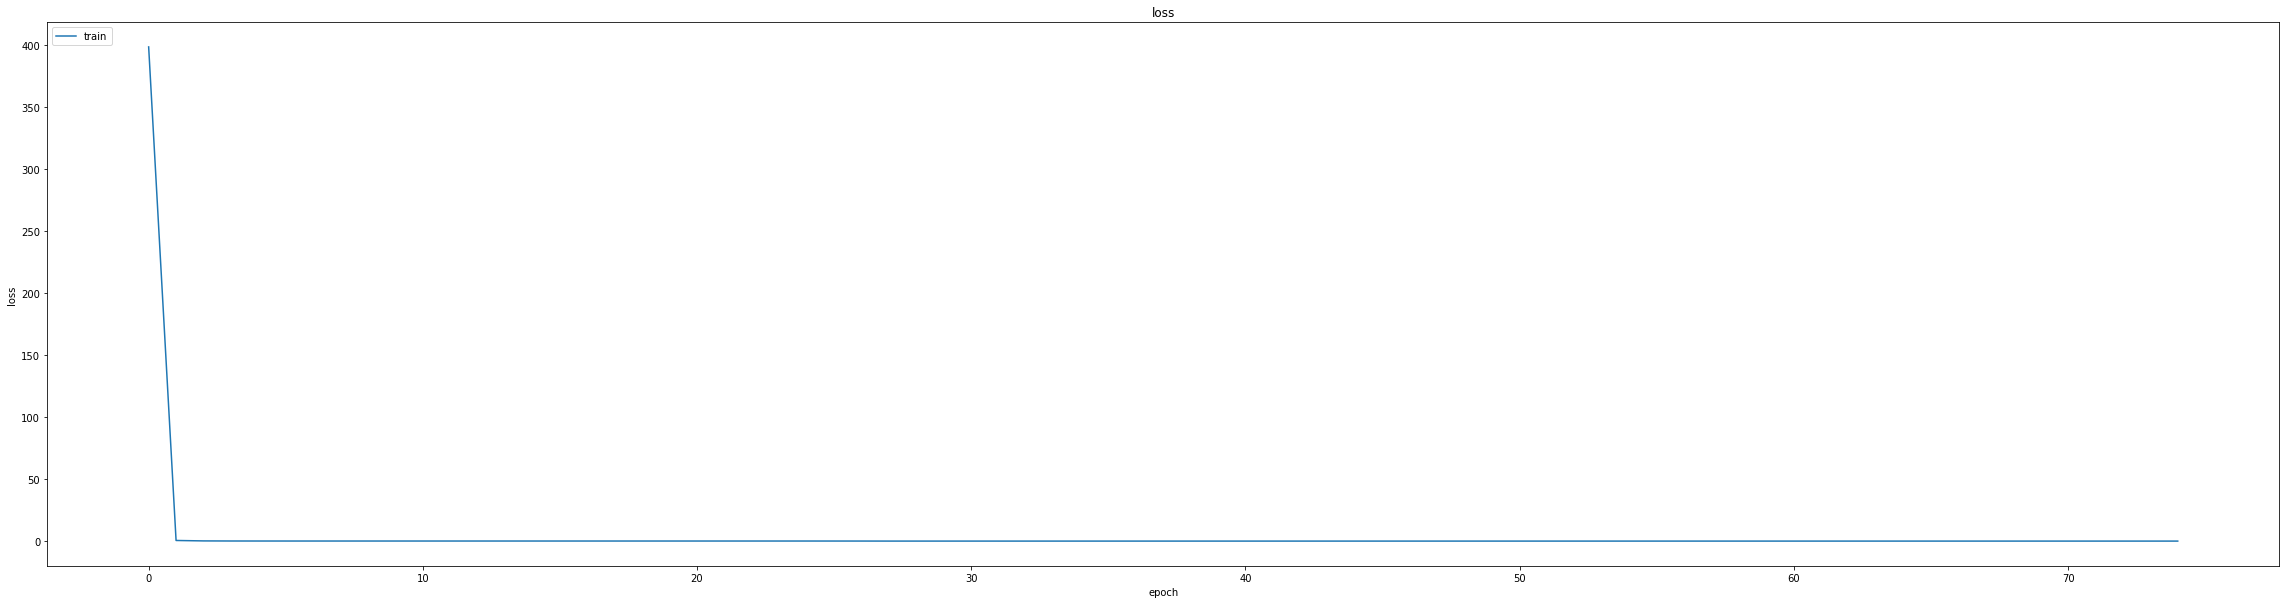

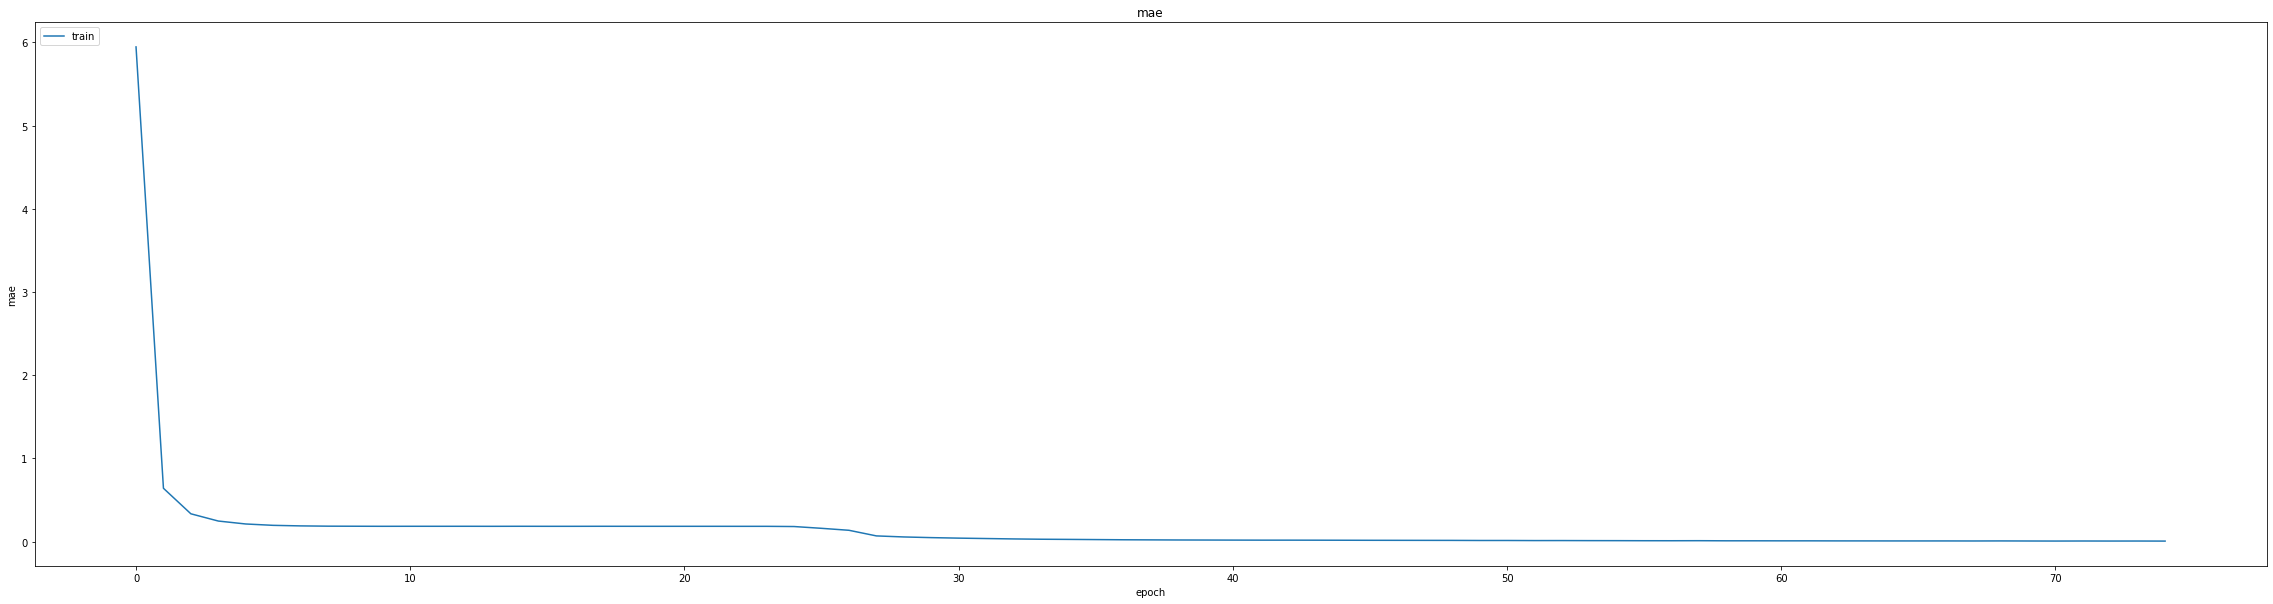

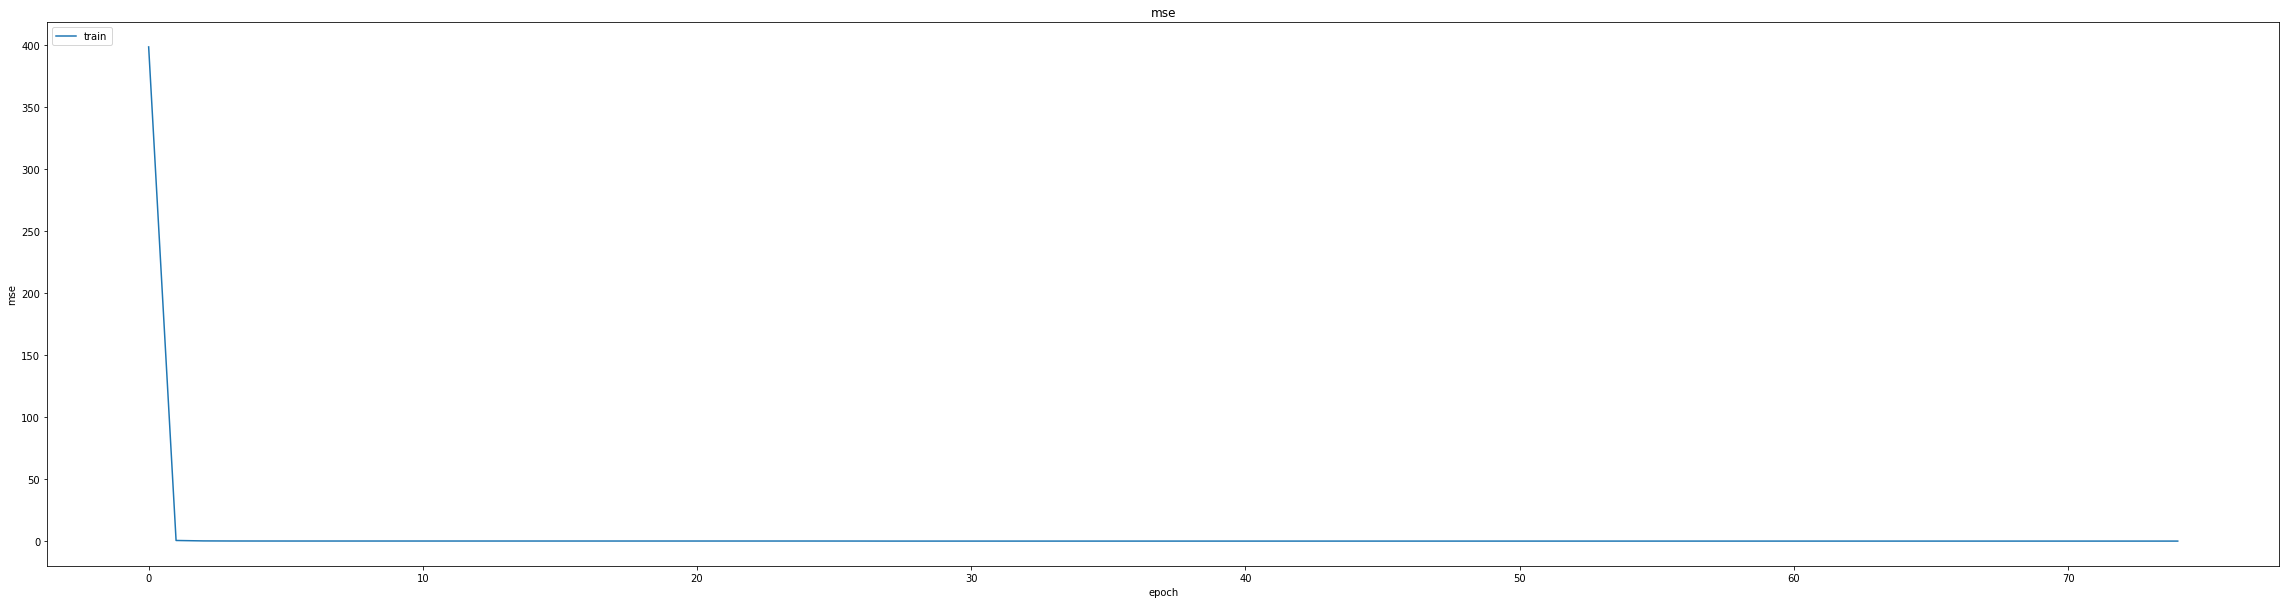

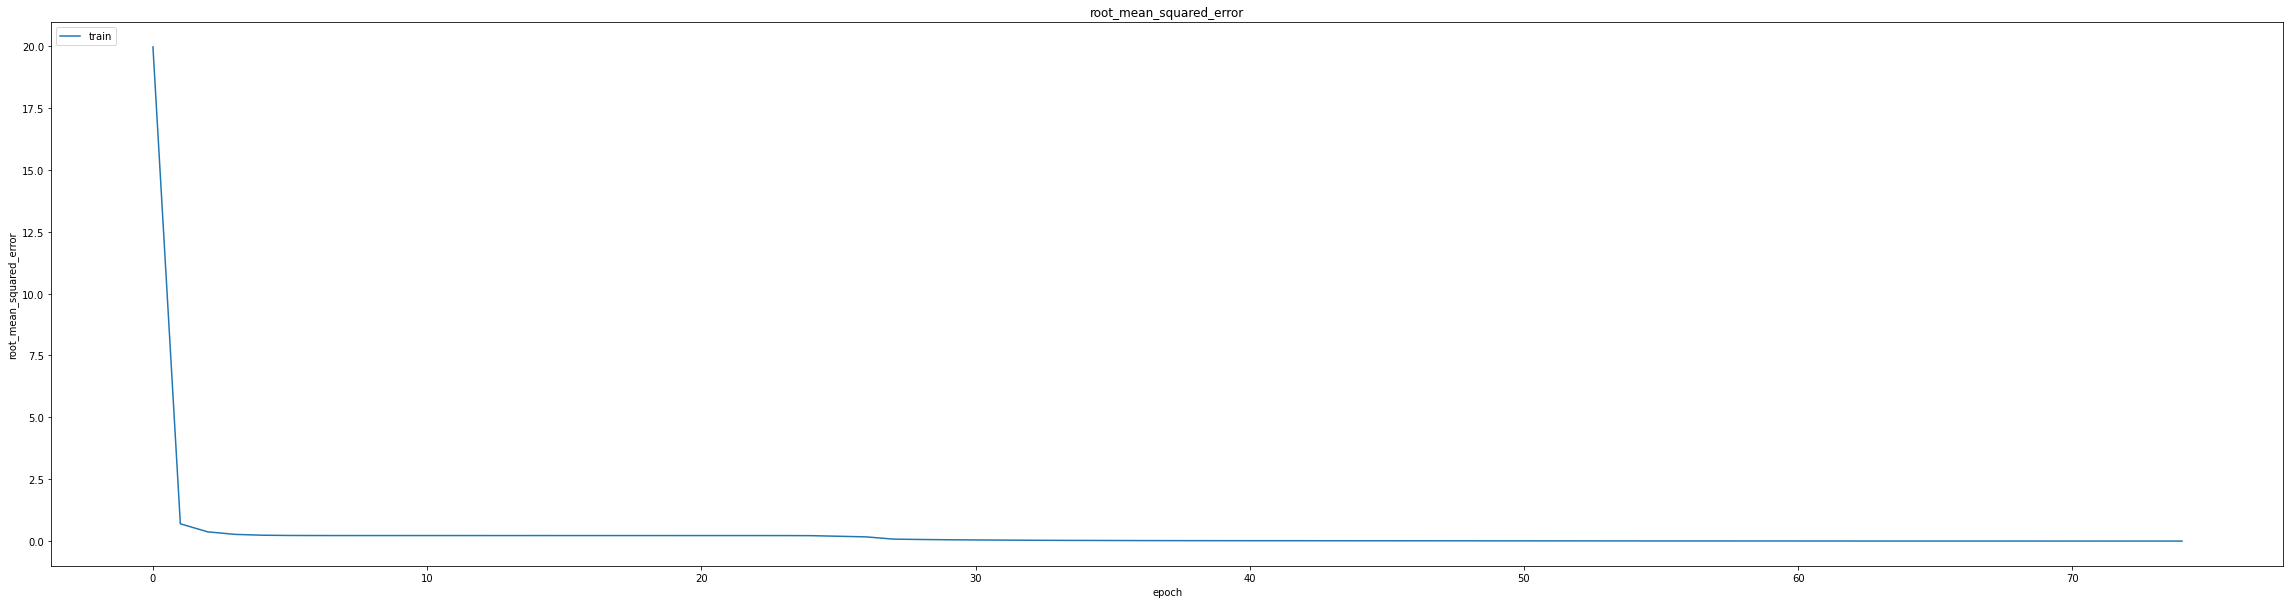

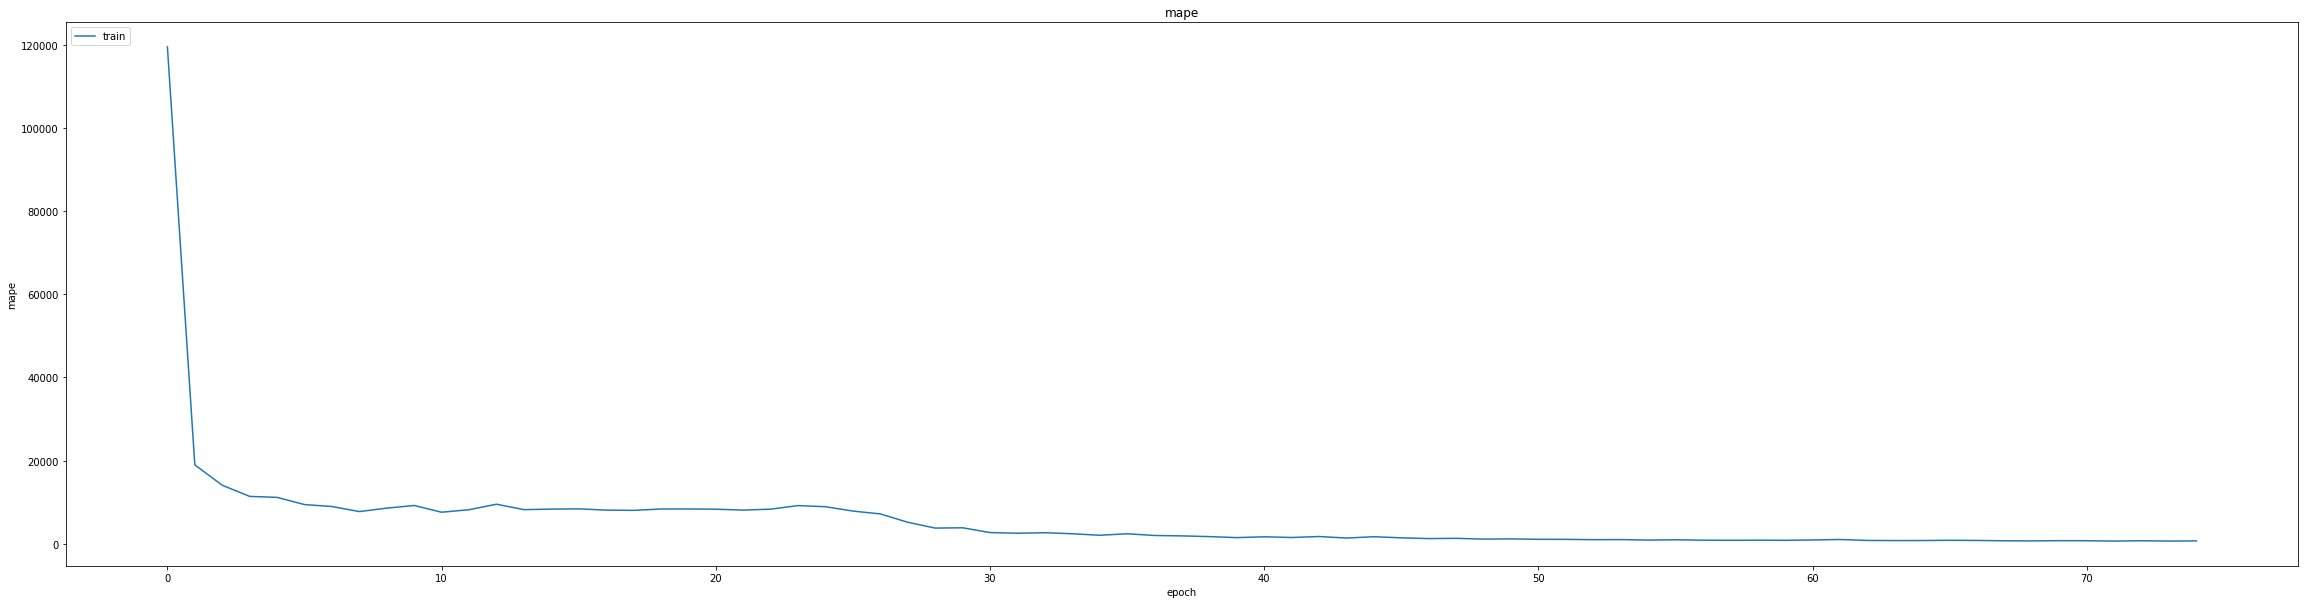

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015014046803116798
0.01962807960808277
348/348 [==============================] - 2s 4ms/step
0.9798720343141609


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
404/406 [============================>.] - ETA: 0s - loss: 6.0675e-04 - mae: 0.0130 - mse: 6.0675e-04 - root_mean_squared_error: 0.0246 - mape: 1251.4717
Epoch 1: val_mse did not improve from 0.00039
406/406 [==============================] - 10s 14ms/step - loss: 6.0472e-04 - mae: 0.0130 - mse: 6.0472e-04 - root_mean_squared_error: 0.0246 - mape: 1246.3350 - val_loss: 5.8031e-04 - val_mae: 0.0204 - val_mse: 5.8031e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 4244.7520 - lr: 0.0010
Epoch 2/25
402/406 [============================>.] - ETA: 0s - loss: 1.1825e-04 - mae: 0.0083 - mse: 1.1825e-04 - root_mean_squared_error: 0.0109 - mape: 848.7173
Epoch 2: val_mse did not improve from 0.00039
406/406 [==============================] - 5s 11ms/step - loss: 1.1817e-04 - mae: 0.0083 - mse: 1.1817e-04 - root_mean_squared_error: 0.0109 - mape: 841.0719 - val_loss: 0.0012 - val_mae: 0.0316 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 4106.1221 - lr: 0.00

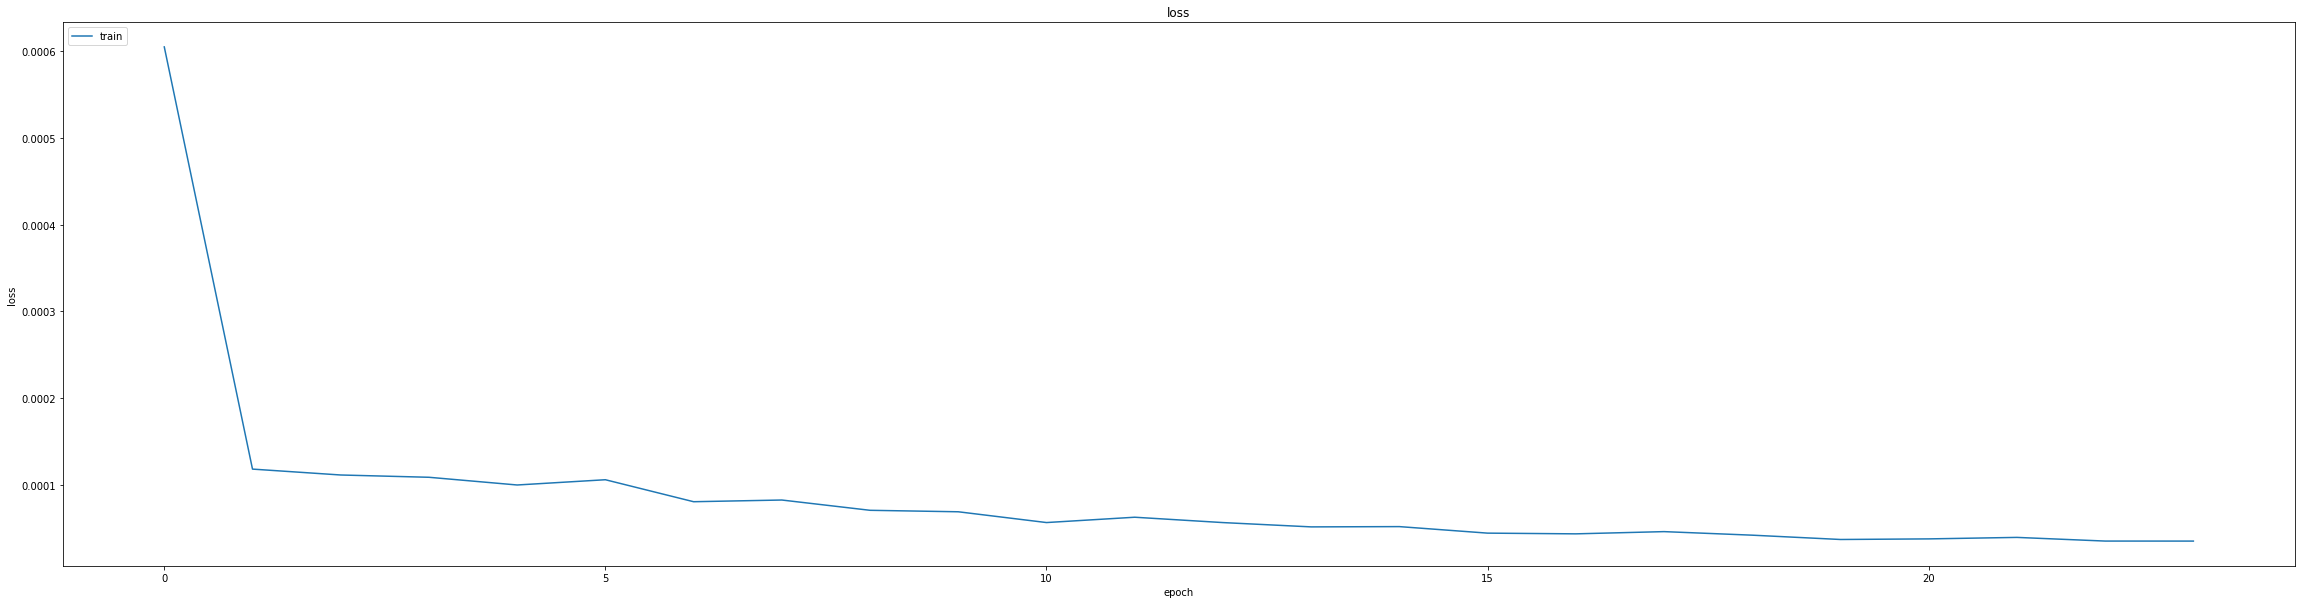

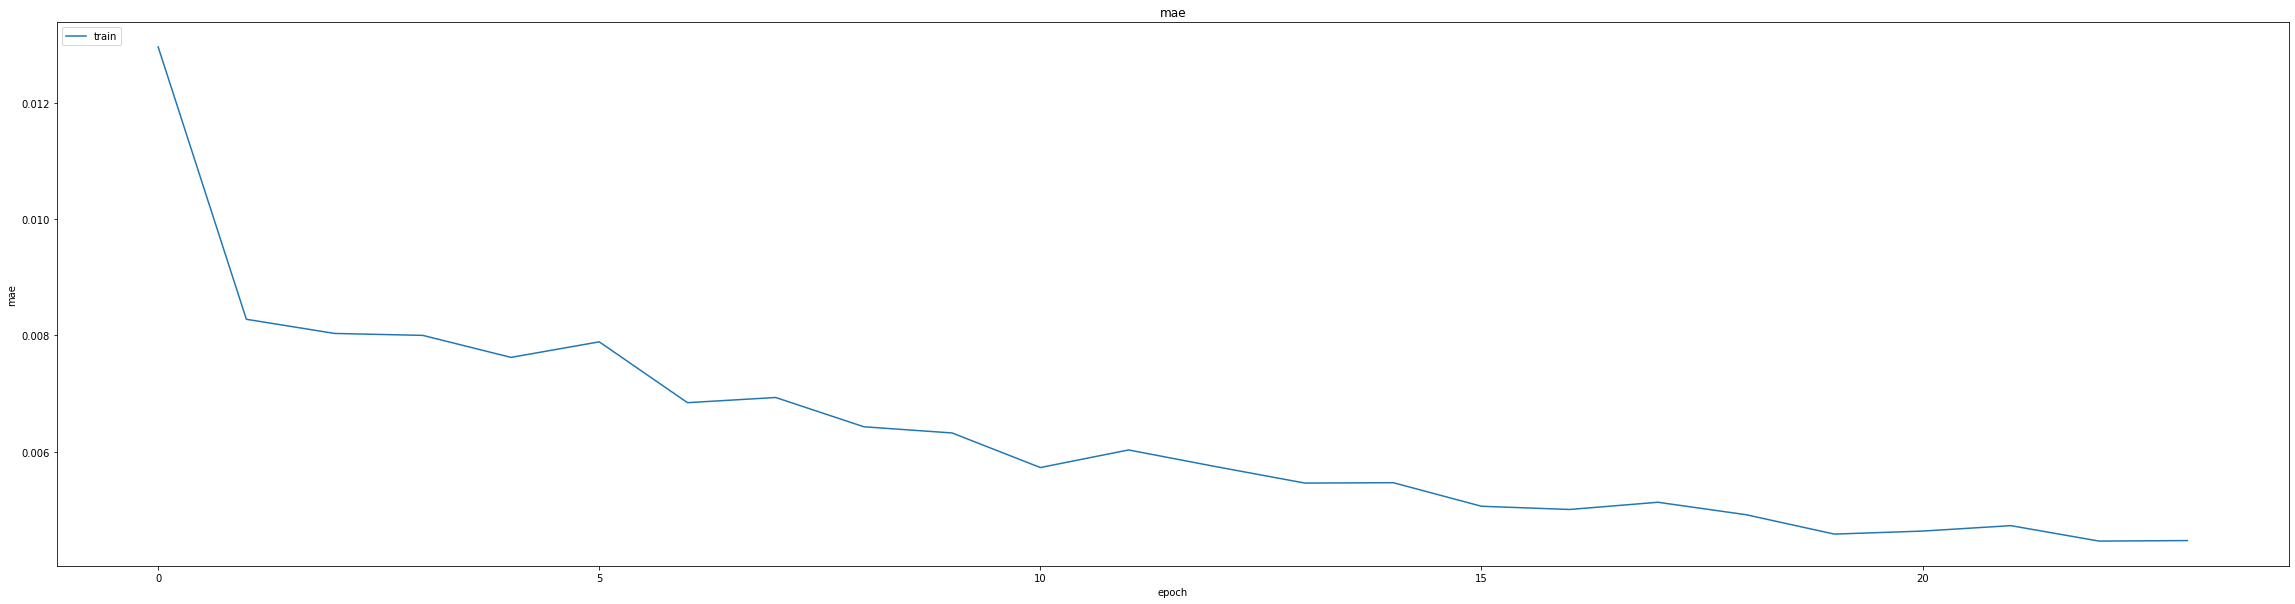

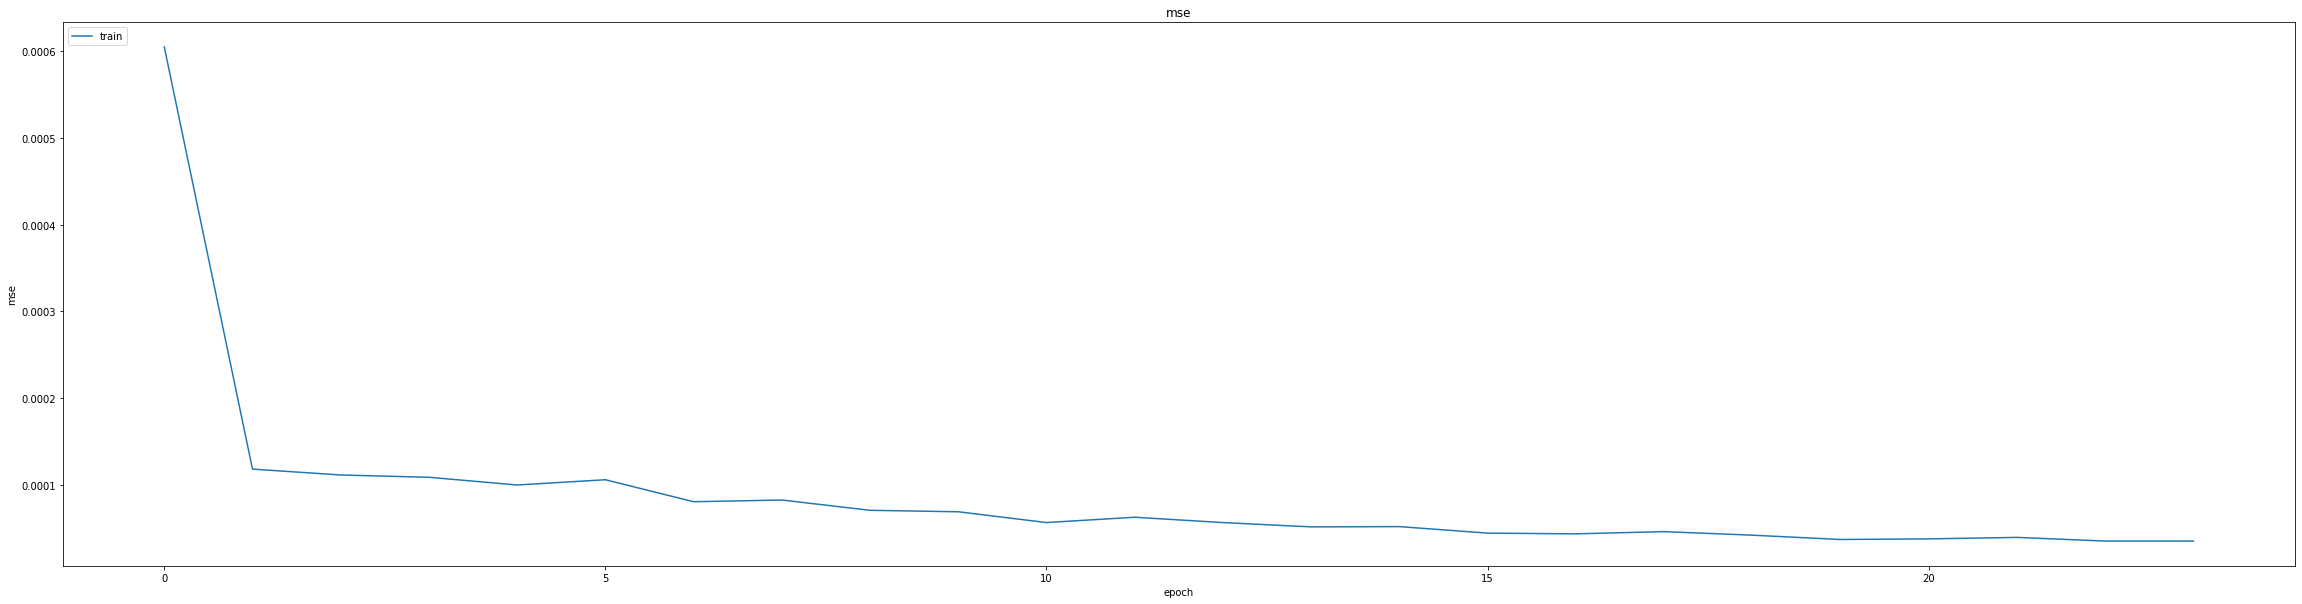

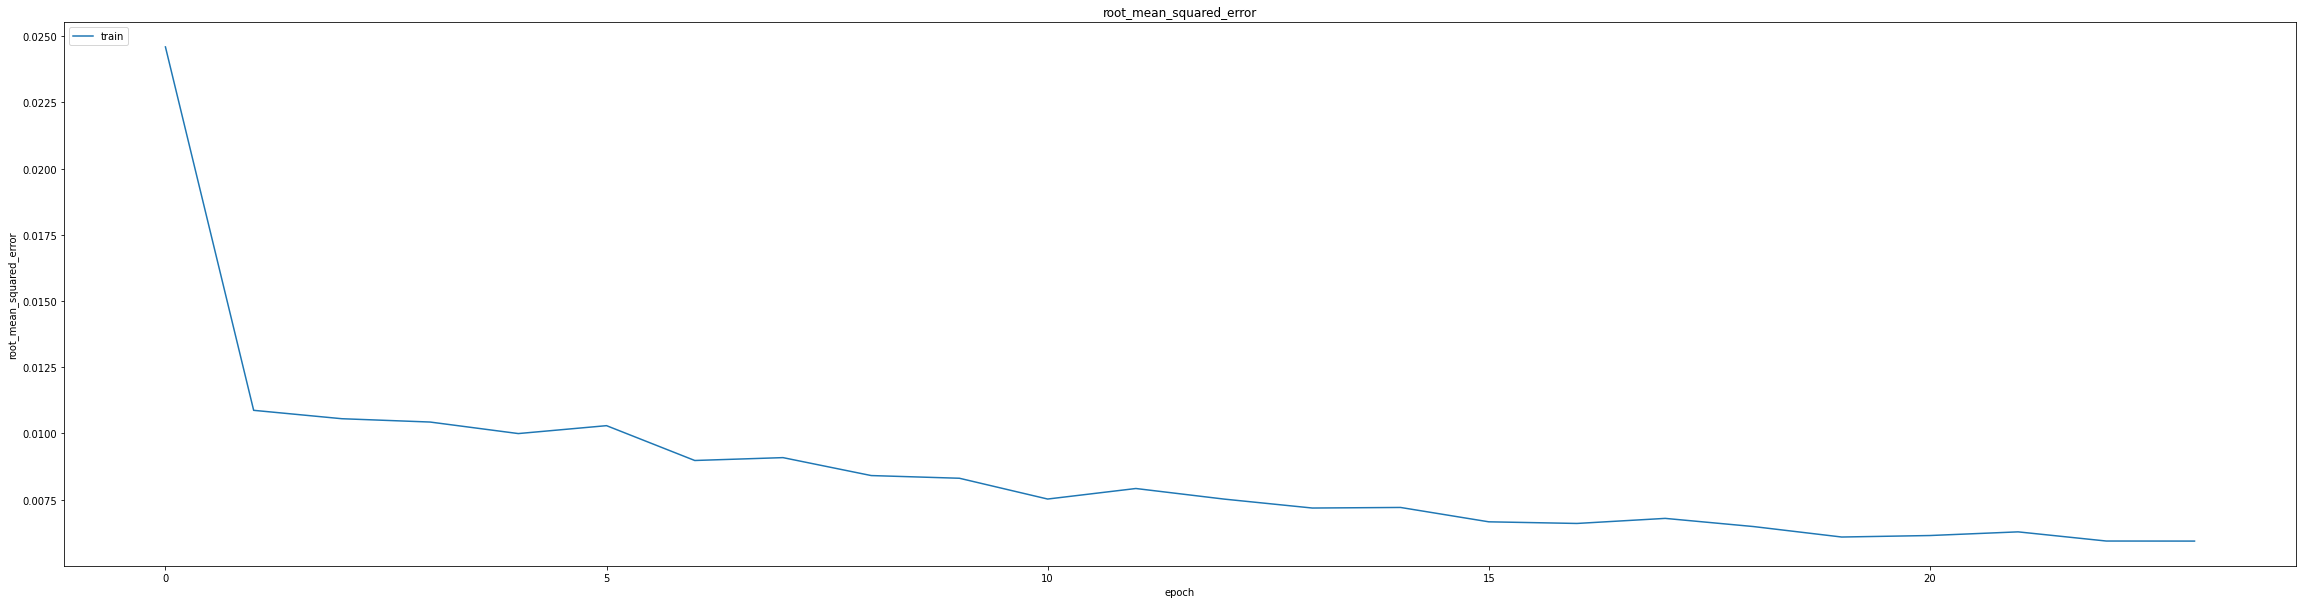

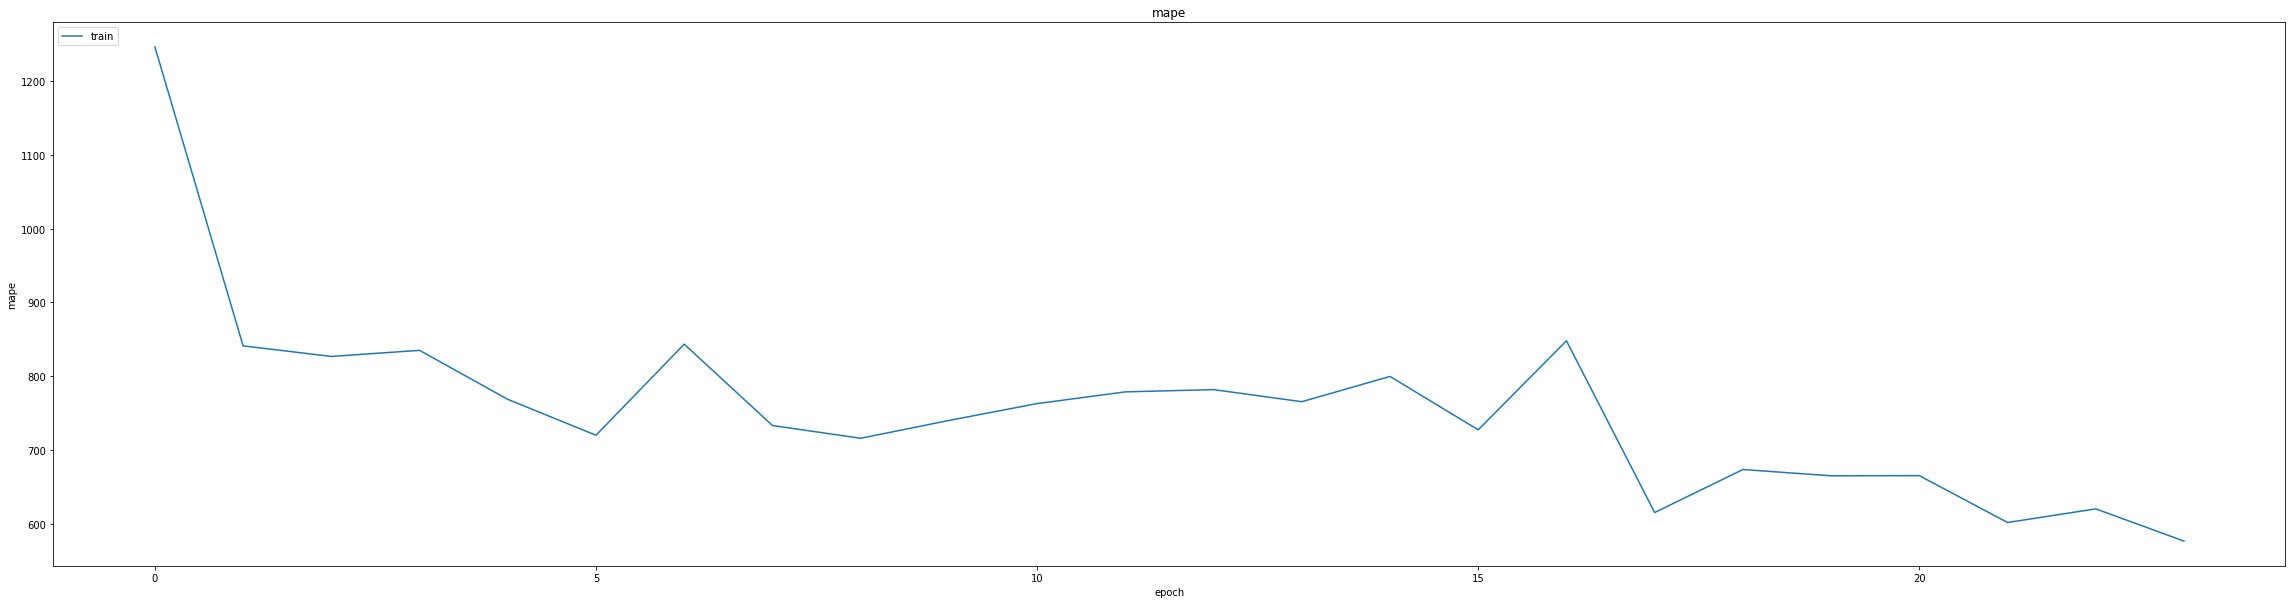

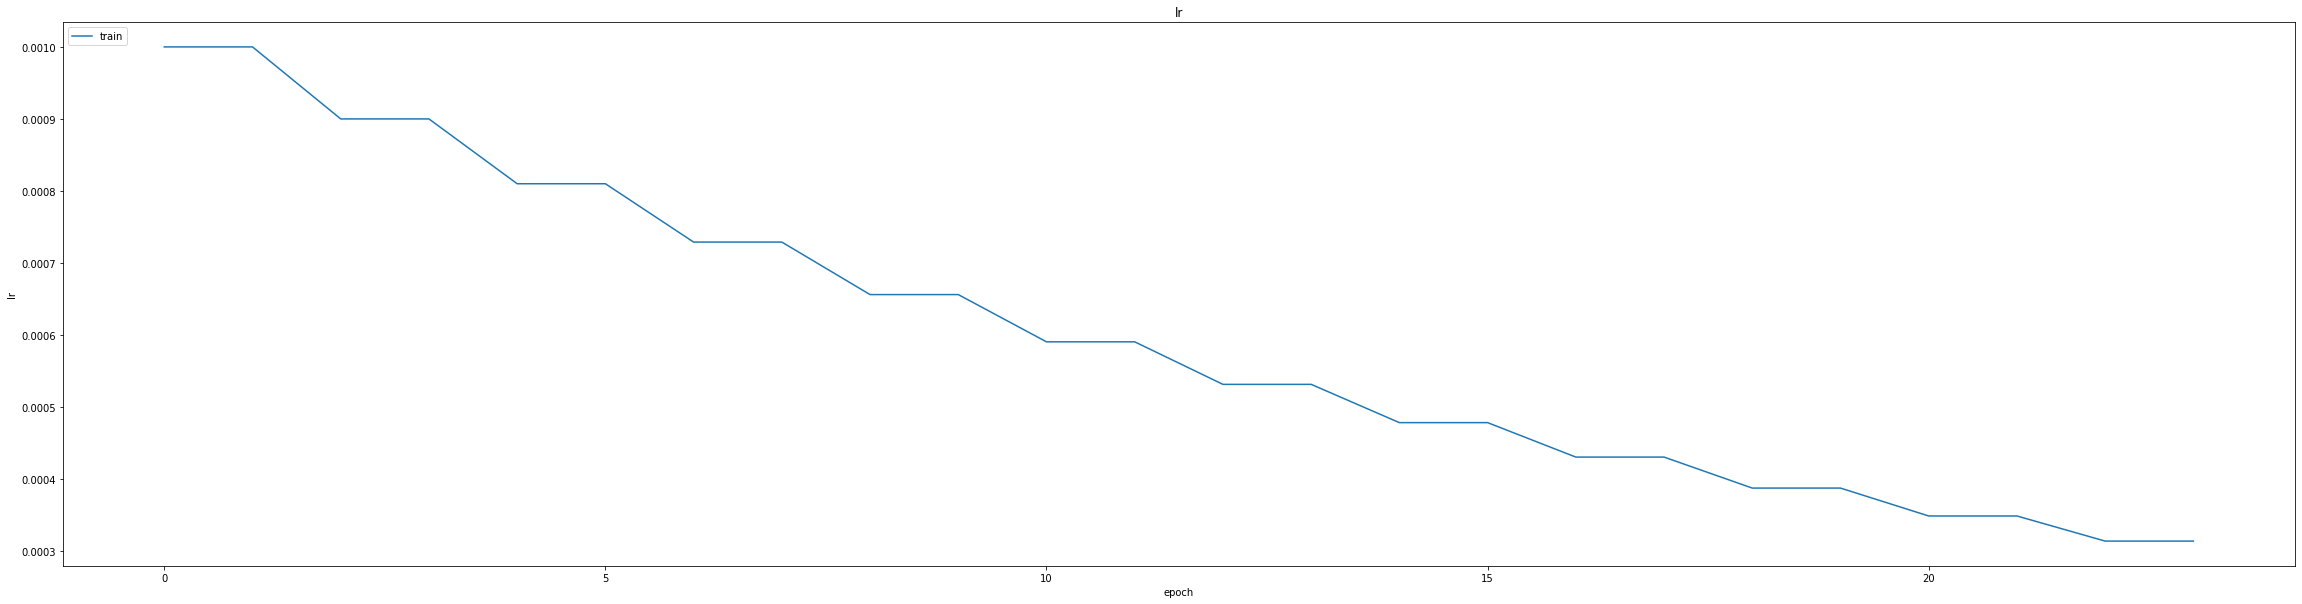

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02009088546037674
0.02198292687535286


348/348 [==============================] - 4s 4ms/step
0.9796666915483333


348/348 [==============================] - 1s 4ms/step


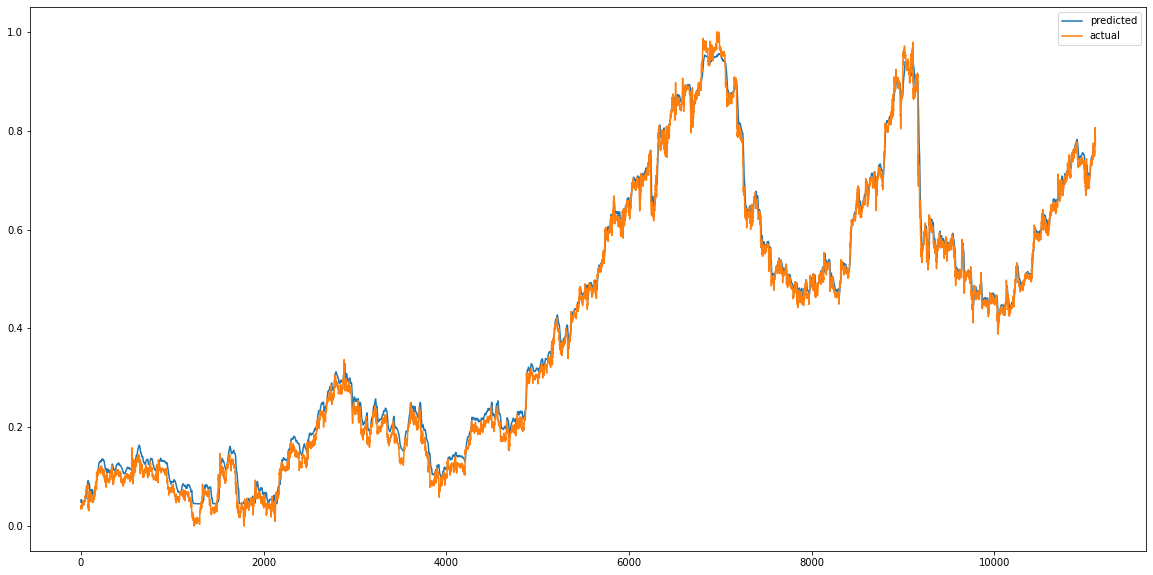

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_LSTM(70-30)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


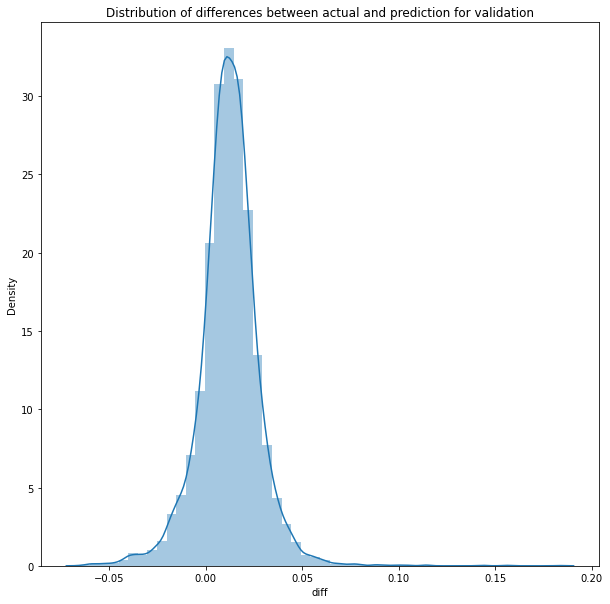

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


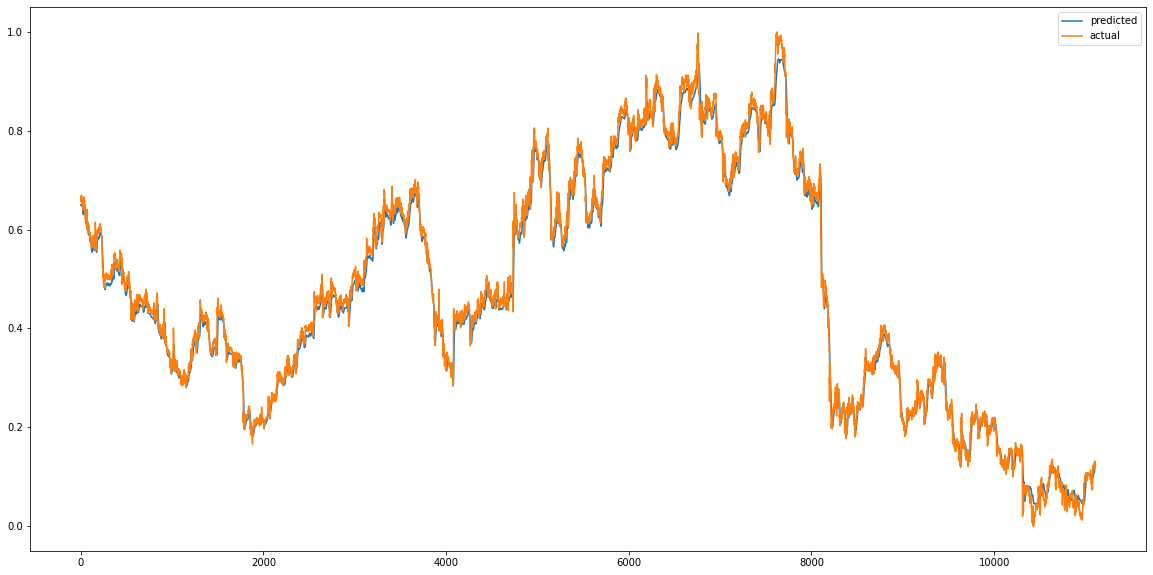

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


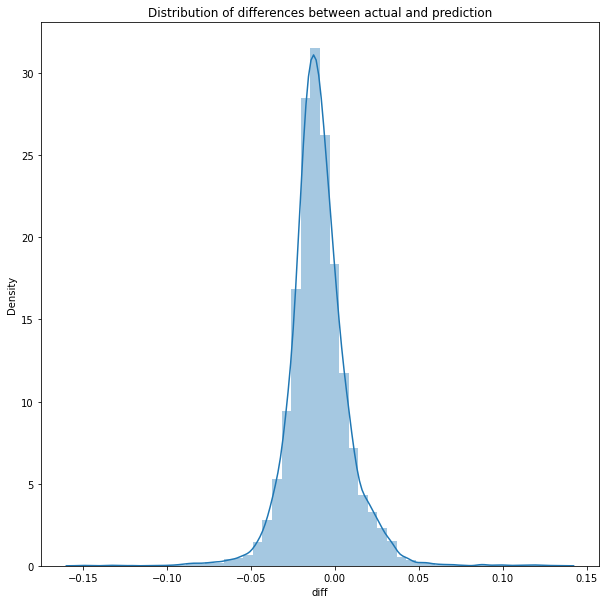

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',r2_scr)


predictions['diff'].describe()

MSE :  0.0004105188942642128
MAE :  0.01565383058432005
RMSE  : 0.02026126586036057
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9930256870633756


count    11109.000000
mean        -0.009769
std          0.017751
min         -0.151618
25%         -0.018976
50%         -0.010816
75%         -0.001252
max          0.133889
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_8 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_24 (Dense)            (None, 32)                544       
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
404/406 [============================>.] - ETA: 0s - loss: 688.0241 - mae: 11.5971 - mse: 688.0241 - root_mean_squared_error: 26.2302 - mape: 61031.6523
Epoch 1: val_mse improved from inf to 4.86428, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 19s 37ms/step - loss: 685.2086 - mae: 11.5584 - mse: 685.2086 - root_mean_squared_error: 26.1765 - mape: 60784.4062 - val_loss: 4.8643 - val_mae: 2.1884 - val_mse: 4.8643 - val_root_mean_squared_error: 2.2055 - val_mape: 235267.7031
Epoch 2/75
405/406 [============================>.] - ETA: 0s - loss: 2.2533 - mae: 1.4419 - mse: 2.2533 - root_mean_squared_error: 1.5011 - mape: 42372.0781
Epoch 2: val_mse improved from 4.86428 to 1.00480, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 2.2512 - mae: 1.4411 - mse: 2.2512 - root_mean_squared_error: 1.5004 - mape: 42302.4648 - val_loss: 1.0048 - val_mae: 0.9642 - val_mse: 1.0048 - val_root_mean_squared_error: 1.0024 - val_mape: 124163.9609
Epoch 3/75
401/406 [============================>.] - ETA: 0s - loss: 0.5872 - mae: 0.7222 - mse: 0.5872 - root_mean_squared_error: 0.7663 - mape: 22515.1445
Epoch 3: val_mse improved from 1.00480 to 0.38285, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.5843 - mae: 0.7199 - mse: 0.5843 - root_mean_squared_error: 0.7644 - mape: 22258.7188 - val_loss: 0.3828 - val_mae: 0.5551 - val_mse: 0.3828 - val_root_mean_squared_error: 0.6187 - val_mape: 87001.5234
Epoch 4/75
405/406 [============================>.] - ETA: 0s - loss: 0.2368 - mae: 0.4330 - mse: 0.2368 - root_mean_squared_error: 0.4866 - mape: 16618.0391
Epoch 4: val_mse improved from 0.38285 to 0.19972, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.2366 - mae: 0.4328 - mse: 0.2366 - root_mean_squared_error: 0.4865 - mape: 16590.7969 - val_loss: 0.1997 - val_mae: 0.3812 - val_mse: 0.1997 - val_root_mean_squared_error: 0.4469 - val_mape: 68692.8281
Epoch 5/75
405/406 [============================>.] - ETA: 0s - loss: 0.1247 - mae: 0.3145 - mse: 0.1247 - root_mean_squared_error: 0.3531 - mape: 13722.8662
Epoch 5: val_mse improved from 0.19972 to 0.13039, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.1247 - mae: 0.3146 - mse: 0.1247 - root_mean_squared_error: 0.3531 - mape: 13700.4209 - val_loss: 0.1304 - val_mae: 0.3026 - val_mse: 0.1304 - val_root_mean_squared_error: 0.3611 - val_mape: 57994.6445
Epoch 6/75
402/406 [============================>.] - ETA: 0s - loss: 0.0817 - mae: 0.2575 - mse: 0.0817 - root_mean_squared_error: 0.2858 - mape: 12680.8232
Epoch 6: val_mse improved from 0.13039 to 0.10066, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0816 - mae: 0.2574 - mse: 0.0816 - root_mean_squared_error: 0.2856 - mape: 12567.0361 - val_loss: 0.1007 - val_mae: 0.2677 - val_mse: 0.1007 - val_root_mean_squared_error: 0.3173 - val_mape: 51163.0195
Epoch 7/75
405/406 [============================>.] - ETA: 0s - loss: 0.0637 - mae: 0.2253 - mse: 0.0637 - root_mean_squared_error: 0.2523 - mape: 10853.2705
Epoch 7: val_mse improved from 0.10066 to 0.08724, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0637 - mae: 0.2253 - mse: 0.0637 - root_mean_squared_error: 0.2523 - mape: 10835.4463 - val_loss: 0.0872 - val_mae: 0.2510 - val_mse: 0.0872 - val_root_mean_squared_error: 0.2954 - val_mape: 46647.8164
Epoch 8/75
405/406 [============================>.] - ETA: 0s - loss: 0.0561 - mae: 0.2064 - mse: 0.0561 - root_mean_squared_error: 0.2369 - mape: 10186.0410
Epoch 8: val_mse improved from 0.08724 to 0.08102, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0561 - mae: 0.2064 - mse: 0.0561 - root_mean_squared_error: 0.2369 - mape: 10169.3027 - val_loss: 0.0810 - val_mae: 0.2440 - val_mse: 0.0810 - val_root_mean_squared_error: 0.2846 - val_mape: 43619.0898
Epoch 9/75
406/406 [==============================] - ETA: 0s - loss: 0.0532 - mae: 0.1950 - mse: 0.0532 - root_mean_squared_error: 0.2306 - mape: 9518.2051
Epoch 9: val_mse improved from 0.08102 to 0.07815, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 38ms/step - loss: 0.0532 - mae: 0.1950 - mse: 0.0532 - root_mean_squared_error: 0.2306 - mape: 9518.2051 - val_loss: 0.0781 - val_mae: 0.2418 - val_mse: 0.0781 - val_root_mean_squared_error: 0.2796 - val_mape: 41635.3242
Epoch 10/75
405/406 [============================>.] - ETA: 0s - loss: 0.0521 - mae: 0.1883 - mse: 0.0521 - root_mean_squared_error: 0.2282 - mape: 9029.9268
Epoch 10: val_mse improved from 0.07815 to 0.07686, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0520 - mae: 0.1883 - mse: 0.0520 - root_mean_squared_error: 0.2281 - mape: 9015.0684 - val_loss: 0.0769 - val_mae: 0.2414 - val_mse: 0.0769 - val_root_mean_squared_error: 0.2772 - val_mape: 40413.1055
Epoch 11/75
402/406 [============================>.] - ETA: 0s - loss: 0.0517 - mae: 0.1846 - mse: 0.0517 - root_mean_squared_error: 0.2273 - mape: 8904.6348
Epoch 11: val_mse improved from 0.07686 to 0.07627, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0517 - mae: 0.1847 - mse: 0.0517 - root_mean_squared_error: 0.2273 - mape: 8824.6318 - val_loss: 0.0763 - val_mae: 0.2413 - val_mse: 0.0763 - val_root_mean_squared_error: 0.2762 - val_mape: 39696.4766
Epoch 12/75
405/406 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1829 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8567.6836
Epoch 12: val_mse improved from 0.07627 to 0.07602, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 0.0516 - mae: 0.1829 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8553.5791 - val_loss: 0.0760 - val_mae: 0.2414 - val_mse: 0.0760 - val_root_mean_squared_error: 0.2757 - val_mape: 39329.7188
Epoch 13/75
401/406 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1821 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 8682.3008
Epoch 13: val_mse improved from 0.07602 to 0.07592, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0516 - mae: 0.1821 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8583.0605 - val_loss: 0.0759 - val_mae: 0.2414 - val_mse: 0.0759 - val_root_mean_squared_error: 0.2755 - val_mape: 39177.0508
Epoch 14/75
403/406 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1818 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 8557.8799
Epoch 14: val_mse improved from 0.07592 to 0.07588, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0516 - mae: 0.1818 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8501.9775 - val_loss: 0.0759 - val_mae: 0.2414 - val_mse: 0.0759 - val_root_mean_squared_error: 0.2755 - val_mape: 39102.1055
Epoch 15/75
405/406 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1816 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8511.0371
Epoch 15: val_mse did not improve from 0.07588
406/406 [==============================] - 4s 10ms/step - loss: 0.0516 - mae: 0.1816 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8497.0381 - val_loss: 0.0759 - val_mae: 0.2414 - val_mse: 0.0759 - val_root_mean_squared_error: 0.2755 - val_mape: 39121.2578
Epoch 16/75
405/406 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1818 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8443.7207
Epoch 16: val_mse improved from 0.07588 to 0.07583, saving model to /content/drive/MyDrive/modelweight

406/406 [==============================] - 14s 34ms/step - loss: 0.0516 - mae: 0.1818 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8429.8340 - val_loss: 0.0758 - val_mae: 0.2414 - val_mse: 0.0758 - val_root_mean_squared_error: 0.2754 - val_mape: 39018.8945
Epoch 17/75
401/406 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1815 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8737.3965
Epoch 17: val_mse did not improve from 0.07583
406/406 [==============================] - 4s 10ms/step - loss: 0.0516 - mae: 0.1815 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8637.4814 - val_loss: 0.0759 - val_mae: 0.2414 - val_mse: 0.0759 - val_root_mean_squared_error: 0.2755 - val_mape: 39157.1680
Epoch 18/75
401/406 [============================>.] - ETA: 0s - loss: 0.0516 - mae: 0.1819 - mse: 0.0516 - root_mean_squared_error: 0.2272 - mape: 8673.0791
Epoch 18: val_mse did not improve from 0.07583
406/406 [==============================] - 4s 11ms/step

406/406 [==============================] - 14s 34ms/step - loss: 0.0516 - mae: 0.1819 - mse: 0.0516 - root_mean_squared_error: 0.2271 - mape: 8418.5898 - val_loss: 0.0757 - val_mae: 0.2414 - val_mse: 0.0757 - val_root_mean_squared_error: 0.2751 - val_mape: 38864.6055
Epoch 22/75
402/406 [============================>.] - ETA: 0s - loss: 0.0515 - mae: 0.1814 - mse: 0.0515 - root_mean_squared_error: 0.2269 - mape: 8593.8398
Epoch 22: val_mse did not improve from 0.07571
406/406 [==============================] - 4s 10ms/step - loss: 0.0515 - mae: 0.1815 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 8516.6680 - val_loss: 0.0758 - val_mae: 0.2413 - val_mse: 0.0758 - val_root_mean_squared_error: 0.2754 - val_mape: 39100.9961
Epoch 23/75
406/406 [==============================] - ETA: 0s - loss: 0.0515 - mae: 0.1817 - mse: 0.0515 - root_mean_squared_error: 0.2270 - mape: 8502.6367
Epoch 23: val_mse did not improve from 0.07571
406/406 [==============================] - 4s 11ms/step

406/406 [==============================] - 14s 34ms/step - loss: 0.0514 - mae: 0.1814 - mse: 0.0514 - root_mean_squared_error: 0.2267 - mape: 8620.9746 - val_loss: 0.0754 - val_mae: 0.2408 - val_mse: 0.0754 - val_root_mean_squared_error: 0.2745 - val_mape: 38777.7383
Epoch 28/75
402/406 [============================>.] - ETA: 0s - loss: 0.0344 - mae: 0.1375 - mse: 0.0344 - root_mean_squared_error: 0.1855 - mape: 7861.9541
Epoch 28: val_mse improved from 0.07537 to 0.00969, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0341 - mae: 0.1367 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 7791.0210 - val_loss: 0.0097 - val_mae: 0.0735 - val_mse: 0.0097 - val_root_mean_squared_error: 0.0984 - val_mape: 23158.7207
Epoch 29/75
404/406 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0335 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 4155.3838
Epoch 29: val_mse improved from 0.00969 to 0.00421, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 0.0023 - mae: 0.0335 - mse: 0.0023 - root_mean_squared_error: 0.0483 - mape: 4138.3247 - val_loss: 0.0042 - val_mae: 0.0505 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0649 - val_mape: 16594.7695
Epoch 30/75
406/406 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0265 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 3214.7366
Epoch 30: val_mse improved from 0.00421 to 0.00285, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 0.0013 - mae: 0.0265 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 3214.7366 - val_loss: 0.0028 - val_mae: 0.0430 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0534 - val_mape: 14016.7695
Epoch 31/75
406/406 [==============================] - ETA: 0s - loss: 9.7271e-04 - mae: 0.0233 - mse: 9.7271e-04 - root_mean_squared_error: 0.0312 - mape: 2988.6047
Epoch 31: val_mse improved from 0.00285 to 0.00278, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 13s 33ms/step - loss: 9.7271e-04 - mae: 0.0233 - mse: 9.7271e-04 - root_mean_squared_error: 0.0312 - mape: 2988.6047 - val_loss: 0.0028 - val_mae: 0.0442 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 12414.2471
Epoch 32/75
401/406 [============================>.] - ETA: 0s - loss: 8.0199e-04 - mae: 0.0213 - mse: 8.0199e-04 - root_mean_squared_error: 0.0283 - mape: 2584.0032
Epoch 32: val_mse improved from 0.00278 to 0.00176, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 8.0211e-04 - mae: 0.0213 - mse: 8.0211e-04 - root_mean_squared_error: 0.0283 - mape: 2554.3462 - val_loss: 0.0018 - val_mae: 0.0324 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 11433.4873
Epoch 33/75
406/406 [==============================] - ETA: 0s - loss: 6.8800e-04 - mae: 0.0198 - mse: 6.8800e-04 - root_mean_squared_error: 0.0262 - mape: 2433.9895
Epoch 33: val_mse improved from 0.00176 to 0.00128, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 6.8800e-04 - mae: 0.0198 - mse: 6.8800e-04 - root_mean_squared_error: 0.0262 - mape: 2433.9895 - val_loss: 0.0013 - val_mae: 0.0261 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 10670.2686
Epoch 34/75
403/406 [============================>.] - ETA: 0s - loss: 5.9490e-04 - mae: 0.0183 - mse: 5.9490e-04 - root_mean_squared_error: 0.0244 - mape: 11.2926
Epoch 34: val_mse did not improve from 0.00128
406/406 [==============================] - 4s 10ms/step - loss: 5.9588e-04 - mae: 0.0184 - mse: 5.9588e-04 - root_mean_squared_error: 0.0244 - mape: 2151.7839 - val_loss: 0.0014 - val_mae: 0.0285 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 9956.9453
Epoch 35/75
402/406 [============================>.] - ETA: 0s - loss: 5.3830e-04 - mae: 0.0175 - mse: 5.3830e-04 - root_mean_squared_error: 0.0232 - mape: 2107.4019
Epoch 35: val_mse improved from 0.00128 to 0.00103, saving model to /cont

406/406 [==============================] - 14s 35ms/step - loss: 5.3739e-04 - mae: 0.0174 - mse: 5.3739e-04 - root_mean_squared_error: 0.0232 - mape: 2088.4182 - val_loss: 0.0010 - val_mae: 0.0233 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 9428.0000
Epoch 36/75
406/406 [==============================] - ETA: 0s - loss: 5.0848e-04 - mae: 0.0169 - mse: 5.0848e-04 - root_mean_squared_error: 0.0225 - mape: 2063.5637
Epoch 36: val_mse improved from 0.00103 to 0.00095, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 15s 37ms/step - loss: 5.0848e-04 - mae: 0.0169 - mse: 5.0848e-04 - root_mean_squared_error: 0.0225 - mape: 2063.5637 - val_loss: 9.4783e-04 - val_mae: 0.0224 - val_mse: 9.4783e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 9069.7705
Epoch 37/75
404/406 [============================>.] - ETA: 0s - loss: 4.7021e-04 - mae: 0.0163 - mse: 4.7021e-04 - root_mean_squared_error: 0.0217 - mape: 1894.5160
Epoch 37: val_mse improved from 0.00095 to 0.00088, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 4.6987e-04 - mae: 0.0163 - mse: 4.6987e-04 - root_mean_squared_error: 0.0217 - mape: 1886.7257 - val_loss: 8.8059e-04 - val_mae: 0.0215 - val_mse: 8.8059e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 8668.8838
Epoch 38/75
406/406 [==============================] - ETA: 0s - loss: 4.5285e-04 - mae: 0.0160 - mse: 4.5285e-04 - root_mean_squared_error: 0.0213 - mape: 1826.5620
Epoch 38: val_mse improved from 0.00088 to 0.00082, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 4.5285e-04 - mae: 0.0160 - mse: 4.5285e-04 - root_mean_squared_error: 0.0213 - mape: 1826.5620 - val_loss: 8.2112e-04 - val_mae: 0.0207 - val_mse: 8.2112e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 8321.5430
Epoch 39/75
402/406 [============================>.] - ETA: 0s - loss: 4.1671e-04 - mae: 0.0154 - mse: 4.1671e-04 - root_mean_squared_error: 0.0204 - mape: 1787.8607
Epoch 39: val_mse improved from 0.00082 to 0.00079, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 4.1640e-04 - mae: 0.0153 - mse: 4.1640e-04 - root_mean_squared_error: 0.0204 - mape: 1771.7371 - val_loss: 7.8701e-04 - val_mae: 0.0202 - val_mse: 7.8701e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 8072.2729
Epoch 40/75
404/406 [============================>.] - ETA: 0s - loss: 4.0229e-04 - mae: 0.0151 - mse: 4.0229e-04 - root_mean_squared_error: 0.0201 - mape: 1640.2969
Epoch 40: val_mse did not improve from 0.00079
406/406 [==============================] - 4s 10ms/step - loss: 4.0202e-04 - mae: 0.0151 - mse: 4.0202e-04 - root_mean_squared_error: 0.0201 - mape: 1633.5522 - val_loss: 7.8816e-04 - val_mae: 0.0204 - val_mse: 7.8816e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 7762.8218
Epoch 41/75
404/406 [============================>.] - ETA: 0s - loss: 3.8549e-04 - mae: 0.0148 - mse: 3.8549e-04 - root_mean_squared_error: 0.0196 - mape: 1701.8065
Epoch 41: val_mse improved from 0.00079 to 0.00073, savi

406/406 [==============================] - 13s 33ms/step - loss: 3.8514e-04 - mae: 0.0148 - mse: 3.8514e-04 - root_mean_squared_error: 0.0196 - mape: 1694.8075 - val_loss: 7.2632e-04 - val_mae: 0.0195 - val_mse: 7.2632e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 7535.0039
Epoch 42/75
401/406 [============================>.] - ETA: 0s - loss: 3.6605e-04 - mae: 0.0144 - mse: 3.6605e-04 - root_mean_squared_error: 0.0191 - mape: 1592.4563
Epoch 42: val_mse improved from 0.00073 to 0.00072, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 3.6628e-04 - mae: 0.0144 - mse: 3.6628e-04 - root_mean_squared_error: 0.0191 - mape: 1574.1697 - val_loss: 7.2086e-04 - val_mae: 0.0197 - val_mse: 7.2086e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 7361.7739
Epoch 43/75
403/406 [============================>.] - ETA: 0s - loss: 3.4821e-04 - mae: 0.0141 - mse: 3.4821e-04 - root_mean_squared_error: 0.0187 - mape: 1510.5963
Epoch 43: val_mse improved from 0.00072 to 0.00066, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 3.4789e-04 - mae: 0.0141 - mse: 3.4789e-04 - root_mean_squared_error: 0.0187 - mape: 1500.6761 - val_loss: 6.5779e-04 - val_mae: 0.0185 - val_mse: 6.5779e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 7058.8354
Epoch 44/75
403/406 [============================>.] - ETA: 0s - loss: 3.3971e-04 - mae: 0.0139 - mse: 3.3971e-04 - root_mean_squared_error: 0.0184 - mape: 1524.9657
Epoch 44: val_mse did not improve from 0.00066
406/406 [==============================] - 4s 10ms/step - loss: 3.3981e-04 - mae: 0.0139 - mse: 3.3981e-04 - root_mean_squared_error: 0.0184 - mape: 1514.9453 - val_loss: 7.3302e-04 - val_mae: 0.0204 - val_mse: 7.3302e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 7007.6494
Epoch 45/75
403/406 [============================>.] - ETA: 0s - loss: 3.2573e-04 - mae: 0.0136 - mse: 3.2573e-04 - root_mean_squared_error: 0.0180 - mape: 1468.5131
Epoch 45: val_mse improved from 0.00066 to 0.00065, savi

406/406 [==============================] - 14s 35ms/step - loss: 3.2545e-04 - mae: 0.0136 - mse: 3.2545e-04 - root_mean_squared_error: 0.0180 - mape: 1458.8843 - val_loss: 6.5450e-04 - val_mae: 0.0188 - val_mse: 6.5450e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 6864.1089
Epoch 46/75
405/406 [============================>.] - ETA: 0s - loss: 3.0926e-04 - mae: 0.0133 - mse: 3.0926e-04 - root_mean_squared_error: 0.0176 - mape: 1448.9509
Epoch 46: val_mse improved from 0.00065 to 0.00063, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 3.0918e-04 - mae: 0.0133 - mse: 3.0918e-04 - root_mean_squared_error: 0.0176 - mape: 1446.5569 - val_loss: 6.3223e-04 - val_mae: 0.0187 - val_mse: 6.3223e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 6620.3735
Epoch 47/75
403/406 [============================>.] - ETA: 0s - loss: 2.8929e-04 - mae: 0.0128 - mse: 2.8929e-04 - root_mean_squared_error: 0.0170 - mape: 1423.1042
Epoch 47: val_mse did not improve from 0.00063
406/406 [==============================] - 5s 13ms/step - loss: 2.8923e-04 - mae: 0.0128 - mse: 2.8923e-04 - root_mean_squared_error: 0.0170 - mape: 1413.7644 - val_loss: 6.4208e-04 - val_mae: 0.0188 - val_mse: 6.4208e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 6531.6865
Epoch 48/75
405/406 [============================>.] - ETA: 0s - loss: 2.8596e-04 - mae: 0.0127 - mse: 2.8596e-04 - root_mean_squared_error: 0.0169 - mape: 1414.9895
Epoch 48: val_mse did not improve from 0.00063
406/406 [

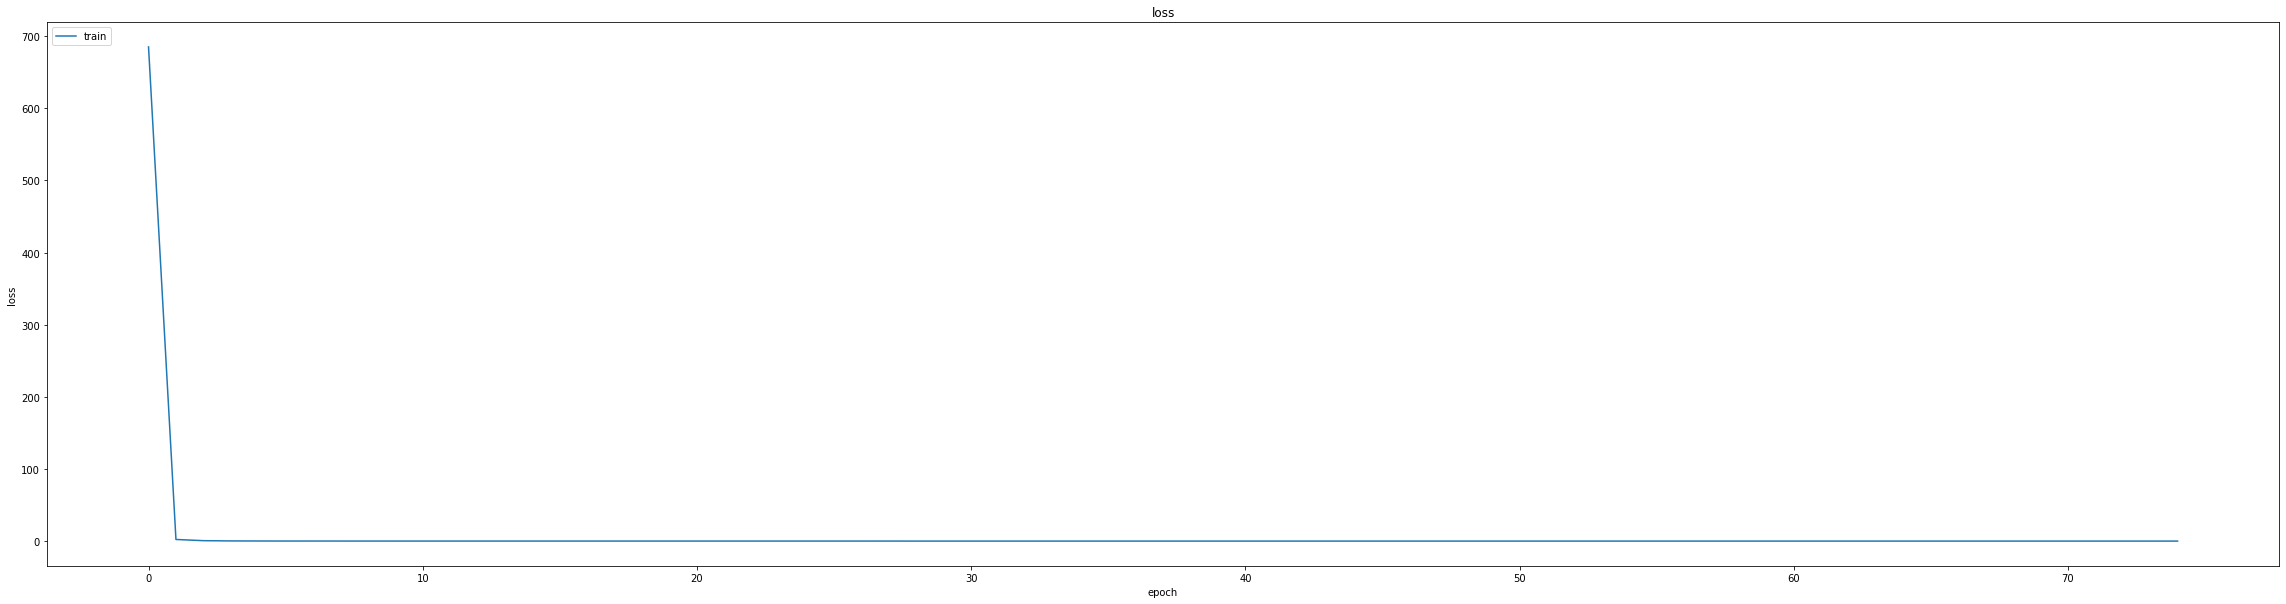

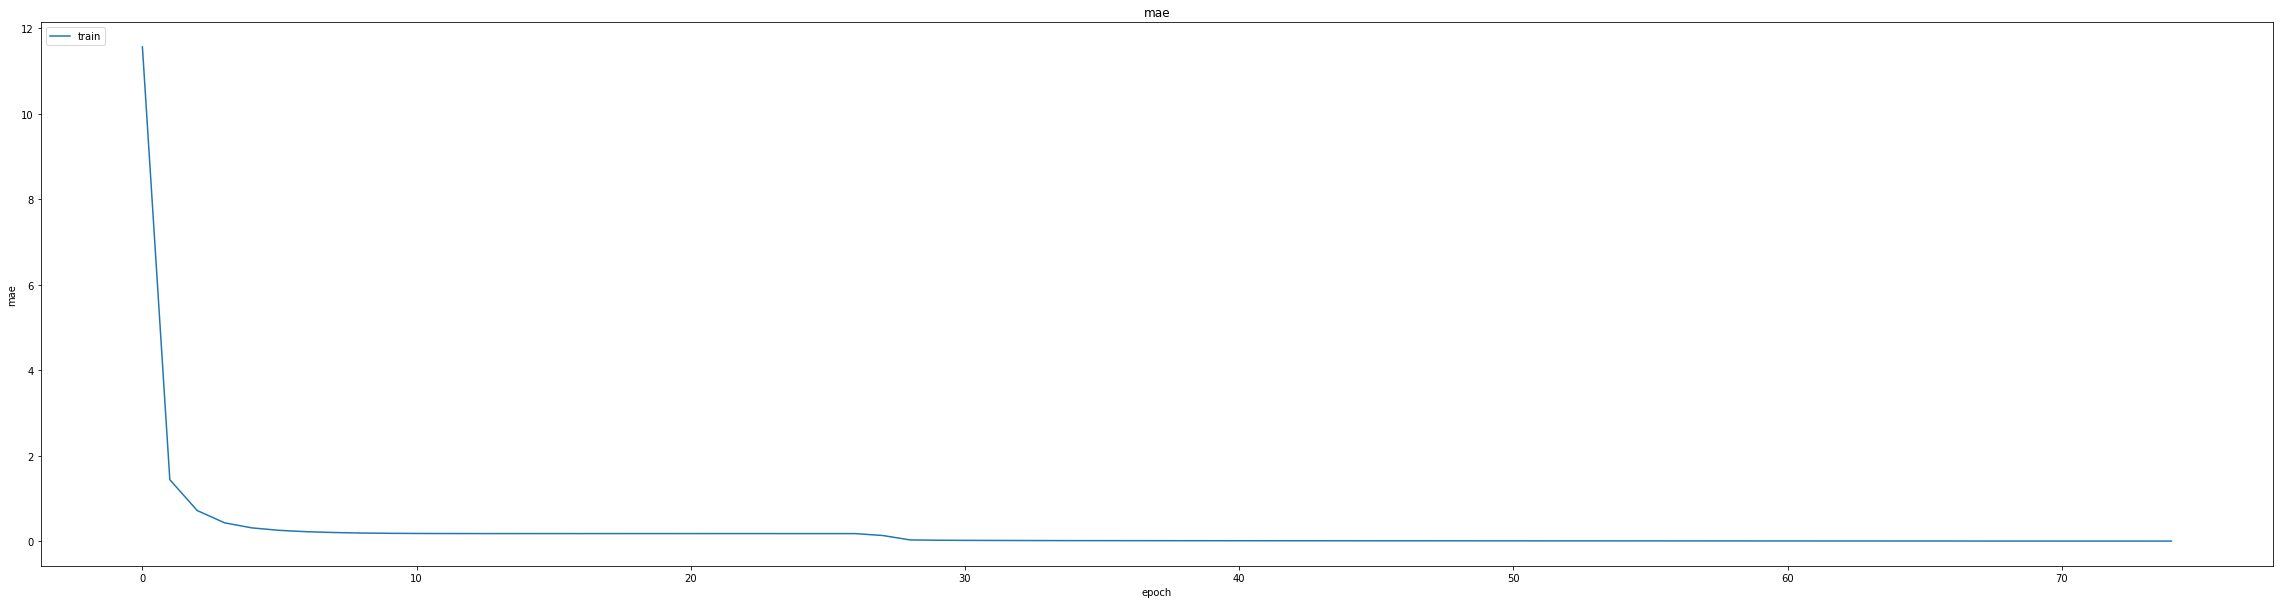

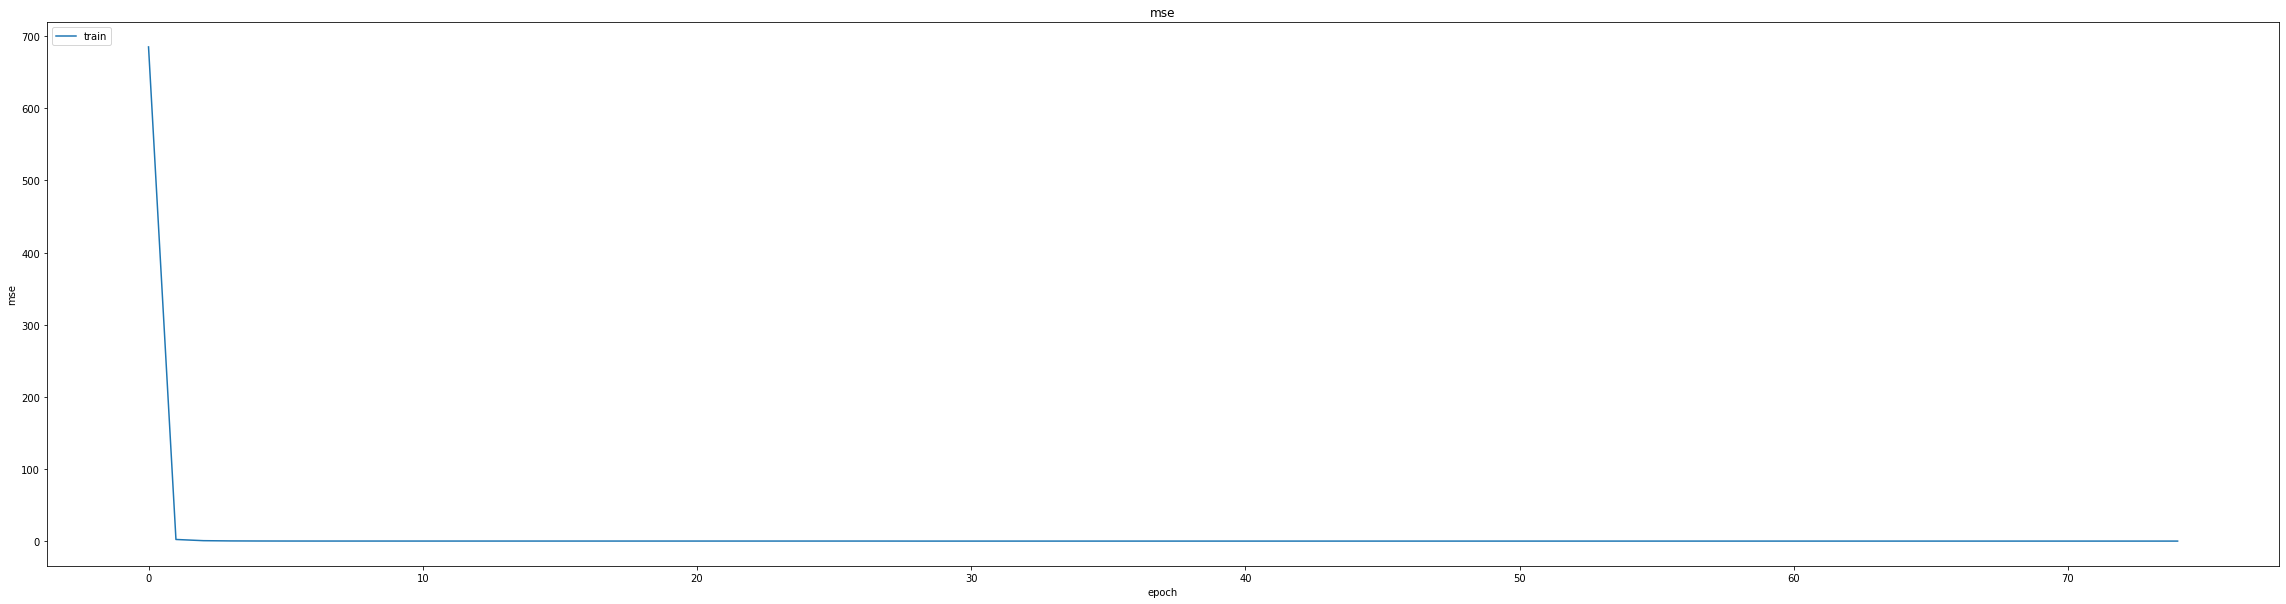

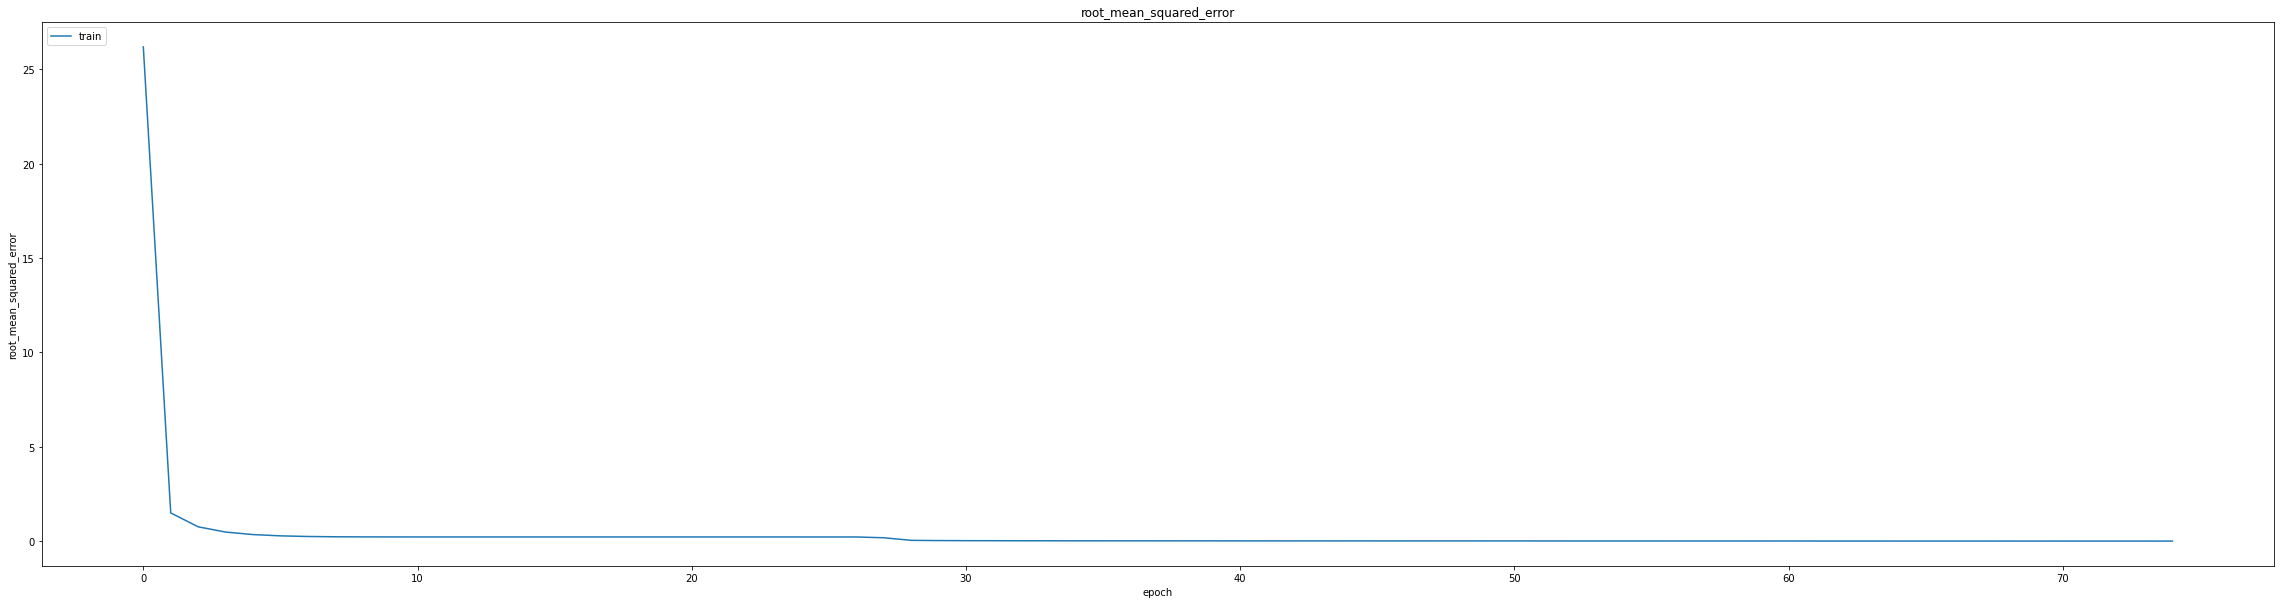

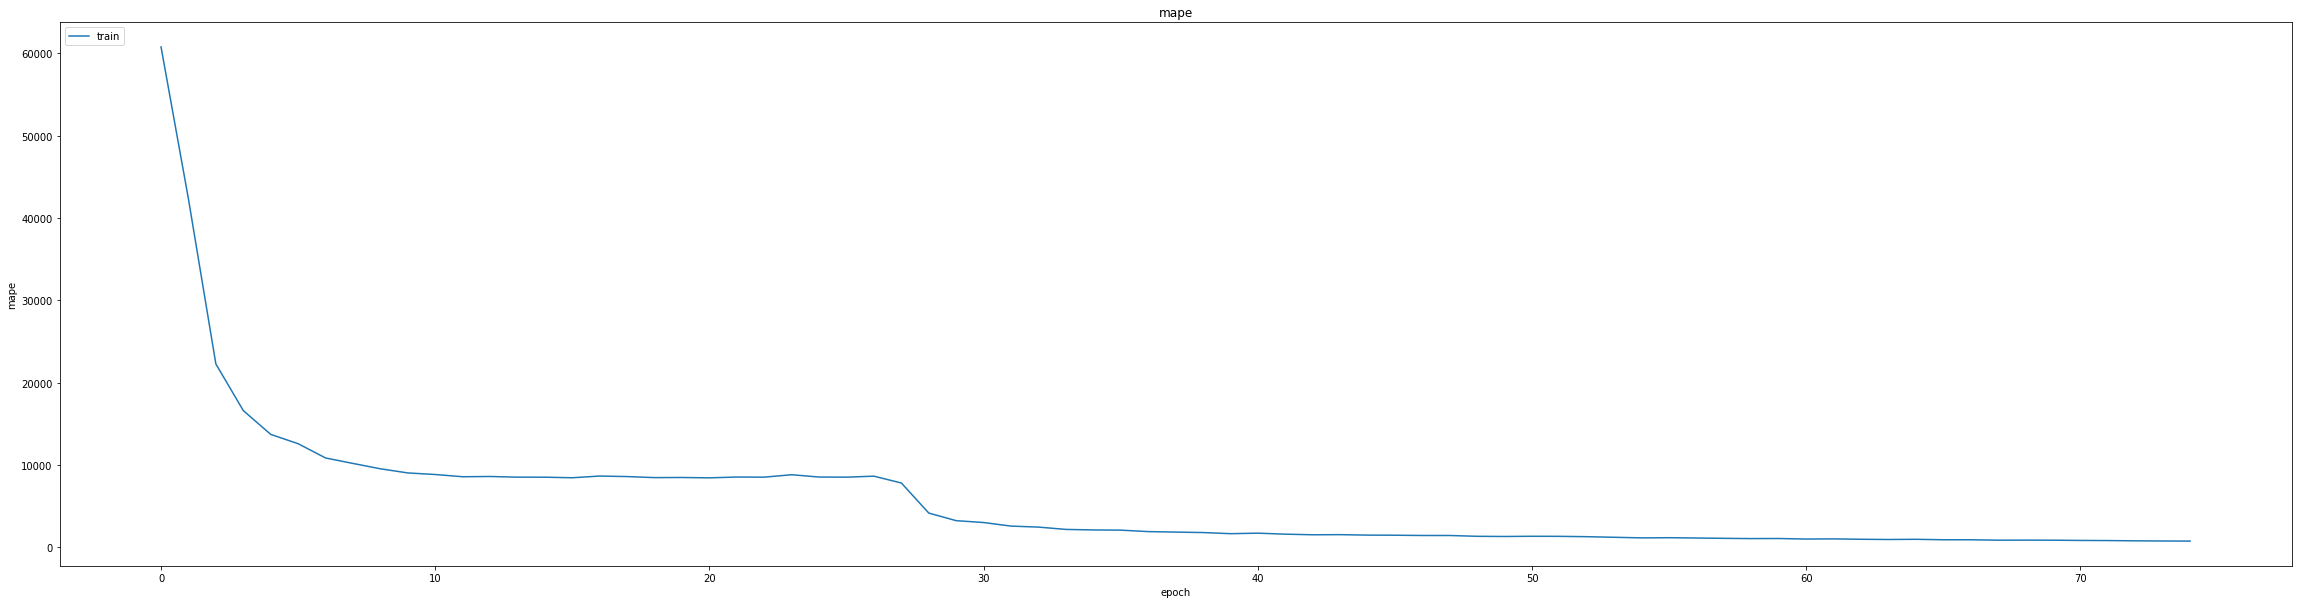

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.01847016252577305
0.01847016252577305
0.025144195184111595
348/348 [==============================] - 2s 4ms/step
0.9103771130165386


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
402/406 [============================>.] - ETA: 0s - loss: 9.8172e-04 - mae: 0.0179 - mse: 9.8172e-04 - root_mean_squared_error: 0.0313 - mape: 1425.4352


Epoch 1: val_mse did not improve from 0.00063
406/406 [==============================] - 10s 15ms/step - loss: 9.7553e-04 - mae: 0.0178 - mse: 9.7553e-04 - root_mean_squared_error: 0.0312 - mape: 1412.5729 - val_loss: 6.7461e-04 - val_mae: 0.0195 - val_mse: 6.7461e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 6493.3760 - lr: 0.0010
Epoch 2/25
401/406 [============================>.] - ETA: 0s - loss: 2.6893e-04 - mae: 0.0123 - mse: 2.6893e-04 - root_mean_squared_error: 0.0164 - mape: 1301.0284
Epoch 2: val_mse improved from 0.00063 to 0.00063, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 34ms/step - loss: 2.6851e-04 - mae: 0.0123 - mse: 2.6851e-04 - root_mean_squared_error: 0.0164 - mape: 1286.1331 - val_loss: 6.2888e-04 - val_mae: 0.0189 - val_mse: 6.2888e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 6130.3120 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
404/406 [============================>.] - ETA: 0s - loss: 2.5347e-04 - mae: 0.0120 - mse: 2.5347e-04 - root_mean_squared_error: 0.0159 - mape: 1225.8490
Epoch 3: val_mse improved from 0.00063 to 0.00060, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)


406/406 [==============================] - 14s 35ms/step - loss: 2.5325e-04 - mae: 0.0120 - mse: 2.5325e-04 - root_mean_squared_error: 0.0159 - mape: 1220.8102 - val_loss: 6.0494e-04 - val_mae: 0.0189 - val_mse: 6.0494e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 5890.0352 - lr: 9.0000e-04
Epoch 4/25
401/406 [============================>.] - ETA: 0s - loss: 2.5660e-04 - mae: 0.0122 - mse: 2.5660e-04 - root_mean_squared_error: 0.0160 - mape: 1203.9987
Epoch 4: val_mse did not improve from 0.00060
406/406 [==============================] - 4s 10ms/step - loss: 2.5614e-04 - mae: 0.0122 - mse: 2.5614e-04 - root_mean_squared_error: 0.0160 - mape: 1190.1847 - val_loss: 6.1938e-04 - val_mae: 0.0195 - val_mse: 6.1938e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 5846.3027 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
403/406 [============================>.] - ETA: 0s - loss: 2.3113e-04 - mae: 0.0115 - mse: 2.3113e-04 - root_mean_squared_error: 0.0152 - mape:

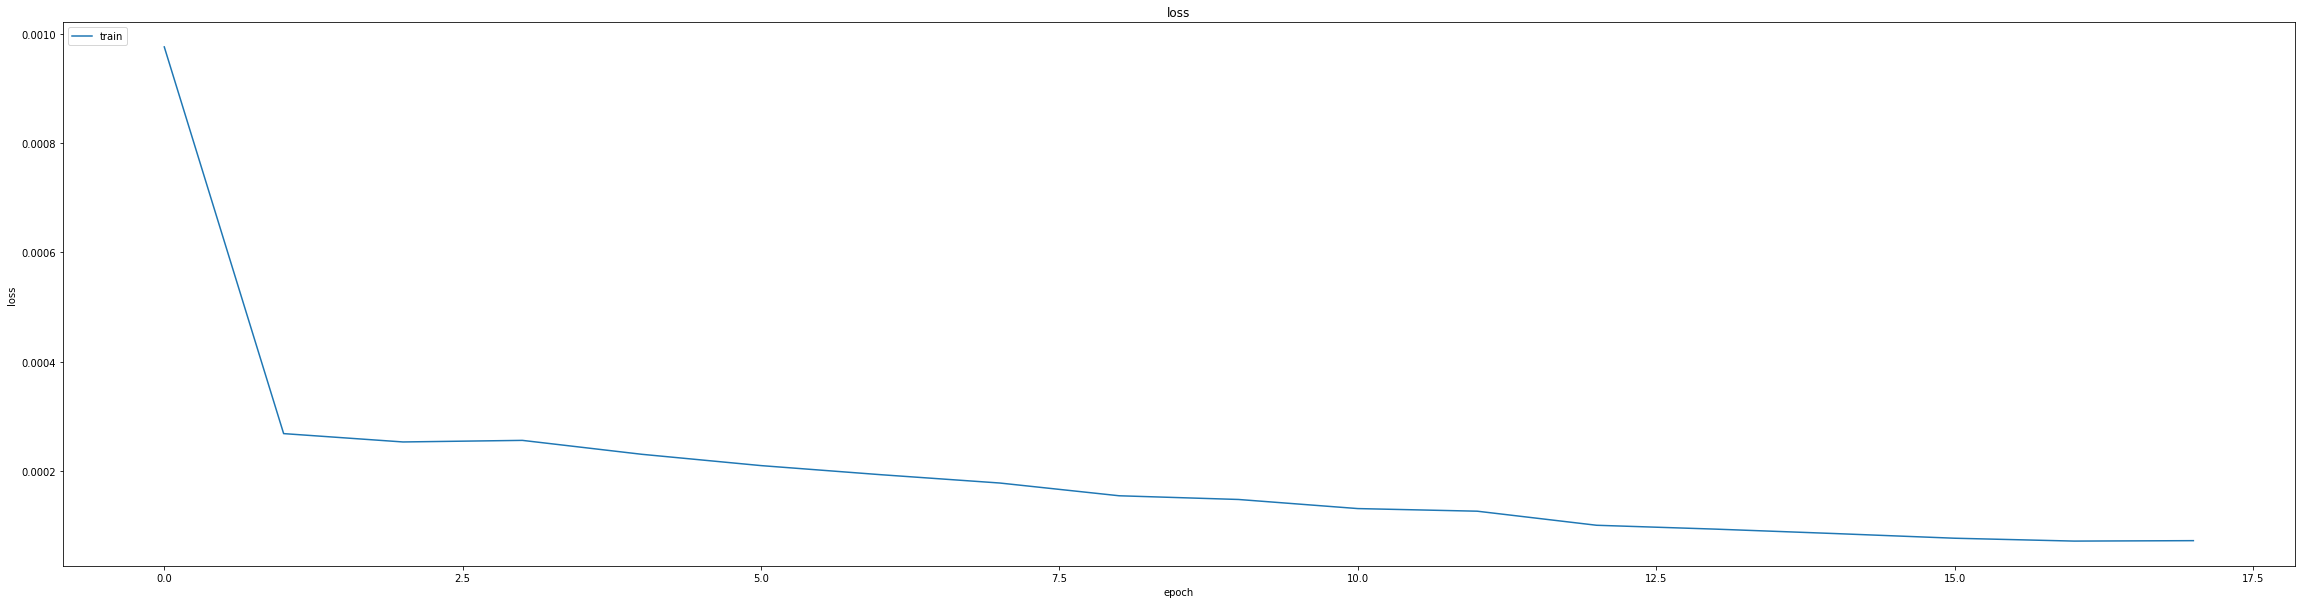

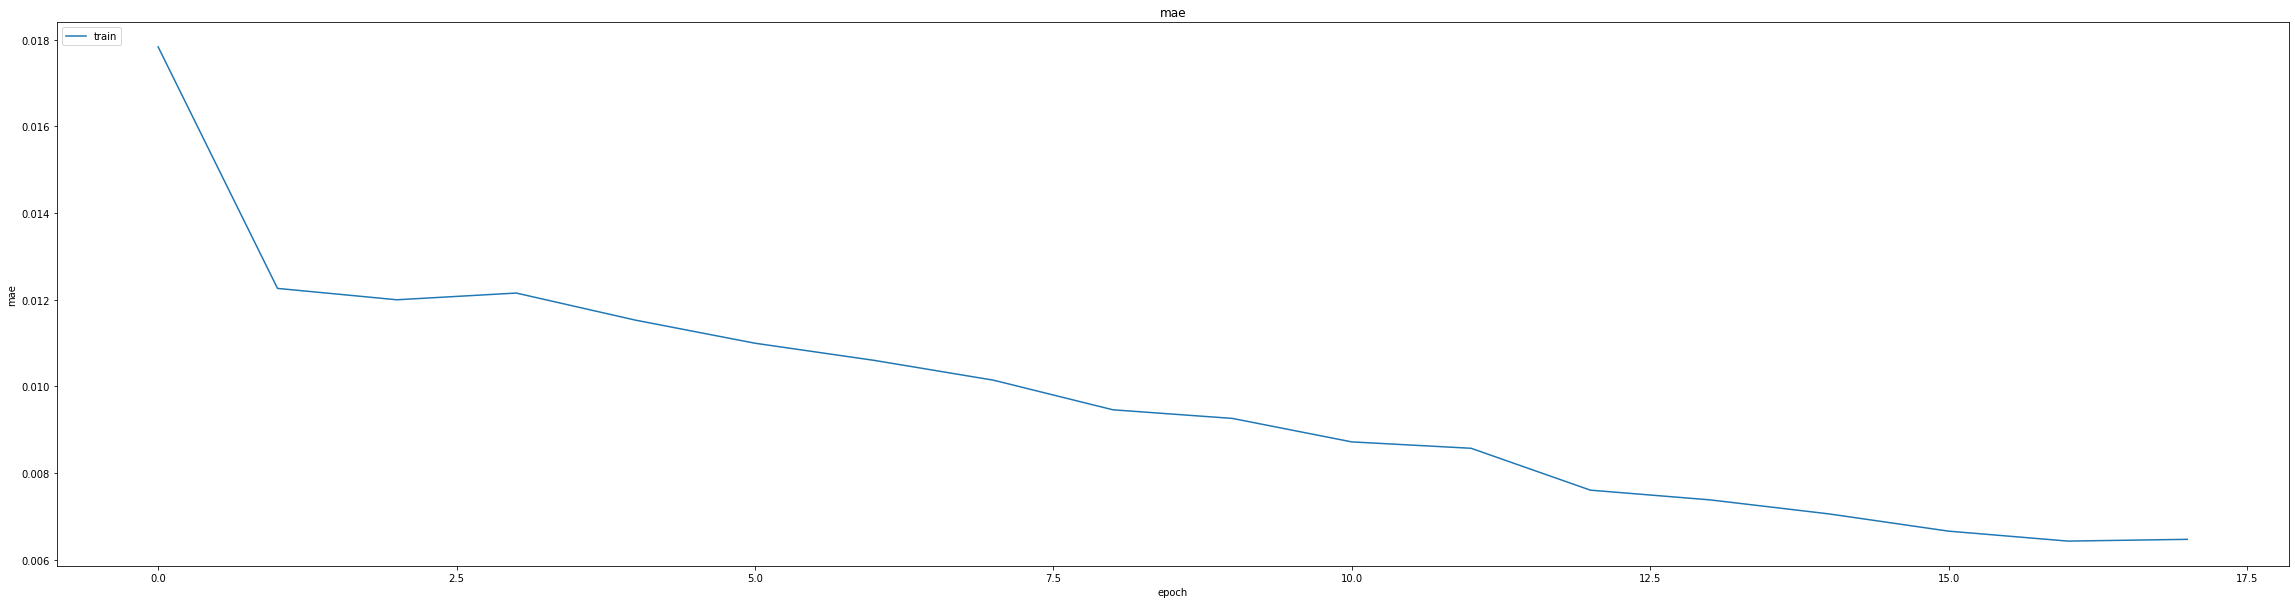

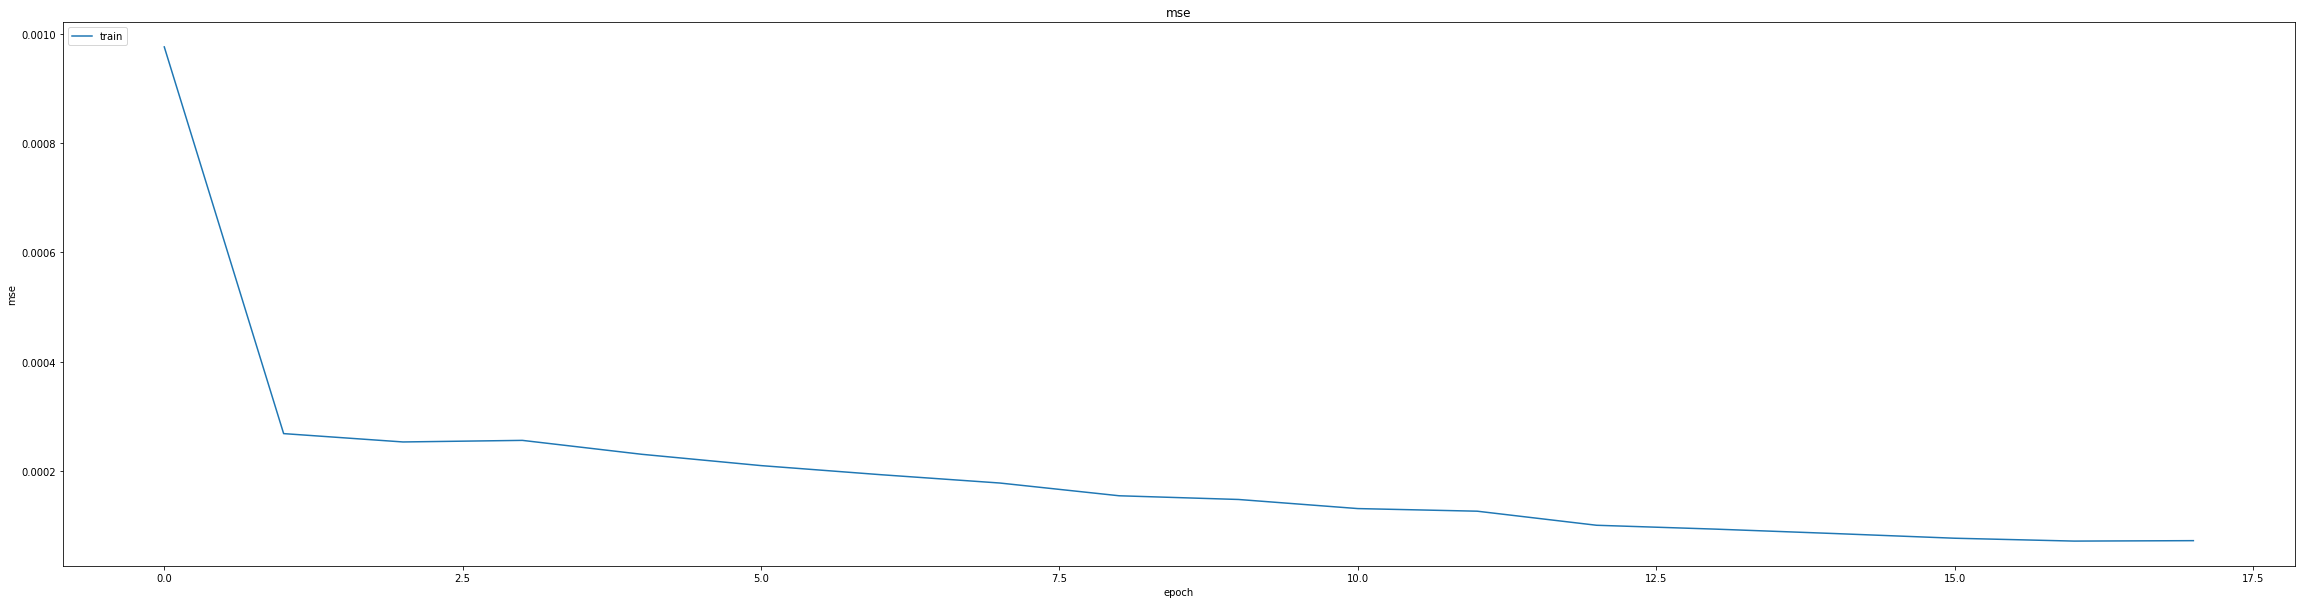

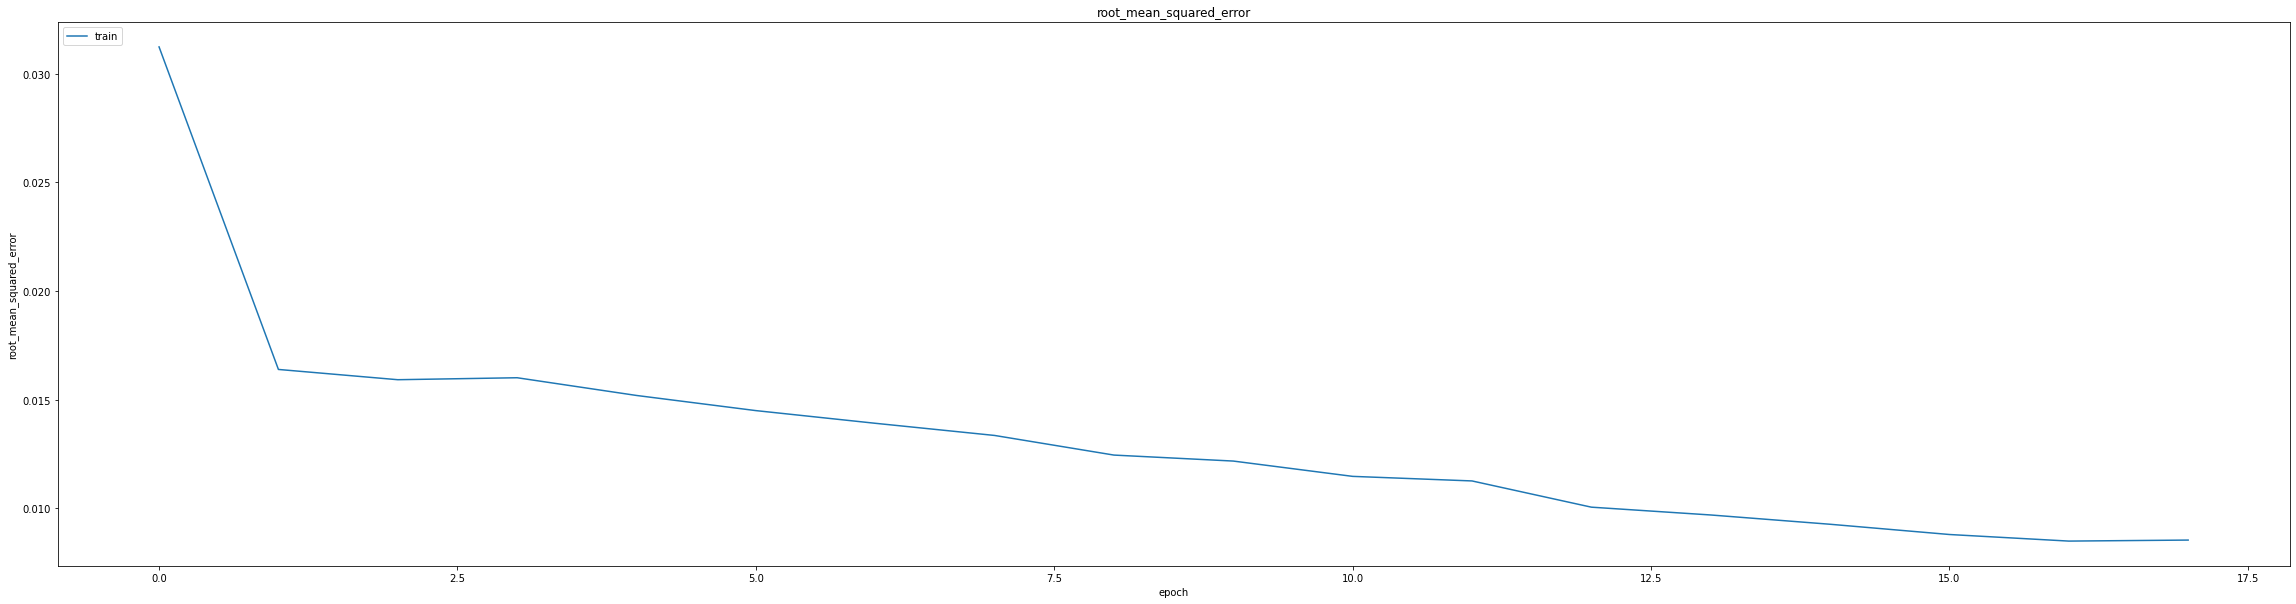

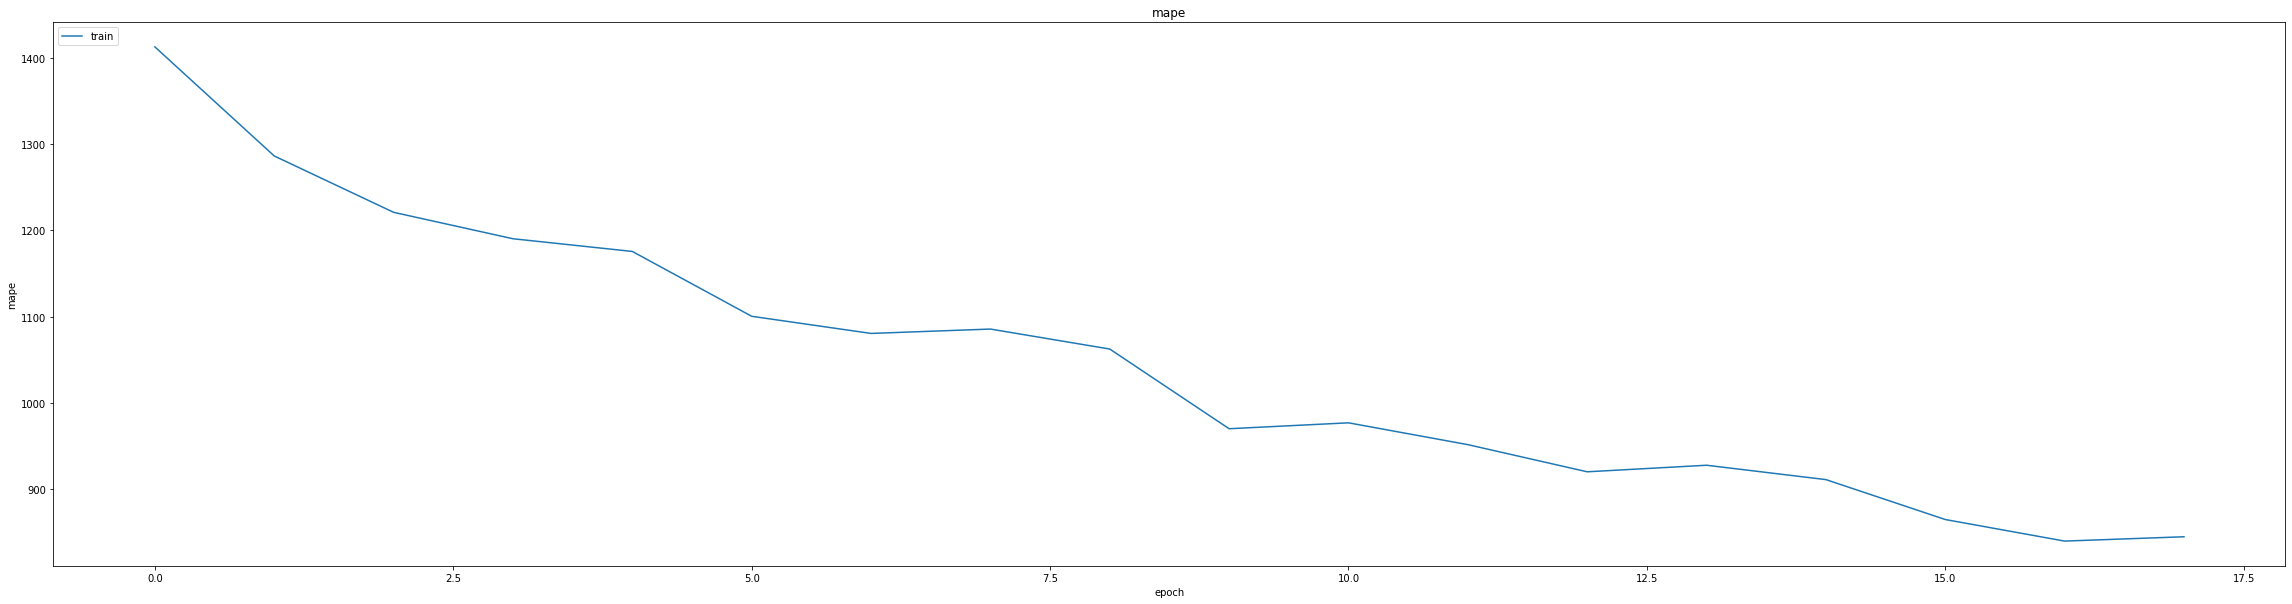

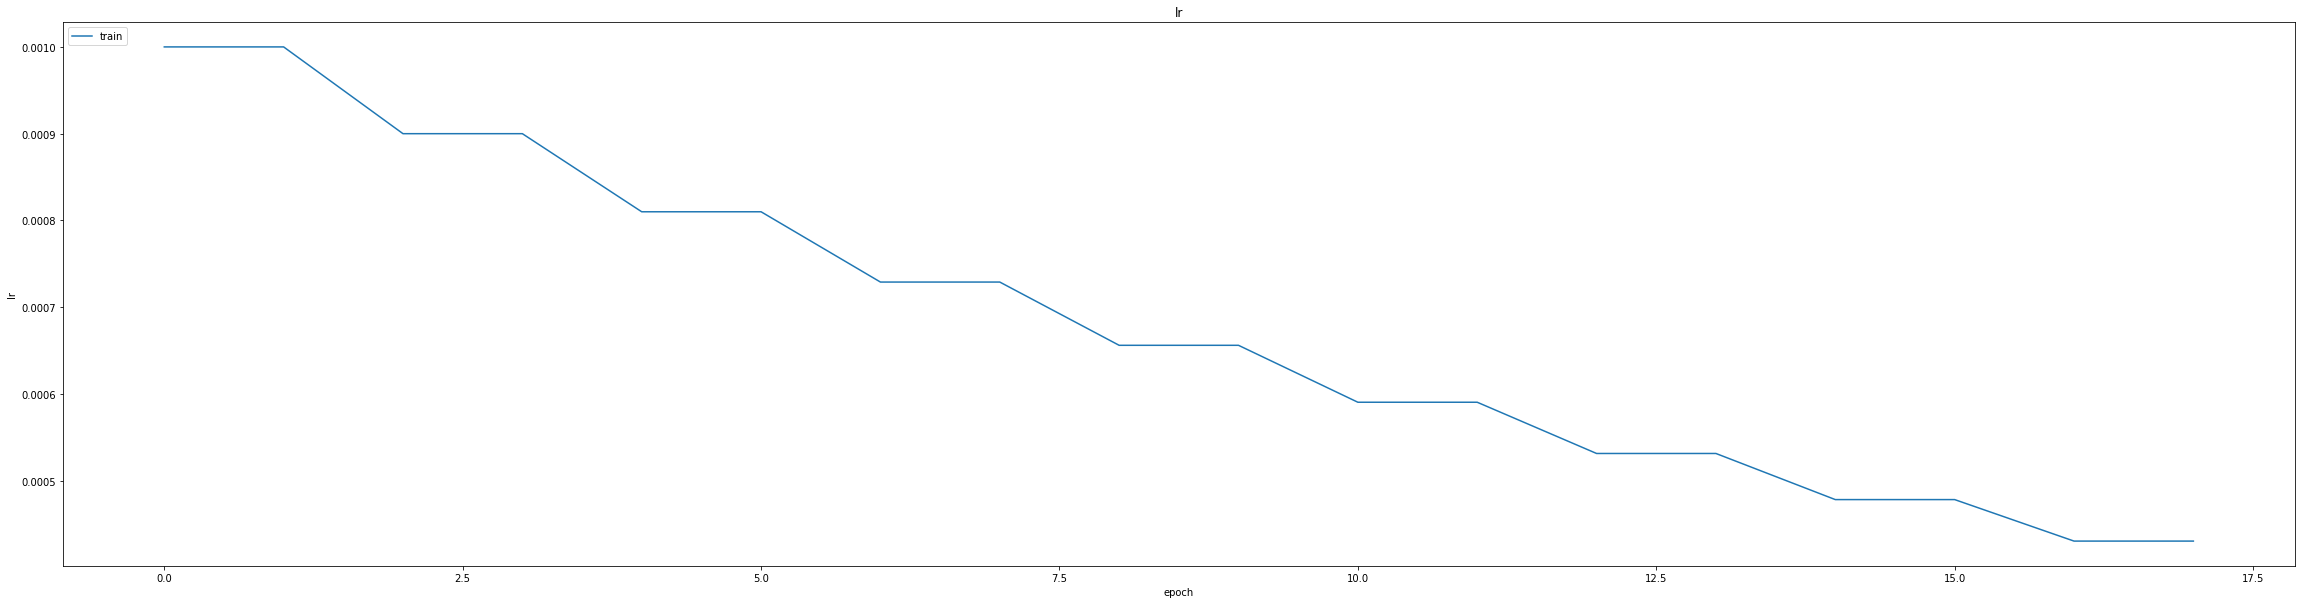

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.018887074664235115
0.018887074664235115
0.024595512077212334
348/348 [==============================] - 2s 4ms/step
0.9654776368430821


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(70-30)")

348/348 [==============================] - 1s 4ms/step


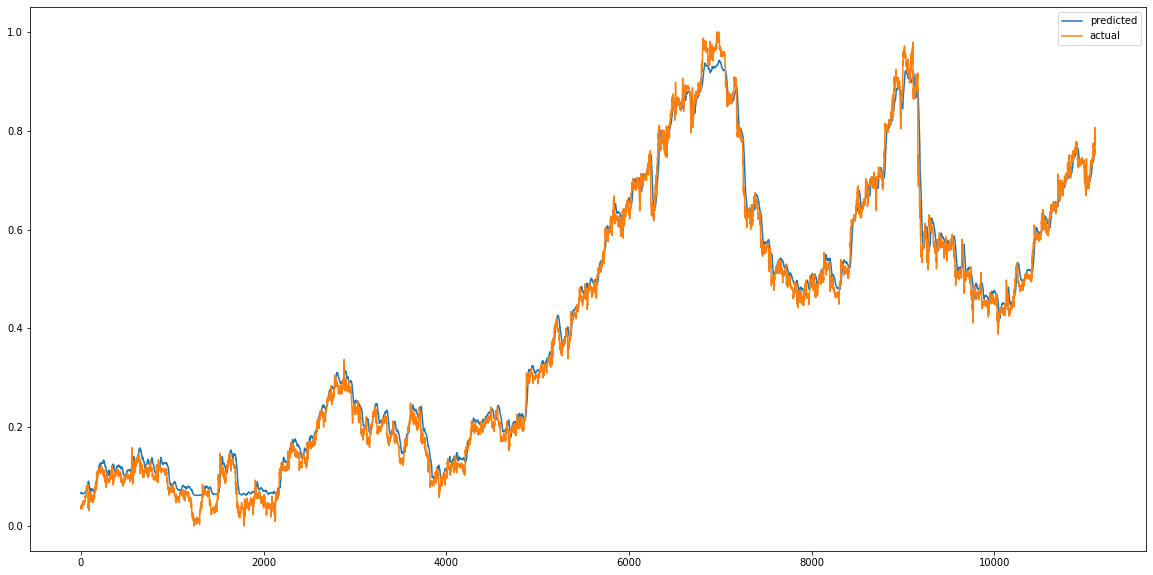

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


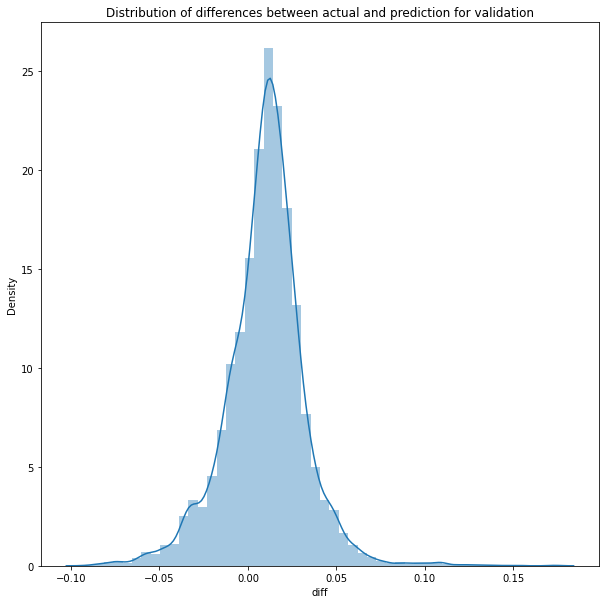

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

348/348 [==============================] - 1s 4ms/step


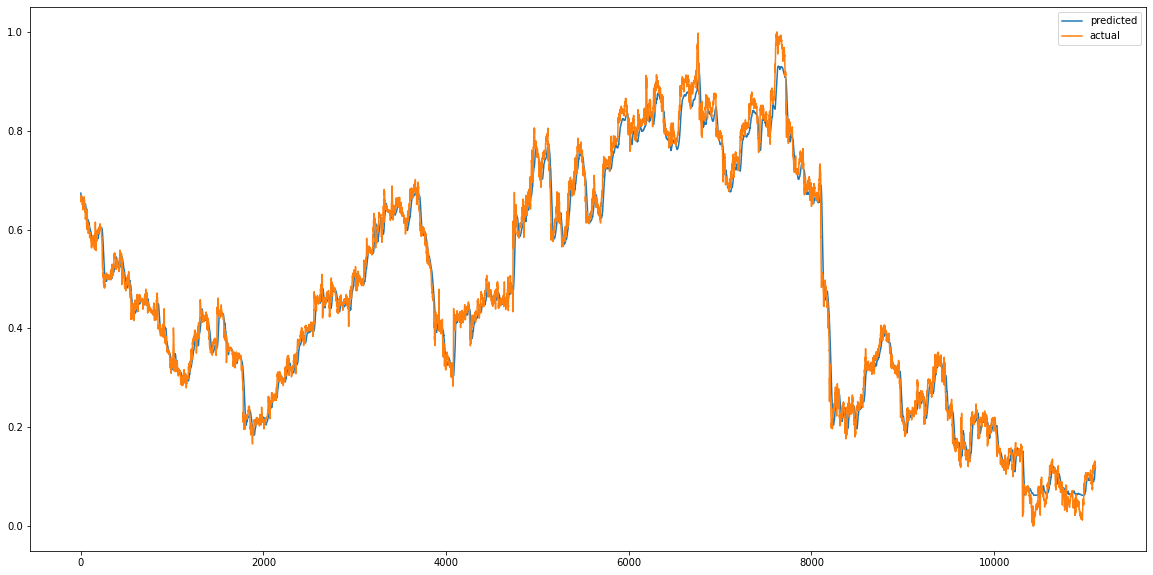

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


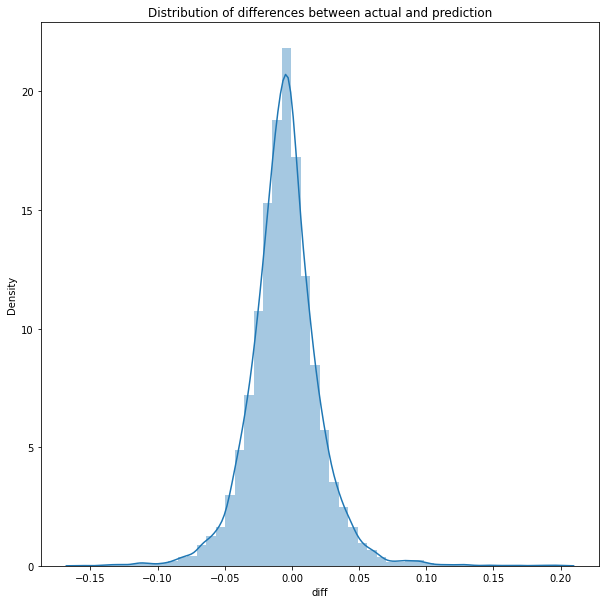

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.000712492928591929
RMSE :  0.026692563170140276
MAE :  0.01928401646924519
348/348 [==============================] - 1s 4ms/step
R2_Score  : 0.9878954447107405


count    11109.000000
mean        -0.005486
std          0.026124
min         -0.155737
25%         -0.019360
50%         -0.005587
75%          0.007623
max          0.197445
Name: diff, dtype: float64